# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

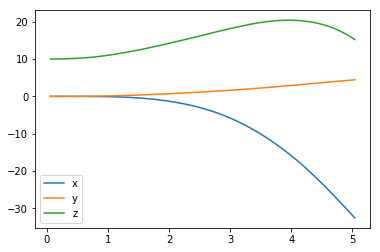

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

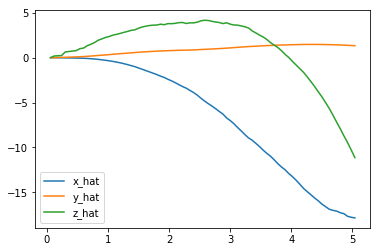

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
def show_flight_path(results, target=None):
    results = np.array(results)
    
    ax = plt.axes(projection='3d')
    ax.plot3D(results[:,0], results[:,1], results[:,2], 'gray')
    print(results[-1,0], results[-1,1], results[-1,2])
    if not target is None:
        ax.scatter([target[0]], [target[1]], [target[2]], c='y', marker='X', s=250, label='target')
    ax.scatter(results[0,0], results[0,1], results[0,2], c='g', marker='o', s=50, label='start')
    ax.scatter(results[-1,0], results[-1,1], results[-1,2], c='r', marker='o', s=50, label='end')
    ax.legend()

In [7]:
print(results['x'])

[-3.1556690572735491e-05, -0.00036331234929129079, -0.0013003937798337602, -0.0033331882207787125, -0.006589965475064961, -0.01119657170260043, -0.017424490694603501, -0.025476438153523025, -0.035210733465376329, -0.046510463623119939, -0.059670073192983411, -0.074753296382070372, -0.091673651313661064, -0.11051225113458071, -0.13132228725441245, -0.1542705882068876, -0.17930091020171476, -0.20627688821677106, -0.2351621854367508, -0.26624446343732172, -0.30007647006562843, -0.33685955070804252, -0.37730083752560772, -0.42167862215776947, -0.46994730059262974, -0.52227061224576077, -0.5787090576509355, -0.63892912469510443, -0.7028809809640999, -0.77087338733355459, -0.84254413258935656, -0.91773850236190746, -0.9968955915005655, -1.0798946963106733, -1.1668015403938212, -1.2576348721035839, -1.3521436295173983, -1.4503932396524974, -1.5524522686679492, -1.6585527349266864, -1.7686625826531885, -1.8824421252471828, -1.9997952897312543, -2.1208640582086611, -2.245336564825172, -2.373375

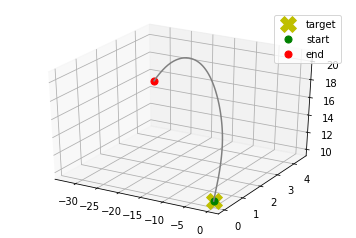

In [6]:
path = [ [results['x'][i], results['y'][i], results['z'][i] ] for i in range(len(results['x']))]
show_flight_path(path, task.target_pos)

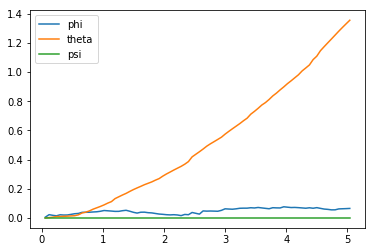

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

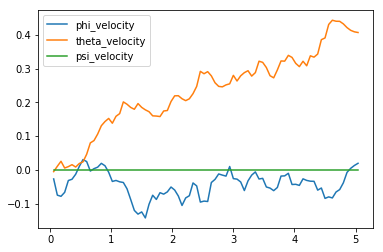

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

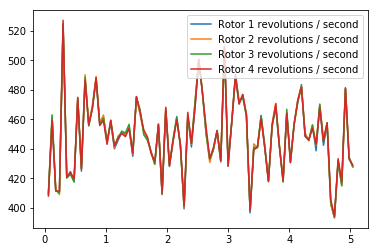

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-32.55301389   4.43470422  15.21375651   0.06499578   1.35498116   0.        ]
[-17.84711171   1.34157168 -11.13505331]
[ 0.01918631  0.40665934  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            if agent.best_score == agent.score:
                best_results = results
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.603 (best =   0.237), noise_scale = 3.255

[[-0.13543060566027804, 0.17480448660624903, 11.35769422706807]]


TypeError: list indices must be integers or slices, not tuple

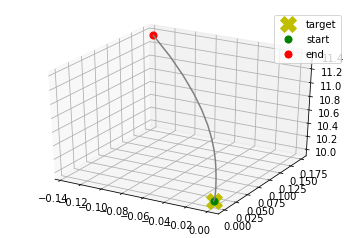

In [51]:
path = [ [best_results['x'][i], best_results['y'][i], best_results['z'][i] ] for i in range(len(results['x']))]
show_flight_path(path, task.target_pos)
print(path[-1:])
print(path[-1,0], path[-1,1], path[-1,2])

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [25]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 1000
init_pose = np.array([0., 0., 2., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task) 

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
plot_data = {x : [] for x in ['episode', 'total_reward']}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = {x : [] for x in labels}
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step_new(action)
        agent.step(action=action, reward=reward, next_state=next_state, done=done)
        state = next_state
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
             
            all_results.append(results)
            plot_data['episode'].append(i_episode)
            plot_data['total_reward'].append(agent.total_reward)
            break
    sys.stdout.flush()

reward1 -0.00469952136263
reward2 -4.00472301897
reward3 -4.00472301897
reward4 -4.86122695455
reward1 -0.089541564208
reward2 -4.09003626724
reward3 -4.0905596989
reward4 -5.80112372436
reward1 -0.30629580121
reward2 -4.30876969107
reward3 -4.31101272154
reward4 -6.86831034538
reward1 -0.561429748109
reward2 -4.56824226572
reward3 -4.57350326684
reward4 -8.19305348864
reward1 -0.668649938221
reward2 -4.68161285426
reward3 -4.69096932911
reward4 -9.3466046565
reward1 -0.938600460768
reward2 -4.9595996288
reward3 -4.97408562713
reward4 -10.6303566806
reward1 -1.23584219426
reward2 -5.26771357557
reward3 -5.28839365671
reward4 -11.9441017999
reward1 -1.58010876027
reward2 -5.62605989636
reward3 -5.65288405323
reward4 -13.8848530773
reward1 -1.97852883991
reward2 -6.04227316399
reward3 -6.07479008204
reward4 -15.8079976921
reward1 -2.19817096451
reward2 -6.28279878761
reward3 -6.32167885091
reward4 -17.4746148292
reward1 -2.18808393002
reward2 -6.29464302759
reward3 -6.34046648622
reward4

Episode =    3, score =   0.000 (best =    -inf)reward1 -0.00471380260482
reward2 -4.00473737162
reward3 -4.00473737162
reward4 -4.86089051777
reward1 -0.0870887655081
reward2 -4.08757134736
reward3 -4.08808988405
reward4 -5.79795540314
reward1 -0.298771575998
reward2 -4.30118345956
reward3 -4.30341344145
reward4 -6.85967387143
reward1 -0.549731268219
reward2 -4.556385666
reward3 -4.5616321321
reward4 -8.16785476547
reward1 -0.670519092562
reward2 -4.68327474215
reward3 -4.69251641831
reward4 -9.32279668417
reward1 -0.87138026761
reward2 -4.891845414
reward3 -4.90610630446
reward4 -10.5254004869
reward1 -1.10561899268
reward2 -5.13596913537
reward3 -5.15661260096
reward4 -11.5282499626
reward1 -1.2997334995
reward2 -5.34211040465
reward3 -5.36926860268
reward4 -13.0605888673
reward1 -1.53544605882
reward2 -5.59199886176
reward3 -5.62576951298
reward4 -14.5790241812
reward1 -1.55248528062
reward2 -5.62447774026
reward3 -5.66499595936
reward4 -16.508476484
reward1 -1.66971862234
reward2 

reward1 -3.33033457504
reward2 -7.68891242821
reward3 -7.82087043171
reward4 -28.8146156115
reward1 -3.57169116873
reward2 -7.96477915062
reward3 -8.10045799706
reward4 -30.0406484796
reward1 -3.47583533441
reward2 -7.90416094882
reward3 -8.0427142831
reward4 -30.8020617356
reward1 -3.72345964219
reward2 -8.18778173148
reward3 -8.32952751477
reward4 -31.107165795
reward1 -4.06917449936
reward2 -8.57245975936
reward3 -8.71723591542
reward4 -31.617039662
reward1 -4.20447849883
reward2 -8.74913202382
reward3 -8.89657175757
reward4 -31.9902291755
reward1 -4.36525868964
reward2 -8.95276090057
reward3 -9.10217993631
reward4 -32.6085872812
reward1 -4.45244685248
reward2 -9.08403759113
reward3 -9.2340939577
reward4 -33.1089952349
reward1 -4.42960934943
reward2 -9.10561036908
reward3 -9.2555967871
reward4 -33.4597459597
reward1 -4.58417671697
reward2 -9.30524666695
reward3 -9.45619732658
reward4 -34.6001552773
reward1 -4.70164411649
reward2 -9.46914317064
reward3 -9.62246162042
reward4 -35.6167

Episode =    8, score = -71.643 (best = -16.894)reward1 -0.00290809122196
reward2 -4.00292263168
reward3 -4.00292263168
reward4 -4.79402980895
reward1 -0.0271879194089
reward2 -4.02735293992
reward3 -4.0276528142
reward4 -5.6076836155
reward1 -0.115759886549
reward2 -4.11663964609
reward3 -4.11808990009
reward4 -6.48048884783
reward1 -0.31909445013
reward2 -4.32214848135
reward3 -4.32636547041
reward4 -8.85385330835
reward1 -0.698471128881
reward2 -4.706612988
reward3 -4.71383832047
reward4 -11.9246428134
reward1 -1.15743100712
reward2 -5.17485237692
reward3 -5.18387901016
reward4 -14.9996559596
reward1 -1.47830355438
reward2 -5.50890359698
reward3 -5.52046366964
reward4 -15.4496013164
reward1 -1.65262672562
reward2 -5.69888141963
reward3 -5.71285945588
reward4 -16.6450069808
reward1 -2.13857010932
reward2 -6.2037807875
reward3 -6.21889319305
reward4 -20.3545846318
reward1 -2.0057921394
reward2 -6.09172462882
reward3 -6.10705247411
reward4 -23.7134848809
reward1 -1.79198647211
reward2 

reward1 -6.67687888548
reward2 -11.6759301137
reward3 -11.8915316372
reward4 -35.728023591
reward1 -6.72611827059
reward2 -11.7261182706
reward3 -11.954075722
reward4 -38.9181740514
reward1 -6.97106533936
reward2 -11.9710653394
reward3 -12.2122956048
reward4 -42.0079152346
Episode =   11, score = -82.129 (best = -16.882)reward1 -0.0118712355681
reward2 -4.01193059175
reward3 -4.01193059175
reward4 -4.83263410877
reward1 -0.286993356162
reward2 -4.2885470353
reward3 -4.28913203225
reward4 -5.92857796468
reward1 -0.48318014014
reward2 -4.48858468676
reward3 -4.49080012312
reward4 -6.94309923197
reward1 -0.811600038218
reward2 -4.82347848573
reward3 -4.82795972697
reward4 -8.86010719386
reward1 -1.10716003612
reward2 -5.128632284
reward3 -5.13507507455
reward4 -10.7131580787
reward1 -1.16358465637
reward2 -5.19641062771
reward3 -5.20466432498
reward4 -12.2780351977
reward1 -1.28099020596
reward2 -5.32603905162
reward3 -5.3355908877
reward4 -15.3767849671
reward1 -1.64794332223
reward2 -5.

reward1 -5.6745581578
reward2 -10.4500819618
reward3 -10.5437706873
reward4 -51.6741897893
reward1 -5.89145522558
reward2 -10.7248090965
reward3 -10.8349599032
reward4 -50.3976315852
reward1 -6.18062194861
reward2 -11.0743362054
reward3 -11.2024163086
reward4 -49.5165428727
reward1 -6.60570887464
reward2 -11.5633547856
reward3 -11.7103651483
reward4 -49.8749690444
reward1 -7.03699868381
reward2 -12.0369986838
reward3 -12.203153924
reward4 -50.2470934244
reward1 -7.4619716491
reward2 -12.4619716491
reward3 -12.6471140621
reward4 -50.5934267196
Episode =   14, score = -113.313 (best = -16.880)reward1 -0.0297238239895
reward2 -4.02987244311
reward3 -4.02987244311
reward4 -4.62594840544
reward1 -0.267207199583
reward2 -4.26884047382
reward3 -4.26940995648
reward4 -5.46066328645
reward1 -0.460023688822
reward2 -4.4652931175
reward3 -4.46742512614
reward4 -6.25114405141
reward1 -0.824345975005
reward2 -4.836037252
reward3 -4.84077741723
reward4 -8.74848761527
reward1 -1.19408566352
reward2 -

reward2 -7.56126741274
reward3 -7.58879262636
reward4 -45.5469631542
reward1 -3.48690356959
reward2 -7.83265595543
reward3 -7.86164538041
reward4 -47.1123342451
reward1 -3.66957412139
reward2 -8.05110889569
reward3 -8.08372252625
reward4 -48.3971203584
reward1 -4.06535018879
reward2 -8.48555958464
reward3 -8.52360583046
reward4 -50.0018040547
reward1 -4.03293217189
reward2 -8.49363297954
reward3 -8.53698678597
reward4 -50.9467853918
reward1 -4.18087586286
reward2 -8.68264571068
reward3 -8.73491015493
reward4 -51.8834058783
reward1 -4.27984056899
reward2 -8.82391399898
reward3 -8.88641478048
reward4 -52.5699118778
reward1 -4.69891331448
reward2 -9.28788051388
reward3 -9.35992208259
reward4 -53.4420457341
reward1 -4.98989888699
reward2 -9.6273101474
reward3 -9.70841180681
reward4 -54.0814194313
reward1 -5.05844967745
reward2 -9.74610268069
reward3 -9.83559350275
reward4 -50.7980185933
reward1 -5.29903175828
reward2 -10.0384721687
reward3 -10.1366184466
reward4 -48.4121467937
reward1 -5.4

Episode =   19, score = -96.770 (best = -14.915)reward1 -0.0559216201728
reward2 -4.05620122827
reward3 -4.05620122827
reward4 -4.4616091516
reward1 -0.222421270887
reward2 -4.22409259344
reward3 -4.22457635025
reward4 -5.03503304337
reward1 -0.409861423643
reward2 -4.41469415967
reward3 -4.41647905397
reward4 -5.63090362648
reward1 -0.449305319012
reward2 -4.45843388875
reward3 -4.46251577195
reward4 -6.86128248071
reward1 -0.687150584887
reward2 -4.70196143415
reward3 -4.70924761161
reward4 -9.36280498162
reward1 -0.890696023459
reward2 -4.91339610576
reward3 -4.92355424701
reward4 -11.7950405444
reward1 -1.23130999993
reward2 -5.26462011235
reward3 -5.27591235315
reward4 -17.4300837705
reward1 -1.63265587928
reward2 -5.68028582109
reward3 -5.69176538206
reward4 -22.9116411768
reward1 -1.83663385612
reward2 -5.90161024662
reward3 -5.91242137081
reward4 -27.8655159516
reward1 -2.34728544593
reward2 -6.43318143293
reward3 -6.44214530408
reward4 -32.6564378839
reward1 -2.55517422274
rew

reward1 -3.05596025672
reward2 -7.2712936854
reward3 -7.34168762552
reward4 -42.6753823309
reward1 -3.23838361433
reward2 -7.48518876236
reward3 -7.56019500309
reward4 -44.990526213
reward1 -3.23243541653
reward2 -7.51159465971
reward3 -7.59323253455
reward4 -46.7713279225
reward1 -3.46125592885
reward2 -7.77388362876
reward3 -7.86259990826
reward4 -44.083312816
reward1 -3.70992138153
reward2 -8.058404968
reward3 -8.15416241662
reward4 -41.9341040823
reward1 -3.91131139709
reward2 -8.29790114745
reward3 -8.40050355696
reward4 -40.1247489392
reward1 -3.88579609384
reward2 -8.31137138165
reward3 -8.41924646171
reward4 -43.6204358765
reward1 -4.25061078877
reward2 -8.71686811099
reward3 -8.82802372721
reward4 -46.9914593872
reward1 -4.04367974819
reward2 -8.5514085231
reward3 -8.66494523385
reward4 -49.3044213693
reward1 -4.30890448677
reward2 -8.85839618286
reward3 -8.97413162974
reward4 -46.403599292
reward1 -4.54222671966
reward2 -9.13597407178
reward3 -9.25364011223
reward4 -44.036905

reward2 -4.4607143258
reward3 -4.46184562718
reward4 -6.79152328264
reward1 -0.896758839988
reward2 -4.90851169295
reward3 -4.9110929585
reward4 -7.64927708177
reward1 -1.1130152173
reward2 -5.13481694056
reward3 -5.14014802052
reward4 -12.3060345894
reward1 -0.982120128637
reward2 -5.01439752862
reward3 -5.02339528452
reward4 -16.5206195715
reward1 -1.167416916
reward2 -5.21044200121
reward3 -5.22284656107
reward4 -21.0265889442
reward1 -1.68061873161
reward2 -5.73788399505
reward3 -5.75300967976
reward4 -25.5977128818
reward1 -1.51474145059
reward2 -5.58798351494
reward3 -5.60641170233
reward4 -29.1670784297
reward1 -1.65924212041
reward2 -5.74835410262
reward3 -5.77342472727
reward4 -27.9866880713
reward1 -1.97006563353
reward2 -6.07732415451
reward3 -6.10933671576
reward4 -27.1294435255
reward1 -2.11151463981
reward2 -6.23918106216
reward3 -6.27746679453
reward4 -26.2183627681
reward1 -2.39845055385
reward2 -6.54866680216
reward3 -6.59189790635
reward4 -27.0585105237
reward1 -2.492

reward1 -5.14172427299
reward2 -9.72576720874
reward3 -9.76478820121
reward4 -33.7766899727
reward1 -5.43797587236
reward2 -10.0749173088
reward3 -10.1209040944
reward4 -35.4767133653
reward1 -5.5785829928
reward2 -10.2706072236
reward3 -10.3247125073
reward4 -36.9131711873
reward1 -5.95694161473
reward2 -10.7066434686
reward3 -10.769404294
reward4 -38.7064783295
reward1 -6.31888156697
reward2 -11.1299625367
reward3 -11.2019043176
reward4 -40.3629025693
reward1 -6.71130998353
reward2 -11.587541911
reward3 -11.6689929553
reward4 -41.9272445859
reward1 -6.69428664055
reward2 -11.6375465512
reward3 -11.7273433617
reward4 -41.1902196201
reward1 -6.56353762803
reward2 -11.563537628
reward3 -11.6609455455
reward4 -40.3472673021
reward1 -6.97391506355
reward2 -11.9739150635
reward3 -12.0793222328
reward4 -39.970918792
Episode =   27, score = -71.568 (best = -14.915)reward1 -0.0631739708683
reward2 -4.06348984072
reward3 -4.06348984072
reward4 -5.08978598764
reward1 -0.233004295806
reward2 -4.

reward1 -2.77044583271
reward2 -6.93002929354
reward3 -6.94133332884
reward4 -32.4915453593
reward1 -3.18201627209
reward2 -7.37136204345
reward3 -7.3853119045
reward4 -35.8594328896
reward1 -3.65878103129
reward2 -7.88233078916
reward3 -7.89862785673
reward4 -38.9427635268
reward1 -3.72730582449
reward2 -7.98778601664
reward3 -8.00635308781
reward4 -40.2406685493
reward1 -3.8681839885
reward2 -8.16664162972
reward3 -8.18657442967
reward4 -41.4667902725
reward1 -4.09773584256
reward2 -8.43602308293
reward3 -8.45569431609
reward4 -42.6480545398
reward1 -4.17452468974
reward2 -8.55417323278
reward3 -8.57349165243
reward4 -44.162760903
reward1 -4.51343234058
reward2 -8.93652066876
reward3 -8.95711823372
reward4 -45.7250397523
reward1 -4.94362822964
reward2 -9.41400186067
reward3 -9.43691164523
reward4 -47.1931409726
reward1 -5.30407898489
reward2 -9.825691152
reward3 -9.85117383445
reward4 -47.8144415762
reward1 -5.4721268539
reward2 -10.0476200502
reward3 -10.076010285
reward4 -48.220943

reward1 -0.410337015417
reward2 -4.418708059
reward3 -4.42056484622
reward4 -9.55520098892
reward1 -0.849874984111
reward2 -4.8645470877
reward3 -4.86579872617
reward4 -13.8310785312
reward1 -1.04791083199
reward2 -5.07207186466
reward3 -5.07420097116
reward4 -17.7490587706
reward1 -0.968805012577
reward2 -5.00304962446
reward3 -5.0066811095
reward4 -22.6281805644
reward1 -1.20781370746
reward2 -5.25294141295
reward3 -5.25796791263
reward4 -27.5161159958
reward1 -1.55169780774
reward2 -5.61062307081
reward3 -5.61914113048
reward4 -32.1107696687
reward1 -1.91753117166
reward2 -5.99380257962
reward3 -6.00776984135
reward4 -35.455206846
reward1 -1.99473368539
reward2 -6.09056641764
reward3 -6.10963152531
reward4 -38.1442304486
reward1 -2.19092829401
reward2 -6.30768933615
reward3 -6.33013116056
reward4 -40.59754812
reward1 -2.66477024993
reward2 -6.80580978479
reward3 -6.83108343186
reward4 -44.4124796915
reward1 -2.84205014634
reward2 -7.01062378318
reward3 -7.03949475576
reward4 -47.402

reward1 -4.33531359745
reward2 -8.67220193156
reward3 -8.74158232499
reward4 -53.406029777
reward1 -4.47845282029
reward2 -8.85940998649
reward3 -8.93403945473
reward4 -54.144632472
reward1 -4.72138502894
reward2 -9.14834138438
reward3 -9.22845100333
reward4 -54.876687299
reward1 -4.77491551317
reward2 -9.24935337132
reward3 -9.33560064899
reward4 -56.4711151097
reward1 -5.06793916124
reward2 -9.59159129277
reward3 -9.68492539148
reward4 -57.9980316794
reward1 -5.10213971236
reward2 -9.67664223825
reward3 -9.77920367091
reward4 -59.0171906151
reward1 -5.49651047709
reward2 -10.1240062539
reward3 -10.2365896699
reward4 -59.2558489003
reward1 -5.70746256379
reward2 -10.3909782058
reward3 -10.5169264883
reward4 -59.3651170247
reward1 -6.02355640306
reward2 -10.7657271399
reward3 -10.907285617
reward4 -59.6216896587
reward1 -6.54854542024
reward2 -11.3535766662
reward3 -11.511347055
reward4 -61.0126580641
reward1 -6.52536389977
reward2 -11.3957646924
reward3 -11.5691132348
reward4 -61.6826

reward1 -4.82614247547
reward2 -9.72164736424
reward3 -10.0981042792
reward4 -62.4692706561
reward1 -4.98188280991
reward2 -9.9264278251
reward3 -10.3320245796
reward4 -63.0946630371
reward1 -4.86292962297
reward2 -9.85669870033
reward3 -10.2915674059
reward4 -63.3551313567
reward1 -5.22169221736
reward2 -10.2216922174
reward3 -10.6878173318
reward4 -63.6626377546
reward1 -5.46146790185
reward2 -10.4614679018
reward3 -10.9603776625
reward4 -63.8635807468
reward1 -5.67113869685
reward2 -10.6711386968
reward3 -11.2022838241
reward4 -64.0474541409
Episode =   37, score = -143.597 (best = -14.915)reward1 0.0176735859612
reward2 -3.98223804611
reward3 -3.98223804611
reward4 -6.60423642293
reward1 -8.79205143322e-05
reward2 -3.99991162426
reward3 -4.00031344193
reward4 -9.22658307673
reward1 -0.328153120073
reward2 -4.32961802902
reward3 -4.33077580314
reward4 -12.1085472367
reward1 -0.582086086358
reward2 -4.58810219134
reward3 -4.59121274632
reward4 -11.4550416059
reward1 -0.787205337448
r

reward1 -4.22220254125
reward2 -8.60887541204
reward3 -8.64729920714
reward4 -56.6428882431
reward1 -4.28238910913
reward2 -8.71158493817
reward3 -8.75615164288
reward4 -57.8361085631
reward1 -4.20961737319
reward2 -8.68127323464
reward3 -8.73269014802
reward4 -58.6622038883
reward1 -4.166675159
reward2 -8.68021248311
reward3 -8.73904341572
reward4 -59.3376644486
reward1 -4.08575902252
reward2 -8.64055851753
reward3 -8.70617996221
reward4 -59.8238079301
reward1 -4.28810595539
reward2 -8.8847747753
reward3 -8.95740172591
reward4 -60.4765819232
reward1 -4.15307730935
reward2 -8.79195204558
reward3 -8.87301537079
reward4 -59.7925140122
reward1 -4.27147580321
reward2 -8.95247330501
reward3 -9.04348020625
reward4 -59.4953925725
reward1 -4.30409807718
reward2 -9.02797344838
reward3 -9.1292489246
reward4 -59.2148416777
reward1 -4.77502154234
reward2 -9.54429251163
reward3 -9.65596202195
reward4 -60.8235593639
reward1 -4.7253055146
reward2 -9.54207811918
reward3 -9.66646046327
reward4 -61.6773

reward3 -4.83216976541
reward4 -12.6771734096
reward1 -1.30918151895
reward2 -5.33302811773
reward3 -5.35180314873
reward4 -17.6581523697
reward1 -1.75583287661
reward2 -5.79500454736
reward3 -5.82011336771
reward4 -24.4625862368
reward1 -2.12835416318
reward2 -6.18694676914
reward3 -6.21940145892
reward4 -30.7885175771
reward1 -2.32784043641
reward2 -6.40871401536
reward3 -6.4501461654
reward4 -36.4007095253
reward1 -2.33779162447
reward2 -6.44199336373
reward3 -6.49432236493
reward4 -41.0749495722
reward1 -2.46984520239
reward2 -6.59808512578
reward3 -6.66323976285
reward4 -45.223828258
reward1 -2.52740057521
reward2 -6.68062672749
reward3 -6.75868743987
reward4 -48.6593077759
reward1 -2.63988677738
reward2 -6.81894936642
reward3 -6.90919645023
reward4 -47.9450707465
reward1 -2.92231220797
reward2 -7.12918579194
reward3 -7.23246110298
reward4 -47.5622139307
reward1 -3.23940822961
reward2 -7.47709041576
reward3 -7.59338793491
reward4 -47.3381776539
reward1 -3.43553221455
reward2 -7.70

reward4 -56.8271899979
reward1 -5.13517058421
reward2 -10.0037365023
reward3 -10.2532410047
reward4 -58.1933061893
reward1 -5.34605093388
reward2 -10.2670229595
reward3 -10.5304630066
reward4 -57.9875781126
reward1 -5.5258072218
reward2 -10.5011385382
reward3 -10.7766178426
reward4 -57.8380653707
reward1 -5.91973821864
reward2 -10.9197382186
reward3 -11.2072052082
reward4 -57.9431914335
Episode =   45, score = -118.705 (best = -14.915)reward1 0.208782292728
reward2 -3.79017379581
reward3 -3.79017379581
reward4 -7.50914214285
reward1 0.0462491631534
reward2 -3.9514317681
reward3 -3.95250055253
reward4 -11.3447667539
reward1 -0.489721216022
reward2 -4.48961950754
reward3 -4.49279589549
reward4 -15.4235786511
reward1 -0.723742513491
reward2 -4.72970812366
reward3 -4.73459907243
reward4 -13.4177750074
reward1 -1.23046466235
reward2 -5.2462013084
reward3 -5.25208677394
reward4 -11.9000280408
reward1 -1.53573206686
reward2 -5.56529969655
reward3 -5.57278382792
reward4 -12.6849420431
reward1 

reward1 -0.556232738937
reward2 -4.5328260211
reward3 -4.5502946922
reward4 -29.3768448737
reward1 -0.853174071318
reward2 -4.83681438753
reward3 -4.86257313788
reward4 -32.4842506142
reward1 -0.897549490901
reward2 -4.88994342493
reward3 -4.92563112028
reward4 -34.9759224837
reward1 -1.23879547634
reward2 -5.2418711352
reward3 -5.28926301923
reward4 -38.8589334688
reward1 -1.49445375683
reward2 -5.51119566186
reward3 -5.5708683764
reward4 -42.1450652764
reward1 -1.9536481083
reward2 -5.98763052266
reward3 -6.05963840006
reward4 -45.1588977501
reward1 -2.33696739548
reward2 -6.39240288735
reward3 -6.47628339757
reward4 -46.4944572282
reward1 -2.66250623083
reward2 -6.74293909083
reward3 -6.83850283454
reward4 -47.5971072404
reward1 -2.800607081
reward2 -6.90835550757
reward3 -7.01729106766
reward4 -48.3701272947
reward1 -2.73729108386
reward2 -6.87272900125
reward3 -6.99563999302
reward4 -48.8990813262
reward1 -2.75130270115
reward2 -6.91418358747
reward3 -7.05021294981
reward4 -49.383

reward1 -5.07392420995
reward2 -9.72412851147
reward3 -9.8547076518
reward4 -35.5852503285
reward1 -5.29017457233
reward2 -9.99219936776
reward3 -10.1303960526
reward4 -35.3822526528
reward1 -5.46338271626
reward2 -10.2191752981
reward3 -10.3648844847
reward4 -35.1971493498
reward1 -5.65932814302
reward2 -10.4707342792
reward3 -10.6234715968
reward4 -34.826786581
reward1 -5.8484769478
reward2 -10.7174221094
reward3 -10.8772650282
reward4 -34.5231172675
reward1 -6.05890182681
reward2 -10.9873838823
reward3 -11.154788947
reward4 -34.3046241426
reward1 -6.28098765621
reward2 -11.2711691591
reward3 -11.446329191
reward4 -34.0568387204
reward1 -6.51474149851
reward2 -11.5147414985
reward3 -11.6976441431
reward4 -33.8306836226
reward1 -6.69291486881
reward2 -11.6929148688
reward3 -11.8835323673
reward4 -33.5918189695
Episode =   50, score = -85.713 (best = -14.915)reward1 0.374023917059
reward2 -3.62410596336
reward3 -3.62410596336
reward4 -6.48179594819
reward1 0.224192606935
reward2 -3.770

reward1 -3.00527037134
reward2 -7.16702020028
reward3 -7.17121937081
reward4 -20.7262868455
reward1 -3.20052354351
reward2 -7.39330234203
reward3 -7.39669943602
reward4 -20.2143759382
reward1 -3.38577116238
reward2 -7.61148143443
reward3 -7.61463764601
reward4 -19.7357799964
reward1 -3.63699673674
reward2 -7.89782084828
reward3 -7.90156732655
reward4 -20.0161656794
reward1 -3.89844611789
reward2 -8.19694744371
reward3 -8.20148151807
reward4 -20.3112061068
reward1 -4.15655331585
reward2 -8.49532963884
reward3 -8.50057942487
reward4 -20.6068127988
reward1 -4.36225265534
reward2 -8.74362300818
reward3 -8.74942457611
reward4 -20.1586901119
reward1 -4.54855371938
reward2 -8.9744781041
reward3 -8.98071797826
reward4 -19.7263456746
reward1 -4.73509245415
reward2 -9.20743506973
reward3 -9.21408660101
reward4 -19.3253578266
reward1 -4.89372506819
reward2 -9.41421177139
reward3 -9.42224832532
reward4 -19.0139252822
reward1 -5.04685324789
reward2 -9.61704284266
reward3 -9.62673404804
reward4 -18.

Episode =   55, score = -53.780 (best = -14.915)reward1 0.377875265168
reward2 -3.62023535851
reward3 -3.62023535851
reward4 -5.25902866883
reward1 -0.280766867101
reward2 -4.27839194878
reward3 -4.27942918933
reward4 -7.54627140662
reward1 0.011836103522
reward2 -3.98713363198
reward3 -3.9891889671
reward4 -8.85208715629
reward1 -0.139867134312
reward2 -4.13947702497
reward3 -4.1420286724
reward4 -10.2782110417
reward1 -0.331565866256
reward2 -4.33353292191
reward3 -4.33668508532
reward4 -11.7378046813
reward1 -0.527846273727
reward2 -4.53411039009
reward3 -4.5375572139
reward4 -13.179400183
reward1 -0.722389780805
reward2 -4.73490507744
reward3 -4.73821070247
reward4 -14.6459058672
reward1 -0.91403363491
reward2 -4.93473104862
reward3 -4.93971124023
reward4 -16.0581072859
reward1 -1.11391571245
reward2 -5.1447528729
reward3 -5.15279857965
reward4 -17.4151051678
reward1 -1.31460698609
reward2 -5.35758676003
reward3 -5.36917831243
reward4 -18.7748719169
reward1 -1.46628734895
reward2 -

reward2 -8.46697037122
reward3 -8.55990804305
reward4 -33.6917470197
reward1 -4.11205312843
reward2 -8.633392045
reward3 -8.73002642189
reward4 -34.0625419035
reward1 -4.29100615078
reward2 -8.85436036374
reward3 -8.9536762326
reward4 -34.4612513035
reward1 -4.52637708518
reward2 -9.13381821433
reward3 -9.23469365427
reward4 -34.717148272
reward1 -4.84353877847
reward2 -9.49782948693
reward3 -9.59916589561
reward4 -35.0713224657
reward1 -5.21258448202
reward2 -9.91715580679
reward3 -10.0181579366
reward4 -35.4914580297
reward1 -5.6473539161
reward2 -10.4062249329
reward3 -10.5065648204
reward4 -35.2429282943
reward1 -5.91213479086
reward2 -10.7288032512
reward3 -10.8294734226
reward4 -34.9770233865
reward1 -6.13318066526
reward2 -11.0100757028
reward3 -11.1113939926
reward4 -34.7845784532
reward1 -6.17455695961
reward2 -11.1129906853
reward3 -11.2145572981
reward4 -35.8635464766
reward1 -6.34484344499
reward2 -11.344843445
reward3 -11.4470612118
reward4 -36.9205934325
reward1 -6.522490

Episode =   60, score = -90.709 (best = -14.915)reward1 0.403351864168
reward2 -3.59463137651
reward3 -3.59463137651
reward4 -8.0139818755
reward1 0.647458252288
reward2 -3.34527093781
reward3 -3.34670103388
reward4 -12.1352716015
reward1 0.54913800082
reward2 -3.43760820801
reward3 -3.44383273111
reward4 -16.4532018748
reward1 0.328828787895
reward2 -3.65352758699
reward3 -3.66620555669
reward4 -13.3796302684
reward1 0.0587853767504
reward2 -3.92163292731
reward3 -3.94018677864
reward4 -10.5746868658
reward1 -0.031847343845
reward2 -4.01213095775
reward3 -4.03579213116
reward4 -8.20721344957
reward1 -0.305446733829
reward2 -4.28741681812
reward3 -4.31553520398
reward4 -9.76080445003
reward1 -0.593523994391
reward2 -4.57998893232
reward3 -4.61326552633
reward4 -11.3140698118
reward1 -0.831724540332
reward2 -4.82531572093
reward3 -4.86395701569
reward4 -12.7937551175
reward1 -0.962607008259
reward2 -4.9651698466
reward3 -5.00935202538
reward4 -13.8854915514
reward1 -0.911247987281
rewar

reward1 -2.89137950393
reward2 -7.04344070988
reward3 -7.13317521141
reward4 -33.852336405
reward1 -3.08147261869
reward2 -7.26339808525
reward3 -7.36522389878
reward4 -34.1257522627
reward1 -3.27559382287
reward2 -7.48930462164
reward3 -7.60248569191
reward4 -34.4273599499
reward1 -3.443455789
reward2 -7.69076183582
reward3 -7.81361588834
reward4 -33.6400284774
reward1 -3.53464580641
reward2 -7.81684236121
reward3 -7.94766652496
reward4 -33.071559779
reward1 -3.97867252171
reward2 -8.29843566815
reward3 -8.43603079144
reward4 -33.0715978627
reward1 -4.24516622064
reward2 -8.60604856079
reward3 -8.75030910547
reward4 -34.1129227096
reward1 -4.56025454189
reward2 -8.96516398585
reward3 -9.11698358035
reward4 -35.0805554615
reward1 -4.62253602811
reward2 -9.07335942493
reward3 -9.23389644415
reward4 -35.6898733906
reward1 -4.71321874353
reward2 -9.2107209142
reward3 -9.38132552013
reward4 -37.1515450697
reward1 -4.71103836979
reward2 -9.25566182603
reward3 -9.43722967394
reward4 -38.2534

reward1 0.283916329941
reward2 -3.67409608138
reward3 -3.67510499563
reward4 -8.39902129783
reward1 -0.14792005051
reward2 -4.10525248044
reward3 -4.10676804618
reward4 -7.00878097882
reward1 -0.13469823583
reward2 -4.09344375719
reward3 -4.09735363493
reward4 -9.3921119261
reward1 -0.349605206884
reward2 -4.31077224546
reward3 -4.31606406699
reward4 -12.9502569517
reward1 -0.589698505935
reward2 -4.55556206307
reward3 -4.561063907
reward4 -16.4164767328
reward1 -0.786713550701
reward2 -4.75945916812
reward3 -4.76421512563
reward4 -19.6315151833
reward1 -0.982071591979
reward2 -4.96366113511
reward3 -4.96987718079
reward4 -22.2517217924
reward1 -1.08233911281
reward2 -5.07425070947
reward3 -5.08492740072
reward4 -24.5038029119
reward1 -1.31914739265
reward2 -5.32306642184
reward3 -5.3394105961
reward4 -26.6086223081
reward1 -1.4739970629
reward2 -5.49188181436
reward3 -5.51541343929
reward4 -28.5779778391
reward1 -1.56502015893
reward2 -5.5980999965
reward3 -5.62972954321
reward4 -30.1

reward1 -3.33140271158
reward2 -7.5399201006
reward3 -7.62905393374
reward4 -26.3742903219
reward1 -3.3866541632
reward2 -7.6287618366
reward3 -7.7289531031
reward4 -27.9492810842
reward1 -3.39630642963
reward2 -7.67232890599
reward3 -7.78250915904
reward4 -29.2562886416
reward1 -3.68406469898
reward2 -7.99548903098
reward3 -8.11522087344
reward4 -31.269926285
reward1 -3.81347994301
reward2 -8.16239199823
reward3 -8.29168818902
reward4 -32.8243687785
reward1 -4.04626360099
reward2 -8.43447437393
reward3 -8.57256767996
reward4 -34.2161940678
reward1 -4.13161704184
reward2 -8.56071721799
reward3 -8.70616936631
reward4 -35.3405743644
reward1 -4.19111005458
reward2 -8.66182386622
reward3 -8.81346038867
reward4 -36.2239091672
reward1 -4.51014156942
reward2 -9.02436163918
reward3 -9.18106551709
reward4 -37.1926766871
reward1 -4.64211226388
reward2 -9.2020936028
reward3 -9.36309008259
reward4 -37.8355647894
reward1 -4.92892517882
reward2 -9.53676170495
reward3 -9.70159907996
reward4 -38.52653

reward1 -4.26495978574
reward2 -8.74694371619
reward3 -9.11223381594
reward4 -38.4448770403
reward1 -4.4375148088
reward2 -8.96301111223
reward3 -9.35720502171
reward4 -38.7492471189
reward1 -4.61886197513
reward2 -9.18964016247
reward3 -9.61390811543
reward4 -39.0506964524
reward1 -4.81948108126
reward2 -9.43745098389
reward3 -9.8929757056
reward4 -39.3582238244
reward1 -5.04709352792
reward2 -9.7143963036
reward3 -10.2023192536
reward4 -39.6894292683
reward1 -5.29179710714
reward2 -10.010794336
reward3 -10.5321398686
reward4 -40.0361586111
reward1 -5.53604590339
reward2 -10.3091823473
reward3 -10.8648289236
reward4 -40.3685042011
reward1 -5.77145660063
reward2 -10.601130557
reward3 -11.1918451646
reward4 -40.6957409242
reward1 -5.98454498076
reward2 -10.8729989451
reward3 -11.4994596138
reward4 -41.0039933239
reward1 -6.14735584203
reward2 -11.0964693105
reward3 -11.759289046
reward4 -41.3107129112
reward1 -6.25760881664
reward2 -11.2576088166
reward3 -11.9574353417
reward4 -41.54311

reward1 -2.20169075018
reward2 -6.30969500762
reward3 -6.39483801937
reward4 -25.3623749264
reward1 -2.33232059669
reward2 -6.46299491086
reward3 -6.55428506842
reward4 -27.3622356438
reward1 -2.57668743431
reward2 -6.73190678863
reward3 -6.83083625264
reward4 -29.1869950464
reward1 -2.82204341556
reward2 -7.00425642413
reward3 -7.11225132362
reward4 -31.1693629015
reward1 -3.00668503244
reward2 -7.21804168325
reward3 -7.33620145595
reward4 -32.7668816081
reward1 -3.19443566352
reward2 -7.43679791781
reward3 -7.56624321752
reward4 -34.0866558967
reward1 -3.43113364968
reward2 -7.70662375054
reward3 -7.84864449649
reward4 -35.1807682826
reward1 -3.59883738553
reward2 -7.90947734156
reward3 -8.06519813726
reward4 -36.0264817427
reward1 -3.81742217806
reward2 -8.16514343191
reward3 -8.33569751301
reward4 -36.7805740194
reward1 -4.02799243318
reward2 -8.41494076009
reward3 -8.60146336475
reward4 -37.420459433
reward1 -4.21935732437
reward2 -8.64754240007
reward3 -8.85116881594
reward4 -37.

Episode =   75, score = -86.648 (best = -14.915)reward1 0.526312249465
reward2 -3.47105618929
reward3 -3.47105618929
reward4 -7.28772919441
reward1 0.012804210621
reward2 -3.98186864583
reward3 -3.98393616618
reward4 -11.5559712734
reward1 -0.724947978006
reward2 -4.72318155329
reward3 -4.73102302165
reward4 -15.8785606858
reward1 -1.03030255588
reward2 -5.03731238384
reward3 -5.05279427251
reward4 -12.1202369832
reward1 -1.21862515098
reward2 -5.23687961747
reward3 -5.26104988974
reward4 -8.56766524697
reward1 -1.331877504
reward2 -5.36288448377
reward3 -5.39674994494
reward4 -6.36551417246
reward1 -1.50817156932
reward2 -5.55337879445
reward3 -5.59794458232
reward4 -10.1479026803
reward1 -1.71275111013
reward2 -5.77406294866
reward3 -5.83096449924
reward4 -13.885142906
reward1 -2.04225824383
reward2 -6.12234512913
reward3 -6.19292883261
reward4 -17.5652217998
reward1 -2.24278076362
reward2 -6.34429284396
reward3 -6.42923119693
reward4 -20.8538236396
reward1 -2.45446794609
reward2 -6.

reward1 -6.00792054332
reward2 -10.7544118276
reward3 -11.015102551
reward4 -39.6150321209
reward1 -6.29831434171
reward2 -11.1063368005
reward3 -11.3908477193
reward4 -40.0760418567
reward1 -6.54865474422
reward2 -11.4209120484
reward3 -11.7305302063
reward4 -40.4798444442
reward1 -6.73469235441
reward2 -11.6733663941
reward3 -12.00956754
reward4 -40.8052791323
reward1 -6.85679958513
reward2 -11.8567995851
reward3 -12.22111756
reward4 -41.0518130364
reward1 -6.9455506838
reward2 -11.9455506838
reward3 -12.3394048497
reward4 -41.1965440598
Episode =   78, score = -83.929 (best = -14.915)reward1 0.527883053295
reward2 -3.46947753144
reward3 -3.46947753144
reward4 -7.27184085037
reward1 0.256075015859
reward2 -3.73736577853
reward3 -3.73951506897
reward4 -11.2828793133
reward1 -0.208825836325
reward2 -4.20203038481
reward3 -4.2107406862
reward4 -15.3150914714
reward1 -0.582336807003
reward2 -4.57949716871
reward3 -4.59753568865
reward4 -11.5976694021
reward1 -0.947655312425
reward2 -4.95

reward1 -4.57598445921
reward2 -9.11982510151
reward3 -9.4439467942
reward4 -37.7149747391
reward1 -4.72417540498
reward2 -9.3145168466
reward3 -9.66711902515
reward4 -38.1201769841
reward1 -4.85476305152
reward2 -9.49299918542
reward3 -9.87548000824
reward4 -38.464437085
reward1 -4.99220821772
reward2 -9.67967920797
reward3 -10.0933993217
reward4 -38.7821453386
reward1 -5.15279725778
reward2 -9.89099327541
reward3 -10.3373477549
reward4 -39.1001407242
reward1 -5.34935328562
reward2 -10.140060056
reward3 -10.6204633509
reward4 -39.4379867517
reward1 -5.57950108322
reward2 -10.4248521254
reward3 -10.9406476311
reward4 -39.7999626632
reward1 -5.82823421603
reward2 -10.7306239347
reward3 -11.2830001253
reward4 -40.1729176671
reward1 -6.08510725655
reward2 -11.0470636826
reward3 -11.6370279107
reward4 -40.5491849319
reward1 -6.33778372108
reward2 -11.3377837211
reward3 -11.9661584674
reward4 -40.887419205
reward1 -6.56037379545
reward2 -11.5603737954
reward3 -12.2278205079
reward4 -41.1555

reward1 -2.31016834145
reward2 -6.43628370541
reward3 -6.59496942609
reward4 -28.240687734
reward1 -2.50578407395
reward2 -6.65597919998
reward3 -6.83588888824
reward4 -30.0953424964
reward1 -2.67108807581
reward2 -6.84716756259
reward3 -7.04949485225
reward4 -31.6068088348
reward1 -2.89064958194
reward2 -7.09453775701
reward3 -7.32044462527
reward4 -32.885228445
reward1 -3.11911816581
reward2 -7.35305517962
reward3 -7.60369459563
reward4 -33.9561873983
reward1 -3.28653973576
reward2 -7.55250503908
reward3 -7.82903583329
reward4 -34.7914177617
reward1 -3.48952122627
reward2 -7.7893668344
reward3 -8.09284753004
reward4 -35.5356892834
reward1 -3.64336626869
reward2 -7.97887631429
reward3 -8.31026486211
reward4 -36.1210093303
reward1 -3.88045204342
reward2 -8.25358118059
reward3 -8.61388916959
reward4 -36.7054520754
reward1 -4.08397792562
reward2 -8.49692921262
reward3 -8.88728443072
reward4 -37.1951894521
reward1 -4.25927103962
reward2 -8.71393857145
reward3 -9.13558068763
reward4 -37.60

reward1 -4.03874714351
reward2 -8.41242677547
reward3 -8.69274333109
reward4 -37.5068759549
reward1 -4.22376989754
reward2 -8.6387621147
reward3 -8.94263425405
reward4 -37.5311553417
reward1 -4.42759685766
reward2 -8.8858459086
reward3 -9.21458239111
reward4 -37.6452555027
reward1 -4.59745520375
reward2 -9.10082951499
reward3 -9.45567203872
reward4 -37.5983315108
reward1 -4.83460739903
reward2 -9.38514202329
reward3 -9.76739737285
reward4 -37.6988857246
reward1 -5.08955923486
reward2 -9.68971469229
reward3 -10.1005483286
reward4 -37.8788767244
reward1 -5.34275398433
reward2 -9.99507100786
reward3 -10.4354105828
reward4 -37.7699409349
reward1 -5.64588431503
reward2 -10.3531445301
reward3 -10.8239216467
reward4 -37.8229770457
reward1 -5.67710149422
reward2 -10.4409766383
reward3 -10.9432720452
reward4 -37.688553509
reward1 -5.87328757972
reward2 -10.6949146692
reward3 -11.2300863672
reward4 -38.2723026362
reward1 -6.18874660644
reward2 -11.0706838668
reward3 -11.639950821
reward4 -38.921

reward1 -5.9876646257
reward2 -10.9524825577
reward3 -11.5507597598
reward4 -39.7035178358
reward1 -6.19161399017
reward2 -11.1916139902
reward3 -11.8193590785
reward4 -40.6121664005
reward1 -6.402431668
reward2 -11.402431668
reward3 -12.0585843752
reward4 -41.3376990177
Episode =   88, score = -86.155 (best = -14.915)reward1 0.474548561266
reward2 -3.52307869593
reward3 -3.52307869593
reward4 -8.14068333518
reward1 0.267423838118
reward2 -3.72649355708
reward3 -3.7284348441
reward4 -12.8986867986
reward1 0.0921922617626
reward2 -3.89992705293
reward3 -3.9070513509
reward4 -17.4390309008
reward1 -0.0676739654745
reward2 -4.05967068869
reward3 -4.07279992454
reward4 -13.598063943
reward1 -0.294807334257
reward2 -4.28861646397
reward3 -4.3066050064
reward4 -10.1394963455
reward1 -0.519910954081
reward2 -4.51779367524
reward3 -4.53937307374
reward4 -7.56579092165
reward1 -0.72142310201
reward2 -4.72551249345
reward3 -4.74941554458
reward4 -10.7404876389
reward1 -0.912337257564
reward2 -4.

reward1 -0.761092533062
reward2 -4.77237497859
reward3 -4.80668621473
reward4 -11.441553663
reward1 -0.978368309449
reward2 -4.99834805919
reward3 -5.04284125621
reward4 -10.5998801971
reward1 -1.36064938416
reward2 -5.39232422237
reward3 -5.44792450319
reward4 -13.1740442668
reward1 -1.3656892812
reward2 -5.41099581274
reward3 -5.4787238166
reward4 -16.249154797
reward1 -1.42128172797
reward2 -5.48052311456
reward3 -5.56057472975
reward4 -19.2569845027
reward1 -1.62503872988
reward2 -5.69951171876
reward3 -5.79122160068
reward4 -22.2177688415
reward1 -1.57337959119
reward2 -5.66384467167
reward3 -5.76679540392
reward4 -24.5705106807
reward1 -1.55715984452
reward2 -5.66327762218
reward3 -5.77709695542
reward4 -26.6774466868
reward1 -1.93884233901
reward2 -6.06244012758
reward3 -6.18606972747
reward4 -28.8906434828
reward1 -2.33366374307
reward2 -6.47862406206
reward3 -6.61100234744
reward4 -31.0451747882
reward1 -2.56882399685
reward2 -6.73829675453
reward3 -6.87949001818
reward4 -32.6

reward2 -8.2002473901
reward3 -8.249353436
reward4 -35.9669054375
reward1 -3.81166423898
reward2 -8.290278319
reward3 -8.3460363203
reward4 -36.297486567
reward1 -4.03292946725
reward2 -8.5507665158
reward3 -8.61465337694
reward4 -36.7475641673
reward1 -4.33563147146
reward2 -8.8953113247
reward3 -8.96886181871
reward4 -37.2344343463
reward1 -4.63940124263
reward2 -9.24395625945
reward3 -9.3285996636
reward4 -37.6898151847
reward1 -4.90449787556
reward2 -9.55677238796
reward3 -9.65401680511
reward4 -37.9974006121
reward1 -5.16031184216
reward2 -9.86291040316
reward3 -9.97405823545
reward4 -38.2651556583
reward1 -5.35297751332
reward2 -10.1081425211
reward3 -10.2337161464
reward4 -38.6931103737
reward1 -5.53769961176
reward2 -10.3473180052
reward3 -10.4868703564
reward4 -38.944229812
reward1 -5.70176423839
reward2 -10.567579951
reward3 -10.7201245318
reward4 -39.1786344021
reward1 -5.86407385483
reward2 -10.7877187579
reward3 -10.9521456383
reward4 -39.4141872659
reward1 -6.0302850459
r

reward1 -5.87627712426
reward2 -10.7546400816
reward3 -10.9698162925
reward4 -45.6758098172
reward1 -6.13767833461
reward2 -11.0761110692
reward3 -11.3008395068
reward4 -45.8673553797
reward1 -6.33644139954
reward2 -11.3364413995
reward3 -11.5710638789
reward4 -45.9886750043
Episode =   95, score = -102.981 (best = -14.915)reward1 0.291968261567
reward2 -3.70657189712
reward3 -3.70657189712
reward4 -11.0921715771
reward1 0.0173134963076
reward2 -3.9796802536
reward3 -3.98129078245
reward4 -18.6309301518
reward1 -0.509250108834
reward2 -4.5087035418
reward3 -4.51480512721
reward4 -26.071730077
reward1 -0.946541624542
reward2 -4.95327401617
reward3 -4.96471511351
reward4 -22.6493202951
reward1 -0.950667155307
reward2 -4.96688559084
reward3 -4.98346094888
reward4 -19.1164975657
reward1 -1.13174785358
reward2 -5.15837836416
reward3 -5.18027316202
reward4 -15.9645801303
reward1 -1.18494098325
reward2 -5.22315493801
reward3 -5.25008378316
reward4 -15.0089747035
reward1 -1.07386026971
reward2

reward1 -2.76466185552
reward2 -6.94180464952
reward3 -6.99670716373
reward4 -33.3588948216
reward1 -2.91895570891
reward2 -7.12451659073
reward3 -7.17824532983
reward4 -33.9641673917
reward1 -3.13601609551
reward2 -7.37185183635
reward3 -7.42300054431
reward4 -34.5388813647
reward1 -3.24978486545
reward2 -7.5175496111
reward3 -7.57257565055
reward4 -32.790889208
reward1 -3.55442474698
reward2 -7.85621054068
reward3 -7.92457349699
reward4 -31.6885744167
reward1 -3.4741244616
reward2 -7.81105300135
reward3 -7.89312519671
reward4 -30.5215358818
reward1 -3.67292792344
reward2 -8.04559172511
reward3 -8.13919169375
reward4 -30.7939219137
reward1 -4.27552844197
reward2 -8.68793452547
reward3 -8.79083222504
reward4 -36.3108019648
reward1 -4.48507639409
reward2 -8.94128550178
reward3 -9.05386682454
reward4 -41.0643320472
reward1 -4.87609102209
reward2 -9.37910596685
reward3 -9.50270680175
reward4 -41.2378848002
reward1 -4.99635229963
reward2 -9.548729461
reward3 -9.68255670048
reward4 -41.1585

Episode =  100, score = -112.740 (best = -14.915)reward1 0.290424651637
reward2 -3.7081232251
reward3 -3.7081232251
reward4 -11.1155834784
reward1 0.314222406951
reward2 -3.6813022345
reward3 -3.68248632743
reward4 -18.3751029272
reward1 -0.0135865900058
reward2 -4.00760805237
reward3 -4.01216725802
reward4 -25.6310684495
reward1 -0.429391780405
reward2 -4.42562813462
reward3 -4.4342492048
reward4 -18.6212622538
reward1 -0.256566371823
reward2 -4.2562325168
reward3 -4.26820146833
reward4 -11.6138482944
reward1 -0.478776618865
reward2 -4.4821194788
reward3 -4.49700951751
reward4 -7.15681807831
reward1 -0.856770528851
reward2 -4.86679112452
reward3 -4.88471314303
reward4 -10.5904388627
reward1 -1.04856425648
reward2 -5.06811152608
reward3 -5.08997101683
reward4 -13.7621193999
reward1 -1.05381971502
reward2 -5.08387890447
reward3 -5.11055498259
reward4 -16.5585118632
reward1 -1.38773853959
reward2 -5.43000552032
reward3 -5.46235990904
reward4 -21.3488750956
reward1 -1.4382460977
reward2 -

reward4 -20.1824986797
reward1 -2.37448177046
reward2 -6.48859351163
reward3 -6.55466505698
reward4 -26.7231656564
reward1 -2.47411475105
reward2 -6.61246947482
reward3 -6.69023563774
reward4 -32.1462228434
reward1 -2.61543006631
reward2 -6.77923251417
reward3 -6.86618337701
reward4 -37.0589427843
reward1 -2.80197049644
reward2 -6.99285994711
reward3 -7.088549759
reward4 -41.4224020017
reward1 -3.15782507732
reward2 -7.37851350586
reward3 -7.48356420499
reward4 -45.0677777249
reward1 -3.53452200912
reward2 -7.78867217309
reward3 -7.90376481177
reward4 -48.2088163256
reward1 -3.83876028282
reward2 -8.12977685825
reward3 -8.25489581912
reward4 -50.804166769
reward1 -3.8836056437
reward2 -8.21323404877
reward3 -8.34697618264
reward4 -49.5930920314
reward1 -4.12939915553
reward2 -8.49909258459
reward3 -8.64030210134
reward4 -48.7712316494
reward1 -4.13451744432
reward2 -8.54553045639
reward3 -8.69301205171
reward4 -47.8551430193
reward1 -4.54696235496
reward2 -9.00138276602
reward3 -9.1546

Episode =  105, score = -112.739 (best = -14.915)reward1 0.290332604538
reward2 -3.70821573244
reward3 -3.70821573244
reward4 -11.1144014419
reward1 0.408960528481
reward2 -3.58609134283
reward3 -3.58711696475
reward4 -18.2772252372
reward1 0.0671371310177
reward2 -3.925534252
reward3 -3.92977986988
reward4 -25.5450603196
reward1 -0.198432310807
reward2 -4.19176016972
reward3 -4.2003057849
reward4 -17.8525489031
reward1 -0.552522522453
reward2 -4.54960515553
reward3 -4.56111253726
reward4 -10.8749911132
reward1 -0.513291882049
reward2 -4.51570358715
reward3 -4.52952489936
reward4 -5.71962087215
reward1 -0.712292083834
reward2 -4.72083170877
reward3 -4.73871527671
reward4 -10.3005031106
reward1 -0.736060187217
reward2 -4.7518415735
reward3 -4.77398763625
reward4 -15.1057136956
reward1 -0.647620267059
reward2 -4.67032005562
reward3 -4.69632573164
reward4 -19.5833185636
reward1 -0.708016283599
reward2 -4.73749425491
reward3 -4.76872288543
reward4 -25.9895767856
reward1 -1.11137691592
rewa

reward1 -1.59043804953
reward2 -5.68026668522
reward3 -5.76249160592
reward4 -45.9114285453
reward1 -1.67553567723
reward2 -5.78169418155
reward3 -5.87252607722
reward4 -42.0413418591
reward1 -2.10809887641
reward2 -6.2331755535
reward3 -6.33230528845
reward4 -39.2014953349
reward1 -2.41229886359
reward2 -6.55997752938
reward3 -6.66692542721
reward4 -41.5215977048
reward1 -2.68506523053
reward2 -6.85823071679
reward3 -6.97382745157
reward4 -43.472661383
reward1 -2.81315858091
reward2 -7.01381518623
reward3 -7.13924677508
reward4 -44.9681874607
reward1 -3.33024095382
reward2 -7.56161455681
reward3 -7.69886026825
reward4 -48.9519278551
reward1 -3.49746064451
reward2 -7.7629727555
reward3 -7.91412078952
reward4 -52.0219543085
reward1 -3.65240539754
reward2 -7.95366683874
reward3 -8.12034071686
reward4 -54.5689304107
reward1 -3.41548203152
reward2 -7.75208290986
reward3 -7.93512420757
reward4 -56.4236451605
reward1 -3.5169549825
reward2 -7.88821804591
reward3 -8.08780612274
reward4 -58.206

reward1 -5.42547914315
reward2 -10.2703786793
reward3 -10.4305341022
reward4 -57.294185519
reward1 -5.76317344637
reward2 -10.6640162455
reward3 -10.8337600711
reward4 -58.9863178395
reward1 -5.96464070021
reward2 -10.9241225701
reward3 -11.1019125023
reward4 -60.3169781908
reward1 -6.23554944313
reward2 -11.2355494431
reward3 -11.418614186
reward4 -62.3562413071
reward1 -6.75013749599
reward2 -11.750137496
reward3 -11.936845114
reward4 -64.2602160567
reward1 -7.28694954437
reward2 -12.2869495444
reward3 -12.4776517346
reward4 -65.8983586074
Episode =  110, score = -124.079 (best = -14.915)reward1 0.290292292054
reward2 -3.70825624649
reward3 -3.70825624649
reward4 -11.1138311966
reward1 0.438041410549
reward2 -3.55686545948
reward3 -3.5578526149
reward4 -18.2467589727
reward1 0.0738796818248
reward2 -3.91846758274
reward3 -3.92264770792
reward4 -25.5361929778
reward1 -0.120056274275
reward2 -4.1126344218
reward3 -4.12102586741
reward4 -17.5568740754
reward1 -0.320765234446
reward2 -4.

reward1 -2.35216004222
reward2 -6.45229814462
reward3 -6.51699945173
reward4 -43.5237398032
reward1 -2.57434669203
reward2 -6.6991173281
reward3 -6.76839831671
reward4 -47.8452755511
reward1 -2.86178664556
reward2 -7.01373794832
reward3 -7.08856096637
reward4 -51.5460872385
reward1 -3.06088227185
reward2 -7.24244691919
reward3 -7.32608402044
reward4 -52.7506390891
reward1 -3.39536186408
reward2 -7.60920773211
reward3 -7.70005408719
reward4 -53.8773061754
reward1 -3.71193824935
reward2 -7.96132061794
reward3 -8.06125316776
reward4 -54.8183112673
reward1 -3.51233665527
reward2 -7.79784039839
reward3 -7.90775512555
reward4 -56.335023035
reward1 -3.97993365914
reward2 -8.30289875382
reward3 -8.42389617521
reward4 -58.1859168907
reward1 -4.38684871433
reward2 -8.75164772088
reward3 -8.88591781115
reward4 -59.7049958343
reward1 -4.32300897171
reward2 -8.7313572667
reward3 -8.88124710241
reward4 -60.411822507
reward1 -4.31506676166
reward2 -8.76660543531
reward3 -8.93453450904
reward4 -61.021

reward1 -6.11759316924
reward2 -11.0814765762
reward3 -11.2417066056
reward4 -62.9072617522
reward1 -6.06350514961
reward2 -11.0635051496
reward3 -11.2222232555
reward4 -63.8353237893
reward1 -6.36442729389
reward2 -11.3644272939
reward3 -11.5195415253
reward4 -64.8782098186
Episode =  115, score = -132.120 (best = -14.915)reward1 0.290180815163
reward2 -3.70836828076
reward3 -3.70836828076
reward4 -11.1122465394
reward1 0.359647708679
reward2 -3.63565224463
reward3 -3.63707966075
reward4 -18.3226485517
reward1 -0.285410252441
reward2 -4.28033901846
reward3 -4.28506984848
reward4 -25.8937991645
reward1 -0.418776176124
reward2 -4.41722587429
reward3 -4.42412261731
reward4 -17.7717453479
reward1 -0.603688694367
reward2 -4.60725071689
reward3 -4.61310859163
reward4 -10.342719859
reward1 -0.824119033562
reward2 -4.83482009472
reward3 -4.83827900504
reward4 -6.40353854011
reward1 -1.26509306085
reward2 -5.28624018248
reward3 -5.29145890762
reward4 -13.3557035715
reward1 -1.88840542274
rewar

reward1 -3.39318164602
reward2 -7.60433363159
reward3 -7.64108031388
reward4 -56.6105454989
reward1 -3.47579457359
reward2 -7.72129144026
reward3 -7.75903863795
reward4 -58.3964015251
reward1 -3.63987002776
reward2 -7.92094521743
reward3 -7.95799938866
reward4 -59.8939310782
reward1 -3.71199224013
reward2 -8.02982674115
reward3 -8.06345186547
reward4 -61.053565463
reward1 -3.46857786205
reward2 -7.82231521358
reward3 -7.85131958689
reward4 -61.6501657037
reward1 -3.82321103934
reward2 -8.21340733537
reward3 -8.2505404249
reward4 -62.6665985489
reward1 -4.00775249506
reward2 -8.43710360876
reward3 -8.48467206707
reward4 -63.4208009903
reward1 -3.95555638874
reward2 -8.42472404686
reward3 -8.48290854967
reward4 -63.8129727544
reward1 -4.08029367126
reward2 -8.58964057968
reward3 -8.66115216062
reward4 -64.2888058661
reward1 -4.28177156814
reward2 -8.83292880276
reward3 -8.9202205756
reward4 -64.4496014081
reward1 -4.55568336644
reward2 -9.15102787573
reward3 -9.25618647587
reward4 -64.71

Episode =  120, score = -128.128 (best = -14.915)reward1 0.290040163993
reward2 -3.70850963519
reward3 -3.70850963519
reward4 -11.1102408712
reward1 0.237769009267
reward2 -3.75814174405
reward3 -3.75970368348
reward4 -18.4410498979
reward1 -0.36501358632
reward2 -4.36156056252
reward3 -4.36541491399
reward4 -25.9680516416
reward1 -0.411925137037
reward2 -4.41235680685
reward3 -4.41723193867
reward4 -20.4916775527
reward1 -0.315431517445
reward2 -4.31949997053
reward3 -4.32526384547
reward4 -15.3206276473
reward1 -0.442357111337
reward2 -4.45021450757
reward3 -4.45748306322
reward4 -11.7818406664
reward1 -0.594314337666
reward2 -4.60735509114
reward3 -4.6197900569
reward4 -11.8922297855
reward1 -0.378917801425
reward2 -4.3968247156
reward3 -4.41514063429
reward4 -12.5849653478
reward1 -0.128031406069
reward2 -4.14847306628
reward3 -4.17209256894
reward4 -19.1677202741
reward1 -0.16810820969
reward2 -4.19003056798
reward3 -4.21981299418
reward4 -25.7345515885
reward1 -0.437981788185
rew

reward1 -1.54818803127
reward2 -5.63765824745
reward3 -5.65594276086
reward4 -49.1824211973
reward1 -1.67451509316
reward2 -5.78009882495
reward3 -5.80015807246
reward4 -52.0364274688
reward1 -2.13058587236
reward2 -6.25519510898
reward3 -6.27636398383
reward4 -54.7152557223
reward1 -2.36956983281
reward2 -6.51667984796
reward3 -6.54055664775
reward4 -56.0446617293
reward1 -2.58514896562
reward2 -6.75703257476
reward3 -6.78628962612
reward4 -57.1235391864
reward1 -2.72322898476
reward2 -6.92165448365
reward3 -6.95639147494
reward4 -57.9421376726
reward1 -2.89436681614
reward2 -7.12088029404
reward3 -7.1604164596
reward4 -55.7822655154
reward1 -2.84717666142
reward2 -7.10239785671
reward3 -7.14765732297
reward4 -53.8789449426
reward1 -3.09614269762
reward2 -7.3810804897
reward3 -7.4316458382
reward4 -52.6187908111
reward1 -3.29921206184
reward2 -7.61612662772
reward3 -7.67205834438
reward4 -52.3088980846
reward1 -3.65978008352
reward2 -8.01148961013
reward3 -8.07408521235
reward4 -52.22

reward3 -7.53787386685
reward4 -50.6411554819
reward1 -3.21110528687
reward2 -7.50531024864
reward3 -7.65343198415
reward4 -52.9574850921
reward1 -3.41154588024
reward2 -7.73886409785
reward3 -7.89235592108
reward4 -55.0092285709
reward1 -3.84363648033
reward2 -8.20723060975
reward3 -8.36597596484
reward4 -56.9580613096
reward1 -3.99696505461
reward2 -8.3997621917
reward3 -8.56413096723
reward4 -56.8940071679
reward1 -4.33671607597
reward2 -8.78118161871
reward3 -8.94979606056
reward4 -57.0546664386
reward1 -4.38320284118
reward2 -8.8712679785
reward3 -9.0437547372
reward4 -56.9551420929
reward1 -4.5032752662
reward2 -9.03577279406
reward3 -9.21381119449
reward4 -59.0069106166
reward1 -4.38070831498
reward2 -8.95762576075
reward3 -9.14368527536
reward4 -60.4614059346
reward1 -4.2549444918
reward2 -8.87504020161
reward3 -9.07002824386
reward4 -61.6038049041
reward1 -4.06935883803
reward2 -8.73107606448
reward3 -8.9343163446
reward4 -62.2804470317
reward1 -3.92391850963
reward2 -8.625602

reward1 -0.325476369003
reward2 -4.32254246356
reward3 -4.33213371388
reward4 -20.4544460222
reward1 -0.521533550994
reward2 -4.52283469516
reward3 -4.53822453026
reward4 -15.7865995418
reward1 -0.927499489794
reward2 -4.93604579916
reward3 -4.9573714209
reward4 -13.0378661727
reward1 -1.22879324871
reward2 -5.24812102177
reward3 -5.27580988332
reward4 -13.4898455791
reward1 -1.46300293913
reward2 -5.49578969312
reward3 -5.53021507114
reward4 -13.9694281179
reward1 -1.55912967801
reward2 -5.60702709509
reward3 -5.64808637319
reward4 -19.8480305039
reward1 -1.7585838264
reward2 -5.82306981101
reward3 -5.87009965041
reward4 -26.5689040903
reward1 -1.76992810017
reward2 -5.85205664441
reward3 -5.90233941663
reward4 -32.6158172621
reward1 -2.35781085785
reward2 -6.46057809688
reward3 -6.51272472717
reward4 -38.6314603348
reward1 -2.39357252381
reward2 -6.52009667975
reward3 -6.57340562518
reward4 -39.0220632243
reward1 -2.54207199152
reward2 -6.69327437004
reward3 -6.7479043195
reward4 -39

reward1 -5.05478579887
reward2 -9.61266788377
reward3 -9.87877238645
reward4 -54.1160930942
reward1 -5.18147926322
reward2 -9.79054267342
reward3 -10.0675433225
reward4 -53.2879113105
reward1 -5.34406814953
reward2 -10.0057592968
reward3 -10.2947956322
reward4 -52.639412106
reward1 -5.48678752227
reward2 -10.2026329479
reward3 -10.5049424497
reward4 -55.3521571413
reward1 -5.91995457597
reward2 -10.6928337121
reward3 -11.0100713654
reward4 -58.0340173143
reward1 -6.28455348154
reward2 -11.1184551579
reward3 -11.4524164017
reward4 -60.3161031824
reward1 -6.50176115675
reward2 -11.3995944063
reward3 -11.7526823913
reward4 -62.1488282698
reward1 -6.85800801595
reward2 -11.8226401114
reward3 -12.197659318
reward4 -63.8193742474
reward1 -6.95844529351
reward2 -11.9584452935
reward3 -12.3561758228
reward4 -64.9464389678
Episode =  130, score = -123.665 (best = -14.915)reward1 0.30654497828
reward2 -3.69192229683
reward3 -3.69192229683
reward4 -10.6830094514
reward1 -0.390617806872
reward2 -4

reward1 -2.45698399392
reward2 -6.54668664263
reward3 -6.60876817502
reward4 -41.4417924582
reward1 -2.51069704121
reward2 -6.6252380951
reward3 -6.69359808005
reward4 -43.9760514858
reward1 -2.97445336407
reward2 -7.11642016998
reward3 -7.19068699365
reward4 -46.4982107297
reward1 -3.40551533679
reward2 -7.57938198622
reward3 -7.65872987708
reward4 -48.6136814653
reward1 -4.01327505873
reward2 -8.22423566013
reward3 -8.30767394882
reward4 -51.8394480606
reward1 -4.20587544095
reward2 -8.45793179485
reward3 -8.54599846629
reward4 -54.1851597776
reward1 -4.4683363691
reward2 -8.76376378205
reward3 -8.85572207601
reward4 -56.1979365216
reward1 -4.69399988933
reward2 -9.03523898357
reward3 -9.12918318568
reward4 -55.2225147994
reward1 -4.97419314604
reward2 -9.36377320546
reward3 -9.46005600718
reward4 -54.504739856
reward1 -5.21191422124
reward2 -9.65242481749
reward3 -9.7511509063
reward4 -53.8995059518
reward1 -5.25808741148
reward2 -9.7509480159
reward3 -9.85118578382
reward4 -49.6142

reward1 -5.0709773301
reward2 -9.75889772303
reward3 -10.1235680441
reward4 -43.0760438619
reward1 -5.26613496612
reward2 -10.0057409205
reward3 -10.3859369054
reward4 -41.0593534815
reward1 -5.45743526669
reward2 -10.2506590723
reward3 -10.6476725424
reward4 -39.3961705378
reward1 -5.63304140385
reward2 -10.4817175928
reward3 -10.8984058915
reward4 -37.3323610552
reward1 -5.8357352565
reward2 -10.7417553287
reward3 -11.1810294327
reward4 -35.6162541086
reward1 -5.77492380414
reward2 -10.7389971717
reward3 -11.2017701384
reward4 -33.884744194
reward1 -6.23322720387
reward2 -11.2332272039
reward3 -11.7189093272
reward4 -37.3889717034
reward1 -6.59418719123
reward2 -11.5941871912
reward3 -12.1033318678
reward4 -40.3718319179
reward1 -6.95448548171
reward2 -11.9544854817
reward3 -12.488279963
reward4 -42.9723357727
Episode =  135, score = -112.989 (best = -14.915)reward1 0.469310771003
reward2 -3.52834267514
reward3 -3.52834267514
reward4 -8.01008236219
reward1 0.585204753254
reward2 -3.4

reward1 0.513918275257
reward2 -3.46772367656
reward3 -3.48221378842
reward4 -11.7225754924
reward1 0.475906091994
reward2 -3.50078673799
reward3 -3.52381149172
reward4 -11.2417481421
reward1 0.443803406958
reward2 -3.52829087553
reward3 -3.56249706577
reward4 -11.5225579739
reward1 0.167920086153
reward2 -3.80111557887
reward3 -3.84875325655
reward4 -16.5232616101
reward1 -0.0126219825914
reward2 -3.9808811571
reward3 -4.04282896288
reward4 -21.1830070743
reward1 -0.0934628002521
reward2 -4.06225239867
reward3 -4.13707096949
reward4 -25.418639362
reward1 -0.0501115542622
reward2 -4.01961902445
reward3 -4.10715356436
reward4 -31.1872176505
reward1 0.17059812576
reward2 -3.79830691157
reward3 -3.90041964528
reward4 -36.1969683107
reward1 0.281582056855
reward2 -3.68506207957
reward3 -3.80362779455
reward4 -40.6676710925
reward1 0.246210079513
reward2 -3.71779509623
reward3 -3.85441344762
reward4 -37.2240047267
reward1 0.391591853194
reward2 -3.56922431288
reward3 -3.72323590048
reward4 

reward1 -1.13495786574
reward2 -5.15640739337
reward3 -5.1923017105
reward4 -21.5483973424
reward1 -1.32005320232
reward2 -5.35377778529
reward3 -5.38922009275
reward4 -25.4562222401
reward1 -1.47377895989
reward2 -5.52147270366
reward3 -5.55668348728
reward4 -29.0039270433
reward1 -1.59620664097
reward2 -5.65925031275
reward3 -5.69488600748
reward4 -34.7621382999
reward1 -1.95310944736
reward2 -6.03389969958
reward3 -6.07043561098
reward4 -40.1096950524
reward1 -2.06755525889
reward2 -6.16844883465
reward3 -6.20585267043
reward4 -44.5294351097
reward1 -2.11160301136
reward2 -6.23339237846
reward3 -6.26992339176
reward4 -40.9689061895
reward1 -2.31794244167
reward2 -6.46187953604
reward3 -6.49679929521
reward4 -38.1708371463
reward1 -2.40278885094
reward2 -6.57032960178
reward3 -6.60233304318
reward4 -35.704628175
reward1 -2.59372824999
reward2 -6.78625158632
reward3 -6.81467085511
reward4 -38.5438426245
reward1 -3.01221362819
reward2 -7.23276667392
reward3 -7.25814465928
reward4 -41.2

reward2 -7.24561021635
reward3 -7.41685600344
reward4 -39.6512589583
reward1 -3.4309764682
reward2 -7.6813779757
reward3 -7.86095785331
reward4 -39.3249589882
reward1 -3.77698197619
reward2 -8.06342327591
reward3 -8.25298432212
reward4 -39.9120253942
reward1 -4.27327190626
reward2 -8.59996447539
reward3 -8.8003952689
reward4 -40.5773751743
reward1 -4.33570074768
reward2 -8.70543818007
reward3 -8.9171624371
reward4 -40.7427640887
reward1 -4.48307793
reward2 -8.89690925579
reward3 -9.11962430389
reward4 -40.4438109769
reward1 -4.57006030951
reward2 -9.02915732649
reward3 -9.2630301676
reward4 -40.1231790649
reward1 -4.94813765935
reward2 -9.45482566618
reward3 -9.70132752989
reward4 -40.1306906024
reward1 -5.23726371444
reward2 -9.79487872813
reward3 -10.0551887997
reward4 -42.1296452688
reward1 -5.57906115368
reward2 -10.1907577917
reward3 -10.4660143177
reward4 -43.8772156547
reward1 -5.81375963326
reward2 -10.4824203752
reward3 -10.7740524662
reward4 -45.258296945
reward1 -5.875137318

reward1 -2.72308697763
reward2 -6.87347085431
reward3 -6.9746454331
reward4 -29.5349227104
reward1 -2.89423336801
reward2 -7.07270384642
reward3 -7.18563775227
reward4 -34.8614997774
reward1 -3.08477489862
reward2 -7.29314041836
reward3 -7.41887996407
reward4 -39.6488348949
reward1 -3.2199458965
reward2 -7.45983502022
reward3 -7.59776238179
reward4 -40.3114499604
reward1 -3.32229428695
reward2 -7.59489461158
reward3 -7.74346899634
reward4 -40.8618143901
reward1 -3.42256925989
reward2 -7.72889390225
reward3 -7.88762025093
reward4 -41.3129639048
reward1 -3.53000094829
reward2 -7.8710884417
reward3 -8.03940720329
reward4 -43.909827912
reward1 -3.57546725077
reward2 -7.95208208517
reward3 -8.12872209703
reward4 -46.0250312675
reward1 -3.8413366067
reward2 -8.25503546039
reward3 -8.43980374178
reward4 -47.9917283553
reward1 -4.11588044764
reward2 -8.5693653866
reward3 -8.76268025617
reward4 -48.7952190762
reward1 -4.05658445713
reward2 -8.55093172061
reward3 -8.75606868107
reward4 -49.14432

reward1 -5.56935616261
reward2 -10.2221699516
reward3 -10.5474430944
reward4 -48.6767818773
reward1 -5.80506697798
reward2 -10.5147528827
reward3 -10.8601434649
reward4 -48.9108750876
reward1 -5.84842295893
reward2 -10.6163763133
reward3 -10.9817801368
reward4 -48.8931100952
reward1 -6.13690228629
reward2 -10.9647822669
reward3 -11.3514354381
reward4 -51.8062814255
reward1 -6.35833396397
reward2 -11.2486901259
reward3 -11.658119208
reward4 -54.3390467125
reward1 -6.46708216193
reward2 -11.4215654044
reward3 -11.8536923605
reward4 -56.4515169597
reward1 -6.70975417809
reward2 -11.7097541781
reward3 -12.1642588121
reward4 -55.5514110369
reward1 -6.89737811023
reward2 -11.8973781102
reward3 -12.3757922384
reward4 -54.7229909963
reward1 -7.18289414646
reward2 -12.1828941465
reward3 -12.68533818
reward4 -54.12858576
Episode =  147, score = -110.445 (best = -14.915)reward1 0.520608146111
reward2 -3.47678881316
reward3 -3.47678881316
reward4 -7.11946383224
reward1 0.805318249858
reward2 -3.18

reward1 -6.23847005293
reward2 -11.1474935065
reward3 -11.6366391377
reward4 -52.1858718176
reward1 -6.48539199357
reward2 -11.4580347574
reward3 -11.9715823409
reward4 -52.1656424225
reward1 -6.50832430266
reward2 -11.5083243027
reward3 -12.045441716
reward4 -51.9084812339
Episode =  149, score = -90.157 (best = -14.915)reward1 0.521288816846
reward2 -3.47610473907
reward3 -3.47610473907
reward4 -7.12711802249
reward1 0.305614685253
reward2 -3.68764435315
reward3 -3.68960081746
reward4 -10.9342002696
reward1 0.661839129539
reward2 -3.32658263979
reward3 -3.33169851019
reward4 -14.001223885
reward1 0.922188318459
reward2 -3.05831331363
reward3 -3.06557419815
reward4 -15.4619572814
reward1 0.257996068038
reward2 -3.71660464212
reward3 -3.72569885356
reward4 -17.734653231
reward1 0.0454395825006
reward2 -3.92764394941
reward3 -3.93796850499
reward4 -19.4433151709
reward1 -0.248433548794
reward2 -4.22253205053
reward3 -4.23406696684
reward4 -16.3765384827
reward1 -0.323989478269
reward2 -

reward1 -5.49285488499
reward2 -10.2499438676
reward3 -10.6856617242
reward4 -50.0813460192
reward1 -5.85686887722
reward2 -10.6707064787
reward3 -11.13237472
reward4 -49.9953623969
reward1 -6.3351091078
reward2 -11.2099065992
reward3 -11.6963723632
reward4 -50.0907206339
reward1 -6.66869247378
reward2 -11.6085089731
reward3 -12.1186268074
reward4 -47.7276816156
reward1 -6.57671403832
reward2 -11.5767140383
reward3 -12.1105303291
reward4 -45.4558417279
reward1 -6.93860245072
reward2 -11.9386024507
reward3 -12.49716159
reward4 -43.9687642893
Episode =  152, score = -101.258 (best = -14.915)reward1 0.522752164963
reward2 -3.47463407421
reward3 -3.47463407421
reward4 -7.11947031106
reward1 0.0255886054788
reward2 -3.96905592984
reward3 -3.97081144397
reward4 -11.2029845623
reward1 0.535743286574
reward2 -3.45609458929
reward3 -3.46183315746
reward4 -14.1125137984
reward1 0.907874826885
reward2 -3.07674495841
reward3 -3.08831047182
reward4 -16.8480999095
reward1 0.0601850685081
reward2 -3.

reward1 -3.29814982645
reward2 -7.59319730891
reward3 -7.70127859525
reward4 -28.7897476138
reward1 -3.24774961005
reward2 -7.57552658969
reward3 -7.6969524953
reward4 -34.8267942135
reward1 -3.59606214
reward2 -7.9580581784
reward3 -8.0958032595
reward4 -40.6364025131
reward1 -3.89614301652
reward2 -8.2956000807
reward3 -8.4503205445
reward4 -42.8675730566
reward1 -3.91845200162
reward2 -8.35698204088
reward3 -8.52830555063
reward4 -44.5902026669
reward1 -4.27795255606
reward2 -8.75746461811
reward3 -8.94640115336
reward4 -46.4065265991
reward1 -4.275971556
reward2 -8.79825323861
reward3 -9.00547003595
reward4 -48.6797367092
reward1 -4.48069074502
reward2 -9.04675573914
reward3 -9.27170704849
reward4 -50.7673259853
reward1 -4.98919725515
reward2 -9.60261168927
reward3 -9.84495834069
reward4 -52.8197676209
reward1 -5.19583923661
reward2 -9.86017885319
reward3 -10.1198590591
reward4 -52.4008319892
reward1 -5.3838940677
reward2 -10.1011323508
reward3 -10.3782971215
reward4 -52.0958735129

reward1 -5.38301495075
reward2 -10.1106767543
reward3 -10.4292399826
reward4 -40.076876118
reward1 -5.59482112649
reward2 -10.3773721105
reward3 -10.7060929
reward4 -40.5245715683
reward1 -5.82845800893
reward2 -10.6681253886
reward3 -11.0054256432
reward4 -40.9356732069
reward1 -6.00866718581
reward2 -10.9075201914
reward3 -11.2520120047
reward4 -40.8619672777
reward1 -6.09377689476
reward2 -11.0531421208
reward3 -11.4032965882
reward4 -40.7345275703
reward1 -6.10817426467
reward2 -11.1081742647
reward3 -11.4625497523
reward4 -40.5481106441
Episode =  157, score = -80.565 (best = -14.915)reward1 0.51449359579
reward2 -3.48293393623
reward3 -3.48293393623
reward4 -6.95644163567
reward1 -0.373762560278
reward2 -4.37048643712
reward3 -4.37100334391
reward4 -11.2670428859
reward1 -1.02884453226
reward2 -5.03258144457
reward3 -5.03516024015
reward4 -15.2038843027
reward1 -0.776451493009
reward2 -4.78921488544
reward3 -4.79795758689
reward4 -18.0737159511
reward1 -1.26797352234
reward2 -5.2

reward1 -3.01242332791
reward2 -7.20806899933
reward3 -7.38041849695
reward4 -20.7104542925
reward1 -3.22177553003
reward2 -7.44859219575
reward3 -7.63087929773
reward4 -22.8979750093
reward1 -3.46634521688
reward2 -7.72660248632
reward3 -7.91807469592
reward4 -24.9397483587
reward1 -3.88042722485
reward2 -8.1774183565
reward3 -8.37904349419
reward4 -30.4618107072
reward1 -3.91480744992
reward2 -8.25077475495
reward3 -8.46368260762
reward4 -35.2075410102
reward1 -3.90735605991
reward2 -8.28243418249
reward3 -8.50564553452
reward4 -39.4487363786
reward1 -4.29643784331
reward2 -8.7125349354
reward3 -8.94431821483
reward4 -39.5857421268
reward1 -4.49878701964
reward2 -8.95886023605
reward3 -9.19973645614
reward4 -39.5468446602
reward1 -4.60805096452
reward2 -9.11365837085
reward3 -9.36587567122
reward4 -39.4259126716
reward1 -4.28997803036
reward2 -8.84007558167
reward3 -9.10540986007
reward4 -31.045621748
reward1 -4.37638368626
reward2 -8.96981304615
reward3 -9.25077527334
reward4 -24.13

reward1 -7.09619814867
reward2 -12.021008833
reward3 -12.5378653557
reward4 -22.8376548428
reward1 -7.15594425602
reward2 -12.1520156524
reward3 -12.6785330564
reward4 -22.2042603484
reward1 -7.34943615141
reward2 -12.3494361514
reward3 -12.8869327534
reward4 -21.6900054275
Episode =  162, score = -52.674 (best = -14.915)reward1 0.522674730557
reward2 -3.47471189579
reward3 -3.47471189579
reward4 -6.84014503359
reward1 -0.214901657902
reward2 -4.21074941889
reward3 -4.21209705401
reward4 -10.8943796314
reward1 -1.11172839611
reward2 -5.11420930736
reward3 -5.1184188686
reward4 -14.9746286768
reward1 -0.722419675763
reward2 -4.73407132738
reward3 -4.74213984564
reward4 -17.1682633488
reward1 -0.838492087238
reward2 -4.85794829767
reward3 -4.87247379014
reward4 -19.6431575888
reward1 -0.971029116828
reward2 -4.99953293328
reward3 -5.02061041597
reward4 -21.8899687077
reward1 -1.18980429499
reward2 -5.2291122785
reward3 -5.25424117428
reward4 -18.7038086196
reward1 -1.39603889099
reward2 

reward1 -4.53652096247
reward2 -9.05021313815
reward3 -9.42986818847
reward4 -14.8252148531
reward1 -4.76515821411
reward2 -9.32535878568
reward3 -9.72832902437
reward4 -17.1243807531
reward1 -4.80774763897
reward2 -9.4158127398
reward3 -9.84164128131
reward4 -20.5015587928
reward1 -5.20831058024
reward2 -9.86645597217
reward3 -10.3146804625
reward4 -22.9856309013
reward1 -5.23646080709
reward2 -9.94683005595
reward3 -10.416824168
reward4 -24.9695837783
reward1 -5.55421292323
reward2 -10.3185355408
reward3 -10.8099981414
reward4 -27.0870691616
reward1 -5.70168902853
reward2 -10.5222911558
reward3 -11.0342404871
reward4 -29.1944412972
reward1 -5.92560007809
reward2 -10.8043386509
reward3 -11.3354176219
reward4 -31.151494636
reward1 -6.04278023827
reward2 -10.9813607127
reward3 -11.5302946237
reward4 -32.7712726207
reward1 -6.50633044234
reward2 -11.5063304423
reward3 -12.0714933188
reward4 -32.0307143827
reward1 -6.36527461414
reward2 -11.3652746141
reward3 -11.9452566137
reward4 -30.78

Episode =  167, score = -66.797 (best = -14.915)reward1 0.552587105601
reward2 -3.44464995887
reward3 -3.44464995887
reward4 -5.65313785742
reward1 0.179170240921
reward2 -3.81440803682
reward3 -3.81678684884
reward4 -8.21440971746
reward1 -0.0860920666066
reward2 -4.07920495347
reward3 -4.08897543162
reward4 -10.6183722153
reward1 -0.348982730317
reward2 -4.34427099117
reward3 -4.3651394587
reward4 -12.0128579923
reward1 -0.655656422828
reward2 -4.65596787945
reward3 -4.6878991835
reward4 -13.4316510401
reward1 -1.13827412438
reward2 -5.14755523374
reward3 -5.18897121167
reward4 -15.0010893876
reward1 -1.35684595157
reward2 -5.3786026613
reward3 -5.42983381596
reward4 -11.5310505827
reward1 -1.53964589197
reward2 -5.57588506092
reward3 -5.63855797512
reward4 -8.75689456043
reward1 -1.7442435563
reward2 -5.7969021725
reward3 -5.87268183573
reward4 -12.4931194835
reward1 -1.82045872502
reward2 -5.89094085262
reward3 -5.98112878723
reward4 -13.9681930256
reward1 -1.85381599288
reward2 -5

reward1 -3.20416205357
reward2 -7.37113036604
reward3 -7.4237234613
reward4 -15.1288300257
reward1 -3.00551936261
reward2 -7.20353608215
reward3 -7.26246507811
reward4 -15.6200160202
reward1 -3.36912128899
reward2 -7.59901121179
reward3 -7.66544012749
reward4 -16.6446954301
reward1 -3.95502650972
reward2 -8.22153717152
reward3 -8.29695766996
reward4 -16.138608794
reward1 -4.33563545704
reward2 -8.64359942867
reward3 -8.72705639783
reward4 -15.5061827462
reward1 -4.52699655855
reward2 -8.87927369026
reward3 -8.97101412411
reward4 -14.7297671638
reward1 -4.68896766063
reward2 -9.08732461343
reward3 -9.18846857701
reward4 -17.5142638115
reward1 -4.86709866841
reward2 -9.31323595286
reward3 -9.42444292931
reward4 -20.2433060268
reward1 -4.89255556909
reward2 -9.38749112472
reward3 -9.51051803522
reward4 -22.6278921993
reward1 -5.27486455273
reward2 -9.82063720898
reward3 -9.95592515786
reward4 -25.5482632962
reward1 -5.69773266661
reward2 -10.298368309
reward3 -10.4455030449
reward4 -28.22

reward1 -3.26366527642
reward2 -7.6904779388
reward3 -7.99523789832
reward4 -37.099175546
reward1 -3.45005353159
reward2 -7.910434788
reward3 -8.2321978719
reward4 -34.6876551564
reward1 -3.63447971324
reward2 -8.13028363588
reward3 -8.46919807806
reward4 -32.6778795934
reward1 -3.83978845565
reward2 -8.37296371914
reward3 -8.72910651114
reward4 -30.6105365665
reward1 -4.03422150869
reward2 -8.606766822
reward3 -8.9799976726
reward4 -28.8132678868
reward1 -4.25205294653
reward2 -8.86602963211
reward3 -9.25629964668
reward4 -27.2626261966
reward1 -4.46541548805
reward2 -9.1229795158
reward3 -9.53101926905
reward4 -23.9309270588
reward1 -4.5463176922
reward2 -9.24894038586
reward3 -9.67573376325
reward4 -20.7212577985
reward1 -4.70584150224
reward2 -9.45472499187
reward3 -9.9004299731
reward4 -17.7727588098
reward1 -4.85768242622
reward2 -9.65438353549
reward3 -10.1189061383
reward4 -18.5737869116
reward1 -5.09491905786
reward2 -9.94138317455
reward3 -10.4250039598
reward4 -19.416112144


reward1 -0.138350180162
reward2 -4.11465608613
reward3 -4.14841677681
reward4 -19.7373747125
reward1 -0.423715764004
reward2 -4.40283199969
reward3 -4.44087478987
reward4 -21.0568457242
reward1 -0.518617541289
reward2 -4.50244544351
reward3 -4.5441061042
reward4 -22.0453874604
reward1 -0.737197898854
reward2 -4.72730487827
reward3 -4.77212583228
reward4 -21.2520816816
reward1 -0.90532068088
reward2 -4.9036402532
reward3 -4.95135884857
reward4 -20.5446598696
reward1 -1.15630029261
reward2 -5.16492796979
reward3 -5.21534577027
reward4 -20.0312633946
reward1 -1.41271256361
reward2 -5.43418530508
reward3 -5.48661274735
reward4 -21.5390710505
reward1 -1.53486628978
reward2 -5.57107692551
reward3 -5.62518697797
reward4 -22.7611378911
reward1 -1.58806070442
reward2 -5.63988597512
reward3 -5.69569059173
reward4 -23.7715879393
reward1 -1.59753639702
reward2 -5.66528965323
reward3 -5.72222561209
reward4 -25.6579855226
reward1 -1.6494355491
reward2 -5.73342366504
reward3 -5.7905071954
reward4 -27

reward1 -3.3845016858
reward2 -7.65820816929
reward3 -7.71657478404
reward4 -23.1044394473
reward1 -3.50854551102
reward2 -7.81671723049
reward3 -7.8820352758
reward4 -22.7733731741
reward1 -3.68969022283
reward2 -8.03385312097
reward3 -8.10557588438
reward4 -22.5249992283
reward1 -4.0174887547
reward2 -8.40018754773
reward3 -8.47713765022
reward4 -23.0332185027
reward1 -4.52445853281
reward2 -8.94986706228
reward3 -9.03230684328
reward4 -23.7232817763
reward1 -4.61573787249
reward2 -9.08684738398
reward3 -9.17669141246
reward4 -23.9985365292
reward1 -4.80579139816
reward2 -9.32400855601
reward3 -9.42202146866
reward4 -23.8695134156
reward1 -5.00671492892
reward2 -9.5739946184
reward3 -9.68017244441
reward4 -23.7830894941
reward1 -5.19918549343
reward2 -9.81749468502
reward3 -9.93184702831
reward4 -23.7159314979
reward1 -5.66268989155
reward2 -10.3353084601
reward3 -10.4573685537
reward4 -26.0300786402
reward1 -5.66681990609
reward2 -10.3960860236
reward3 -10.5253212872
reward4 -27.742

reward3 -11.1461017113
reward4 -44.9064650255
reward1 -6.62623734126
reward2 -11.6262373413
reward3 -11.7681472434
reward4 -42.7613688361
Episode =  179, score = -82.966 (best = -14.231)reward1 0.500864887471
reward2 -3.49663078809
reward3 -3.49663078809
reward4 -5.64549422946
reward1 0.208493421921
reward2 -3.78545546209
reward3 -3.78721820551
reward4 -8.07245240099
reward1 -0.22454114899
reward2 -4.21857027164
reward3 -4.22505224494
reward4 -10.6092594611
reward1 -0.412889264835
reward2 -4.41010553955
reward3 -4.42201997061
reward4 -11.5877049917
reward1 -0.842749248886
reward2 -4.84624371617
reward3 -4.86331412505
reward4 -12.7661103877
reward1 -1.01514065289
reward2 -5.02792456968
reward3 -5.05085905593
reward4 -13.6388292338
reward1 -1.22477758936
reward2 -5.24876109737
reward3 -5.278185278
reward4 -13.6725107394
reward1 -1.42086731064
reward2 -5.45807904315
reward3 -5.4939589826
reward4 -13.6925887254
reward1 -1.61434659437
reward2 -5.6667343964
reward3 -5.70877049067
reward4 -13

reward1 -2.0755363808
reward2 -6.20507342926
reward3 -6.27565072261
reward4 -14.9055902001
reward1 -2.53269947209
reward2 -6.68527769981
reward3 -6.75981736528
reward4 -14.6391021787
reward1 -2.35687045706
reward2 -6.53389653444
reward3 -6.6128567003
reward4 -13.8314846724
reward1 -2.53742248065
reward2 -6.73892002272
reward3 -6.82244381522
reward4 -14.1924558423
reward1 -2.71051518404
reward2 -6.93825241443
reward3 -7.02617333452
reward4 -14.5382141776
reward1 -2.89911131111
reward2 -7.15489667397
reward3 -7.24672786269
reward4 -14.8916694887
reward1 -3.09799843672
reward2 -7.38376934832
reward3 -7.47924844305
reward4 -15.232056686
reward1 -3.2959162735
reward2 -7.61365675865
reward3 -7.71280163327
reward4 -15.5697487059
reward1 -3.49231700323
reward2 -7.84399865477
reward3 -7.94689591106
reward4 -15.9043656272
reward1 -3.70423669585
reward2 -8.09190111588
reward3 -8.19912198155
reward4 -15.135955423
reward1 -3.93199979748
reward2 -8.35784539998
reward3 -8.47093470979
reward4 -15.6256

reward4 -26.1196182559
reward1 -3.93123112894
reward2 -8.52083989319
reward3 -8.8588329499
reward4 -27.4783402751
reward1 -3.83900832868
reward2 -8.46746829023
reward3 -8.82432246631
reward4 -28.5448294023
reward1 -4.01998781893
reward2 -8.68774276121
reward3 -9.06189581782
reward4 -29.7106713157
reward1 -3.98524838715
reward2 -8.69302951046
reward3 -9.08434797732
reward4 -30.303213443
reward1 -4.19637613408
reward2 -8.94506538
reward3 -9.35474695883
reward4 -31.0545545318
reward1 -4.26936604289
reward2 -9.06038399969
reward3 -9.48928652277
reward4 -31.5907289122
reward1 -4.4500478201
reward2 -9.28466284622
reward3 -9.73476117586
reward4 -32.8059972015
reward1 -4.17105265835
reward2 -9.04877318686
reward3 -9.52238264684
reward4 -33.7104369985
reward1 -4.21163335606
reward2 -9.13126731465
reward3 -9.6310503179
reward4 -34.9210885234
reward1 -4.41458571875
reward2 -9.37735077271
reward3 -9.90656914338
reward4 -36.3927919664
reward1 -4.17457881943
reward2 -9.17457881943
reward3 -9.7334516

reward4 -52.9125288175
reward1 -6.62406054337
reward2 -11.4711823962
reward3 -11.817631633
reward4 -54.9520527644
reward1 -6.62812374195
reward2 -11.5415065162
reward3 -11.9036187542
reward4 -56.2773429055
reward1 -6.78942707737
reward2 -11.7698976057
reward3 -12.1464892076
reward4 -57.6966029952
reward1 -7.06221499354
reward2 -12.0622149935
reward3 -12.4533513274
reward4 -58.9356217959
reward1 -6.97906387082
reward2 -11.9790638708
reward3 -12.3855621041
reward4 -59.6013511899
Episode =  186, score = -108.258 (best = -14.231)reward1 0.504470079762
reward2 -3.49300756984
reward3 -3.49300756984
reward4 -6.48412874421
reward1 0.257780327769
reward2 -3.73588606979
reward3 -3.73768308589
reward4 -9.69228339603
reward1 0.597309157922
reward2 -3.39208179221
reward3 -3.3985950549
reward4 -12.2347445825
reward1 0.331610229813
reward2 -3.65313612338
reward3 -3.66471837794
reward4 -8.44565421824
reward1 0.0918544628892
reward2 -3.89077456684
reward3 -3.90701889113
reward4 -6.46738426854
reward1 -

Episode =  188, score = -81.218 (best = -14.231)reward1 0.511555399826
reward2 -3.48588682318
reward3 -3.48588682318
reward4 -6.73696848734
reward1 0.298066004161
reward2 -3.69532811182
reward3 -3.69740198071
reward4 -10.1647306827
reward1 0.151671159096
reward2 -3.83947427107
reward3 -3.84480563052
reward4 -13.4251105626
reward1 0.274868753164
reward2 -3.71414397744
reward3 -3.72383964035
reward4 -12.5707985498
reward1 -0.176601768792
reward2 -4.16512316447
reward3 -4.18276850519
reward4 -15.311079378
reward1 -0.473506504184
reward2 -4.46527844123
reward3 -4.49093077542
reward4 -17.8430662083
reward1 -0.606220192693
reward2 -4.60339076322
reward3 -4.63585934464
reward4 -20.3611194766
reward1 -0.706651024766
reward2 -4.71038595138
reward3 -4.74930126725
reward4 -22.7446167573
reward1 -0.864371353016
reward2 -4.87596139152
reward3 -4.9212776913
reward4 -25.0253775283
reward1 -0.84705205998
reward2 -4.86719921555
reward3 -4.91883854796
reward4 -25.8910742076
reward1 -0.642487030183
rewar

reward2 -6.53149946086
reward3 -6.75569910761
reward4 -32.0066368423
reward1 -2.74083519257
reward2 -6.85511292741
reward3 -7.09849942772
reward4 -33.2662926995
reward1 -3.00985456224
reward2 -7.15288574585
reward3 -7.41520904693
reward4 -34.4298434462
reward1 -2.92755652009
reward2 -7.10027475911
reward3 -7.38008655274
reward4 -35.0826637285
reward1 -3.40735816089
reward2 -7.61175097332
reward3 -7.91081804974
reward4 -36.1705184394
reward1 -3.59096711517
reward2 -7.83035155397
reward3 -8.15232846993
reward4 -36.4230561366
reward1 -3.52689349739
reward2 -7.80186723926
reward3 -8.14925398389
reward4 -36.4241970859
reward1 -3.25723482039
reward2 -7.56612920384
reward3 -7.94000150667
reward4 -36.2142246996
reward1 -2.81744337587
reward2 -7.15671115031
reward3 -7.55666697278
reward4 -36.8052884778
reward1 -3.47924236164
reward2 -7.84999356476
reward3 -8.27438315147
reward4 -38.2776105561
reward1 -3.10135330191
reward2 -7.50500748335
reward3 -7.95168315231
reward4 -38.5293369091
reward1 -3.

reward1 -4.22257676886
reward2 -8.59283879757
reward3 -8.75661563849
reward4 -25.8369871081
reward1 -4.2784285557
reward2 -8.69119561103
reward3 -8.86845170071
reward4 -27.0054033005
reward1 -4.47466209977
reward2 -8.93119460838
reward3 -9.12273669369
reward4 -26.9108918589
reward1 -4.64862471516
reward2 -9.15077365784
reward3 -9.35681983754
reward4 -26.8466700395
reward1 -4.83400048318
reward2 -9.38356255186
reward3 -9.60416632762
reward4 -26.8381492788
reward1 -4.98684085334
reward2 -9.5855071287
reward3 -9.82153336144
reward4 -29.2100831057
reward1 -4.64913384153
reward2 -9.29597999036
reward3 -9.54864463004
reward4 -30.8517111703
reward1 -5.17073436636
reward2 -9.86667985623
reward3 -10.1368693275
reward4 -33.1173325192
reward1 -5.24595940841
reward2 -9.99398836715
reward3 -10.2813251673
reward4 -34.714522875
reward1 -5.06872179318
reward2 -9.86832415793
reward3 -10.1729375994
reward4 -35.9574753614
reward1 -5.24374775054
reward2 -10.094912463
reward3 -10.4191785067
reward4 -37.451

reward1 0.209577030429
reward2 -3.77286693737
reward3 -3.78492467148
reward4 -12.2729722884
reward1 0.0551897512519
reward2 -3.92593038264
reward3 -3.94406713864
reward4 -13.0770165358
reward1 -0.184331952087
reward2 -4.16609779699
reward3 -4.18975164437
reward4 -13.9992452072
reward1 -0.39702088702
reward2 -4.38169349611
reward3 -4.40879299603
reward4 -16.4167573084
reward1 -0.137095514368
reward2 -4.12443870547
reward3 -4.15487915767
reward4 -18.2596465983
reward1 -0.452678919669
reward2 -4.44297098294
reward3 -4.4762501629
reward4 -20.526041129
reward1 -0.474518875407
reward2 -4.46944692765
reward3 -4.50147220195
reward4 -21.8830123186
reward1 -0.325067950342
reward2 -4.32399393672
reward3 -4.35480148372
reward4 -22.8975638447
reward1 -0.157829575481
reward2 -4.15917004949
reward3 -4.18739699309
reward4 -23.7163582479
reward1 0.0642598449475
reward2 -3.93754847771
reward3 -3.96385970562
reward4 -22.3558898584
reward1 -0.35650434254
reward2 -4.35977388769
reward3 -4.38626185051
rewar

reward1 -1.45747369254
reward2 -5.47420642125
reward3 -5.53857401428
reward4 -11.8941328803
reward1 -1.75206685798
reward2 -5.78484728943
reward3 -5.85793755961
reward4 -12.2070072341
reward1 -2.05101266626
reward2 -6.10280849533
reward3 -6.18516195234
reward4 -12.5303151568
reward1 -2.41178415491
reward2 -6.4858939681
reward3 -6.57817171534
reward4 -10.484899067
reward1 -2.60554990727
reward2 -6.70474639077
reward3 -6.80681451369
reward4 -10.2735500476
reward1 -2.9427250201
reward2 -7.06966287823
reward3 -7.18151990579
reward4 -10.8478998769
reward1 -3.03820476678
reward2 -7.19504727385
reward3 -7.31786796049
reward4 -11.3338335281
reward1 -3.23889546948
reward2 -7.42712347772
reward3 -7.56249208898
reward4 -15.1514659255
reward1 -3.21324263063
reward2 -7.43373132938
reward3 -7.58217132005
reward4 -20.6079451842
reward1 -3.09713898771
reward2 -7.34917959455
reward3 -7.5111007928
reward4 -18.3604426851
reward1 -3.16716023797
reward2 -7.45052234094
reward3 -7.62554034331
reward4 -16.451

reward1 -3.17927121112
reward2 -7.32393671418
reward3 -7.58940952986
reward4 -20.3153883955
reward1 -3.38066651939
reward2 -7.5581317111
reward3 -7.84482059502
reward4 -21.7168810847
reward1 -3.57554015729
reward2 -7.78778638239
reward3 -8.09271794791
reward4 -22.9793748715
reward1 -3.766927343
reward2 -8.01588590559
reward3 -8.33724377146
reward4 -21.9543553457
reward1 -3.74836001194
reward2 -8.03489501131
reward3 -8.37162659123
reward4 -21.6701437793
reward1 -3.86231858213
reward2 -8.18690697448
reward3 -8.54005771243
reward4 -21.6493764684
reward1 -3.97323591656
reward2 -8.33700208139
reward3 -8.70778736534
reward4 -22.461541813
reward1 -3.91844977667
reward2 -8.32167436997
reward3 -8.71013678603
reward4 -23.022790182
reward1 -4.13923360631
reward2 -8.58274661653
reward3 -8.98818505725
reward4 -23.7754534365
reward1 -4.32903922658
reward2 -8.81489360097
reward3 -9.23635971511
reward4 -23.9906829641
reward1 -4.51666517272
reward2 -9.04674806909
reward3 -9.48398770863
reward4 -24.2161

reward1 -5.6215600563
reward2 -10.5905612304
reward3 -10.6451450523
reward4 -21.0491601792
reward1 -5.80541825681
reward2 -10.8054182568
reward3 -10.8584862794
reward4 -21.8362911314
reward1 -5.98647219392
reward2 -10.9864721939
reward3 -11.040520688
reward4 -22.5351391983
Episode =  202, score = -53.825 (best = -14.231)reward1 0.515335850237
reward2 -3.48208747051
reward3 -3.48208747051
reward4 -6.3232187499
reward1 0.403115126085
reward2 -3.58971593978
reward3 -3.59179448649
reward4 -9.24438559269
reward1 -0.377743165149
reward2 -4.37044737121
reward3 -4.37656134051
reward4 -12.7524747363
reward1 -0.225237301277
reward2 -4.22095640967
reward3 -4.22945270102
reward4 -12.6337663323
reward1 -0.841963177889
reward2 -4.84301828868
reward3 -4.8539004444
reward4 -14.9096196117
reward1 -0.702687084331
reward2 -4.71146544643
reward3 -4.72675860341
reward4 -16.4162293596
reward1 -0.747893827205
reward2 -4.76392509386
reward3 -4.78386344218
reward4 -17.4554181713
reward1 -0.883235055881
reward2

reward1 -0.760446935404
reward2 -4.76016715869
reward3 -4.79925651852
reward4 -8.32917437127
reward1 -0.892829486481
reward2 -4.90081609188
reward3 -4.94437055366
reward4 -8.74650348598
reward1 -1.41791875804
reward2 -5.43745910467
reward3 -5.48525258256
reward4 -9.56226717892
reward1 -2.05985124551
reward2 -6.09678044215
reward3 -6.14839784696
reward4 -9.94745466087
reward1 -2.21513293075
reward2 -6.27343704827
reward3 -6.32755159487
reward4 -9.85594077422
reward1 -2.5428461603
reward2 -6.62494017327
reward3 -6.68216059231
reward4 -9.94431060568
reward1 -2.66354183349
reward2 -6.77166778643
reward3 -6.83383597627
reward4 -12.5987971125
reward1 -2.79974655314
reward2 -6.93518894801
reward3 -7.00199121313
reward4 -15.2075787309
reward1 -2.82944416295
reward2 -6.99303251141
reward3 -7.06311408028
reward4 -17.5597617628
reward1 -3.01307911687
reward2 -7.20588008172
reward3 -7.28025658625
reward4 -17.2880115614
reward1 -3.41489499105
reward2 -7.63983582644
reward3 -7.72148581643
reward4 -1

reward1 -5.54638288394
reward2 -10.0772310828
reward3 -10.1731987775
reward4 -16.9355435927
reward1 -5.6595917593
reward2 -10.2464698314
reward3 -10.3678040217
reward4 -17.1362913076
reward1 -5.74907049967
reward2 -10.392991883
reward3 -10.5428873208
reward4 -17.3164942797
reward1 -5.81457763658
reward2 -10.5163172606
reward3 -10.6980516493
reward4 -17.5226608543
reward1 -5.83923441149
reward2 -10.5992430958
reward3 -10.8160917857
reward4 -17.6890188116
reward1 -5.82968508653
reward2 -10.6480383683
reward3 -10.9031130441
reward4 -17.8217210761
reward1 -5.78954571687
reward2 -10.6659951527
reward3 -10.9621023963
reward4 -18.1159548502
reward1 -5.9560112286
reward2 -10.8911884491
reward3 -11.2285081782
reward4 -18.6063296628
reward1 -6.38964902638
reward2 -11.3865545482
reward3 -11.7627627799
reward4 -19.3538382586
reward1 -6.62010560637
reward2 -11.6201056064
reward3 -12.0349005007
reward4 -19.5029548459
reward1 -6.77874104654
reward2 -11.7787410465
reward3 -12.2342019065
reward4 -19.58

reward1 -6.99164916226
reward2 -11.9916491623
reward3 -12.7591974732
reward4 -23.1375864343
reward1 -7.55499552353
reward2 -12.5549955235
reward3 -13.3409668071
reward4 -23.5270783151
reward1 -8.03976671435
reward2 -13.0397667143
reward3 -13.8427900107
reward4 -23.845360802
Episode =  209, score = -53.477 (best = -14.231)reward1 0.512405408489
reward2 -3.48503256447
reward3 -3.48503256447
reward4 -5.76673137727
reward1 -0.259981734292
reward2 -4.25615758888
reward3 -4.25734549251
reward4 -8.79882549834
reward1 -0.226415988318
reward2 -4.22502383152
reward3 -4.2305681606
reward4 -10.9669861702
reward1 -0.328256887841
reward2 -4.32963809542
reward3 -4.34181959021
reward4 -12.4401664993
reward1 -0.428160411796
reward2 -4.43332370587
reward3 -4.45259526084
reward4 -14.2851239378
reward1 -0.567201229083
reward2 -4.57734133137
reward3 -4.60351468529
reward4 -16.1342754061
reward1 -0.86586295492
reward2 -4.88316837812
reward3 -4.9159509905
reward4 -16.5715841557
reward1 -0.701929495564
reward

reward1 -0.721478154147
reward2 -4.71695178859
reward3 -4.85602115114
reward4 -11.3139332704
reward1 -1.37456132342
reward2 -5.38051515525
reward3 -5.5331523199
reward4 -11.649577155
reward1 -1.28243088412
reward2 -5.30166967698
reward3 -5.46812132276
reward4 -11.250174082
reward1 -1.4359190185
reward2 -5.46874956087
reward3 -5.64820313761
reward4 -11.0056609355
reward1 -1.26290217647
reward2 -5.30922682483
reward3 -5.50032817492
reward4 -10.4395358802
reward1 -1.82200833514
reward2 -5.88375753605
reward3 -6.08655933286
reward4 -10.6124579616
reward1 -1.96418721981
reward2 -6.04486739849
reward3 -6.25770090373
reward4 -10.5835179887
reward1 -2.34376734974
reward2 -6.44598730127
reward3 -6.66566485893
reward4 -10.7934908026
reward1 -2.84862481342
reward2 -6.97680672577
reward3 -7.20057690366
reward4 -11.1322665141
reward1 -3.3197838842
reward2 -7.47880784004
reward3 -7.70475225219
reward4 -12.202605204
reward1 -3.66296368161
reward2 -7.85690137528
reward3 -8.08328000759
reward4 -13.3851

reward2 -11.0793931301
reward3 -11.314056694
reward4 -14.8466391233
reward1 -7.06723171262
reward2 -11.745386332
reward3 -12.0050565592
reward4 -15.430860832
reward1 -7.67071702451
reward2 -12.4225613876
reward3 -12.708038465
reward4 -15.8661104133
reward1 -7.83324827044
reward2 -12.66261246
reward3 -12.9730683985
reward4 -15.8666613281
reward1 -7.61778721144
reward2 -12.5244065784
reward3 -12.8589318494
reward4 -15.4909213191
reward1 -7.95802105305
reward2 -12.9425194613
reward3 -13.3024180239
reward4 -15.8431199682
reward1 -8.35432464532
reward2 -13.3543246453
reward3 -13.7416956313
reward4 -16.1918359952
reward1 -8.79709554793
reward2 -13.7970955479
reward3 -14.2137541384
reward4 -16.5739953374
Episode =  214, score = -40.591 (best = -14.231)reward1 0.561506260601
reward2 -3.4356862081
reward3 -3.4356862081
reward4 -5.4806552117
reward1 0.0892818411901
reward2 -3.904656687
reward3 -3.90698034748
reward4 -7.98048027111
reward1 0.300939967916
reward2 -3.69104745123
reward3 -3.69841518

reward2 -5.12786134949
reward3 -5.19766679345
reward4 -10.5956225281
reward1 -1.18269236496
reward2 -5.23723299764
reward3 -5.32040505818
reward4 -11.6124859325
reward1 -1.80445634044
reward2 -5.87393271665
reward3 -5.97061188933
reward4 -12.1276422208
reward1 -2.38051098518
reward2 -6.47091219802
reward3 -6.58184463336
reward4 -12.6074458153
reward1 -2.90366869842
reward2 -7.02049080967
reward3 -7.14653329292
reward4 -13.0441460173
reward1 -3.16595638295
reward2 -7.31312661961
reward3 -7.45487125293
reward4 -15.0922795536
reward1 -3.43853118273
reward2 -7.61872385722
reward3 -7.77636965532
reward4 -17.08585585
reward1 -3.7075119229
reward2 -7.92343481292
reward3 -8.09710964095
reward4 -18.9861381868
reward1 -4.11972433517
reward2 -8.37478340648
reward3 -8.56331056574
reward4 -18.9280383461
reward1 -4.21491176893
reward2 -8.51164402075
reward3 -8.71438124756
reward4 -18.5805278199
reward1 -4.75471958611
reward2 -9.09629999471
reward3 -9.31360419226
reward4 -18.7037701658
reward1 -4.889

Episode =  219, score = -34.675 (best = -14.231)reward1 0.58720413437
reward2 -3.40985984496
reward3 -3.40985984496
reward4 -5.19921180085
reward1 1.11043385379
reward2 -2.8781419356
reward3 -2.87908022906
reward4 -6.44559431246
reward1 1.2879894592
reward2 -2.68859421362
reward3 -2.69268446385
reward4 -7.99964152784
reward1 1.10309004191
reward2 -2.8615382334
reward3 -2.872072499
reward4 -6.79032703239
reward1 0.928346110196
reward2 -3.02612498436
reward3 -3.04470994195
reward4 -5.62224481784
reward1 0.511517534415
reward2 -3.43575424192
reward3 -3.46383132871
reward4 -4.89596679714
reward1 0.22008338493
reward2 -3.72353038681
reward3 -3.76285120847
reward4 -4.99077435168
reward1 0.402522286271
reward2 -3.53797845711
reward3 -3.59087799634
reward4 -4.61698030692
reward1 0.600460489162
reward2 -3.33502534034
reward3 -3.40209278748
reward4 -4.2283010387
reward1 0.351104368756
reward2 -3.57962363646
reward3 -3.6596119236
reward4 -4.38710737204
reward1 -0.0133281030801
reward2 -3.94236722

reward1 -2.14474852575
reward2 -6.22341996729
reward3 -6.27150846252
reward4 -17.0193526629
reward1 -2.20612434649
reward2 -6.3065501524
reward3 -6.36039716639
reward4 -17.8338709693
reward1 -2.58919008488
reward2 -6.71359246294
reward3 -6.77275907566
reward4 -18.9306703112
reward1 -3.14635565951
reward2 -7.2994357663
reward3 -7.36507947276
reward4 -19.1537858753
reward1 -3.22863328981
reward2 -7.41358834135
reward3 -7.48831345481
reward4 -18.9294422006
reward1 -3.29558332682
reward2 -7.51315946143
reward3 -7.5996014345
reward4 -18.7132429906
reward1 -3.48775887465
reward2 -7.73925172028
reward3 -7.83876728739
reward4 -18.1532391792
reward1 -3.55536704265
reward2 -7.84207551786
reward3 -7.95519810953
reward4 -17.5187501454
reward1 -3.7884092035
reward2 -8.11183655994
reward3 -8.23859225739
reward4 -17.0884738533
reward1 -4.27749666252
reward2 -8.64125354829
reward3 -8.78063689958
reward4 -17.4496825416
reward1 -4.87590888381
reward2 -9.28543279731
reward3 -9.43622907111
reward4 -17.931

reward1 -1.24797996841
reward2 -5.27755568946
reward3 -5.31460228358
reward4 -17.7003348071
reward1 -1.06516096027
reward2 -5.10630238596
reward3 -5.14887280947
reward4 -17.1005994401
reward1 -1.26662654725
reward2 -5.31942691048
reward3 -5.36939421946
reward4 -16.9104402393
reward1 -1.06664551861
reward2 -5.13111224217
reward3 -5.18949072632
reward4 -16.3199091915
reward1 -0.969132502873
reward2 -5.04377811654
reward3 -5.11014298284
reward4 -15.8507235567
reward1 -1.19836801987
reward2 -5.28385113614
reward3 -5.3562407728
reward4 -15.7260568061
reward1 -1.14294376969
reward2 -5.24013344492
reward3 -5.31572885456
reward4 -15.4362937418
reward1 -1.11770882037
reward2 -5.22620175855
reward3 -5.30363752569
reward4 -15.1875582796
reward1 -1.29146644855
reward2 -5.41200526308
reward3 -5.49236842759
reward4 -15.1514109934
reward1 -1.62822815104
reward2 -5.76336543856
reward3 -5.84892478614
reward4 -14.8399916194
reward1 -2.00771629161
reward2 -6.16103330134
reward3 -6.25399091723
reward4 -14

reward1 -3.85096650495
reward2 -8.27196555033
reward3 -8.47805486789
reward4 -19.5980872506
reward1 -4.14647271
reward2 -8.60745895145
reward3 -8.8332037098
reward4 -19.9836605513
reward1 -4.50907119926
reward2 -9.01333516026
reward3 -9.25792609018
reward4 -20.4553277558
reward1 -4.76919089082
reward2 -9.31984616227
reward3 -9.58173642766
reward4 -21.343575348
reward1 -5.01506753162
reward2 -9.61464409518
reward3 -9.89389396662
reward4 -22.1703383733
reward1 -5.27300309842
reward2 -9.92402001514
reward3 -10.2207648494
reward4 -22.9615649272
reward1 -5.24857671931
reward2 -9.95220153511
reward3 -10.2659483665
reward4 -22.7901868773
reward1 -5.50677756134
reward2 -10.2641791485
reward3 -10.5954196256
reward4 -22.9373590594
reward1 -5.36556170007
reward2 -10.1773249836
reward3 -10.5262290609
reward4 -22.7136729539
reward1 -5.40807436965
reward2 -10.2737058335
reward3 -10.6398961978
reward4 -22.6353555068
reward1 -5.96887991769
reward2 -10.891396153
reward3 -11.2752396535
reward4 -23.10111

reward1 1.05370767826
reward2 -2.91260213631
reward3 -2.91931577061
reward4 -11.4163093519
reward1 0.853757946515
reward2 -3.10301453993
reward3 -3.11144106305
reward4 -13.7791041843
reward1 0.764371586509
reward2 -3.18431025227
reward3 -3.19380367072
reward4 -15.9709946078
reward1 0.794294588114
reward2 -3.14659391979
reward3 -3.1556201375
reward4 -15.5651816135
reward1 1.02287769448
reward2 -2.90892495201
reward3 -2.91925871863
reward4 -14.9821171408
reward1 0.913959928508
reward2 -3.00815852987
reward3 -3.02145782243
reward4 -14.756516691
reward1 0.641474743169
reward2 -3.27286654185
reward3 -3.28659352418
reward4 -14.6010417693
reward1 0.823577701353
reward2 -3.08343832145
reward3 -3.1003866365
reward4 -14.0152435884
reward1 0.217823991703
reward2 -3.68398502263
reward3 -3.70694771773
reward4 -14.2406959974
reward1 -0.0695243094782
reward2 -3.9705918254
reward3 -3.9987934808
reward4 -14.2167557449
reward1 -0.157913873464
reward2 -4.0601185803
reward3 -4.09045484042
reward4 -14.0071

reward3 -3.40733904083
reward4 -14.5062645959
reward1 0.354082138394
reward2 -3.5972908037
reward3 -3.60701214801
reward4 -14.3815361614
reward1 0.270803039155
reward2 -3.67744547705
reward3 -3.6930930701
reward4 -14.1597539425
reward1 -0.00124688917239
reward2 -3.94814762463
reward3 -3.9706614673
reward4 -14.1445722902
reward1 -0.561125622578
reward2 -4.5108382206
reward3 -4.5404777795
reward4 -14.3128550979
reward1 -0.587873335892
reward2 -4.5433309287
reward3 -4.5815917404
reward4 -13.9709971152
reward1 -0.530518743821
reward2 -4.49156829703
reward3 -4.53883927556
reward4 -13.5621496005
reward1 -1.19587342307
reward2 -5.16555493712
reward3 -5.22043366941
reward4 -14.0345921648
reward1 -1.8158131748
reward2 -5.80055312183
reward3 -5.86225266305
reward4 -14.4756331999
reward1 -2.33918388525
reward2 -6.34469881758
reward3 -6.41243946088
reward4 -14.8328647511
reward1 -2.74998645012
reward2 -6.78094723413
reward3 -6.85378099039
reward4 -15.1036446049
reward1 -3.06984372511
reward2 -7.12

reward1 -4.41668034662
reward2 -8.72113771461
reward3 -9.02521884562
reward4 -18.824069093
reward1 -4.59831234603
reward2 -8.94784467749
reward3 -9.26112458398
reward4 -18.8497541258
reward1 -4.82968877008
reward2 -9.22636110712
reward3 -9.54657710788
reward4 -18.9344597942
reward1 -5.15877822391
reward2 -9.60539289592
reward3 -9.93095404926
reward4 -19.1300991842
reward1 -5.59135779818
reward2 -10.0917231503
reward3 -10.4216384155
reward4 -19.4401232027
reward1 -6.11032959883
reward2 -10.6692033879
reward3 -11.0029632648
reward4 -19.8481841066
reward1 -6.68862721593
reward2 -11.3114957891
reward3 -11.6489544841
reward4 -20.3291703194
reward1 -7.29843699651
reward2 -11.9912408908
reward3 -12.3325388408
reward4 -20.8542386323
reward1 -7.91783212829
reward2 -12.6867173682
reward3 -13.0322430965
reward4 -21.4015437871
reward1 -8.49877996836
reward2 -13.3497482687
reward3 -13.7000972961
reward4 -22.3007374891
reward1 -8.43119284807
reward2 -13.3668110125
reward3 -13.7222627308
reward4 -22.

reward1 -4.4595780767
reward2 -9.19903992704
reward3 -9.54863673592
reward4 -15.0170467845
reward1 -4.49214227903
reward2 -9.27636273115
reward3 -9.63500000454
reward4 -15.0207047876
reward1 -4.47883944002
reward2 -9.30791480073
reward3 -9.673036823
reward4 -14.9779920117
reward1 -4.4240150863
reward2 -9.29760471964
reward3 -9.66668335903
reward4 -14.8977904574
reward1 -4.33351233933
reward2 -9.2508896098
reward3 -9.62144208852
reward4 -14.7803970872
reward1 -4.21245367991
reward2 -9.17256078047
reward3 -9.54216407171
reward4 -14.6306663517
reward1 -4.06571858368
reward2 -9.06571858368
reward3 -9.43202467688
reward4 -14.4587900489
reward1 -3.90007726339
reward2 -8.90007726339
reward3 -9.26081801752
reward4 -14.2272876536
reward1 -3.72051573968
reward2 -8.72051573968
reward3 -9.09698268796
reward4 -14.0045461589
Episode =  236, score = -43.109 (best = -14.231)reward1 0.59346056152
reward2 -3.40357213567
reward3 -3.40357213567
reward4 -5.77849597641
reward1 -0.380112854033
reward2 -4.376

reward1 -1.20395560604
reward2 -5.20179106996
reward3 -5.39998398646
reward4 -9.6302413283
reward1 -1.47770685071
reward2 -5.48895062691
reward3 -5.71832898272
reward4 -9.48138223119
reward1 -1.76943676588
reward2 -5.79691626016
reward3 -6.05939789775
reward4 -9.37031160373
reward1 -2.06471289545
reward2 -6.11136313804
reward3 -6.409062828
reward4 -9.4157042825
reward1 -2.22749149472
reward2 -6.29560275926
reward3 -6.63040489097
reward4 -9.33979141915
reward1 -2.3466992162
reward2 -6.4376814343
reward3 -6.81158711574
reward4 -9.22977172948
reward1 -2.65343663719
reward2 -6.76941953455
reward3 -7.18465252231
reward4 -9.03368386702
reward1 -2.77594240632
reward2 -6.9190721989
reward3 -7.3772728454
reward4 -8.6651242489
reward1 -2.9141072753
reward2 -7.08568731629
reward3 -7.58875388119
reward4 -8.32027226262
reward1 -3.23027746059
reward2 -7.43257942526
reward3 -7.98257146668
reward4 -9.40872504565
reward1 -3.54581161214
reward2 -7.78199402217
reward3 -8.38037190496
reward4 -10.723642573

reward1 -6.08999517018
reward2 -10.7783674907
reward3 -11.5369489102
reward4 -17.5068915833
reward1 -6.63797553969
reward2 -11.3899877137
reward3 -12.1905747797
reward4 -19.0207465745
reward1 -6.58399460192
reward2 -11.4021166267
reward3 -12.2436511718
reward4 -19.8929969139
reward1 -7.09913598481
reward2 -11.9856736625
reward3 -12.8678425718
reward4 -21.6081038137
reward1 -7.31506647856
reward2 -12.2736751686
reward3 -13.1978312119
reward4 -22.9628394905
reward1 -7.77602317789
reward2 -12.7760231779
reward3 -13.7419730928
reward4 -24.4622514172
Episode =  241, score = -39.016 (best = -14.231)reward1 0.579599090122
reward2 -3.41750291443
reward3 -3.41750291443
reward4 -5.83285562449
reward1 0.858439416441
reward2 -3.13147239558
reward3 -3.13352022157
reward4 -7.9419824061
reward1 0.673154948727
reward2 -3.30909889146
reward3 -3.3171920299
reward4 -10.452463906
reward1 0.358517145724
reward2 -3.61857833399
reward3 -3.63467575861
reward4 -10.4812223152
reward1 -0.0904773706034
reward2 -4

Episode =  243, score = -37.442 (best = -14.231)reward1 0.594744012196
reward2 -3.40228226774
reward3 -3.40228226774
reward4 -5.69400941272
reward1 0.95034321475
reward2 -3.03895762905
reward3 -3.04092042266
reward4 -7.60422307745
reward1 0.848220344226
reward2 -3.13208768178
reward3 -3.13935793035
reward4 -9.91404631685
reward1 0.807488156827
reward2 -3.16454132668
reward3 -3.17976974284
reward4 -9.69475579038
reward1 0.548068091189
reward2 -3.41718361108
reward3 -3.44315390102
reward4 -9.7128309224
reward1 0.181195163125
reward2 -3.78041022287
reward3 -3.81965362766
reward4 -9.85709970361
reward1 -0.0303427336744
reward2 -3.99119385752
reward3 -4.0453794161
reward4 -9.79179671042
reward1 -0.0576731790505
reward2 -4.01896438246
reward3 -4.0899821896
reward4 -9.55934953557
reward1 -0.356807973832
reward2 -4.320171583
reward3 -4.41070953806
reward4 -9.61563195954
reward1 -0.697926867599
reward2 -4.66656415098
reward3 -4.77883948373
reward4 -9.7113572365
reward1 -0.741784616036
reward2 -

reward1 -2.71407494386
reward2 -6.79533875631
reward3 -6.86490254366
reward4 -12.3574375657
reward1 -2.78312305622
reward2 -6.89187285867
reward3 -6.97620803656
reward4 -12.3523107685
reward1 -2.74677378843
reward2 -6.8831730751
reward3 -6.98463038306
reward4 -12.2491914726
reward1 -2.62719821966
reward2 -6.79046736637
reward3 -6.91112004345
reward4 -12.0676470922
reward1 -2.4433978102
reward2 -6.63201993706
reward3 -6.77360174336
reward4 -11.8264103148
reward1 -2.21417918285
reward2 -6.42608919468
reward3 -6.5899657945
reward4 -11.543107817
reward1 -1.95502180172
reward2 -6.18777781847
reward3 -6.37494607051
reward4 -11.2314809584
reward1 -1.67775938951
reward2 -5.92867931221
reward3 -6.13977777772
reward4 -10.9033285133
reward1 -1.39211971373
reward2 -5.65838903195
reward3 -5.89371771162
reward4 -10.5677053703
reward1 -1.10624332034
reward2 -5.38500445374
reward3 -5.64455393911
reward4 -10.2177507698
reward1 -0.829759491657
reward2 -5.11820063911
reward3 -5.4016035242
reward4 -9.8775

reward1 -0.300422575025
reward2 -4.2947981159
reward3 -4.31444741656
reward4 -10.608458172
reward1 -0.740292409191
reward2 -4.73987152498
reward3 -4.76678222291
reward4 -10.8932062341
reward1 -1.36680845045
reward2 -5.37692307054
reward3 -5.40982909563
reward4 -11.3771573754
reward1 -2.04334310812
reward2 -6.070508486
reward3 -6.10921055045
reward4 -11.9340159169
reward1 -2.67382914288
reward2 -6.72458038202
reward3 -6.77062414636
reward4 -12.4596525096
reward1 -3.20750992597
reward2 -7.28766786046
reward3 -7.34259111741
reward4 -12.9020427844
reward1 -3.61982494764
reward2 -7.73411955649
reward3 -7.79798249529
reward4 -13.2408736378
reward1 -3.92575648596
reward2 -8.07777900198
reward3 -8.15439398581
reward4 -13.4857182529
reward1 -4.13127737287
reward2 -8.32358505818
reward3 -8.4154735618
reward4 -13.6398785345
reward1 -4.24653543113
reward2 -8.48073218046
reward3 -8.59040688802
reward4 -13.7127827849
reward1 -4.28493680347
reward2 -8.56179091398
reward3 -8.691674708
reward4 -13.7160

reward1 -2.46048185949
reward2 -6.91500802314
reward3 -7.40346659986
reward4 -11.188149058
reward1 -2.27391374077
reward2 -6.75211188242
reward3 -7.29131132214
reward4 -10.9465618612
reward1 -2.141118196
reward2 -6.64139149733
reward3 -7.23183448366
reward4 -10.7613342597
reward1 -2.10240433921
reward2 -6.62389525322
reward3 -7.26549604989
reward4 -10.5711196326
reward1 -2.51601507939
reward2 -7.06059809049
reward3 -7.75301729847
reward4 -10.8405856269
reward1 -3.06139825569
reward2 -7.63386833347
reward3 -8.37768737507
reward4 -11.2524290022
reward1 -3.34592890044
reward2 -7.950435614
reward3 -8.74776459812
reward4 -11.0272593074
reward1 -3.26987447779
reward2 -7.90746020824
reward3 -8.75948300039
reward4 -10.4545430484
reward1 -3.80154469469
reward2 -8.47448752101
reward3 -9.38153743649
reward4 -10.4997772396
reward1 -3.79276278408
reward2 -8.50367714778
reward3 -9.4675520165
reward4 -10.0820699568
reward1 -4.27608805313
reward2 -9.02734667103
reward3 -10.0501627857
reward4 -11.33707

Episode =  252, score = -33.887 (best = -14.231)reward1 0.621778524274
reward2 -3.3751125831
reward3 -3.3751125831
reward4 -5.19088888285
reward1 -0.0366043166184
reward2 -4.03056955296
reward3 -4.03253656256
reward4 -7.65225572444
reward1 -0.252052227292
reward2 -4.24746074635
reward3 -4.255947021
reward4 -9.64465089624
reward1 -0.114988491159
reward2 -4.11223221381
reward3 -4.13098880784
reward4 -9.40566771276
reward1 -0.057542130125
reward2 -4.05564850588
reward3 -4.087159888
reward4 -9.25270554057
reward1 -0.0821182132616
reward2 -4.08092289074
reward3 -4.1279192981
reward4 -9.1889153131
reward1 -0.185541982303
reward2 -4.18568496076
reward3 -4.25103502416
reward4 -9.21694468021
reward1 -0.348942010015
reward2 -4.35175740843
reward3 -4.43837927304
reward4 -9.31289518484
reward1 -0.565702168399
reward2 -4.57309078771
reward3 -4.6838903938
reward4 -9.47048641327
reward1 -0.829028587043
reward2 -4.84339086013
reward3 -4.98122725431
reward4 -9.68227287025
reward1 -1.1340518561
reward2 

reward1 1.24738058163
reward2 -1.3619993559
reward3 -4.50634085326
reward4 -7.11672825119
reward1 1.08280518536
reward2 -1.51492382333
reward3 -4.76335152187
reward4 -7.35473783564
reward1 0.914673422556
reward2 -1.6730681931
reward3 -5.02678862593
reward4 -7.59949561408
reward1 0.743268780511
reward2 -1.83618312413
reward3 -5.29636387612
reward4 -7.85069040822
reward1 0.568844977336
reward2 -2.00404635852
reward3 -5.57181614252
reward4 -8.10806780066
reward1 0.391659158965
reward2 -2.17642965621
reward3 -5.85287825279
reward4 -8.37135281875
reward1 0.211965530643
reward2 -2.35310516108
reward3 -6.13928393728
reward4 -8.64261663157
reward1 0.0299336415733
reward2 -2.53392755429
reward3 -6.43084989676
reward4 -8.91928357045
reward1 -0.154198494432
reward2 -2.71868101456
reward3 -6.72732264699
reward4 -9.20109441171
reward1 -0.340205817444
reward2 -2.90716035913
reward3 -7.02845976994
reward4 -9.48491859973
reward1 -0.527805434642
reward2 -3.09910003259
reward3 -7.33395915957
reward4 -9.

reward1 5.11627956742
reward2 1.82537109894
reward3 -9.01300803327
reward4 -26.0593981168
reward1 5.06892715495
reward2 1.82894472009
reward3 -9.01799347537
reward4 -25.585926893
reward1 4.34494026501
reward2 1.15202716724
reward3 -9.70627009757
reward4 -25.8461676496
reward1 4.7559793921
reward2 1.60857089262
reward3 -9.26037335326
reward4 -24.6191598621
reward1 4.86124765555
reward2 1.76192529131
reward3 -9.11253521701
reward4 -23.7709189374
reward1 4.93430558675
reward2 1.88396098872
reward3 -8.9939531675
reward4 -23.0254581654
reward1 4.99826421822
reward2 1.99758246922
reward3 -8.88184038495
reward4 -22.3468022525
reward1 4.81466575314
reward2 1.86304865399
reward3 -9.01302560307
reward4 -21.9626031162
reward1 5.16431213148
reward2 2.26258992175
reward3 -8.6052499889
reward4 -21.0858217236
reward1 5.21602265589
reward2 2.3662021201
reward3 -8.4919122555
reward4 -20.5385501672
reward1 4.58345791909
reward2 1.78263478617
reward3 -9.06699884581
reward4 -20.7111498847
reward1 4.886583

reward1 0.24837273421
reward2 -3.73515138553
reward3 -3.75727592958
reward4 -7.89638100199
reward1 0.228943258216
reward2 -3.75219428156
reward3 -3.78583270645
reward4 -7.83353844824
reward1 0.241669126531
reward2 -3.73711535132
reward3 -3.78302186175
reward4 -7.74223620911
reward1 0.281980695875
reward2 -3.69418553286
reward3 -3.75321446511
reward4 -7.64325633525
reward1 0.333333000633
reward2 -3.63975665962
reward3 -3.71282759698
reward4 -7.53575973569
reward1 0.39425628118
reward2 -3.57519543267
reward3 -3.6632507546
reward4 -7.42103420874
reward1 0.463471815919
reward2 -3.50169125744
reward3 -3.60569158801
reward4 -7.30009305605
reward1 0.539944021298
reward2 -3.42020197288
reward3 -3.54657907099
reward4 -7.17937890883
reward1 0.622703205156
reward2 -3.33162955289
reward3 -3.48570206422
reward4 -7.05859682874
reward1 0.710785314614
reward2 -3.23688000083
reward3 -3.42111483333
reward4 -6.93288538825
reward1 0.804782491401
reward2 -3.13530498501
reward3 -3.35210792445
reward4 -6.804

reward1 0.756038546387
reward2 -0.871223147629
reward3 -7.73942213323
reward4 -21.5973362219
reward1 0.684879257747
reward2 -0.93517784725
reward3 -7.91142073695
reward4 -21.3308787404
reward1 0.270325661867
reward2 -1.34495541853
reward3 -8.43013301014
reward4 -21.4429767535
reward1 0.0190418700073
reward2 -1.59479237273
reward3 -8.78921131179
reward4 -21.43653968
reward1 -0.171310950249
reward2 -1.78590653839
reward3 -9.08572414989
reward4 -21.3886079259
reward1 0.335874253908
reward2 -1.27789851771
reward3 -8.68373206926
reward4 -20.6651417092
reward1 0.220392177248
reward2 -1.39059926222
reward3 -8.90619940739
reward4 -20.6332412861
reward1 -0.704634706962
reward2 -2.31804735908
reward3 -9.94571455913
reward4 -21.4332433207
reward1 -1.75104868988
reward2 -3.37673975898
reward3 -11.1159945623
reward4 -22.3754493454
reward1 -2.18324927983
reward2 -3.82861183877
reward3 -11.6767674758
reward4 -22.6354642063
reward1 -1.90740514914
reward2 -3.57322098023
reward3 -11.5268818753
reward4 -

reward1 -2.20832424488
reward2 -6.5867715387
reward3 -21.4466769371
reward4 -24.4933708477
reward1 -2.03305649866
reward2 -6.43271069621
reward3 -21.4600115278
reward4 -24.4815663057
reward1 -1.82857037167
reward2 -6.24753270357
reward3 -21.4460512169
reward4 -24.4428075081
reward1 -1.59571272394
reward2 -6.03179647132
reward3 -21.4051546592
reward4 -24.3781656977
reward1 -1.33508065041
reward2 -5.78581836466
reward3 -21.3374269406
reward4 -24.2870040105
reward1 -1.04775381871
reward2 -5.51040570531
reward3 -21.2434548878
reward4 -24.1699026887
reward1 -0.734987305465
reward2 -5.20655289768
reward3 -21.1240030066
reward4 -24.0257070147
reward1 -0.39788506737
reward2 -4.87511502145
reward3 -20.9796859133
reward4 -23.8569659269
reward1 -0.0379386682534
reward2 -4.51734774101
reward3 -20.8115092877
reward4 -23.6646782266
reward1 0.343534570249
reward2 -4.134346523
reward3 -20.6203130576
reward4 -23.4487043927
reward1 0.744754464879
reward2 -3.72768518319
reward3 -20.4074087357
reward4 -23

reward1 0.608515525929
reward2 -3.36313785029
reward3 -3.37922252184
reward4 -6.45783324302
reward1 0.429792650657
reward2 -3.53666918467
reward3 -3.56350113396
reward4 -6.6061478371
reward1 0.259274203118
reward2 -3.70374229794
reward3 -3.7460922466
reward4 -6.75355381352
reward1 0.0972234484222
reward2 -3.86401056438
reward3 -3.92523392481
reward4 -6.89712151921
reward1 -0.0568544941506
reward2 -4.01788666218
reward3 -4.10131554278
reward4 -7.03837667681
reward1 -0.202796262255
reward2 -4.16512668407
reward3 -4.27406548074
reward4 -7.17702143307
reward1 -0.340498285862
reward2 -4.30554518042
reward3 -4.44326677966
reward4 -7.31190904616
reward1 -0.47046127948
reward2 -4.43956297186
reward3 -4.60930571446
reward4 -7.44432535379
reward1 -0.592638216566
reward2 -4.56705540643
reward3 -4.77202064187
reward4 -7.57408502009
reward1 -0.706988955127
reward2 -4.68790428085
reward3 -4.93125431022
reward4 -7.70210879506
reward1 -0.812925673619
reward2 -4.80144057248
reward3 -5.08629593959
rewar

reward1 0.107356626191
reward2 -2.21338010789
reward3 -12.5201264943
reward4 -14.9508886755
reward1 -0.159407877161
reward2 -2.48040486749
reward3 -12.9923330408
reward4 -15.4164292649
reward1 -0.404227324203
reward2 -2.72804249054
reward3 -13.4483901622
reward4 -15.8658894854
reward1 -0.629547579804
reward2 -2.95853162066
reward3 -13.8903500118
reward4 -16.2999533393
reward1 -0.837591340194
reward2 -3.17391107565
reward3 -14.3200737953
reward4 -16.7218642267
reward1 -1.03052251229
reward2 -3.37618281701
reward3 -14.7393957133
reward4 -17.133455196
reward1 -1.21034042988
reward2 -3.56720504932
reward3 -15.1500167248
reward4 -17.5373406681
reward1 -1.37888285995
reward2 -3.74869359583
reward3 -15.5535059488
reward4 -17.934163156
reward1 -1.53775685056
reward2 -3.92215078499
reward3 -15.9512292549
reward4 -18.3252875742
reward1 -1.68842990953
reward2 -4.08895477776
reward3 -16.3444386442
reward4 -18.7120196797
reward1 -1.83216442053
reward2 -4.25029226042
reward3 -16.734204014
reward4 -1

Episode =  258, score = -28.755 (best = -14.231)reward1 0.708858166143
reward2 -3.28759754303
reward3 -3.28759754303
reward4 -3.97354043782
reward1 0.0451764076609
reward2 -3.94750912864
reward3 -3.94996560874
reward4 -5.32030003492
reward1 -0.512820102143
reward2 -4.50784385692
reward3 -4.51472201037
reward4 -6.5648158854
reward1 -0.388706220324
reward2 -4.38823760671
reward3 -4.39985202988
reward4 -6.39892110018
reward1 -0.266047716805
reward2 -4.26885287288
reward3 -4.28684751693
reward4 -6.23576316723
reward1 -0.145440049168
reward2 -4.15030264407
reward3 -4.17638404863
reward4 -6.07591698522
reward1 -0.0267432333454
reward2 -4.03246674466
reward3 -4.06840257174
reward4 -5.92481700141
reward1 0.0888545232154
reward2 -3.91655843165
reward3 -3.96416373912
reward4 -5.77805939663
reward1 0.201073207581
reward2 -3.80289010863
reward3 -3.86401216931
reward4 -5.63596357101
reward1 0.301177083772
reward2 -3.70027498098
reward3 -3.77676488446
reward4 -5.31188960334
reward1 0.155566373209
re

reward1 0.685784034661
reward2 -3.15957091219
reward3 -3.34046281733
reward4 -5.0561899209
reward1 0.61822172242
reward2 -3.22061319564
reward3 -3.42534002992
reward4 -5.59907095585
reward1 0.728617701792
reward2 -3.10348301915
reward3 -3.33285748709
reward4 -5.95820434963
reward1 0.688644961173
reward2 -3.13636944645
reward3 -3.3926520611
reward4 -6.11132787569
reward1 0.711145684837
reward2 -3.10686976956
reward3 -3.39301580728
reward4 -6.20313815523
reward1 0.779054047766
reward2 -3.03151040797
reward3 -3.35018741584
reward4 -6.24983997882
reward1 0.870960078383
reward2 -2.93135430672
reward3 -3.28488953889
reward4 -6.37868381762
reward1 0.932494102848
reward2 -2.86080301135
reward3 -3.25075315525
reward4 -6.53451434285
reward1 0.802157357564
reward2 -2.98246649933
reward3 -3.40948671855
reward4 -6.87885828361
reward1 0.45281741473
reward2 -3.3255315683
reward3 -3.79008332685
reward4 -7.2911184103
reward1 0.0861222188666
reward2 -3.689532066
reward3 -4.19224010963
reward4 -7.7240678

reward2 -7.45673440347
reward3 -7.68045720295
reward4 -12.7984934427
reward1 -3.23713571141
reward2 -7.38903723245
reward3 -7.63576237327
reward4 -13.0422210783
reward1 -3.81975703412
reward2 -8.0069430189
reward3 -8.27676266063
reward4 -13.9596887888
reward1 -3.94167030258
reward2 -8.16766342403
reward3 -8.46241172278
reward4 -14.2222724154
reward1 -3.96314183723
reward2 -8.22865901938
reward3 -8.55139862431
reward4 -14.3843621089
reward1 -3.89948331329
reward2 -8.2043136212
reward3 -8.55791459029
reward4 -14.4602829966
reward1 -3.77897395276
reward2 -8.122196547
reward3 -8.50920867189
reward4 -14.6843887826
reward1 -3.86627357344
reward2 -8.2477224053
reward3 -8.66893094026
reward4 -15.1027367869
reward1 -4.43872088699
reward2 -8.86169469116
reward3 -9.31715441283
reward4 -15.996465829
reward1 -4.65412135104
reward2 -9.1225593664
reward3 -9.61426136785
reward4 -16.3460069639
reward1 -4.7940109119
reward2 -9.30968958857
reward3 -9.84072879928
reward4 -16.6219097759
reward1 -4.86235437

reward1 -2.12993646703
reward2 -6.21230396343
reward3 -6.84388492189
reward4 -16.6083569091
reward1 -2.4594617157
reward2 -6.56477620303
reward3 -7.22863933911
reward4 -16.9348029802
reward1 -2.89062138308
reward2 -7.0226862859
reward3 -7.71792498785
reward4 -17.3710402772
reward1 -3.38863499742
reward2 -7.55209618214
reward3 -8.27813442835
reward4 -18.0863171368
reward1 -3.96732401744
reward2 -8.16756499723
reward3 -8.92473745182
reward4 -18.875021581
reward1 -4.43662211295
reward2 -8.6788828234
reward3 -9.46883157102
reward4 -19.5491008052
reward1 -4.7093003733
reward2 -8.99729069618
reward3 -9.82256497955
reward4 -20.0186412376
reward1 -4.77972024864
reward2 -9.11515567462
reward3 -9.9786342541
reward4 -20.2800857248
reward1 -4.69086125273
reward2 -9.07364958622
reward3 -9.9780021086
reward4 -20.3751743577
reward1 -4.51032298256
reward2 -8.93911723722
reward3 -9.8864480679
reward4 -20.3013034272
reward1 -4.31321132791
reward2 -8.78612325413
reward3 -9.77799860975
reward4 -20.2091083

reward1 1.23451541218
reward2 -2.65740308879
reward3 -2.87833462522
reward4 -6.56151411227
reward1 0.82008002919
reward2 -3.06156549457
reward3 -3.30406907979
reward4 -7.31632012893
reward1 0.679147321703
reward2 -3.19500206531
reward3 -3.45954487515
reward4 -7.79077112471
reward1 0.653595430527
reward2 -3.21389024272
reward3 -3.50096127275
reward4 -8.66130993155
reward1 0.816436962593
reward2 -3.04369854869
reward3 -3.35320347263
reward4 -9.30973457273
reward1 0.232575888236
reward2 -3.62231455879
reward3 -3.95472114476
reward4 -10.6685999151
reward1 -0.0186603212098
reward2 -3.8724811904
reward3 -4.22867673489
reward4 -12.0509796604
reward1 -0.484436585914
reward2 -4.34077293964
reward3 -4.72272289667
reward4 -13.5835491185
reward1 -0.321028019652
reward2 -4.18139169641
reward3 -4.59051672916
reward4 -14.4141101878
reward1 -0.752261817406
reward2 -4.61799194335
reward3 -5.05577591035
reward4 -15.7708927009
reward1 -0.792634861878
reward2 -4.66608947122
reward3 -5.13448902905
reward4 

Episode =  268, score = -47.516 (best = -11.038)reward1 0.658515167326
reward2 -3.33819225684
reward3 -3.33819225684
reward4 -3.76541553685
reward1 -0.339849546486
reward2 -4.33496364254
reward3 -4.33598830472
reward4 -5.18989073578
reward1 0.114580168206
reward2 -3.88166027474
reward3 -3.88446684753
reward4 -5.16341916016
reward1 -0.318885800551
reward2 -4.31614777166
reward3 -4.32196339449
reward4 -5.58104318967
reward1 -0.747836882728
reward2 -4.75043246726
reward3 -4.76225340372
reward4 -6.00170576666
reward1 -1.17199212788
reward2 -5.18418685746
reward3 -5.2050213916
reward4 -6.42501247067
reward1 -1.5906582569
reward2 -5.6166662384
reward3 -5.64952696461
reward4 -6.83659613811
reward1 -2.00970781104
reward2 -6.05371762289
reward3 -6.10160704659
reward4 -7.25602118602
reward1 -2.42884080061
reward2 -6.49504335551
reward3 -6.56094276808
reward4 -7.68295716219
reward1 -2.84790785745
reward2 -6.94049415564
reward3 -7.02736035907
reward4 -8.12053206462
reward1 -3.26495141258
reward2 -

reward1 -0.911983157371
reward2 -4.93608752858
reward3 -4.94681914457
reward4 -5.77962602623
reward1 -0.97548233247
reward2 -5.00902403113
reward3 -5.02679735627
reward4 -5.83679647688
reward1 -1.03975649721
reward2 -5.08337439002
reward3 -5.11424433227
reward4 -5.90156465139
reward1 -1.10483853056
reward2 -5.15917939851
reward3 -5.20598310652
reward4 -5.97057885724
reward1 -1.17058652193
reward2 -5.23630451514
reward3 -5.3018757358
reward4 -6.04386619309
reward1 -1.2369897912
reward2 -5.31474566597
reward3 -5.40191282318
reward4 -6.12141205763
reward1 -1.30426999771
reward2 -5.39473217143
reward3 -5.50631361144
reward4 -6.18776360871
reward1 -1.36187148928
reward2 -5.46566437044
reward3 -5.60445949636
reward4 -6.24803485676
reward1 -1.4099491549
reward2 -5.52760113928
reward3 -5.69638407464
reward4 -6.30224576429
reward1 -1.44950158877
reward2 -5.58145082687
reward3 -5.78296126217
reward4 -6.31725215002
reward1 -1.44202748519
reward2 -5.58843436866
reward3 -5.82534167936
reward4 -6.28

reward1 -2.16544800703
reward2 -6.22824366046
reward3 -6.65682811526
reward4 -7.39810039805
reward1 -2.37313807871
reward2 -6.45862666256
reward3 -6.92977179376
reward4 -7.66938634669
reward1 -2.58133419003
reward2 -6.69159513523
reward3 -7.20694575162
reward4 -7.94490747826
reward1 -2.78999928588
reward2 -6.92711689846
reward3 -7.48826890197
reward4 -8.22412630344
reward1 -2.99909638524
reward2 -7.16515947618
reward3 -7.77365963624
reward4 -8.507418723
reward1 -3.2085849491
reward2 -7.40568644671
reward3 -8.06303240942
reward4 -8.79469914701
reward1 -3.41842308963
reward2 -7.64865962743
reward3 -8.35629993653
reward4 -9.08300602793
reward1 -3.62853015582
reward2 -7.89400145985
reward3 -8.6533356297
reward4 -9.37509428953
reward1 -3.83885315929
reward2 -8.14166137989
reward3 -8.95404002408
reward4 -9.67086426679
reward1 -4.04932967704
reward2 -8.39157881182
reward3 -9.25830365783
reward4 -9.97067814332
reward1 -4.25991942453
reward2 -8.64371480482
reward3 -9.56603905657
reward4 -10.273

reward1 5.34558208156
reward2 2.62543544563
reward3 -1.8980107792
reward4 -2.62360799667
reward1 5.44801604708
reward2 2.7818374018
reward3 -1.85933183437
reward4 -2.58087023595
reward1 5.54953793271
reward2 2.93834705732
reward3 -1.82107672843
reward4 -2.5385683375
reward1 5.65025211416
reward2 3.09506018901
reward3 -1.78311240836
reward4 -2.49684809532
reward1 5.74996734414
reward2 3.25177651627
reward3 -1.74560215812
reward4 -2.4555935602
reward1 5.8486379467
reward2 3.40844014529
reward3 -1.70856492196
reward4 -2.41482355051
reward1 5.94627732488
reward2 3.56505409983
reward3 -1.67196111792
reward4 -2.37477590445
reward1 6.04278754139
reward2 3.72150964067
reward3 -1.63586321664
reward4 -2.33524532732
reward1 6.13812391934
reward2 3.87775057593
reward3 -1.60029134698
reward4 -2.29625183411
reward1 6.23214193686
reward2 4.03361992272
reward3 -1.56536661208
reward4 -2.25589814428
reward1 6.32479382297
reward2 4.18905648764
reward3 -1.53111482967
reward4 -2.21622883626
reward1 6.41601

reward1 1.43318873488
reward2 -2.52840509473
reward3 -2.59570870656
reward4 -3.60880510578
reward1 1.66132603919
reward2 -2.28479521655
reward3 -2.36847265099
reward4 -3.3841077603
reward1 1.89177517488
reward2 -2.03658057478
reward3 -2.13813814007
reward4 -3.15632226125
reward1 2.12447612357
reward2 -1.7837983696
reward3 -1.9046978182
reward4 -2.9250737971
reward1 2.35901630743
reward2 -1.52684072359
reward3 -1.66849830147
reward4 -2.69107624045
reward1 2.5951618454
reward2 -1.26592429485
reward3 -1.42970956023
reward4 -2.4544991519
reward1 2.83279285879
reward2 -1.00115350794
reward3 -1.18838881359
reward4 -2.21390518753
reward1 3.07161160736
reward2 -0.732812737037
reward3 -0.944772272314
reward4 -1.97102733027
reward1 3.31139958523
reward2 -0.46110970321
reward3 -0.699018472875
reward4 -1.72602382679
reward1 3.55188059913
reward2 -0.186312288385
reward3 -0.451345612459
reward4 -1.4793214291
reward1 3.7929112328
reward2 0.091442304441
reward3 -0.201840902942
reward4 -1.23079790744
r

reward1 3.59929269309
reward2 0.30011364796
reward3 0.166752252114
reward4 -1.055799634
reward1 3.11539040536
reward2 -0.150215224282
reward3 -0.287959618242
reward4 -1.50924190338
reward1 2.6358706707
reward2 -0.600978653558
reward3 -0.744794006828
reward4 -1.96482761278
reward1 2.1613891107
reward2 -1.05147391465
reward3 -1.20309771778
reward4 -2.42069005887
reward1 1.69250806503
reward2 -1.50108547444
reward3 -1.66230122625
reward4 -2.87747622994
reward1 1.22978633419
reward2 -1.94919573329
reward3 -2.1218293099
reward4 -3.33461058226
reward1 0.773858180005
reward2 -2.3951056649
reward3 -2.5810209635
reward4 -3.78705830769
reward1 0.325100951519
reward2 -2.83836809773
reward3 -3.03946278137
reward4 -4.23879203346
reward1 -0.116051505437
reward2 -3.27847530746
reward3 -3.49667685346
reward4 -4.68933342076
reward1 -0.549161554477
reward2 -3.7149114218
reward3 -3.95217269252
reward4 -5.13720390948
reward1 -0.97393134327
reward2 -4.14729667508
reward3 -4.40559159386
reward4 -5.583034520

reward1 -1.55807275067
reward2 -6.49487345537
reward3 -8.61092020845
reward4 -9.26582782141
reward1 -1.46522480515
reward2 -6.41714199763
reward3 -8.61846117654
reward4 -9.2728841082
reward1 -1.36852924146
reward2 -6.33461520417
reward3 -8.62233094624
reward4 -9.27628059717
reward1 -1.26800333083
reward2 -6.2472719564
reward3 -8.62247587081
reward4 -9.27541959996
reward1 -1.16372348226
reward2 -6.1551507419
reward3 -8.618902116
reward4 -9.27085100967
reward1 -1.05573867098
reward2 -6.05573867098
reward3 -8.60906458751
reward4 -9.26002963025
Episode =  279, score = -23.742 (best =   7.996)reward1 0.444384351736
reward2 -3.55339372651
reward3 -3.55339372651
reward4 -3.77588222617
reward1 0.609941853014
reward2 -3.3825645942
reward3 -3.38390060167
reward4 -3.82872491253
reward1 0.180526150568
reward2 -3.80802795663
reward3 -3.81350857312
reward4 -4.48016746671
reward1 -0.489627306859
reward2 -4.47972691984
reward3 -4.49111744505
reward4 -5.15257535735
reward1 -1.1605150606
reward2 -5.1588

reward1 -7.85869475561
reward2 -12.5396270599
reward3 -12.7116774818
reward4 -13.3891938567
reward1 -8.25249824461
reward2 -13.0139865139
reward3 -13.2132776057
reward4 -13.8862517475
reward1 -8.63675577239
reward2 -13.4826903117
reward3 -13.7110639574
reward4 -14.3795071229
reward1 -9.01149540635
reward2 -13.9456712016
reward3 -14.2049501215
reward4 -14.8696872937
reward1 -9.37668322489
reward2 -14.3766832249
reward3 -14.6686696366
reward4 -15.3297118064
reward1 -9.7323477302
reward2 -14.7323477302
reward3 -15.0588219728
reward4 -15.7161800045
Episode =  283, score = -29.995 (best =   7.996)reward1 0.368200149458
reward2 -3.62995884979
reward3 -3.62995884979
reward4 -3.86493074334
reward1 0.356463606695
reward2 -3.63807207378
reward3 -3.63940732475
reward4 -4.10914703559
reward1 -0.284332481171
reward2 -4.27850750602
reward3 -4.28338001132
reward4 -4.98723130811
reward1 -0.889295351375
reward2 -4.88933851538
reward3 -4.89797990152
reward4 -5.59598471485
reward1 -1.4905286991
reward2 -

Episode =  286, score = -25.211 (best =   7.996)reward1 0.316106981206
reward2 -3.68231248389
reward3 -3.68231248389
reward4 -3.82466317759
reward1 0.578035362551
reward2 -3.41591339082
reward3 -3.41648722038
reward4 -3.70110741285
reward1 0.688084319039
reward2 -3.29953383593
reward3 -3.30228250143
reward4 -3.72892619451
reward1 0.576052890867
reward2 -3.40524457805
reward3 -3.41239242985
reward4 -3.82976790263
reward1 0.460038198321
reward2 -3.51607881515
reward3 -3.53001997286
reward4 -3.93812943482
reward1 0.339962328169
reward2 -3.63215468267
reward3 -3.65528175027
reward4 -4.06832470571
reward1 0.215774844455
reward2 -3.75356348052
reward3 -3.78826567889
reward4 -4.20731335039
reward1 0.0874026499871
reward2 -3.88041978752
reward3 -3.929080656
reward4 -4.35413624978
reward1 -0.0451985950448
reward2 -4.01281001227
reward3 -4.07780481329
reward4 -4.50887111659
reward1 -0.182040628131
reward2 -4.15078824148
reward3 -4.23448216302
reward4 -4.66878263026
reward1 -0.32316638519
reward2

reward1 -4.42023304
reward2 -8.92292942432
reward3 -10.9798078033
reward4 -11.5316892792
reward1 -4.62022096207
reward2 -9.1681196164
reward3 -11.3093607717
reward4 -11.8619109167
reward1 -4.82231422405
reward2 -9.41742555431
reward3 -11.6441032792
reward4 -12.1973214523
reward1 -5.02639195963
reward2 -9.67074682081
reward3 -11.9838925714
reward4 -12.5378112727
reward1 -5.2323328344
reward2 -9.92798131955
reward3 -12.3285845611
reward4 -12.8832029818
reward1 -5.44001877192
reward2 -10.1890290151
reward3 -12.6780377346
reward4 -13.2333550588
reward1 -5.64933349593
reward2 -10.4537905005
reward3 -13.0321114714
reward4 -13.5888499132
reward1 -5.86016247965
reward2 -10.7221669641
reward3 -13.3906662081
reward4 -13.948823599
reward1 -6.07239416826
reward2 -10.9940614359
reward3 -13.7535648731
reward4 -14.3131390249
reward1 -6.28592427974
reward2 -11.2693831396
reward3 -14.120677596
reward4 -14.682010549
reward1 -6.50064202184
reward2 -11.5006420218
reward3 -14.4444757536
reward4 -15.0075644

reward1 -2.14884086332
reward2 -3.79090993897
reward3 -8.28010843674
reward4 -9.66946215432
reward1 -2.547989526
reward2 -4.2135427536
reward3 -8.80611504221
reward4 -10.2135015776
reward1 -2.95671215371
reward2 -4.6497888897
reward3 -9.34614644098
reward4 -10.7713204505
reward1 -3.3749665232
reward2 -5.09970165258
reward3 -9.90019887045
reward4 -11.3435660624
reward1 -3.80243646947
reward2 -5.56305861381
reward3 -10.4679904498
reward4 -11.9293075465
reward1 -4.23898126242
reward2 -6.03981049542
reward3 -11.0494099771
reward4 -12.5284332668
reward1 -4.68440663891
reward2 -6.52985281142
reward3 -11.6442883636
reward4 -13.1426958331
reward1 -5.13755004157
reward2 -7.03210599749
reward3 -12.2514800882
reward4 -13.7690512469
reward1 -5.59818607334
reward2 -7.54642070983
reward3 -12.8707686767
reward4 -14.4072833153
reward1 -6.06655507606
reward2 -8.0731134183
reward3 -13.5024015927
reward4 -15.0636040001
reward1 -6.54595924087
reward2 -8.61558015469
reward3 -14.1496963165
reward4 -15.73526

reward1 6.11332815556
reward2 5.54976149172
reward3 4.32951075393
reward4 2.66492595724
reward1 5.84448085679
reward2 5.34070323802
reward3 4.05545155569
reward4 2.37261896544
reward1 5.56411437751
reward2 5.11737973491
reward3 3.76546295359
reward4 2.06455863759
reward1 5.27243342953
reward2 4.87988152597
reward3 3.45967737674
reward4 1.74103098615
reward1 4.96991330683
reward2 4.62857313695
reward3 3.13850374737
reward4 1.40228000261
reward1 4.65677383572
reward2 4.36356710155
reward3 2.80210132509
reward4 1.04846446052
reward1 4.33311454429
reward2 4.08485725202
reward3 2.45051197279
reward4 0.677999801939
reward1 3.99819059223
reward2 3.79158982564
reward3 2.08293246157
reward4 0.291750179742
reward1 3.65223602702
reward2 3.48388739353
reward3 1.6995395222
reward4 -0.110108263897
reward1 3.29528150337
reward2 3.16167045753
reward3 1.30030912157
reward4 -0.535627492916
reward1 2.92408545819
reward2 2.82157124716
reward3 0.881933597346
reward4 -0.979976506316
reward1 2.53891582112
re

reward1 3.73160723021
reward2 -0.0241048785446
reward3 -0.0267824382097
reward4 -0.178768405272
reward1 4.011390784
reward2 0.294393665311
reward3 0.290913336927
reward4 0.0978405395335
reward1 4.28698766245
reward2 0.611482435996
reward3 0.606925792327
reward4 0.37282550408
reward1 4.55485885154
reward2 0.923562857657
reward3 0.91755578641
reward4 0.657449183269
reward1 4.81915437661
reward2 1.23472844886
reward3 1.22682929334
reward4 0.940761590681
reward1 5.0796259344
reward2 1.54469390822
reward3 1.53442518786
reward4 1.2224456262
reward1 5.33579271614
reward2 1.8529377832
reward3 1.83978589528
reward4 1.50665846821
reward1 5.58802825213
reward2 2.15979242403
reward3 2.14321176933
reward4 1.7889825538
reward1 5.83613738154
reward2 2.46502238162
reward3 2.44443942324
reward4 2.06915702809
reward1 6.08302267097
reward2 2.77150347131
reward3 2.74631433709
reward4 2.33163754846
reward1 6.32196675089
reward2 3.07247249834
reward3 3.04201178306
reward4 2.58806051777
reward1 6.55217497278

reward4 4.29024478822
reward1 7.03078996746
reward2 5.17755079593
reward3 4.92897179146
reward4 4.00829746164
reward1 6.69845089593
reward2 4.91385792872
reward3 4.63517860262
reward4 3.71451782132
reward1 6.36001615662
reward2 4.64071552466
reward3 4.3297161885
reward4 3.41102019091
reward1 6.01564239924
reward2 4.35822006007
reward3 4.0127085069
reward4 3.09595309895
reward1 5.66552540267
reward2 4.0665089025
reward3 3.68432189416
reward4 2.76948319206
reward1 5.309864452
reward2 3.76572490111
reward3 3.3447297863
reward4 2.4294005499
reward1 4.94890854394
reward2 3.45606285803
reward3 2.994159402
reward4 2.07831743961
reward1 4.58290651371
reward2 3.13771990308
reward3 2.63284218183
reward4 1.71646570397
reward1 4.21215105601
reward2 2.81093973323
reward3 2.26105790202
reward4 1.34241125827
reward1 3.83689662557
reward2 2.4759305412
reward3 1.87905251776
reward4 0.9581153848
reward1 3.45743518848
reward2 2.13294076318
reward3 1.48711363916
reward4 0.563866210787
reward1 3.0741298517

reward1 8.25294941284
reward2 5.5921067602
reward3 5.5725103623
reward4 5.03458403205
reward1 8.46077484499
reward2 5.88350081364
reward3 5.85899781705
reward4 5.2614781282
reward1 8.65579143156
reward2 6.16410023159
reward3 6.1338716718
reward4 5.47694954494
reward1 8.83313142166
reward2 6.42888483596
reward3 6.39198172803
reward4 5.69482983891
reward1 9.00115158902
reward2 6.68607641837
reward3 6.64145977292
reward4 5.9042292715
reward1 9.15944098728
reward2 6.93516877951
reward3 6.88174458961
reward4 6.10459516073
reward1 9.30443258062
reward2 7.17247974069
reward3 7.10910538572
reward4 6.32697429161
reward1 9.44376223429
reward2 7.40555036843
reward3 7.33105976853
reward4 6.54395035073
reward1 9.57739702361
reward2 7.63429095405
reward3 7.54751425193
reward4 6.75543025896
reward1 9.70402744035
reward2 7.85732849311
reward3 7.75709502341
reward4 6.98266920548
reward1 9.8249580607
reward2 8.07590404096
reward3 7.96103860289
reward4 7.20423562995
reward1 9.94017306641
reward2 8.289944

reward1 1.16051612321
reward2 -2.81626142067
reward3 -2.81626146625
reward4 -2.81769267294
reward1 1.44962813572
reward2 -2.51409868686
reward3 -2.51409883719
reward4 -2.51627918
reward1 1.737993414
reward2 -2.20979530083
reward3 -2.20979570446
reward4 -2.21272505732
reward1 2.02550102386
reward2 -1.90347021878
reward3 -1.90347113963
reward4 -1.90577263575
reward1 2.31194192411
reward2 -1.59534210379
reward3 -1.59534395882
reward4 -1.59701720825
reward1 2.59715938174
reward2 -1.28557913963
reward3 -1.28558250294
reward4 -1.28662711193
reward1 2.88097376387
reward2 -0.974374091774
reward3 -0.974379663409
reward4 -0.975281944657
reward1 3.16325947576
reward2 -0.661867213689
reward3 -0.661875777013
reward4 -0.663296357943
reward1 3.44386855775
reward2 -0.348222491531
reward3 -0.348234882463
reward4 -0.35017493345
reward1 3.72276525485
reward2 -0.0334926253638
reward3 -0.0335097250461
reward4 -0.0381269804887
reward1 3.99969944385
reward2 0.282053887129
reward3 0.282031009898
reward4 0.274

reward1 9.50971367274
reward2 7.38547769054
reward3 7.35450304333
reward4 6.99322195126
reward1 9.69388061082
reward2 7.66566260004
reward3 7.62863023207
reward4 7.22582029081
reward1 9.86880683879
reward2 7.93840226525
reward3 7.89452809229
reward4 7.45031847461
reward1 10.0335347885
reward2 8.20264192313
reward3 8.15105508208
reward4 7.67017163212
reward1 10.1881470657
reward2 8.45836260954
reward3 8.39810981576
reward4 7.88070138052
reward1 10.3320014835
reward2 8.70481777015
reward3 8.6348674474
reward4 8.0810948733
reward1 10.4623453363
reward2 8.93913335699
reward3 8.85838002747
reward4 8.29233588648
reward1 10.5863715846
reward2 9.16840318989
reward3 9.07569827694
reward4 8.49745287047
reward1 10.7039974874
reward2 9.39248093806
reward3 9.28665967704
reward4 8.69628477531
reward1 10.8155108437
reward2 9.61159183606
reward3 9.49147281387
reward4 8.88189104056
reward1 10.9194835601
reward2 9.8242395245
reward3 9.6886201971
reward4 9.05993702681
reward1 11.0157818224
reward2 10.030

reward1 4.55105915318
reward2 0.91923631449
reward3 0.919172584649
reward4 0.900287447923
reward1 4.82138082347
reward2 1.23642018466
reward3 1.23633309266
reward4 1.21309549581
reward1 5.08921642216
reward2 1.55380876958
reward3 1.55369086855
reward4 1.52610108909
reward1 5.35430593515
reward2 1.87111589435
reward3 1.87095776575
reward4 1.83789591405
reward1 5.61667843882
reward2 2.1883433199
reward3 2.18813313939
reward4 2.14960002897
reward1 5.8762256
reward2 2.50535500127
reward3 2.50507808595
reward4 2.46107476654
reward1 6.13289622936
reward2 2.82207123978
reward3 2.82170983865
reward4 2.77261674708
reward1 6.3865410382
reward2 3.13831323495
reward3 3.13784656757
reward4 3.08366526212
reward1 6.63706811833
reward2 3.45395836087
reward3 3.45336266917
reward4 3.39409486419
reward1 6.8845289014
reward2 3.76902712904
reward3 3.76827549525
reward4 3.70168925631
reward1 7.12870349447
reward2 4.08326788409
reward3 4.08232982905
reward4 4.00842770925
reward1 7.36951684082
reward2 4.39657

reward1 12.0683062565
reward2 11.5877735478
reward3 11.4981508715
reward4 10.7848697788
reward1 12.1740180409
reward2 11.8146969537
reward3 11.7129765053
reward4 10.9659420018
reward1 12.2703179427
reward2 12.0332185354
reward3 11.9181754502
reward4 11.1375655212
reward1 12.3560055669
reward2 12.2420377772
reward3 12.112386924
reward4 11.3050796508
reward1 12.433148682
reward2 12.4231707005
reward3 12.2775771541
reward4 11.4437261993
reward1 12.5014810678
reward2 12.3668299376
reward3 12.2039178317
reward4 11.3436815549
Episode =  300, score =  24.292 (best =  27.822)reward1 0.29057559726
reward2 -3.70797152475
reward3 -3.70797152475
reward4 -3.71140134358
reward1 0.581059470048
reward2 -3.41312947663
reward3 -3.41312983384
reward4 -3.41999000112
reward1 0.871286607298
reward2 -3.11564060899
reward3 -3.11564247819
reward4 -3.12593341906
reward1 1.16120206115
reward2 -2.8155627118
reward3 -2.81556821138
reward4 -2.83133203067
reward1 1.4505316919
reward2 -2.51317441228
reward3 -2.513187

reward1 8.25370701123
reward2 5.59070069251
reward3 5.55901463928
reward4 5.2580504715
reward1 8.47159723958
reward2 5.89221744211
reward3 5.8564517603
reward4 5.54658587082
reward1 8.68537255818
reward2 6.1917776097
reward3 6.15158977892
reward4 5.83284368196
reward1 8.89507054077
reward2 6.48937780779
reward3 6.44441233363
reward4 6.11407733574
reward1 9.10049659166
reward2 6.78478169434
reward3 6.7346693175
reward4 6.39277269012
reward1 9.30159908362
reward2 7.07789466467
reward3 7.02225159037
reward4 6.66882141508
reward1 9.49885221578
reward2 7.36915005334
reward3 7.30757763781
reward4 6.93780802318
reward1 9.69164503683
reward2 7.65789536064
reward3 7.58997887538
reward4 7.2039033954
reward1 9.87993673111
reward2 7.94404496377
reward3 7.86935257712
reward4 7.46700600398
reward1 10.0653774843
reward2 8.22921228808
reward3 8.14729391278
reward4 7.71857408476
reward1 10.2461977527
reward2 8.51159043267
reward3 8.42197243297
reward4 7.96692027197
reward1 10.4223610938
reward2 8.79109

reward1 2.88229632932
reward2 -0.973014248837
reward3 -0.973173572015
reward4 -1.00933562433
reward1 3.16495564927
reward2 -0.660118668997
reward3 -0.660344178672
reward4 -0.699499512188
reward1 3.44593209313
reward2 -0.346087786425
reward3 -0.34639651186
reward4 -0.388544533836
reward1 3.72507500512
reward2 -0.0310898389406
reward3 -0.0315010722016
reward4 -0.0734744566486
reward1 4.00224890653
reward2 0.284720682025
reward3 0.284185531322
reward4 0.242386898339
reward1 4.27731661798
reward2 0.601186221092
reward3 0.600503846872
reward4 0.558880084432
reward1 4.55013203971
reward2 0.918138886117
reward3 0.917284118794
reward4 0.876722543126
reward1 4.82058017501
reward2 1.23544058249
reward3 1.23438639071
reward4 1.19488697707
reward1 5.08853767757
reward2 1.55294367431
reward3 1.55166118848
reward4 1.51322392654
reward1 5.35384629287
reward2 1.87046420946
reward3 1.86892280095
reward4 1.83170147363
reward1 5.61643312982
reward2 2.18790244353
reward3 2.18606979258
reward4 2.1500644159

reward1 11.2362005393
reward2 10.0512768511
reward3 10.0165831305
reward4 9.93899175889
reward1 11.4018058498
reward2 10.3300721936
reward3 10.2927270374
reward4 10.2161793538
reward1 11.5636863239
reward2 10.6067801286
reward3 10.5666550675
reward4 10.4911505495
reward1 11.7220129403
reward2 10.8815352413
reward3 10.8385003025
reward4 10.7633274552
reward1 11.8766735636
reward2 11.1541892971
reward3 11.1081131086
reward4 11.0332717707
reward1 12.0277028202
reward2 11.4247404356
reward3 11.3754903411
reward4 11.3009803526
reward1 12.1751769564
reward2 11.6932289707
reward3 11.6406710744
reward4 11.5696928813
reward1 12.3190891953
reward2 11.9596125404
reward3 11.9036114963
reward4 11.8361634717
reward1 12.4594822707
reward2 12.2238984731
reward3 12.164317339
reward4 12.1003979686
reward1 12.5965871839
reward2 12.4862837336
reward3 12.4229840948
reward4 12.3622520583
reward1 12.7302607072
reward2 12.7139299181
reward3 12.6467720905
reward4 12.5892262171
reward1 12.8605509307
reward2 12.

reward1 6.88639640631
reward2 3.7711580561
reward3 3.76380724315
reward4 3.68280671689
reward1 7.13042621728
reward2 4.08527198019
reward3 4.07693808741
reward4 3.99447492207
reward1 7.37107430204
reward2 4.39842756755
reward3 4.38902822033
reward4 4.30510346771
reward1 7.60829133426
reward2 4.71054142794
reward3 4.69999121751
reward4 4.61498227657
reward1 7.84199351592
reward2 5.02149503385
reward3 5.00970555147
reward4 4.92361333341
reward1 8.07212296525
reward2 5.33119506559
reward3 5.31807494834
reward4 5.23090037345
reward1 8.29873217101
reward2 5.63965854704
reward3 5.62511349282
reward4 5.53539966589
reward1 8.52166588682
reward2 5.94669425314
reward3 5.93062691807
reward4 5.83837572016
reward1 8.74088237259
reward2 6.2522234802
reward3 6.2345333614
reward4 6.1397467241
reward1 8.9562694582
reward2 6.55609632497
reward3 6.53667974607
reward4 6.43584931418
reward1 9.16785955299
reward2 6.85830706481
reward3 6.83705644006
reward4 6.73018649497
reward1 9.37562478372
reward2 7.15878

reward1 1.16124882532
reward2 -2.81551249209
reward3 -2.8155147865
reward4 -2.82483537259
reward1 1.4504649475
reward2 -2.51323780105
reward3 -2.513243195
reward4 -2.52541240188
reward1 1.73893345935
reward2 -2.20882229716
reward3 -2.20883322817
reward4 -2.22385126013
reward1 2.02634940068
reward2 -1.90257994153
reward3 -1.9025998537
reward4 -1.92086954955
reward1 2.3126979829
reward2 -1.59453612239
reward3 -1.5945696732
reward4 -1.61609108169
reward1 2.59782234232
reward2 -1.28485916135
reward3 -1.28491243634
reward4 -1.30968592501
reward1 2.881422781
reward2 -0.97386249705
reward3 -0.973943155611
reward4 -1.00277080609
reward1 3.16349373254
reward2 -0.661566962944
reward3 -0.661684557299
reward4 -0.694566143525
reward1 3.44388689407
reward2 -0.348136898281
reward3 -0.348303208639
reward4 -0.385238358365
reward1 3.72261948832
reward2 -0.0335717721174
reward3 -0.0338009824591
reward4 -0.0762682587913
reward1 3.99938578448
reward2 0.281804550408
reward3 0.281495264004
reward4 0.23349680

reward1 10.1613709042
reward2 8.33359447569
reward3 8.32033922894
reward4 8.20998719227
reward1 10.3499110541
reward2 8.62469103542
reward3 8.61006534089
reward4 8.49766842694
reward1 10.5346228493
reward2 8.9138255001
reward3 8.8977329142
reward4 8.78329283233
reward1 10.7155994995
reward2 9.20105326206
reward3 9.18339391914
reward4 9.06570567105
reward1 10.892762881
reward2 9.48625845548
reward3 9.4669289891
reward4 9.34599512315
reward1 11.0661275072
reward2 9.76941753356
reward3 9.74831099014
reward4 9.62413410826
reward1 11.2360499779
reward2 10.0508508917
reward3 10.0278566503
reward4 9.90045064028
reward1 11.402207621
reward2 10.3301998229
reward3 10.3052036053
reward4 10.1745702396
reward1 11.5646254939
reward2 10.6074518613
reward3 10.5803357953
reward4 10.4464768815
reward1 11.7239403642
reward2 10.8832095609
reward3 10.8538520498
reward4 10.7137932978
reward1 11.8795608257
reward2 11.1568475283
reward3 11.1251226046
reward4 10.9788657395
reward1 12.0315206427
reward2 11.4283

reward1 5.34924813518
reward2 1.86569521134
reward3 1.8656376969
reward4 1.84492352321
reward1 5.61203581424
reward2 2.18328931015
reward3 2.18326197974
reward4 2.15959226093
reward1 5.87199733625
reward2 2.50067099791
reward3 2.50064718719
reward4 2.4740219637
reward1 6.12898941935
reward2 2.81766801478
reward3 2.8175707455
reward4 2.78733707795
reward1 6.38295511764
reward2 3.13419343576
reward3 3.133998784
reward4 3.10015709812
reward1 6.63380255768
reward2 3.45012466418
reward3 3.44980686455
reward4 3.41235770451
reward1 6.88135929444
reward2 3.7652572102
reward3 3.7647885312
reward4 3.72419525663
reward1 7.12563254544
reward2 4.0795654204
reward3 4.07891612744
reward4 4.03517943859
reward1 7.36654762065
reward2 4.39294139643
reward3 4.39207972541
reward4 4.34520041219
reward1 7.60415699193
reward2 4.70540429078
reward3 4.7042963463
reward4 4.65342110883
reward1 7.83827318269
reward2 5.01673263241
reward3 5.01534213206
reward4 4.96047220149
reward1 8.06883829559
reward2 5.326833302

reward1 12.7399885737
reward2 12.6341578989
reward3 12.6309005434
reward4 12.4550456176
reward1 12.9121896137
reward2 12.8897593976
reward3 12.8856627438
reward4 12.7164981032
reward1 13.0800053465
reward2 12.9276141556
reward3 12.9224878429
reward4 12.7600089833
Episode =  313, score =  25.065 (best =  27.822)reward1 0.290828813031
reward2 -3.7077170429
reward3 -3.7077170429
reward4 -3.71091215864
reward1 0.58156575659
reward2 -3.4126181265
reward3 -3.41261843712
reward4 -3.41900917617
reward1 0.872045546593
reward2 -3.11487027998
reward3 -3.11487191064
reward4 -3.12445868335
reward1 1.16207651881
reward2 -2.81466869743
reward3 -2.81467351079
reward4 -2.82534956972
reward1 1.451521582
reward2 -2.51215564374
reward3 -2.51216623488
reward4 -2.5239316187
reward1 1.74021794167
reward2 -2.20750058645
reward3 -2.20752011036
reward4 -2.22037484097
reward1 2.02804842016
reward2 -1.90082877616
reward3 -1.90086099787
reward4 -1.91662847081
reward1 2.31480924391
reward2 -1.59235366408
reward3 -1

reward1 8.95353671772
reward2 6.55257871341
reward3 6.54059349241
reward4 6.4397085183
reward1 9.16514682776
reward2 6.85478224119
reward3 6.84150005644
reward4 6.74176483394
reward1 9.37296194472
reward2 7.15528790201
reward3 7.14061451151
reward4 7.0420285209
reward1 9.57698124887
reward2 7.45405692213
reward3 7.43789485996
reward4 7.34145311122
reward1 9.77717018959
reward2 7.75101662003
reward3 7.73326523545
reward4 7.63896639797
reward1 9.97351966951
reward2 8.04611954925
reward3 8.02667506717
reward4 7.93451803622
reward1 10.1662035426
reward2 8.33950203836
reward3 8.31825769966
reward4 8.22780995023
reward1 10.3550406655
reward2 8.63094538234
reward3 8.60779163414
reward4 8.51905221259
reward1 10.5400353994
reward2 8.92041549658
reward3 8.89524019473
reward4 8.80820817694
reward1 10.7211983447
reward2 9.20788461061
reward3 9.1805731558
reward4 9.0942256864
reward1 10.898540926
reward2 9.49332588824
reward3 9.46376140363
reward4 9.37809807415
reward1 11.0720792781
reward2 9.77671

reward1 3.44539892803
reward2 -0.346614478914
reward3 -0.346757076834
reward4 -0.358734747816
reward1 3.724652251
reward2 -0.0315109000468
reward3 -0.0316957287179
reward4 -0.0437619918928
reward1 4.00193934178
reward2 0.284409148694
reward3 0.284174735241
reward4 0.272020013342
reward1 4.27712317344
reward2 0.600988292927
reward3 0.600696403845
reward4 0.588453361646
reward1 4.54995100453
reward2 0.917951494911
reward3 0.917593706791
reward4 0.90852472719
reward1 4.82041539652
reward2 1.2352677189
reward3 1.23483478528
reward4 1.22894031764
reward1 5.08839321396
reward2 1.5527895794
reward3 1.55227121837
reward4 1.54955180662
reward1 5.35379833708
reward2 1.87040566027
reward3 1.86979071514
reward4 1.86957156744
reward1 5.61648558255
reward2 2.18794432535
reward3 2.18722097477
reward4 2.18411244786
reward1 5.87634728787
reward2 2.50527019502
reward3 2.50442615415
reward4 2.49842795441
reward1 6.13331537458
reward2 2.82228659504
reward3 2.82130925525
reward4 2.8104984803
reward1 6.3872

reward1 11.7499679381
reward2 10.9147751581
reward3 10.9079356555
reward4 10.7460319477
reward1 11.9055760246
reward2 11.1886609645
reward3 11.1816840536
reward4 11.0172115296
reward1 12.0575773731
reward2 11.46047808
reward3 11.4533999418
reward4 11.2863618331
reward1 12.2060184305
reward2 11.7302371164
reward3 11.7230989085
reward4 11.5536062717
reward1 12.3509284373
reward2 11.9979318575
reward3 11.9907797162
reward4 11.8188357503
reward1 12.4923486347
reward2 12.2635684403
reward3 12.2564534792
reward4 12.0820614326
reward1 12.6305167934
reward2 12.5273509262
reward3 12.5203292392
reward4 12.3428381572
reward1 12.7652786138
reward2 12.741465504
reward3 12.7345980757
reward4 12.5540122079
reward1 12.8966806902
reward2 12.7445577839
reward3 12.7379103954
reward4 12.5542340707
Episode =  318, score =  24.960 (best =  27.822)reward1 0.290691838908
reward2 -3.7078547019
reward3 -3.7078547019
reward4 -3.70855508126
reward1 0.581291908253
reward2 -3.41289471382
reward3 -3.41289472873
rewa

reward1 7.60887724978
reward2 4.71033339972
reward3 4.70796269534
reward4 4.6685774634
reward1 7.84318990193
reward2 5.02190638763
reward3 5.01927957764
reward4 4.97520974658
reward1 8.07395671136
reward2 5.33225893013
reward3 5.32936544318
reward4 5.2806118876
reward1 8.30105571221
reward2 5.64123299309
reward3 5.63806295388
reward4 5.5877077706
reward1 8.52451451593
reward2 5.94881964796
reward3 5.94536457402
reward4 5.89340817296
reward1 8.74429295385
reward2 6.25494212322
reward3 6.2511955425
reward4 6.19763835611
reward1 8.96036117753
reward2 6.55953361756
reward3 6.5554911016
reward4 6.50135400426
reward1 9.17268490502
reward2 6.86252257547
reward3 6.85818182727
reward4 6.80346520502
reward1 9.38123993555
reward2 7.1638472302
reward3 7.15920814809
reward4 7.10391238953
reward1 9.58607279389
reward2 7.46351665219
reward3 7.45858131356
reward4 7.40427640277
reward1 9.78710252264
reward2 7.76141225751
reward3 7.75618488553
reward4 7.7028705223
reward1 9.98431979519
reward2 8.0574866

reward1 2.02687785257
reward2 -1.90203708071
reward3 -1.90205816821
reward4 -1.92474104075
reward1 2.31340366661
reward2 -1.59380985907
reward3 -1.59384683575
reward4 -1.62289965807
reward1 2.59870215885
reward2 -1.28395083771
reward3 -1.28401321089
reward4 -1.31943568018
reward1 2.88253161861
reward2 -0.972715209066
reward3 -0.972816140764
reward4 -1.01506711762
reward1 3.16482513846
reward2 -0.660184905425
reward3 -0.66034167287
reward4 -0.709420044001
reward1 3.44543252669
reward2 -0.346526228875
reward3 -0.346760689196
reward4 -0.402664926423
reward1 3.72422133483
reward2 -0.0318891514243
reward3 -0.0322280264311
reward4 -0.0971607132258
reward1 4.00102738199
reward2 0.283543139322
reward3 0.283066954256
reward4 0.209109137195
reward1 4.27570833985
reward2 0.599607775788
reward3 0.598953870348
reward4 0.51597491575
reward1 4.54791838437
reward2 0.915935953928
reward3 0.915056074825
reward4 0.824329057773
reward1 4.81773787513
reward2 1.23258372599
reward3 1.23142207158
reward4 1.13

reward2 9.79075878861
reward3 9.79037330076
reward4 9.70608035049
reward1 11.2543789465
reward2 10.0726771509
reward3 10.0724435612
reward4 9.98609163539
reward1 11.4208781361
reward2 10.352552626
reward3 10.3524974765
reward4 10.2640877548
reward1 11.5836769913
reward2 10.6303742568
reward3 10.6302192168
reward4 10.5397529156
reward1 11.7429248005
reward2 10.9062550749
reward3 10.9058604332
reward4 10.8133750191
reward1 11.8985307462
reward2 11.1800682983
reward3 11.1793995543
reward4 11.0848962937
reward1 12.050529522
reward2 11.4518123755
reward3 11.4508323428
reward4 11.3543125374
reward1 12.1988370963
reward2 11.7213667829
reward3 11.7200355832
reward4 11.6196330195
reward1 12.3436179214
reward2 11.9888598831
reward3 11.9871351702
reward4 11.8828525253
reward1 12.4849135514
reward2 12.2542981705
reward3 12.2521353118
reward4 12.1439753948
reward1 12.622859246
reward2 12.5177827291
reward3 12.5151347153
reward4 12.4047724687
reward1 12.7574054159
reward2 12.7355806095
reward3 12.73

reward1 6.88109553133
reward2 3.76517637198
reward3 3.76015278016
reward4 3.67867763373
reward1 7.12523377451
reward2 4.07934626169
reward3 4.07361255665
reward4 3.98834895356
reward1 7.36599443528
reward2 4.39256306351
reward3 4.38605192213
reward4 4.29700197741
reward1 7.60329718324
reward2 4.70471226956
reward3 4.69735248365
reward4 4.60650590501
reward1 7.83709111076
reward2 5.01570813855
reward3 5.00742483071
reward4 4.91478272548
reward1 8.06731796406
reward2 5.32545703722
reward3 5.31617191795
reward4 5.22173542132
reward1 8.29373515459
reward2 5.63367949335
reward3 5.62331088074
reward4 5.52828896006
reward1 8.51648989195
reward2 5.94048535594
reward3 5.92894825478
reward4 5.83334129486
reward1 8.73554127021
reward2 6.24579689001
reward3 6.23300307795
reward4 6.13681146631
reward1 8.95102940011
reward2 6.54971787326
reward3 6.53557593515
reward4 6.43986318104
reward1 9.16274556118
reward2 6.85200290914
reward3 6.83641829409
reward4 6.7411840757
reward1 9.37066514748
reward2 7.1

reward1 1.16220077615
reward2 -2.81454479198
reward3 -2.81454704352
reward4 -2.82298010836
reward1 1.45181838669
reward2 -2.51185708563
reward3 -2.51186226614
reward4 -2.52232510005
reward1 1.74068677498
reward2 -2.20702617153
reward3 -2.20703631111
reward4 -2.21952911451
reward1 2.02863324344
reward2 -1.90023310298
reward3 -1.90025093525
reward4 -1.9162640665
reward1 2.31550934906
reward2 -1.5916362844
reward3 -1.59166559122
reward4 -1.6111992476
reward1 2.60115765952
reward2 -1.28140463889
reward3 -1.28145062791
reward4 -1.30450489644
reward1 2.88554176526
reward2 -0.969587036025
reward3 -0.969656502126
reward4 -0.996979233555
reward1 3.16839021957
reward2 -0.656468921791
reward3 -0.656570579223
reward4 -0.68816159752
reward1 3.44955389729
reward2 -0.342215523493
reward3 -0.342360350465
reward4 -0.378219317531
reward1 3.72894413894
reward2 -0.0269327916578
reward3 -0.0271342148767
reward4 -0.0668180934933
reward1 4.00636183952
reward2 0.289161438809
reward3 0.288887470917
reward4 0.2

reward1 10.1710837295
reward2 8.34543723037
reward3 8.33357109202
reward4 8.25406740936
reward1 10.3600529326
reward2 8.63706211674
reward3 8.6239301335
reward4 8.54662894261
reward1 10.54519327
reward2 8.92672868521
reward3 8.91224312918
reward4 8.83714355655
reward1 10.7266443889
reward2 9.21453899237
reward3 9.1986097903
reward4 9.1251016954
reward1 10.9042858994
reward2 9.50033515436
reward3 9.48287008435
reward4 9.4109527623
reward1 11.0781340795
reward2 9.78409543429
reward3 9.76500032223
reward4 9.69467309093
reward1 11.2481031474
reward2 10.0656956884
reward3 10.0448745345
reward4 9.97789355952
reward1 11.4143213222
reward2 10.3452259855
reward3 10.3225808727
reward4 10.2589447622
reward1 11.5768156179
reward2 10.6226759659
reward3 10.5981069866
reward4 10.537814452
reward1 11.7356943167
reward2 10.8981172143
reward3 10.8715226321
reward4 10.814470423
reward1 11.8909109845
reward2 11.1714669087
reward3 11.1427433648
reward4 11.088930393
reward1 12.042501209
reward2 11.442724194

reward1 7.60985867903
reward2 4.71185644187
reward3 4.70736088648
reward4 4.63523769664
reward1 7.84407515406
reward2 5.02334258607
reward3 5.0182412177
reward4 4.9457538336
reward1 8.07472976418
reward2 5.33359122078
reward3 5.32782770291
reward4 5.2549762908
reward1 8.30165137865
reward2 5.64239474097
reward3 5.63591013745
reward4 5.56429866463
reward1 8.52491463748
reward2 5.94979082988
reward3 5.94252361231
reward4 5.87215150916
reward1 8.74447931513
reward2 6.25570247729
reward3 6.2475885584
reward4 6.17845526947
reward1 8.96030143178
reward2 6.56004849767
reward3 6.55102134399
reward4 6.48481573515
reward1 9.17235897842
reward2 6.86276934636
reward3 6.85275990944
reward4 6.78948075741
reward1 9.38062820344
reward2 7.16380350729
reward3 7.15274019001
reward4 7.09238634886
reward1 9.58533436629
reward2 7.46333948299
reward3 7.45114829786
reward4 7.39279923999
reward1 9.7862169375
reward2 7.76107981072
reward3 7.74768466876
reward4 7.691339706
reward1 9.98326695028
reward2 8.0569772

reward1 3.72730621999
reward2 -0.0286810066125
reward3 -0.0287221378601
reward4 -0.0340143614153
reward1 4.00467695674
reward2 0.28734964603
reward3 0.287298340021
reward4 0.282432139211
reward1 4.27994274872
reward2 0.604038536531
reward3 0.603976435627
reward4 0.599536435449
reward1 4.55288686843
reward2 0.921146804328
reward3 0.921073519498
reward4 0.916775333691
reward1 4.82346594326
reward2 1.23860764322
reward3 1.23852299922
reward4 1.2343667949
reward1 5.09155671807
reward2 1.55627353134
reward3 1.55617755604
reward4 1.55216350488
reward1 5.35714998666
reward2 1.87411033345
reward3 1.87400324914
reward4 1.86852640972
reward1 5.62002243439
reward2 2.19186864328
reward3 2.1917507971
reward4 2.18481096204
reward1 5.88006615052
reward2 2.50941280234
reward3 2.50928463397
reward4 2.50088161477
reward1 6.13691136129
reward2 2.82634290067
reward3 2.82620500738
reward4 2.81857655747
reward1 6.39073164778
reward2 3.1428014022
reward3 3.14265464598
reward4 3.13580085262
reward1 6.64143593

reward1 12.8878743364
reward2 12.7374387743
reward3 12.7307313245
reward4 12.595342584
Episode =  333, score =  25.030 (best =  27.822)reward1 0.290752839886
reward2 -3.70779339591
reward3 -3.70779339591
reward4 -3.70909992129
reward1 0.581413872704
reward2 -3.41277152953
reward3 -3.41277158147
reward4 -3.41538485612
reward1 0.871817947376
reward2 -3.11510129576
reward3 -3.11510158719
reward4 -3.11902180844
reward1 1.16185741084
reward2 -2.81489345551
reward3 -2.81489437302
reward4 -2.82145644689
reward1 1.45131115005
reward2 -2.51237387349
reward3 -2.51237622577
reward4 -2.52158085515
reward1 1.74001634932
reward2 -2.20771203672
reward3 -2.207717309
reward4 -2.21956473951
reward1 2.02768967786
reward2 -1.90120017805
reward3 -1.9012106573
reward4 -1.91708418145
reward1 2.31429408695
reward2 -1.59288585013
reward3 -1.5929050272
reward4 -1.61280481479
reward1 2.59967238391
reward2 -1.28293772082
reward3 -1.2829707232
reward4 -1.30689679376
reward1 2.88382132636
reward2 -0.971371309818
re

reward1 9.58929835274
reward2 7.46851535346
reward3 7.46420786762
reward4 7.38901637147
reward1 9.79015844733
reward2 7.76627273206
reward3 7.76145320312
reward4 7.68076352014
reward1 9.9871892442
reward2 8.06219026738
reward3 8.0568088754
reward4 7.97062402968
reward1 10.1804267873
reward2 8.35626589063
reward3 8.35026878036
reward4 8.25831477586
reward1 10.3698257231
reward2 8.64841608895
reward3 8.64174517475
reward4 8.54402574694
reward1 10.5553884696
reward2 8.93860490648
reward3 8.93119768275
reward4 8.82771685805
reward1 10.7369311485
reward2 9.22660918346
reward3 9.2183986266
reward4 9.10853279296
reward1 10.9146568089
reward2 9.51259278364
reward3 9.50350706934
reward4 9.38726134765
reward1 11.0885793559
reward2 9.7965315115
reward3 9.78649371293
reward4 9.66387357785
reward1 11.2587556007
reward2 10.078444431
reward3 10.0673724018
reward4 9.93968822982
reward1 11.4251699217
reward2 10.3582783796
reward3 10.3460849874
reward4 10.2133415246
reward1 11.5878467877
reward2 10.6360

reward3 1.87398555305
reward4 1.85566434088
reward1 5.6200190027
reward2 2.19205033341
reward3 2.19155012261
reward4 2.17408997985
reward1 5.87994238154
reward2 2.50947351917
reward3 2.5088965859
reward4 2.49229753338
reward1 6.13689223099
reward2 2.82650754168
reward3 2.82585035587
reward4 2.81022016296
reward1 6.39081616821
reward2 3.1430700209
reward3 3.14232979752
reward4 3.12766850329
reward1 6.64162299507
reward2 3.45903904358
reward3 3.45821368686
reward4 3.44452133885
reward1 6.88918103974
reward2 3.77425110842
reward3 3.77333915985
reward4 3.75977949005
reward1 7.13345735394
reward2 4.08864061459
reward3 4.08764122677
reward4 4.07421424333
reward1 7.37437799096
reward2 4.40210042834
reward3 4.40101335725
reward4 4.38771906852
reward1 7.61176158411
reward2 4.71441471936
reward3 4.71324030946
reward4 4.6967541368
reward1 7.84566056562
reward2 5.02560081162
reward3 5.02433970729
reward4 5.00466148387
reward1 8.0760183542
reward2 5.3355669948
reward3 5.33421992718
reward4 5.311349

Episode =  338, score =  24.847 (best =  27.822)reward1 0.290605334148
reward2 -3.70794163918
reward3 -3.70794163918
reward4 -3.70844925197
reward1 0.581118950907
reward2 -3.413069401
reward3 -3.41306940882
reward4 -3.41408469641
reward1 0.871375868375
reward2 -3.11555000943
reward3 -3.11555006089
reward4 -3.11707307662
reward1 1.1610605852
reward2 -2.81570311034
reward3 -2.81570329386
reward4 -2.81626961128
reward1 1.45016068648
reward2 -2.5135469027
reward3 -2.51354740381
reward4 -2.51394205743
reward1 1.73851380372
reward2 -2.20925041301
reward3 -2.20925152321
reward4 -2.21060383625
reward1 2.02601924782
reward2 -1.90292230366
reward3 -1.90292437367
reward4 -1.90696377134
reward1 2.31245771634
reward2 -1.59479145031
reward3 -1.59479503373
reward4 -1.60152186183
reward1 2.59767248155
reward2 -1.28502603411
reward3 -1.2850319887
reward4 -1.29444652293
reward1 2.88150479463
reward2 -0.973797834649
reward3 -0.973807191448
reward4 -0.986969508724
reward1 3.16380805797
reward2 -0.66126800

reward1 9.57545400206
reward2 7.45227814754
reward3 7.45195969177
reward4 7.34000252169
reward1 9.77595161905
reward2 7.74953279264
reward3 7.74870026396
reward4 7.63944879113
reward1 9.97262641963
reward2 8.04495048341
reward3 8.04353001673
reward4 7.93698207554
reward1 10.1654150368
reward2 8.33842930789
reward3 8.33634377052
reward4 8.23457484122
reward1 10.3543813405
reward2 8.62999459349
reward3 8.62716414439
reward4 8.53017067817
reward1 10.53953024
reward2 8.91961305089
reward3 8.91595572224
reward4 8.82373437716
reward1 10.7209241604
reward2 9.20730924323
reward3 9.20274117155
reward4 9.11473319171
reward1 10.8985203772
reward2 9.49300268277
reward3 9.48743822193
reward4 9.40364100816
reward1 11.072335631
reward2 9.77667221659
reward3 9.77002404257
reward4 9.69043515614
reward1 11.2422084544
reward2 10.0581177605
reward3 10.0502970959
reward4 9.97520589648
reward1 11.408349221
reward2 10.3375113154
reward3 10.3284281844
reward4 10.2578324117
reward1 11.5707850953
reward2 10.614

reward1 4.55393181944
reward2 0.922310569992
reward3 0.922262372273
reward4 0.888717307939
reward1 4.82466846213
reward2 1.23994021409
reward3 1.23987819596
reward4 1.20275572357
reward1 5.09291455545
reward2 1.5577742225
reward3 1.55769537462
reward4 1.51699612161
reward1 5.3584889805
reward2 1.87560566523
reward3 1.87550609936
reward4 1.83218503551
reward1 5.62134146133
reward2 2.19335729827
reward3 2.19323192371
reward4 2.14728967813
reward1 5.88136390213
reward2 2.51089326589
reward3 2.51073549342
reward4 2.46217262566
reward1 6.13839580832
reward2 2.82802397063
reward3 2.82782561412
reward4 2.77676655799
reward1 6.39239844771
reward2 3.1446805813
reward3 3.14443174417
reward4 3.09087714716
reward1 6.64328027063
reward2 3.46074079781
reward3 3.46042976535
reward4 3.40438033001
reward1 6.8910963111
reward2 3.77622872119
reward3 3.77584187525
reward4 3.71572950717
reward1 7.1356242837
reward2 4.09089029676
reward3 4.0904123193
reward4 4.02623837077
reward1 7.37678968739
reward2 4.404

reward1 12.2012126969
reward2 11.7242861897
reward3 11.7225873165
reward4 11.6204500398
reward1 12.3459104277
reward2 11.9917195361
reward3 11.9905160069
reward4 11.8897872922
reward1 12.4871174494
reward2 12.2570916972
reward3 12.2564542994
reward4 12.157133137
reward1 12.6250841165
reward2 12.5206193721
reward3 12.5206125091
reward4 12.4226645897
reward1 12.7596441005
reward2 12.7371852038
reward3 12.7364622245
reward4 12.6398865985
reward1 12.8908445073
reward2 12.7401331675
reward3 12.7386153614
reward4 12.6434110969
Episode =  343, score =  25.009 (best =  27.822)reward1 0.290749615264
reward2 -3.70779663666
reward3 -3.70779663666
reward4 -3.70944993872
reward1 0.581407425019
reward2 -3.4127780417
reward3 -3.41277812487
reward4 -3.41608500879
reward1 0.8718082835
reward2 -3.11511110468
reward3 -3.11511148023
reward4 -3.12007219232
reward1 1.16190893577
reward2 -2.81484186632
reward3 -2.81484278901
reward4 -2.82397166652
reward1 1.45142372721
reward2 -2.51226041156
reward3 -2.51226

reward1 8.29880080863
reward2 5.63964556564
reward3 5.63384952441
reward4 5.58031123689
reward1 8.52199592956
reward2 5.94694467026
reward3 5.94049638908
reward4 5.88711058254
reward1 8.741503158
reward2 6.25276939414
reward3 6.24561994805
reward4 6.1923865771
reward1 8.95738846502
reward2 6.55714915927
reward3 6.54924783791
reward4 6.49844150456
reward1 9.16951866448
reward2 6.85991389438
reward3 6.85120810241
reward4 6.80282813125
reward1 9.37786993833
reward2 7.16100211124
reward3 7.15143732345
reward4 7.10548309214
reward1 9.58232477071
reward2 7.46025791717
reward3 7.44977783104
reward4 7.40701900024
reward1 9.78296911733
reward2 7.75772873323
reward3 7.74627530419
reward4 7.70671120456
reward1 9.97979431154
reward2 8.05336774459
reward3 8.0408812281
reward4 8.00451128192
reward1 10.1726013215
reward2 8.34693673273
reward3 8.3333558694
reward4 8.30195633244
reward1 10.3615858531
reward2 8.63859220022
reward3 8.62385403277
reward4 8.59742433032
reward1 10.5467531263
reward2 8.92830

reward3 -0.34516067672
reward4 -0.347797828552
reward1 3.72556264026
reward2 -0.0304335724128
reward3 -0.0304918044904
reward4 -0.0317975561261
reward1 4.00242038382
reward2 0.285064086268
reward3 0.284990146622
reward4 0.284963063717
reward1 4.27717814916
reward2 0.601219844272
reward3 0.601128302494
reward4 0.599769212966
reward1 4.5498454066
reward2 0.918022219493
reward3 0.917911115329
reward4 0.912624050491
reward1 4.82015136908
reward2 1.23517816586
reward3 1.23504501419
reward4 1.22582936915
reward1 5.08797289616
reward2 1.55254031426
reward3 1.55238159115
reward4 1.53923689806
reward1 5.35312388297
reward2 1.86989678497
reward3 1.8697077582
reward4 1.85393340481
reward1 5.61556006891
reward2 2.18717639066
reward3 2.18695119833
reward4 2.16854703983
reward1 5.87517376472
reward2 2.50424375564
reward3 2.5039755151
reward4 2.48294146801
reward1 6.13199671201
reward2 2.82110255532
reward3 2.82078325706
reward4 2.7987810275
reward1 6.38579671641
reward2 3.13749152686
reward3 3.13711

reward1 11.745362819
reward2 10.9088061076
reward3 10.8998015958
reward4 10.8177511363
reward1 11.9011140015
reward2 11.1827896742
reward3 11.172976894
reward4 11.087822754
reward1 12.0532446553
reward2 11.4546921213
reward3 11.444014194
reward4 11.3557581028
reward1 12.2017475059
reward2 11.7244699327
reward3 11.7128672693
reward4 11.6197709663
reward1 12.3467047988
reward2 11.9921694871
reward3 11.979579454
reward4 11.8816459406
reward1 12.4881575595
reward2 12.2577965596
reward3 12.2441531193
reward4 12.1413856032
reward1 12.6260712114
reward2 12.5212813553
reward3 12.5065149923
reward4 12.4002876937
reward1 12.7605718159
reward2 12.7384284568
reward3 12.722466331
reward4 12.6127818201
reward1 12.8917059877
reward2 12.7413012396
reward3 12.7240673514
reward4 12.6109283029
Episode =  348, score =  25.040 (best =  27.822)reward1 0.290817139692
reward2 -3.70772877461
reward3 -3.70772877461
reward4 -3.71092671241
reward1 0.581542416878
reward2 -3.41264169964
reward3 -3.41264201075
rewar

reward1 7.61075126477
reward2 4.71307819721
reward3 4.71213030818
reward4 4.69304459545
reward1 7.84471190013
reward2 5.0243161484
reward3 5.02319898447
reward4 5.00433024204
reward1 8.07512939724
reward2 5.33433285199
reward3 5.33302781814
reward4 5.31437604917
reward1 8.30170970819
reward2 5.64279735847
reward3 5.64128521168
reward4 5.62288084764
reward1 8.5246544479
reward2 5.94987391896
reward3 5.94813479302
reward4 5.9299778386
reward1 8.74392391926
reward2 6.25548628215
reward3 6.25349970711
reward4 6.23559016762
reward1 8.95968590959
reward2 6.55976632164
reward3 6.55751124433
reward4 6.53840099771
reward1 9.17170575838
reward2 6.86244312876
reward3 6.8598979029
reward4 6.83958692401
reward1 9.37995952164
reward2 7.16345521842
reward3 7.16059757088
reward4 7.13908584727
reward1 9.58438237985
reward2 7.46269978614
reward3 7.45950678649
reward4 7.4377755061
reward1 9.78500737699
reward2 7.76017173207
reward3 7.7566197965
reward4 7.73466896052
reward1 9.98182549787
reward2 8.055824

reward1 2.02701386824
reward2 -1.90190267013
reward3 -1.90191782549
reward4 -1.92367033301
reward1 2.31354283786
reward2 -1.59367091698
reward3 -1.59370024707
reward4 -1.6209141606
reward1 2.59884512045
reward2 -1.2838066946
reward3 -1.28385891365
reward4 -1.31653404105
reward1 2.88293255097
reward2 -0.972310375717
reward3 -0.97239714594
reward4 -1.01105137433
reward1 3.16548429268
reward2 -0.659516549795
reward3 -0.659652900171
reward4 -0.704285424157
reward1 3.44635054207
reward2 -0.345591126234
reward3 -0.345795874508
reward4 -0.396405570627
reward1 3.72536596442
reward2 -0.0307171213508
reward3 -0.0310131246085
reward4 -0.0881038754516
reward1 4.00240568938
reward2 0.284961461879
reward3 0.28454687719
reward4 0.22097699383
reward1 4.27733027771
reward2 0.601284730047
reward3 0.600719334918
reward4 0.530672614391
reward1 4.55005372577
reward2 0.918145098121
reward3 0.917391510209
reward4 0.84341082003
reward1 4.82040066519
reward2 1.2353443095
reward3 1.23436052358
reward4 1.1564476

reward1 11.2493864314
reward2 10.0669800376
reward3 10.0574838503
reward4 10.0106611865
reward1 11.4160937518
reward2 10.3470147589
reward3 10.3367284381
reward4 10.2861834056
reward1 11.5790921703
reward2 10.624989107
reward3 10.6138688941
reward4 10.5596024101
reward1 11.7386320098
reward2 10.9011175674
reward3 10.8891177832
reward4 10.8323529565
reward1 11.8945195919
reward2 11.1751709075
reward3 11.1622440329
reward4 11.1029816304
reward1 12.0467894484
reward2 11.4471473092
reward3 11.4332441005
reward4 11.3714849441
reward1 12.1954089138
reward2 11.7169777664
reward3 11.7020472156
reward4 11.6405239157
reward1 12.3404897025
reward2 11.9847380482
reward3 11.9687274706
reward4 11.9074399414
reward1 12.4820736883
reward2 12.250434851
reward3 12.2332900126
reward4 12.1722381688
reward1 12.6201551519
reward2 12.5140274588
reward3 12.4956926247
reward4 12.4350128629
reward1 12.7548305395
reward2 12.7340833042
reward3 12.7145012802
reward4 12.654193468
reward1 12.886147172
reward2 12.737

reward1 6.88565237686
reward2 3.7702643348
reward3 3.77021940818
reward4 3.73492366203
reward1 7.12976770993
reward2 4.08445676829
reward3 4.08444584027
reward4 4.04926443974
reward1 7.37052985057
reward2 4.39772039674
reward3 4.39768561571
reward4 4.36261854544
reward1 7.60786073183
reward2 4.70994323091
reward3 4.70984983128
reward4 4.67318006177
reward1 7.84170802087
reward2 5.02103836372
reward3 5.02087197654
reward4 4.9825997234
reward1 8.07201491213
reward2 5.33091386964
reward3 5.33065884363
reward4 5.29078434511
reward1 8.29874548467
reward2 5.63949824417
reward3 5.63913760219
reward4 5.59730057806
reward1 8.5218388064
reward2 5.94669448735
reward3 5.946209919
reward4 5.90241071985
reward1 8.74125482251
reward2 6.25242597161
reward3 6.25179781995
reward4 6.20603683037
reward1 8.95710798193
reward2 6.55677094505
reward3 6.55597814944
reward4 6.50856763633
reward1 9.16921717187
reward2 6.85951176076
reward3 6.85853177694
reward4 6.80947211842
reward1 9.37755821095
reward2 7.16058

reward1 1.16099216296
reward2 -2.81577543131
reward3 -2.81577705174
reward4 -2.82328152626
reward1 1.45020140829
reward2 -2.51351021812
reward3 -2.51351404156
reward4 -2.52316028658
reward1 1.7386633074
reward2 -2.20910399543
reward3 -2.20911172222
reward4 -2.22090017751
reward1 2.02629069893
reward2 -1.90265183386
reward3 -1.90266585448
reward4 -1.91873268024
reward1 2.31285007003
reward2 -1.59439675893
reward3 -1.594420668
reward4 -1.61476611598
reward1 2.5981842295
reward2 -1.28450742795
reward3 -1.28454658608
reward4 -1.30917074512
reward1 2.88223797593
reward2 -0.973051570503
reward3 -0.973113300106
reward4 -1.00168618452
reward1 3.16475954114
reward2 -0.660295017707
reward3 -0.6603887135
reward4 -0.69291011052
reward1 3.4456001697
reward2 -0.346402590585
reward3 -0.346539817895
reward4 -0.383009376086
reward1 3.72462603937
reward2 -0.0315255898783
reward3 -0.0317202536228
reward4 -0.070522939914
reward1 4.00168484498
reward2 0.284164770154
reward3 0.283896560797
reward4 0.2427609

reward1 10.1716265228
reward2 8.34539046385
reward3 8.34395070738
reward4 8.17851773244
reward1 10.3607343507
reward2 8.63716009615
reward3 8.63545727328
reward4 8.46935927234
reward1 10.5460210417
reward2 8.92698056415
reward3 8.92496586679
reward4 8.75820369716
reward1 10.7274223069
reward2 9.21474904609
reward3 9.21236785129
reward4 9.04624434101
reward1 10.9050214302
reward2 9.50051038804
reward3 9.49770235225
reward4 9.33221667159
reward1 11.0788332035
reward2 9.78424143453
reward3 9.78094060627
reward4 9.61609193037
reward1 11.2489748923
reward2 10.0660221638
reward3 10.062157115
reward4 9.89570744053
reward1 11.4153678496
reward2 10.3457368348
reward3 10.3412308485
reward4 10.1731822389
reward1 11.578036929
reward2 10.6233729381
reward3 10.6181441625
reward4 10.448498701
reward1 11.7369317104
reward2 10.8988425627
reward3 10.8928040725
reward4 10.7216563723
reward1 11.8921629785
reward2 11.1722193042
reward3 11.1652791461
reward4 10.9926312062
reward1 12.0437641332
reward2 11.44

reward1 5.35648571603
reward2 1.87354847385
reward3 1.87273605367
reward4 1.76938700118
reward1 5.61897066955
reward2 2.1909107093
reward3 2.19001851982
reward4 2.08191646812
reward1 5.87862928416
reward2 2.50805732368
reward3 2.50709498959
reward4 2.3942435431
reward1 6.13537028577
reward2 2.82486832314
reward3 2.82384893148
reward4 2.70780475873
reward1 6.38908289747
reward2 3.14120320075
reward3 3.14014381654
reward4 3.02090958621
reward1 6.63967449592
reward2 3.45693858617
reward3 3.45586072132
reward4 3.33343913076
reward1 6.88699555845
reward2 3.77189299898
reward3 3.77082268665
reward4 3.64314095304
reward1 7.13103032698
reward2 4.08601789693
reward3 4.08498527954
reward4 3.95204829408
reward1 7.37170348303
reward2 4.39920472203
reward3 4.39824368946
reward4 4.26005658438
reward1 7.60873152847
reward2 4.71113494253
reward3 4.7102832887
reward4 4.56873933314
reward1 7.84226453432
reward2 5.0219229287
reward3 5.02122294713
reward4 4.87632570329
reward1 8.07224385851
reward2 5.3314

reward1 12.612238792
reward2 12.5049078009
reward3 12.478099931
reward4 12.4763861021
reward1 12.7467276246
reward2 12.7272637837
reward3 12.698799299
reward4 12.6955923009
reward1 12.8778715632
reward2 12.7302847263
reward3 12.7001091378
reward4 12.6954087213
Episode =  361, score =  25.053 (best =  27.822)reward1 0.290661486067
reward2 -3.7078852065
reward3 -3.7078852065
reward4 -3.71129025658
reward1 0.581231200046
reward2 -3.41295602909
reward3 -3.41295638177
reward4 -3.41976703778
reward1 0.871544035157
reward2 -3.11537931781
reward3 -3.11538116378
reward4 -3.12559787327
reward1 1.16151620306
reward2 -2.81524184871
reward3 -2.81524728133
reward4 -2.82991248638
reward1 1.450902516
reward2 -2.51279344218
reward3 -2.51280591925
reward4 -2.53191989859
reward1 1.73953993996
reward2 -2.20820380594
reward3 -2.20822858419
reward4 -2.23179143403
reward1 2.02728180603
reward2 -1.90162783114
reward3 -1.90167217458
reward4 -1.93003295521
reward1 2.31395319697
reward2 -1.59325026518
reward3 -1

reward1 8.959992601
reward2 6.56023039448
reward3 6.55487283908
reward4 6.44863809451
reward1 9.17170788735
reward2 6.86260418327
reward3 6.8565156988
reward4 6.74604056262
reward1 9.37963014701
reward2 7.1632831331
reward3 7.15638787383
reward4 7.04167565283
reward1 9.58360417652
reward2 7.46207333423
reward3 7.45429092634
reward4 7.33430718623
reward1 9.78374729935
reward2 7.75905321444
reward3 7.75029845047
reward4 7.62504772348
reward1 9.98004758994
reward2 8.05417247948
reward3 8.04435498863
reward4 7.91384204976
reward1 10.1722770546
reward2 8.3471635674
reward3 8.33618776045
reward4 8.20181894219
reward1 10.3606623505
reward2 8.63821356025
reward3 8.62597885838
reward4 8.48775799273
reward1 10.545205507
reward2 8.92728605612
reward3 8.91368711669
reward4 8.77161816364
reward1 10.7258917263
reward2 9.21432776157
reward3 9.19925445261
reward4 9.05628036866
reward1 10.9027577467
reward2 9.49933702935
reward3 9.48267472687
reward4 9.33879649156
reward1 11.0758184725
reward2 9.782290

reward1 3.72882780443
reward2 -0.027043994396
reward3 -0.0270560399425
reward4 -0.0483815345692
reward1 4.00627343381
reward2 0.289077141166
reward3 0.289066843088
reward4 0.26702338631
reward1 4.281612452
reward2 0.605855588791
reward3 0.605850200788
reward4 0.583088788489
reward1 4.5548896478
reward2 0.923315295089
reward3 0.923311570666
reward4 0.900803621822
reward1 4.82579749499
reward2 1.24112657799
reward3 1.24110863425
reward4 1.21885414388
reward1 5.09421235683
reward2 1.55914148909
reward3 1.55910314791
reward4 1.53710211165
reward1 5.35998521056
reward2 1.87718533065
reward3 1.8771194148
reward4 1.85877647149
reward1 5.62303380982
reward2 2.19514902502
reward3 2.19504776566
reward4 2.18036293041
reward1 5.88325021285
reward2 2.51289684816
reward3 2.5127523657
reward4 2.50172577342
reward1 6.14051142732
reward2 2.83027687083
reward3 2.83008134524
reward4 2.82062428812
reward1 6.39474087018
reward2 3.14718257518
reward3 3.14692810554
reward4 3.13904072969
reward1 6.64584720273

reward1 11.7423741898
reward2 10.9051309715
reward3 10.9023199003
reward4 10.8835154425
reward1 11.8981709973
reward2 11.1791305049
reward3 11.1759753107
reward4 11.150870303
reward1 12.0503603182
reward2 11.4510624823
reward3 11.4475362957
reward4 11.4161307874
reward1 12.1990364914
reward2 11.7209856396
reward3 11.7170609065
reward4 11.6814118437
reward1 12.3441834402
reward2 11.988848688
reward3 11.9844978633
reward4 11.9446057156
reward1 12.4858434537
reward2 12.254658836
reward3 12.2498550271
reward4 12.2057204241
reward1 12.6240046455
reward2 12.5183692683
reward3 12.5130863693
reward4 12.4635277263
reward1 12.7587698754
reward2 12.73749138
reward3 12.7317039629
reward4 12.6767225224
reward1 12.8901869299
reward2 12.7406636504
reward3 12.7343468744
reward4 12.6739441402
Episode =  366, score =  25.107 (best =  27.822)reward1 0.290725768782
reward2 -3.70782060237
reward3 -3.70782060237
reward4 -3.71023152269
reward1 0.581359743308
reward2 -3.41282620029
reward3 -3.41282637714
rewa

reward1 8.29756282514
reward2 5.63826227241
reward3 5.6290853895
reward4 5.55134274543
reward1 8.52033816287
reward2 5.94512711508
reward3 5.93490940562
reward4 5.85742551212
reward1 8.73941792153
reward2 6.25050565416
reward3 6.23916952503
reward4 6.16194424966
reward1 8.95464727988
reward2 6.55420533852
reward3 6.54167068569
reward4 6.46801969009
reward1 9.16611422548
reward2 6.85627609165
reward3 6.8424600519
reward4 6.77238159541
reward1 9.37379535188
reward2 7.15665676593
reward3 7.1414735293
reward4 7.07496598646
reward1 9.57773425512
reward2 7.45535331721
reward3 7.43871433759
reward4 7.37594871896
reward1 9.7778542535
reward2 7.75225125813
reward3 7.73406543468
reward4 7.67504027995
reward1 9.97414702786
reward2 8.0473040389
reward3 8.02747790341
reward4 7.97219187822
reward1 10.1665823795
reward2 8.34044303761
reward3 8.31888096839
reward4 8.26584118786
reward1 10.3551920079
reward2 8.63166153793
reward3 8.60826617905
reward4 8.5574719773
reward1 10.5399808042
reward2 8.920926

reward4 -0.662402621608
reward1 3.44688286888
reward2 -0.345025671603
reward3 -0.345036659556
reward4 -0.347971893553
reward1 3.72602502733
reward2 -0.0300189736681
reward3 -0.0300349731367
reward4 -0.0318616690546
reward1 4.0032013056
reward2 0.285803436259
reward3 0.285780956082
reward4 0.285062978018
reward1 4.27827483628
reward2 0.602284347651
reward3 0.602253738758
reward4 0.601860358408
reward1 4.55094577963
reward2 0.919101394081
reward3 0.919060884183
reward4 0.915309793171
reward1 4.82125490173
reward2 1.23627151958
reward3 1.23621897301
reward4 1.22910961689
reward1 5.08907920738
reward2 1.55364749578
reward3 1.55358022849
reward4 1.54311215285
reward1 5.35434687304
reward2 1.87113229185
reward3 1.87104723305
reward4 1.85904109391
reward1 5.61689850862
reward2 2.18854015434
reward3 2.18843426161
reward4 2.17488992999
reward1 5.87662647913
reward2 2.50573574979
reward3 2.50560637729
reward4 2.49052374512
reward1 6.13333144863
reward2 2.82249050892
reward3 2.82233547342
reward4

reward1 12.2035833354
reward2 11.7263497538
reward3 11.7048388495
reward4 11.6519451715
reward1 12.3486147872
reward2 11.9941421962
reward3 11.9708579894
reward4 11.9168022564
reward1 12.4901384035
reward2 12.2598595785
reward3 12.2347190505
reward4 12.179501597
reward1 12.6281207577
reward2 12.5234332286
reward3 12.4963524737
reward4 12.4421174577
reward1 12.7626862217
reward2 12.740419716
reward3 12.7113139191
reward4 12.6580610459
reward1 12.8938823708
reward2 12.7433330222
reward3 12.7121164621
reward4 12.659845446
Episode =  371, score =  24.981 (best =  27.822)reward1 0.2908113322
reward2 -3.70773461114
reward3 -3.70773461114
reward4 -3.70875432073
reward1 0.581530823289
reward2 -3.41265340927
reward3 -3.4126534409
reward4 -3.41469304178
reward1 0.871993257037
reward2 -3.11492335512
reward3 -3.11492353803
reward4 -3.11798320273
reward1 1.16222512226
reward2 -2.814520398
reward3 -2.81452098945
reward4 -2.81902283309
reward1 1.45187075191
reward2 -2.51180428898
reward3 -2.511805764

reward1 8.2840529609
reward2 5.62285818397
reward3 5.62010329011
reward4 5.55977362878
reward1 8.50660208225
reward2 5.92936058054
reward3 5.92621260841
reward4 5.86471413633
reward1 8.72548229748
reward2 6.23440121766
reward3 6.23081912748
reward4 6.16815226193
reward1 8.94083681659
reward2 6.53808733234
reward3 6.53402785199
reward4 6.46889132452
reward1 9.1524540551
reward2 6.84017102521
reward3 6.83558853148
reward4 6.76798328987
reward1 9.36030929333
reward2 7.14059008018
reward3 7.13543646697
reward4 7.06536351269
reward1 9.56430828251
reward2 7.43921215724
reward3 7.43343679819
reward4 7.36270794063
reward1 9.76451339388
reward2 7.73606137699
reward3 7.72961122579
reward4 7.65822675411
reward1 9.96091502824
reward2 8.03109015347
reward3 8.02390987459
reward4 7.95187008158
reward1 10.1535434012
reward2 8.32429081856
reward3 8.31632281415
reward4 8.24539219864
reward1 10.3423619289
reward2 8.61558887297
reward3 8.60677329341
reward4 8.53695135466
reward1 10.527374696
reward2 8.904

reward2 -1.28198450716
reward3 -1.28205240869
reward4 -1.30456474267
reward1 2.8848726503
reward2 -0.970284368689
reward3 -0.970383834798
reward4 -0.996439366029
reward1 3.16761089951
reward2 -0.657283701723
reward3 -0.657423901256
reward4 -0.687022512115
reward1 3.44866576243
reward2 -0.343147455494
reward3 -0.343339437456
reward4 -0.376480898702
reward1 3.72780643285
reward2 -0.0281244240964
reward3 -0.028381268216
reward4 -0.0615845349976
reward1 4.00497830442
reward2 0.287711371156
reward3 0.287374777659
reward4 0.254109711708
reward1 4.28004432467
reward2 0.604202504548
reward3 0.603769771492
reward4 0.57044291277
reward1 4.55267399318
reward2 0.920995764651
reward3 0.920449018555
reward4 0.888088305806
reward1 4.82293866457
reward2 1.23813849933
reward3 1.23745837353
reward4 1.20606370068
reward1 5.09071527398
reward2 1.55548337843
reward3 1.55464902459
reward4 1.52422029399
reward1 5.35591416825
reward2 1.87291541991
reward3 1.87190457426
reward4 1.83963001128
reward1 5.61839342

reward1 11.2634841568
reward2 10.0845005008
reward3 10.0752517167
reward4 10.0717875886
reward1 11.4301845421
reward2 10.3646692296
reward3 10.3547905477
reward4 10.3469240936
reward1 11.5931794098
reward2 10.6427809171
reward3 10.6322493516
reward4 10.6199799681
reward1 11.7525237744
reward2 10.9188537976
reward3 10.9076459331
reward4 10.8868737531
reward1 11.9082193563
reward2 11.1928530951
reward3 11.1809440908
reward4 11.1516687696
reward1 12.060301954
reward2 11.4647782994
reward3 11.4521409848
reward4 11.414362821
reward1 12.2086606114
reward2 11.7344817696
reward3 11.7210869965
reward4 11.6737437994
reward1 12.3534867293
reward2 12.0021186242
reward3 11.9879351943
reward4 11.9310287931
reward1 12.4948232387
reward2 12.2676966835
reward3 12.2526912854
reward4 12.1862243233
reward1 12.6325911663
reward2 12.5311016831
reward3 12.5152392683
reward4 12.4400346744
reward1 12.7669660132
reward2 12.7414577105
reward3 12.7247021595
reward4 12.6407638042
reward1 12.8979961406
reward2 12.7

reward1 6.88622595408
reward2 3.77105912886
reward3 3.77072634285
reward4 3.71555477756
reward1 7.13025627385
reward2 4.08517185977
reward3 4.08476751991
reward4 4.02865321971
reward1 7.37093343093
reward2 4.39835496537
reward3 4.3978672265
reward4 4.34081048419
reward1 7.60853327919
reward2 4.71085214719
reward3 4.71026687579
reward4 4.65424611516
reward1 7.84264372902
reward2 5.02221848206
reward3 5.02151925885
reward4 4.96653414845
reward1 8.07320770089
reward2 5.33236171107
reward3 5.33152988358
reward4 5.27758010181
reward1 8.30015397231
reward2 5.64117479086
reward3 5.6401895592
reward4 5.58590787227
reward1 8.52345693377
reward2 5.94859580685
reward3 5.94743428322
reward4 5.89282078902
reward1 8.74307634264
reward2 6.2545478821
reward3 6.25318512111
reward4 6.19823991843
reward1 8.95893103533
reward2 6.55891261168
reward3 6.55732163981
reward4 6.49957702964
reward1 9.17103964544
reward2 6.8616710752
reward3 6.85982311692
reward4 6.79927998462
reward1 9.37937785065
reward2 7.1627

reward2 -2.51196062513
reward3 -2.51196121092
reward4 -2.51632210255
reward1 1.74050444798
reward2 -2.20720961857
reward3 -2.20721024094
reward4 -2.21205436894
reward1 2.02852600508
reward2 -1.90034290922
reward3 -1.90034321372
reward4 -1.90744382859
reward1 2.31547741956
reward2 -1.59167147761
reward3 -1.59167190688
reward4 -1.60102921941
reward1 2.60120140026
reward2 -1.28136410281
reward3 -1.28136566152
reward4 -1.2929798313
reward1 2.88543523616
reward2 -0.969697083726
reward3 -0.969700256289
reward4 -0.983184800096
reward1 3.16813580302
reward2 -0.656728661675
reward3 -0.656734176344
reward4 -0.672089129137
reward1 3.44915469923
reward2 -0.342623312952
reward3 -0.342632286371
reward4 -0.359857646516
reward1 3.72834141525
reward2 -0.0275491163617
reward3 -0.0275631395219
reward4 -0.0451807297677
reward1 4.00556056287
reward2 0.288339541157
reward3 0.288318219415
reward4 0.270308387724
reward1 4.28067518805
reward2 0.60488534509
reward3 0.604853671816
reward4 0.586451588674
reward1 

reward1 10.1701609198
reward2 8.34384297452
reward3 8.34133092371
reward4 8.24930445701
reward1 10.3590690669
reward2 8.63539727148
reward3 8.63254913516
reward4 8.53684823269
reward1 10.5441728947
reward2 8.92501730907
reward3 8.92179883741
reward4 8.82242588769
reward1 10.7254657306
reward2 9.21265833813
reward3 9.20903269259
reward4 9.10797396623
reward1 10.9029729011
reward2 9.49830770181
reward3 9.49423512328
reward4 9.39149181079
reward1 11.0767100175
reward2 9.78194323284
reward3 9.77738075443
reward4 9.67295407061
reward1 11.2466513394
reward2 10.0635013614
reward3 10.0584028182
reward4 9.94908511179
reward1 11.412868387
reward2 10.3430160077
reward3 10.337332525
reward4 10.2231275396
reward1 11.57538679
reward2 10.6204756866
reward3 10.6141560982
reward4 10.4950677868
reward1 11.7342388117
reward2 10.8958758363
reward3 10.8888665593
reward4 10.7630038574
reward1 11.8894554661
reward2 11.1692109621
reward3 11.1614563641
reward4 11.028825397
reward1 12.0410707139
reward2 11.4404

reward1 6.8931189089
reward2 3.77860274069
reward3 3.77840323189
reward4 3.68669172369
reward1 7.13739224403
reward2 4.09302863158
reward3 4.09266063976
reward4 3.99867599658
reward1 7.37829762223
reward2 4.40651245912
reward3 4.40594161931
reward4 4.30968530122
reward1 7.61564447718
reward2 4.71882902456
reward3 4.7180174782
reward4 4.62058413396
reward1 7.84949166666
reward2 5.03000189477
reward3 5.02890815458
reward4 4.93029858077
reward1 8.07978147806
reward2 5.33993807189
reward3 5.33851690985
reward4 5.23873191468
reward1 8.30669056051
reward2 5.64877951453
reward3 5.6469819706
reward4 5.54446784636
reward1 8.52994140958
reward2 5.95621352345
reward3 5.95398708856
reward4 5.84874578791
reward1 8.74949287763
reward2 6.26216216293
reward3 6.25945094233
reward4 6.15148448244
reward1 8.96528912307
reward2 6.56653231838
reward3 6.56327699156
reward4 6.45505467179
reward1 9.17731834335
reward2 6.86927457599
reward3 6.8654121705
reward4 6.75693418806
reward1 9.38555566242
reward2 7.1703

reward1 1.16300999316
reward2 -2.81371735458
reward3 -2.81371843134
reward4 -2.82009652406
reward1 1.45272777454
reward2 -2.51092088436
reward3 -2.51092351013
reward4 -2.51939670191
reward1 1.74169563365
reward2 -2.20598090821
reward3 -2.20598642405
reward4 -2.21655495957
reward1 2.02972190048
reward2 -1.89909755371
reward3 -1.89910792404
reward4 -1.90750137403
reward1 2.31667716112
reward2 -1.59041029776
reward3 -1.590428219
reward4 -1.59664636938
reward1 2.60240411073
reward2 -1.28008794179
reward3 -1.28011684689
reward4 -1.28415944118
reward1 2.88677561671
reward2 -0.968270537172
reward3 -0.968314486184
reward4 -0.969696084606
reward1 3.16961218982
reward2 -0.655152025027
reward3 -0.655215666202
reward4 -0.656499233804
reward1 3.45076533509
reward2 -0.340896992133
reward3 -0.340985511258
reward4 -0.344931286743
reward1 3.73012337982
reward2 -0.0256345038321
reward3 -0.0257534923219
reward4 -0.0312895378028
reward1 4.00751187572
reward2 0.290442168344
reward3 0.290286979461
reward4 0

reward1 11.4277543948
reward2 10.3611667797
reward3 10.3608607802
reward4 10.2504408603
reward1 11.5903450408
reward2 10.6388479229
reward3 10.6386978295
reward4 10.5279505621
reward1 11.7492506097
reward2 10.9144514701
reward3 10.9137767077
reward4 10.8032282074
reward1 11.9045078531
reward2 11.1879775058
reward3 11.1867057018
reward4 11.0763558086
reward1 12.056151454
reward2 11.4594244032
reward3 11.457480086
reward4 11.3473286404
reward1 12.2041777242
reward2 11.7287523193
reward3 11.7260570031
reward4 11.615718474
reward1 12.3486679598
reward2 11.9960067833
reward3 11.9924790456
reward4 11.8819535807
reward1 12.4896637006
reward2 12.2611941824
reward3 12.256749729
reward4 12.1460374759
reward1 12.627312328
reward2 12.52442769
reward3 12.5189794015
reward4 12.4088282483
reward1 12.7615525866
reward2 12.7374929001
reward3 12.7309508855
reward4 12.6213603844
reward1 12.8924314434
reward2 12.7401018368
reward3 12.7323735106
reward4 12.6233432169
Episode =  386, score =  25.023 (best =

reward1 6.88720832743
reward2 3.77216865553
reward3 3.77167632147
reward4 3.73169364975
reward1 7.13123700602
reward2 4.08628956079
reward3 4.08570805474
reward4 4.03981262495
reward1 7.37191440459
reward2 4.39948271641
reward3 4.39880390266
reward4 4.34699688382
reward1 7.60916258603
reward2 4.7116362828
reward3 4.71085212181
reward4 4.65189012818
reward1 7.84292961971
reward2 5.02266377751
reward3 5.02176650766
reward4 4.95565174602
reward1 8.07315875377
reward2 5.33247335344
reward3 5.33145564458
reward4 5.25819077631
reward1 8.29986831135
reward2 5.64104804634
reward3 5.63990268845
reward4 5.56045339756
reward1 8.52294182227
reward2 5.94823560793
reward3 5.9469548713
reward4 5.8613242189
reward1 8.74233922701
reward2 6.25395941792
reward3 6.25253444774
reward4 6.16072583333
reward1 8.95800526088
reward2 6.55812717423
reward3 6.55654775462
reward4 6.45787201784
reward1 9.16993192807
reward2 6.86069352736
reward3 6.85894808279
reward4 6.7534097762
reward1 9.37809503378
reward2 7.1615

reward1 1.16195784119
reward2 -2.81478908605
reward3 -2.81479174585
reward4 -2.82720149842
reward1 1.45133993754
reward2 -2.51234050081
reward3 -2.5123473251
reward4 -2.53016499826
reward1 1.73997283442
reward2 -2.20775104007
reward3 -2.20776665953
reward4 -2.23099251389
reward1 2.02772416609
reward2 -1.90116122339
reward3 -1.90119276328
reward4 -1.93101861633
reward1 2.31440356198
reward2 -1.59277118886
reward3 -1.59282895088
reward4 -1.62925444996
reward1 2.59985248214
reward2 -1.28275098848
reward3 -1.28284915433
reward4 -1.32587355892
reward1 2.8837811661
reward2 -0.971404136278
reward3 -0.971561057204
reward4 -1.02147391017
reward1 3.16616980376
reward2 -0.658765743774
reward3 -0.659004342744
reward4 -0.715804052531
reward1 3.4468676233
reward2 -0.345002737098
reward3 -0.345350912334
reward4 -0.409035465402
reward1 3.7256758451
reward2 -0.0303317979578
reward3 -0.030822703015
reward4 -0.0998029366358
reward1 4.00250572016
reward2 0.285138984928
reward3 0.284467239359
reward4 0.210

reward1 10.175679724
reward2 8.35077609314
reward3 8.34921272345
reward4 8.32149288464
reward1 10.3650835207
reward2 8.64288370602
reward3 8.64120111713
reward4 8.61140804351
reward1 10.5506789062
reward2 8.93305790369
reward3 8.93125635389
reward4 8.89939018945
reward1 10.7323402933
reward2 9.22113438681
reward3 9.21921502055
reward4 9.18574691063
reward1 10.9102171488
reward2 9.50722402954
reward3 9.50518897816
reward4 9.4701190893
reward1 11.0843257783
reward2 9.79130537368
reward3 9.78915784473
reward4 9.75248636604
reward1 11.2545373277
reward2 10.0732112386
reward3 10.070955552
reward4 10.0327866825
reward1 11.421027125
reward2 10.3530788582
reward3 10.3507204892
reward4 10.3110544473
reward1 11.5838217122
reward2 10.6308976895
reward3 10.6284433087
reward4 10.5872803327
reward1 11.742882149
reward2 10.9065916456
reward3 10.9040491469
reward4 10.8638548401
reward1 11.8983109327
reward2 11.1802263947
reward3 11.1776049514
reward4 11.1383791439
reward1 12.0501431459
reward2 11.4518

reward1 5.35944370456
reward2 1.87678530651
reward3 1.87625353273
reward4 1.87447153968
reward1 5.62211946553
reward2 2.19436888333
reward3 2.19374105812
reward4 2.19187038985
reward1 5.88196736227
reward2 2.5117372142
reward3 2.51100331425
reward4 2.50904395571
reward1 6.13900026452
reward2 2.82887495459
reward3 2.82802493491
reward4 2.82423970378
reward1 6.39300473548
reward2 3.14553945055
reward3 3.14456315009
reward4 3.13895175643
reward1 6.64388949157
reward2 3.46160867777
reward3 3.46049568877
reward4 3.45305787209
reward1 6.89140721115
reward2 3.77680288087
reward3 3.77554247586
reward4 3.76518644741
reward1 7.1356416693
reward2 4.09117258342
reward3 4.08975349966
reward4 4.0764772214
reward1 7.37651881943
reward2 4.404610536
reward3 4.40302073799
reward4 4.38682397803
reward1 7.61375993749
reward2 4.71680304784
reward3 4.71502961862
reward4 4.69569598866
reward1 7.84751593642
reward2 5.02786542614
reward3 5.02589442362
reward4 5.00342384005
reward1 8.07773007383
reward2 5.33770

reward1 12.6236730685
reward2 12.5187029211
reward3 12.5039477647
reward4 12.4357276307
reward1 12.7584354019
reward2 12.736495007
reward3 12.7206380928
reward4 12.6502371514
reward1 12.889836781
reward2 12.7396550252
reward3 12.7226381655
reward4 12.6500573523
Episode =  394, score =  25.036 (best =  27.822)reward1 0.290640152565
reward2 -3.70790664667
reward3 -3.70790664667
reward4 -3.70983062802
reward1 0.581188564288
reward2 -3.41299909136
reward3 -3.41299920394
reward4 -3.41684748662
reward1 0.871480212497
reward2 -3.11544409927
reward3 -3.1154446153
reward4 -3.12121748443
reward1 1.1614228114
reward2 -2.81533698525
reward3 -2.81533828017
reward4 -2.82166058876
reward1 1.45078014751
reward2 -2.51291863435
reward3 -2.51292097131
reward4 -2.51979282635
reward1 1.73938955732
reward2 -2.20835837601
reward3 -2.20836174281
reward4 -2.21578326274
reward1 2.02716560006
reward2 -1.90174955748
reward3 -1.90175364075
reward4 -1.9100299448
reward1 2.31387309357
reward2 -1.5933368705
reward3 -

reward1 8.95902654035
reward2 6.55944261714
reward3 6.55710308505
reward4 6.37433095105
reward1 9.17085455944
reward2 6.86192004173
reward3 6.85954651212
reward4 6.67222134282
reward1 9.37890768402
reward2 7.16272197752
reward3 7.16035273169
reward4 6.9684811906
reward1 9.58334685023
reward2 7.46197241641
reward3 7.45965181823
reward4 7.26384985904
reward1 9.78396923857
reward2 7.75943138519
reward3 7.75721007747
reward4 7.55748375907
reward1 9.98076299767
reward2 8.05504880547
reward3 8.05298387562
reward4 7.84933938445
reward1 10.173644427
reward2 8.34870227195
reward3 8.34685727262
reward4 8.1364724571
reward1 10.362694742
reward2 8.64043428274
reward3 8.63887852293
reward4 8.42176456408
reward1 10.547915787
reward2 8.93020838044
reward3 8.92901628964
reward4 8.70518475309
reward1 10.7292252322
reward2 9.21790353075
reward3 9.21715480446
reward4 8.98896089072
reward1 10.9067167076
reward2 9.50357471579
reward3 9.50335507644
reward4 9.27080675878
reward1 11.080403273
reward2 9.787196

reward4 -0.672052059661
reward1 3.44553058163
reward2 -0.346455980186
reward3 -0.346503976326
reward4 -0.359223927961
reward1 3.72467975334
reward2 -0.0314557568063
reward3 -0.0315213653216
reward4 -0.0462994863653
reward1 4.00186343357
reward2 0.284360639357
reward3 0.284272860828
reward4 0.267436444956
reward1 4.27694462993
reward2 0.600835876041
reward3 0.600720489996
reward4 0.581825691449
reward1 4.54972416783
reward2 0.91774875793
reward3 0.917599360272
reward4 0.895773249327
reward1 4.82014086279
reward2 1.23501477804
reward3 1.234823786
reward4 1.21006542704
reward1 5.08807134347
reward2 1.55248631975
reward3 1.55224474269
reward4 1.52455415338
reward1 5.35347518716
reward2 1.8700978961
reward3 1.8697952167
reward4 1.83700903936
reward1 5.61615913127
reward2 2.1876300118
reward3 2.18725357359
reward4 2.14937224415
reward1 5.87601453489
reward2 2.50494628374
reward3 2.50448063998
reward4 2.46150482517
reward1 6.13279119722
reward2 2.82176697474
reward3 2.82119369957
reward4 2.77

reward1 11.7180442584
reward2 10.876864917
reward3 10.8346977291
reward4 10.6336248328
reward1 11.871877768
reward2 11.1486480368
reward3 11.1031088638
reward4 10.898048117
reward1 12.022002871
reward2 11.418242543
reward3 11.3691404468
reward4 11.1600983189
reward1 12.1685192464
reward2 11.6857115289
reward3 11.6328499027
reward4 11.4212592685
reward1 12.3113998322
reward2 11.9509917101
reward3 11.894168482
reward4 11.6800336397
reward1 12.4506830018
reward2 12.2140852939
reward3 12.1530931694
reward4 11.9364184673
reward1 12.5864465101
reward2 12.4750344499
reward3 12.4096609467
reward4 12.19104774
reward1 12.71869554
reward2 12.7035818901
reward3 12.6336094386
reward4 12.4130611223
reward1 12.8474739992
reward2 12.7045295015
reward3 12.6297355635
reward4 12.4072555599
Episode =  399, score =  24.747 (best =  27.822)reward1 0.290924520847
reward2 -3.70762085655
reward3 -3.70762085655
reward4 -3.70798401838
reward1 0.581757129808
reward2 -3.41242483933
reward3 -3.41242484334
reward4 -

reward1 7.60361947065
reward2 4.7052590284
reward3 4.70105928632
reward4 4.61533310437
reward1 7.83711372912
reward2 5.01595695287
reward3 5.01108710182
reward4 4.92433473291
reward1 8.06705300403
reward2 5.32541706146
reward3 5.3198090481
reward4 5.23203109032
reward1 8.29350324987
reward2 5.63367008856
reward3 5.6272527042
reward4 5.53984723161
reward1 8.51629865753
reward2 5.94051450576
reward3 5.93321343804
reward4 5.84617980466
reward1 8.73539875616
reward2 6.24587309146
reward3 6.23761101618
reward4 6.15094900047
reward1 8.95085997589
reward2 6.54976560484
reward3 6.540462264
reward4 6.45639144231
reward1 9.16255730227
reward2 6.85203001762
reward3 6.84160213854
reward4 6.7601210189
reward1 9.37046680705
reward2 7.15260464295
reward3 7.14096591391
reward4 7.06207306538
reward1 9.57443292121
reward2 7.45129525575
reward3 7.4383565213
reward4 7.36008636596
reward1 9.77458367764
reward2 7.74819109517
reward3 7.73386068825
reward4 7.65621290465
reward1 9.97090974344
reward2 8.0432446

reward1 2.88419421566
reward2 -0.970978420793
reward3 -0.970980406619
reward4 -0.983588206857
reward1 3.16684353524
reward2 -0.658073912465
reward3 -0.658075090539
reward4 -0.67198466405
reward1 3.44781218257
reward2 -0.344031986542
reward3 -0.344032957276
reward4 -0.359244388984
reward1 3.72705809996
reward2 -0.0289117177423
reward3 -0.0289166655933
reward4 -0.047003037639
reward1 4.00433684074
reward2 0.287023997741
reward3 0.287012837854
reward4 0.266051609225
reward1 4.27951140132
reward2 0.60361779953
reward3 0.603597901369
reward4 0.579761977513
reward1 4.55244587652
reward2 0.920712061118
reward3 0.920680475383
reward4 0.893940098947
reward1 4.82301543805
reward2 1.23815892923
reward3 1.23811215939
reward4 1.2084676343
reward1 5.09109676192
reward2 1.55581081409
reward3 1.55574469387
reward4 1.52319640268
reward1 5.35653205779
reward2 1.87348425407
reward3 1.87339382155
reward4 1.83917515365
reward1 5.61924776546
reward2 2.19107886085
reward3 2.19095807404
reward4 2.15506939972


reward1 11.740082784
reward2 10.9030716944
reward3 10.891686778
reward4 10.7740856767
reward1 11.8954497115
reward2 11.1766162844
reward3 11.1641949167
reward4 11.0424840152
reward1 12.0472018449
reward2 11.4480816755
reward3 11.4345589544
reward4 11.3087418611
reward1 12.1954942549
reward2 11.7175875661
reward3 11.70289581
reward4 11.5735107642
reward1 12.3402434566
reward2 11.9850154563
reward3 11.9690840337
reward4 11.8361344196
reward1 12.4814903638
reward2 12.2503710326
reward3 12.2331262171
reward4 12.0966155284
reward1 12.6191014937
reward2 12.5134851218
reward3 12.4948500574
reward4 12.3524128606
reward1 12.7533067905
reward2 12.7320611209
reward3 12.7119562392
reward4 12.5635987815
reward1 12.8841522283
reward2 12.7347192637
reward3 12.713062632
reward4 12.558791466
Episode =  404, score =  24.959 (best =  27.822)reward1 0.290801153005
reward2 -3.70774484123
reward3 -3.70774484123
reward4 -3.7091454662
reward1 0.581510468566
reward2 -3.41267396756
reward3 -3.41267402721
reward

reward1 7.60477972864
reward2 4.70637161703
reward3 4.70583602415
reward4 4.69217869043
reward1 7.83867237145
reward2 5.01748152034
reward3 5.01692449885
reward4 5.00201110963
reward1 8.06902697041
reward2 5.32737461601
reward3 5.32680036793
reward4 5.31063033666
reward1 8.29576853662
reward2 5.63594015975
reward3 5.63535337502
reward4 5.62038327892
reward1 8.51887596781
reward2 5.94312081347
reward3 5.94252671707
reward4 5.92875661176
reward1 8.73830940506
reward2 6.24884017758
reward3 6.24824452419
reward4 6.23567447832
reward1 8.9540489717
reward2 6.5530415361
reward3 6.55245054989
reward4 6.53893941871
reward1 9.16605077894
reward2 6.85564384209
reward3 6.85506417204
reward4 6.84061189007
reward1 9.3742909148
reward2 7.15658568643
reward3 7.15602440585
reward4 7.14063091537
reward1 9.57866346985
reward2 7.4557230134
reward3 7.4551876477
reward4 7.44064866766
reward1 9.77924326945
reward2 7.7530923467
reward3 7.75259090458
reward4 7.73890647989
reward1 9.97602129882
reward2 8.048646

reward1 2.0279607422
reward2 -1.90092695846
reward3 -1.90092705409
reward4 -1.90706394785
reward1 2.31472437284
reward2 -1.59244990225
reward3 -1.59245084069
reward4 -1.60029318732
reward1 2.60026172849
reward2 -1.28233761609
reward3 -1.28233992683
reward4 -1.29188766634
reward1 2.88456398581
reward2 -0.970611230196
reward3 -0.970615609759
reward4 -0.978510205526
reward1 3.16733309515
reward2 -0.657582635456
reward3 -0.657590026254
reward4 -0.663831021641
reward1 3.44842059702
reward2 -0.343416365122
reward3 -0.343427953127
reward4 -0.348014861276
reward1 3.72773802873
reward2 -0.0282181402805
reward3 -0.02823527421
reward4 -0.0322459269264
reward1 4.00508744091
reward2 0.287795399248
reward3 0.287771214704
reward4 0.284337196309
reward1 4.28033179606
reward2 0.604466850581
reward3 0.604433935999
reward4 0.601576938072
reward1 4.55331111516
reward2 0.921614384238
reward3 0.921570914721
reward4 0.917455565113
reward1 4.82392484651
reward2 1.23911429539
reward3 1.23905836241
reward4 1.23

reward1 10.7282415192
reward2 9.21627941095
reward3 9.20955642684
reward4 9.19459969905
reward1 10.906026107
reward2 9.50223533687
reward3 9.49492398573
reward4 9.4793010026
reward1 11.0800432887
reward2 9.78618286554
reward3 9.77825501836
reward4 9.7619657447
reward1 11.2504884775
reward2 10.0682807132
reward3 10.0597079753
reward4 10.0449579213
reward1 11.4172056429
reward2 10.3483363491
reward3 10.3390900891
reward4 10.3258793324
reward1 11.580221404
reward2 10.6263392455
reward3 10.6163906694
reward4 10.604719309
reward1 11.7396345738
reward2 10.9023516952
reward3 10.8916719063
reward4 10.8829207292
reward1 11.8954076725
reward2 11.1763000051
reward3 11.1648601991
reward4 11.1590294922
reward1 12.0475760378
reward2 11.448183289
reward3 11.4359549722
reward4 11.4330450987
reward1 12.1960465834
reward2 11.7178719477
reward3 11.7048270402
reward4 11.7040890391
reward1 12.3409930729
reward2 11.9855036355
reward3 11.9716144846
reward4 11.9698334927
reward1 12.4824577436
reward2 12.25108

reward1 6.13820312562
reward2 2.82793815805
reward3 2.82785249751
reward4 2.82473807401
reward1 6.39207719656
reward2 3.1444636306
reward3 3.1443619524
reward4 3.14003969207
reward1 6.64283398648
reward2 3.46039497644
reward3 3.46027588427
reward4 3.45474560396
reward1 6.8904001102
reward2 3.77562727064
reward3 3.77548945823
reward4 3.77063469035
reward1 7.13468373286
reward2 4.09003631251
reward3 4.08987864358
reward4 4.0856994819
reward1 7.37561093484
reward2 4.40351498784
reward3 4.4033365333
reward4 4.39983307574
reward1 7.61310971079
reward2 4.71595736702
reward3 4.71575737258
reward4 4.71444091408
reward1 7.84712146514
reward2 5.02727027724
reward3 5.02704754486
reward4 5.02100945675
reward1 8.07758942642
reward2 5.33736179298
reward3 5.33711398619
reward4 5.3263535472
reward1 8.30449911212
reward2 5.64618192138
reward3 5.64590538353
reward4 5.62965259711
reward1 8.52776752805
reward2 5.9536116705
reward3 5.9533010426
reward4 5.93155554933
reward1 8.74735445576
reward2 6.25957420

Episode =  412, score =  24.980 (best =  27.822)reward1 0.290709890515
reward2 -3.70783656003
reward3 -3.70783656003
reward4 -3.71135829262
reward1 0.581327971583
reward2 -3.41285828965
reward3 -3.41285866605
reward4 -3.4199026599
reward1 0.871689115732
reward2 -3.11523206007
reward3 -3.11523385631
reward4 -3.12580053003
reward1 1.16159653903
reward2 -2.8151582085
reward3 -2.81516296338
reward4 -2.82887212491
reward1 1.45091863945
reward2 -2.51277353218
reward3 -2.51278303145
reward4 -2.52963486738
reward1 1.73949282227
reward2 -2.20824729206
reward3 -2.20826332954
reward4 -2.2282579181
reward1 2.02693926409
reward2 -1.9019686898
reward3 -1.90199291458
reward4 -1.92780343787
reward1 2.31331824691
reward2 -1.59388841943
reward3 -1.59392290639
reward4 -1.62554914511
reward1 2.59847310059
reward2 -1.28417460901
reward3 -1.28422236289
reward4 -1.32166379087
reward1 2.8821491891
reward2 -0.973095409057
reward3 -0.973160078816
reward4 -1.01890331287
reward1 3.16429573603
reward2 -0.660716637

reward1 9.58834450646
reward2 7.46710582711
reward3 7.46156728072
reward4 7.38875763218
reward1 9.78877490521
reward2 7.76442182292
reward3 7.75825746698
reward4 7.6811547098
reward1 9.98538527942
reward2 8.05990299805
reward3 8.05306035903
reward4 7.97166656156
reward1 10.1782104231
reward2 8.35354612024
reward3 8.34596940652
reward4 8.25744832066
reward1 10.3672008264
reward2 8.64526357979
reward3 8.63689281571
reward4 8.54124850912
reward1 10.5523583683
reward2 8.93501891766
reward3 8.92578904818
reward4 8.82302603769
reward1 10.7336516626
reward2 9.22274226217
reward3 9.21258300484
reward4 9.10319320198
reward1 10.9111302403
reward2 9.50844474934
reward3 9.49728060599
reward4 9.38126903768
reward1 11.0848077926
reward2 9.79210199177
reward3 9.77985226957
reward4 9.65722434908
reward1 11.2544950935
reward2 10.0734858072
reward3 10.0600645252
reward4 9.93012767877
reward1 11.4204209912
reward2 10.3527862852
reward3 10.3381018457
reward4 10.2008629315
reward1 11.5826088702
reward2 10.

reward1 5.35589975752
reward2 1.87282906
reward3 1.87243736121
reward4 1.8635022293
reward1 5.61842879578
reward2 2.19022974103
reward3 2.1897629507
reward4 2.18031228059
reward1 5.87813317783
reward2 2.50741693294
reward3 2.50686613033
reward4 2.49689986914
reward1 6.13492789418
reward2 2.82427695466
reward3 2.82363284215
reward4 2.8129380073
reward1 6.38869883741
reward2 3.14066603155
reward3 3.13991891151
reward4 3.12849543554
reward1 6.63935491464
reward2 3.45646237753
reward3 3.45560212537
reward4 3.44344994545
reward1 6.88666494247
reward2 3.77140250465
reward3 3.77041854698
reward4 3.75727087697
reward1 7.13069695245
reward2 4.08552132411
reward3 4.08440260338
reward4 4.07025937137
reward1 7.37137711151
reward2 4.39871185349
reward3 4.39744678613
reward4 4.38230792892
reward1 7.60873892631
reward2 4.71097424847
reward3 4.70955069127
reward4 4.6951493552
reward1 7.84261697818
reward2 5.02210907986
reward3 5.02051431096
reward4 5.00685053524
reward1 8.07295465368
reward2 5.3320246

reward1 12.614667926
reward2 12.5082732073
reward3 12.4848500579
reward4 12.2769132847
reward1 12.748229945
reward2 12.7278101744
reward3 12.7022280934
reward4 12.4941840882
reward1 12.878392953
reward2 12.7298400679
reward3 12.7019585307
reward4 12.4938074712
Episode =  417, score =  24.824 (best =  27.822)reward1 0.29061076584
reward2 -3.70793618033
reward3 -3.70793618033
reward4 -3.70803976503
reward1 0.581129808865
reward2 -3.41305843443
reward3 -3.41305843475
reward4 -3.41326557442
reward1 0.871392141361
reward2 -3.11553349219
reward3 -3.11553349314
reward4 -3.11584414783
reward1 1.16118545956
reward2 -2.81557728598
reward3 -2.8155772967
reward4 -2.81694693836
reward1 1.45039390328
reward2 -2.51331094544
reward3 -2.51331095273
reward4 -2.51573970202
reward1 1.73885498207
reward2 -2.20890362223
reward3 -2.20890366353
reward4 -2.21239162496
reward1 2.02642494867
reward2 -1.90250725598
reward3 -1.90250736222
reward4 -1.90437235602
reward1 2.31292750352
reward2 -1.59430793887
reward3 

reward1 8.96681170409
reward2 6.56802854842
reward3 6.55935549866
reward4 6.44754985383
reward1 9.1787783155
reward2 6.87072310993
reward3 6.86107431263
reward4 6.74355250917
reward1 9.38693074647
reward2 7.17170408621
reward3 7.16099311146
reward4 7.03775992665
reward1 9.59119472685
reward2 7.47085869396
reward3 7.45899368307
reward4 7.33377825506
reward1 9.79161672405
reward2 7.76819474842
reward3 7.75507902053
reward4 7.62788317361
reward1 9.98818598291
reward2 8.06366302081
reward3 8.04919573709
reward4 7.92002132859
reward1 10.1810117074
reward2 8.35733473379
reward3 8.34141090636
reward4 8.20993430222
reward1 10.3699740755
reward2 8.64905203079
reward3 8.6315625151
reward4 8.49778595855
reward1 10.5550756001
reward2 8.93877880371
reward3 8.91961030269
reward4 8.78353608167
reward1 10.7361689933
reward2 9.22632841992
reward3 9.20536352625
reward4 9.06658206202
reward1 10.9134211698
reward2 9.51182854726
reward3 9.48894571528
reward4 9.34745981639
reward1 11.0868463667
reward2 9.79

reward1 3.72358794524
reward2 -0.0325597761454
reward3 -0.0325993408423
reward4 -0.0795769561254
reward1 4.00044418478
reward2 0.282916624046
reward3 0.282872664293
reward4 0.228638510687
reward1 4.27520143691
reward2 0.59905210428
reward3 0.599002564137
reward4 0.537514017625
reward1 4.54781807149
reward2 0.915783836406
reward3 0.915726826246
reward4 0.846406877799
reward1 4.81807496678
reward2 1.23287019689
reward3 1.232803212
reward4 1.15565515339
reward1 5.08584920438
reward2 1.55016405534
reward3 1.55008407769
reward4 1.46511174878
reward1 5.3509827886
reward2 1.86748179952
reward3 1.86738566929
reward4 1.77664984292
reward1 5.61340368039
reward2 2.18472462366
reward3 2.18461020522
reward4 2.08811450968
reward1 5.8730040096
reward2 2.50175699132
reward3 2.50162427535
reward4 2.39937263528
reward1 6.12969383437
reward2 2.81846030532
reward3 2.81831164682
reward4 2.71124817307
reward1 6.38336291779
reward2 3.1346946725
reward3 3.13453530106
reward4 3.02266376933
reward1 6.6339193085

reward1 11.7443597208
reward2 10.9083235409
reward3 10.9070931752
reward4 10.8648016097
reward1 11.9001553521
reward2 11.1823417476
reward3 11.181200231
reward4 11.1396966928
reward1 12.0523437661
reward2 11.4542926572
reward3 11.453263498
reward4 11.4125476217
reward1 12.2010804369
reward2 11.724296449
reward3 11.7234043853
reward4 11.6840688948
reward1 12.3462844784
reward2 11.992237315
reward3 11.9915082862
reward4 11.9535526929
reward1 12.4879979392
reward2 12.258122188
reward3 12.2575832941
reward4 12.2210071302
reward1 12.6262142119
reward2 12.5219095214
reward3 12.5215889503
reward4 12.4895071876
reward1 12.7610303285
reward2 12.7383987963
reward3 12.7383261435
reward4 12.7107160621
reward1 12.8924938229
reward2 12.74159467
reward3 12.7412375913
reward4 12.7180991409
Episode =  422, score =  25.103 (best =  27.822)reward1 0.290684906961
reward2 -3.7078616685
reward3 -3.7078616685
reward4 -3.70919600602
reward1 0.581278046655
reward2 -3.41290871404
reward3 -3.41290876811
reward4 

reward1 8.29213198808
reward2 5.63176303379
reward3 5.62628812138
reward4 5.5945190863
reward1 8.51514572338
reward2 5.93881315764
reward3 5.93270594329
reward4 5.90037745052
reward1 8.73448195815
reward2 6.24439753082
reward3 6.23761393083
reward4 6.20472603588
reward1 8.95008674289
reward2 6.54842515907
reward3 6.54092013897
reward4 6.50884864857
reward1 9.16195031609
reward2 6.85084891756
reward3 6.84257648774
reward4 6.81132131686
reward1 9.37004880317
reward2 7.15160740024
reward3 7.14252063877
reward4 7.11208170847
reward1 9.57453822072
reward2 7.45081975291
reward3 7.44087085538
reward4 7.40941062975
reward1 9.77522657385
reward2 7.74825693001
reward3 7.73739725918
reward4 7.70491582925
reward1 9.97210443432
reward2 8.04387144552
reward3 8.03205155416
reward4 7.99854902009
reward1 10.1650075535
reward2 8.3374601246
reward3 8.32462975144
reward4 8.28978063095
reward1 10.3540980949
reward2 8.62914619426
reward3 8.61525423167
reward4 8.57905868313
reward1 10.5393800545
reward2 8.91

reward1 2.88098091436
reward2 -0.974309224456
reward3 -0.97434897158
reward4 -0.993589887893
reward1 3.16305834262
reward2 -0.662011599913
reward3 -0.662074256703
reward4 -0.680316593628
reward1 3.44345985274
reward2 -0.348577498814
reward3 -0.34867075565
reward4 -0.365914368468
reward1 3.72220725565
reward2 -0.0340017603609
reward3 -0.034134232087
reward4 -0.0516380944929
reward1 3.99899289239
reward2 0.281389877122
reward3 0.281208735853
reward4 0.263444761848
reward1 4.2736802045
reward2 0.597440554719
reward3 0.597200505971
reward4 0.579176563763
reward1 4.54613417082
reward2 0.913993592912
reward3 0.913683613517
reward4 0.89469640127
reward1 4.81622988091
reward2 1.23090112326
reward3 1.23050937855
reward4 1.2105590257
reward1 5.08384438792
reward2 1.54801600162
reward3 1.54752980386
reward4 1.52661645229
reward1 5.34890300539
reward2 1.86523835605
reward3 1.86464413227
reward4 1.84521281177
reward1 5.61124901488
reward2 2.18238512564
reward3 2.18166835116
reward4 2.16371906784
re

reward1 11.247202774
reward2 10.062785254
reward3 10.0532466955
reward4 9.95099658575
reward1 11.4139706479
reward2 10.342858995
reward3 10.3323622782
reward4 10.2264287115
reward1 11.5770125141
reward2 10.620855777
reward3 10.609326951
reward4 10.4997126533
reward1 11.7363538695
reward2 10.8967639644
reward3 10.8841255326
reward4 10.7730962987
reward1 11.8920309734
reward2 11.1705829925
reward3 11.1567541194
reward4 11.0443108592
reward1 12.0440779942
reward2 11.4423105581
reward3 11.427207311
reward4 11.3133509545
reward1 12.1925286169
reward2 11.7119442139
reward3 11.6954795887
reward4 11.5811147105
reward1 12.3374252705
reward2 11.9794906369
reward3 11.9615746207
reward4 11.8466694613
reward1 12.4788092549
reward2 12.2449557939
reward3 12.2254954403
reward4 12.1100506833
reward1 12.6166732315
reward2 12.508297183
reward3 12.4871966734
reward4 12.3733887066
reward1 12.7511134824
reward2 12.7326505974
reward3 12.7098112349
reward4 12.5976389339
reward1 12.8821771055
reward2 12.735547

reward1 6.88624640587
reward2 3.77093733796
reward3 3.76841252772
reward4 3.70501806727
reward1 7.13046626235
reward2 4.08524075778
reward3 4.08229515702
reward4 4.01540253252
reward1 7.37131811246
reward2 4.39860152976
reward3 4.39518856649
reward4 4.32479916131
reward1 7.60879584542
reward2 4.71097983251
reward3 4.7070497918
reward4 4.63456747
reward1 7.84277304543
reward2 5.02221487698
reward3 5.01771502375
reward4 4.94314072944
reward1 8.07319190614
reward2 5.33221356245
reward3 5.32708829881
reward4 5.25042301444
reward1 8.29986878759
reward2 5.64075574737
reward3 5.63494659523
reward4 5.55800059644
reward1 8.5228919279
reward2 5.94789269125
reward3 5.9413383809
reward4 5.86411180682
reward1 8.74222085849
reward2 6.25354718578
reward3 6.24618377327
reward4 6.16867676362
reward1 8.95792651318
reward2 6.55775357733
reward3 6.54951448674
reward4 6.47111520285
reward1 9.16987121295
reward2 6.86033726572
reward3 6.8511533219
reward4 6.77186221688
reward1 9.37803031745
reward2 7.1612358

reward1 0.8719226234
reward2 -3.11499504868
reward3 -3.11499528886
reward4 -3.11855197702
reward1 1.161995073
reward2 -2.8147530106
reward3 -2.81475377524
reward4 -2.81924124116
reward1 1.45148168975
reward2 -2.51219901003
reward3 -2.51220083761
reward4 -2.51761911309
reward1 1.74021966335
reward2 -2.20750252967
reward3 -2.20750620513
reward4 -2.21385530821
reward1 2.02806386511
reward2 -1.90081691026
reward3 -1.90082350908
reward4 -1.90623213084
reward1 2.31483874929
reward2 -1.59232751301
reward3 -1.5923384457
reward4 -1.59680635589
reward1 2.60038721952
reward2 -1.28220291294
reward3 -1.28221992387
reward4 -1.28574687836
reward1 2.88443905979
reward2 -0.970726941268
reward3 -0.97075206089
reward4 -0.97136923583
reward1 3.16695899644
reward2 -0.657950014343
reward3 -0.657985739009
reward4 -0.660374750525
reward1 3.44779883904
reward2 -0.344036382565
reward3 -0.344085806317
reward4 -0.349391727844
reward1 3.72684527133
reward2 -0.0291167297208
reward3 -0.0291834008395
reward4 -0.03601

reward1 10.1767259627
reward2 8.35226858776
reward3 8.35192685499
reward4 8.15885583719
reward1 10.3658352251
reward2 8.6440906561
reward3 8.64363158194
reward4 8.44426748917
reward1 10.5511336458
reward2 8.93397392114
reward3 8.93337417258
reward4 8.72772683603
reward1 10.7328377525
reward2 9.22209788481
reward3 9.22132876425
reward4 9.00894486135
reward1 10.9107448601
reward2 9.50822290552
reward3 9.50725035466
reward4 9.28814117642
reward1 11.0848694743
reward2 9.7923255914
reward3 9.79111019817
reward4 9.56528741939
reward1 11.2549992233
reward2 10.0741546838
reward3 10.0726515496
reward4 9.84176192157
reward1 11.42138856
reward2 10.3539259594
reward3 10.3520841192
reward4 10.116137006
reward1 11.5840617395
reward2 10.6316263905
reward3 10.6293882633
reward4 10.3883932391
reward1 11.7431355593
reward2 10.9073361967
reward3 10.9046375234
reward4 10.6600463642
reward1 11.8985465542
reward2 11.1809556022
reward3 11.1777251168
reward4 10.9295449296
reward1 12.0503272783
reward2 11.4524

reward1 5.34849020203
reward2 1.86486467906
reward3 1.86437221268
reward4 1.86023083613
reward1 5.61082735439
reward2 2.1819984192
reward3 2.18141695858
reward4 2.17900724818
reward1 5.87034578937
reward2 2.49892271991
reward3 2.4982429277
reward4 2.49756515191
reward1 6.12688669493
reward2 2.81544978788
reward3 2.81466206676
reward4 2.81381604997
reward1 6.38041104755
reward2 3.13151062922
reward3 3.13060523111
reward4 3.12830520268
reward1 6.63082797048
reward2 3.44698374724
reward3 3.44595087388
reward4 3.44219658576
reward1 6.87806447289
reward2 3.76176471186
reward3 3.76059458284
reward4 3.75473039289
reward1 7.12202856277
reward2 4.07572926692
reward3 4.07441212221
reward4 4.06643773084
reward1 7.36264649815
reward2 4.38877057761
reward3 4.38729669388
reward4 4.37721184089
reward1 7.59999835949
reward2 4.70093566323
reward3 4.69929544614
reward4 4.68616652143
reward1 7.83387137562
reward2 5.01197802804
reward3 5.01016197455
reward4 4.99398872911
reward1 8.0642089263
reward2 5.321

Episode =  435, score =  25.037 (best =  27.822)reward1 0.291088884632
reward2 -3.70745567094
reward3 -3.70745567094
reward4 -3.70831432034
reward1 0.582085754517
reward2 -3.41209292786
reward3 -3.4120929502
reward4 -3.4138103575
reward1 0.872825077564
reward2 -3.11407905066
reward3 -3.11407918325
reward4 -3.11665545047
reward1 1.16315965671
reward2 -2.81356454784
reward3 -2.81356498588
reward4 -2.8171401807
reward1 1.45290729079
reward2 -2.51073657902
reward3 -2.51073767436
reward4 -2.51531187308
reward1 1.74190487893
reward2 -2.20576493003
reward3 -2.20576724367
reward4 -2.21134050756
reward1 2.02984125091
reward2 -1.8989698274
reward3 -1.89897417694
reward4 -1.90542165012
reward1 2.31670700223
reward2 -1.59037133482
reward3 -1.59037883451
reward4 -1.59770055287
reward1 2.60234493238
reward2 -1.28013814499
reward3 -1.28015024239
reward4 -1.28834622907
reward1 2.88641284857
reward2 -0.968626439896
reward3 -0.968644955336
reward4 -0.977818471199
reward1 3.16894774126
reward2 -0.6558147

reward1 9.57762860287
reward2 7.45502981007
reward3 7.44744092672
reward4 7.42439079927
reward1 9.77798056665
reward2 7.7521598197
reward3 7.74387757709
reward4 7.72027220296
reward1 9.97453095769
reward2 8.04747276836
reward3 8.03845862443
reward4 8.01427824667
reward1 10.1673327518
reward2 8.34098388101
reward3 8.3311987354
reward4 8.30502022221
reward1 10.356326784
reward2 8.63259621087
reward3 8.62200031706
reward4 8.59382405697
reward1 10.5415171347
reward2 8.92227578118
reward3 8.91082863703
reward4 8.88065504916
reward1 10.7229113853
reward2 9.20999217442
reward3 9.19765247126
reward4 9.1635291304
reward1 10.9005203152
reward2 9.4957182628
reward3 9.48244358031
reward4 9.44437125904
reward1 11.0743594734
reward2 9.77943181993
reward3 9.76517829425
reward4 9.72315789088
reward1 11.2445174795
reward2 10.0611842108
reward3 10.0459064285
reward4 9.99817453468
reward1 11.4109429787
reward2 10.3408870123
reward3 10.3245375813
reward4 10.2710958486
reward1 11.5736612721
reward2 10.6185

reward1 4.55333934673
reward2 0.921708283589
reward3 0.921104493237
reward4 0.889269115539
reward1 4.8237842084
reward2 1.23903876304
reward3 1.23829698625
reward4 1.20159515968
reward1 5.09174180748
reward2 1.55657399219
reward3 1.55567561302
reward4 1.51410807423
reward1 5.35726782613
reward2 1.87434505901
reward3 1.87327177335
reward4 1.8304325392
reward1 5.6200761147
reward2 2.19204006729
reward3 2.19077474198
reward4 2.14666421498
reward1 5.88005862973
reward2 2.50952325604
reward3 2.50805069706
reward4 2.4626692976
reward1 6.13708837757
reward2 2.82663873892
reward3 2.82494573054
reward4 2.77856262712
reward1 6.39109298062
reward2 3.14328424876
reward3 3.14135960692
reward4 3.09397502373
reward1 6.64198096946
reward2 3.45933760735
reward3 3.45717222391
reward4 3.40878639394
reward1 6.88975633755
reward2 3.77477166197
reward3 3.77235852302
reward4 3.72134267338
reward1 7.13424785314
reward2 4.08938319852
reward3 4.08671723813
reward4 4.03307185612
reward1 7.37538129073
reward2 4.4

reward1 12.1967710901
reward2 11.7186984722
reward3 11.7119367696
reward4 11.7044001161
reward1 12.3419331251
reward2 11.9865540283
reward3 11.9795565914
reward4 11.973811881
reward1 12.483608624
reward2 12.252357236
reward3 12.2451191941
reward4 12.2411666858
reward1 12.6219577163
reward2 12.51623416
reward3 12.5087504498
reward4 12.5060050225
reward1 12.75690737
reward2 12.735736601
reward3 12.7280020668
reward4 12.7260567042
reward1 12.8885050884
reward2 12.739107257
reward3 12.7311167399
reward4 12.7279638899
Episode =  440, score =  25.129 (best =  27.822)reward1 0.290759713061
reward2 -3.70778648837
reward3 -3.70778648837
reward4 -3.70839836258
reward1 0.581427609573
reward2 -3.41275765525
reward3 -3.41275766644
reward4 -3.41398145149
reward1 0.871838531859
reward2 -3.11508040226
reward3 -3.11508047307
reward4 -3.11691620239
reward1 1.16190630217
reward2 -2.81484390778
reward3 -2.81484415364
reward4 -2.81761097682
reward1 1.45138830446
reward2 -2.51229543245
reward3 -2.5122960803

reward1 8.2902952316
reward2 5.62967786579
reward3 5.6293071977
reward4 5.61843452828
reward1 8.5130322937
reward2 5.93643156552
reward3 5.93599000595
reward4 5.92079913831
reward1 8.73210445413
reward2 6.24172940969
reward3 6.2412146448
reward4 6.22170549372
reward1 8.94758820948
reward2 6.54561162836
reward3 6.54502283878
reward4 6.52104627979
reward1 9.15934162602
reward2 6.84789969408
reward3 6.84723773933
reward4 6.81879379597
reward1 9.36734066098
reward2 7.14853214047
reward3 7.14779974066
reward4 7.11488861375
reward1 9.57166477524
reward2 7.44755128191
reward3 7.44675316294
reward4 7.41022711469
reward1 9.77219960564
reward2 7.74480543421
reward3 7.74394829747
reward4 7.70380752701
reward1 9.96893580897
reward2 8.04024731462
reward3 8.03933978739
reward4 7.99558461137
reward1 10.161660688
reward2 8.3336251761
reward3 8.33267791094
reward4 8.28745001477
reward1 10.3505863643
reward2 8.62511208767
reward3 8.62413759866
reward4 8.57743702666
reward1 10.5357170405
reward2 8.914674

reward1 2.88326724632
reward2 -0.971961208565
reward3 -0.97196376281
reward4 -0.986925457114
reward1 3.16578669567
reward2 -0.659196489505
reward3 -0.659201887201
reward4 -0.678013770643
reward1 3.44662683835
reward2 -0.345294279154
reward3 -0.345303046015
reward4 -0.367965005811
reward1 3.72571309869
reward2 -0.030346319134
reward3 -0.0303589112775
reward4 -0.0557848820664
reward1 4.00283399729
reward2 0.285417314948
reward3 0.2854001159
reward4 0.257210490383
reward1 4.2778526695
reward2 0.60183942049
reward3 0.601816142055
reward4 0.570863288374
reward1 4.55081965536
reward2 0.91894976797
reward3 0.918918122915
reward4 0.887751678132
reward1 4.82142210614
reward2 1.23641342756
reward3 1.23636997588
reward4 1.20499023304
reward1 5.08953656927
reward2 1.55408268407
reward3 1.55402255962
reward4 1.52242981528
reward1 5.35486195894
reward2 1.87163006638
reward3 1.87154698508
reward4 1.83756310141
reward1 5.61746970836
reward2 2.18909947414
reward3 2.18898590294
reward4 2.1526113846
rewa

reward4 9.77578231157
reward1 11.24433677
reward2 10.060527876
reward3 10.057648179
reward4 10.0564269369
reward1 11.4107436629
reward2 10.340210171
reward3 10.3370729409
reward4 10.3350264793
reward1 11.5734602236
reward2 10.6178477512
reward3 10.6144424766
reward4 10.6115703846
reward1 11.7325582884
reward2 10.8934759085
reward3 10.8897920943
reward4 10.8825120709
reward1 11.8880259324
reward2 11.1670464736
reward3 11.1630731874
reward4 11.1513377615
reward1 12.0398979489
reward2 11.4385581095
reward3 11.4342834761
reward4 11.4179963509
reward1 12.1880048804
reward2 11.7078045552
reward3 11.7032156282
reward4 11.6829575861
reward1 12.3325982185
reward2 11.9750009087
reward3 11.9700836634
reward4 11.9458550013
reward1 12.4737196919
reward2 12.2401539717
reward3 12.2348933081
reward4 12.2066944436
reward1 12.6115487529
reward2 12.503409375
reward3 12.4977890166
reward4 12.4673241839
reward1 12.7459922735
reward2 12.7273439463
reward3 12.7213465683
reward4 12.688616388
reward1 12.877097

reward1 6.8861168899
reward2 3.77076672673
reward3 3.76916352101
reward4 3.75972513231
reward1 7.13025082713
reward2 4.08498250254
reward3 4.08315904915
reward4 4.0730621763
reward1 7.37103279447
reward2 4.39827088798
reward3 4.39621185362
reward4 4.38545643178
reward1 7.60842583183
reward2 4.71056121848
reward3 4.70825178289
reward4 4.69696573235
reward1 7.84233604832
reward2 5.02172524437
reward3 5.01915112891
reward4 5.00733440317
reward1 8.07270680796
reward2 5.33167121829
reward3 5.32881871124
reward4 5.3164712662
reward1 8.29938528522
reward2 5.64021015602
reward3 5.63706613092
reward4 5.62219372033
reward1 8.52242924629
reward2 5.94736318974
reward3 5.94391496161
reward4 5.92651742212
reward1 8.74179905211
reward2 6.25305413706
reward3 6.24928936027
reward4 6.22936658502
reward1 8.95763904136
reward2 6.55739131677
reward3 6.5532980841
reward4 6.5338739141
reward1 9.16973903241
reward2 6.86012819819
reward3 6.85569529591
reward4 6.83676973638
reward1 9.37807508239
reward2 7.16120

reward1 1.16207497756
reward2 -2.81467134654
reward3 -2.81467225625
reward4 -2.82124702275
reward1 1.45157347076
reward2 -2.5121046111
reward3 -2.51210627451
reward4 -2.52031976896
reward1 1.74032326092
reward2 -2.20739533728
reward3 -2.20739785272
reward4 -2.21725019758
reward1 2.02811990064
reward2 -1.90075648175
reward3 -1.9007597525
reward4 -1.90963627283
reward1 2.31484737823
reward2 -1.59231416776
reward3 -1.59231777241
reward4 -1.60021819986
reward1 2.60034864352
reward2 -1.28223692237
reward3 -1.28224004955
reward4 -1.28916410134
reward1 2.88437055652
reward2 -0.970791413371
reward3 -0.970792912263
reward4 -0.977279878877
reward1 3.16686085307
reward2 -0.658044959773
reward3 -0.658046659769
reward4 -0.664096271924
reward1 3.44767136722
reward2 -0.344161784519
reward3 -0.344168394992
reward4 -0.349780376565
reward1 3.726616994
reward2 -0.0293447159308
reward3 -0.0293582959065
reward4 -0.0342424251517
reward1 4.00359771841
reward2 0.286287082035
reward3 0.286264227665
reward4 0.2

reward1 10.175486311
reward2 8.3507359955
reward3 8.34906680097
reward4 8.23486702475
reward1 10.3643821138
reward2 8.64233114042
reward3 8.64049061484
reward4 8.52369023565
reward1 10.5494738024
reward2 8.93199210858
reward3 8.92995867081
reward4 8.81055987364
reward1 10.7306591211
reward2 9.2195780919
reward3 9.21732630857
reward4 9.09269153997
reward1 10.9080640027
reward2 9.50517658912
reward3 9.50267763966
reward4 9.37281160288
reward1 11.0817040967
reward2 9.78876552359
reward3 9.78598760432
reward4 9.65089524175
reward1 11.2515971212
reward2 10.0703250542
reward3 10.067233246
reward4 9.92897609814
reward1 11.4177653356
reward2 10.3498400809
reward3 10.3463958286
reward4 10.2049771502
reward1 11.5802343503
reward2 10.627299094
reward3 10.6234597366
reward4 10.4788828677
reward1 11.7391700857
reward2 10.9028318516
reward3 10.8985505837
reward4 10.7527740322
reward1 11.8944625008
reward2 11.1762924296
reward3 11.1715180848
reward4 11.0245431744
reward1 12.0461457328
reward2 11.4476

reward4 0.894028412476
reward1 4.82167995307
reward2 1.23673686005
reward3 1.23667920012
reward4 1.21024479173
reward1 5.08965095892
reward2 1.55426452045
reward3 1.55418096407
reward4 1.52666018833
reward1 5.3549129106
reward2 1.87174929148
reward3 1.87163217531
reward4 1.84050849658
reward1 5.61745813685
reward2 2.18915637297
reward3 2.18899723988
reward4 2.15427116459
reward1 5.87717887018
reward2 2.50635029133
reward3 2.50614013125
reward4 2.46781228317
reward1 6.1339502498
reward2 2.82317731656
reward3 2.82290641238
reward4 2.78116610218
reward1 6.38769811144
reward2 3.13953342
reward3 3.1391911599
reward4 3.09403920686
reward1 6.63833119236
reward2 3.45529664744
reward3 3.45487134533
reward4 3.40630867342
reward1 6.88599088788
reward2 3.77057795336
reward3 3.77005671142
reward4 3.71401998437
reward1 7.1303698564
reward2 4.0850387256
reward3 4.08440852071
reward4 4.02090005962
reward1 7.3713936602
reward2 4.39857134699
reward3 4.39782001643
reward4 4.3268426389
reward1 7.609140856

reward3 12.2531348677
reward4 12.2325063636
reward1 12.6273216366
reward2 12.5218198798
reward3 12.5166164438
reward4 12.4928939032
reward1 12.7620702629
reward2 12.7406250601
reward3 12.7351782989
reward4 12.70836153
reward1 12.8934715322
reward2 12.7437486206
reward3 12.7380608016
reward4 12.7081497021
Episode =  453, score =  25.116 (best =  27.822)reward1 0.290716580148
reward2 -3.70782983695
reward3 -3.70782983695
reward4 -3.70964629914
reward1 0.581341368983
reward2 -3.41284475837
reward3 -3.41284485821
reward4 -3.41647802726
reward1 0.871709251512
reward2 -3.11521162274
reward3 -3.11521216606
reward4 -3.12066225753
reward1 1.16183670996
reward2 -2.81491643449
reward3 -2.81491809691
reward4 -2.82455006792
reward1 1.45137817553
reward2 -2.51230889449
reward3 -2.51231320202
reward4 -2.52612746434
reward1 1.74017057975
reward2 -2.20755874649
reward3 -2.2075686491
reward4 -2.22556545273
reward1 2.02799807309
reward2 -1.90089040989
reward3 -1.90091047869
reward4 -1.92193924927
reward1

reward1 8.96347438874
reward2 6.56431470561
reward3 6.56409118796
reward4 6.54222199888
reward1 9.17529405418
reward2 6.86682821326
reward3 6.86657145152
reward4 6.84067505184
reward1 9.38335166334
reward2 7.16767905101
reward3 7.16738520364
reward4 7.13746169949
reward1 9.58743370284
reward2 7.46661501734
reward3 7.46628041827
reward4 7.43298493891
reward1 9.78772528607
reward2 7.76378239551
reward3 7.7634038322
reward4 7.72673669786
reward1 9.9842176605
reward2 8.05913448468
reward3 8.0587094555
reward4 8.01867108725
reward1 10.1768700352
reward2 8.35259229784
reward3 8.35211913102
reward4 8.30822026581
reward1 10.3657200578
reward2 8.64415527089
reward3 8.64363315275
reward4 8.59587426582
reward1 10.5507723396
reward2 8.93379001473
reward3 8.93321902537
reward4 8.88160072683
reward1 10.7319315485
reward2 9.22136274309
reward3 9.22074398614
reward4 9.16565221163
reward1 10.9093165592
reward2 9.50695399425
reward3 9.50628978973
reward4 9.44772554048
reward1 11.0829437549
reward2 9.790

reward1 3.72867801309
reward2 -0.0272313285802
reward3 -0.0272438740059
reward4 -0.0425575279633
reward1 4.00612030615
reward2 0.288884956081
reward3 0.288867167698
reward4 0.272218535086
reward1 4.28145622614
reward2 0.605658758728
reward3 0.605633685228
reward4 0.587650285034
reward1 4.55444121984
reward2 0.922823239657
reward3 0.922788197699
reward4 0.901240031917
reward1 4.82505995848
reward2 1.24033948419
reward3 1.24029140978
reward4 1.21517870962
reward1 5.0931891217
reward2 1.55805989281
reward3 1.55799554781
reward4 1.52931865924
reward1 5.35867575563
reward2 1.87580585113
reward3 1.87572166125
reward4 1.84009893148
reward1 5.6214421728
reward2 2.19347285794
reward3 2.19336577072
reward4 2.15079814666
reward1 5.88138038861
reward2 2.51092518656
reward3 2.51079344251
reward4 2.46128230075
reward1 6.13854037254
reward2 2.8281847743
reward3 2.82802757501
reward4 2.7706147747
reward1 6.39267097627
reward2 3.14497143476
reward3 3.1447890171
reward4 3.07947709176
reward1 6.643680814

reward1 11.7427949662
reward2 10.9066557004
reward3 10.8896508589
reward4 10.768853951
reward1 11.8976768868
reward2 11.1797399803
reward3 11.1609542742
reward4 11.042337507
reward1 12.0489258283
reward2 11.4507219352
reward3 11.430040365
reward4 11.3136018194
reward1 12.1964270001
reward2 11.7194498712
reward3 11.6967546721
reward4 11.5821180451
reward1 12.3403754956
reward2 11.9860823792
reward3 11.9612531319
reward4 11.8484169041
reward1 12.4808130692
reward2 12.2506258957
reward3 12.2235396012
reward4 12.1125022836
reward1 12.6178644899
reward2 12.5131707041
reward3 12.4837018905
reward4 12.3741385841
reward1 12.7514918014
reward2 12.7293388057
reward3 12.6973596252
reward4 12.5892691573
reward1 12.8817420256
reward2 12.7314228608
reward3 12.6968031924
reward4 12.5901844109
Episode =  458, score =  24.888 (best =  27.822)reward1 0.290839307794
reward2 -3.70770649567
reward3 -3.70770649567
reward4 -3.70834424154
reward1 0.581586750083
reward2 -3.41259692309
reward3 -3.41259693536
re

reward1 8.30159188647
reward2 5.64285710908
reward3 5.64091094263
reward4 5.63899402617
reward1 8.52441752283
reward2 5.94981279249
reward3 5.94768327193
reward4 5.94550764527
reward1 8.74357134859
reward2 6.2553065626
reward3 6.25298415729
reward4 6.25054954981
reward1 8.9591043507
reward2 6.55935294321
reward3 6.55682811766
reward4 6.55542639606
reward1 9.17090094487
reward2 6.86179956385
reward3 6.85906274434
reward4 6.85869383535
reward1 9.37893746849
reward2 7.16258527955
reward3 7.1596268485
reward4 7.15880789871
reward1 9.58323968164
reward2 7.46169837845
reward3 7.45850871837
reward4 7.45585374151
reward1 9.78374863885
reward2 7.75904227726
reward3 7.75561175428
reward4 7.7511201358
reward1 9.9804554935
reward2 8.05457015257
reward3 8.05088911706
reward4 8.04456027535
reward1 10.1733014122
reward2 8.34818485582
reward3 8.34424371893
reward4 8.33674770686
reward1 10.3623424675
reward2 8.63990413048
reward3 8.63569349084
reward4 8.62701588338
reward1 10.5475832098
reward2 8.92969

reward1 3.73119830526
reward2 -0.0245059315564
reward3 -0.0245798889354
reward4 -0.0584394131907
reward1 4.00863248721
reward2 0.291627404361
reward3 0.291512728693
reward4 0.253500934639
reward1 4.28395584132
reward2 0.608413700111
reward3 0.608243093976
reward4 0.566079731306
reward1 4.55698976365
reward2 0.925652350468
reward3 0.925407969764
reward4 0.878473697121
reward1 4.82765004015
reward2 1.24323582599
reward3 1.24289687008
reward4 1.1911928396
reward1 5.09581210479
reward2 1.56101520135
reward3 1.56055758014
reward4 1.50408513594
reward1 5.36151617797
reward2 1.87900591595
reward3 1.87840206739
reward4 1.81695939675
reward1 5.62448562449
reward2 2.19690537147
reward3 2.19612403316
reward4 2.12971283173
reward1 5.88461065301
reward2 2.51457588139
reward3 2.51358186976
reward4 2.44220405216
reward1 6.14179396179
reward2 2.83189121324
reward3 2.83064525772
reward4 2.75373511786
reward1 6.39592790779
reward2 3.14871376859
reward3 3.14717218543
reward4 3.06473235796
reward1 6.64691

reward1 12.2021751676
reward2 11.7255214928
reward3 11.7118470548
reward4 11.6333161129
reward1 12.3469700102
reward2 11.9930620613
reward3 11.9783193323
reward4 11.8954856476
reward1 12.4882669322
reward2 12.258535168
reward3 12.2426632312
reward4 12.1555290169
reward1 12.6263201848
reward2 12.5221613562
reward3 12.5050965542
reward4 12.4145519849
reward1 12.7609595225
reward2 12.7381819526
reward3 12.7198579477
reward4 12.6259050248
reward1 12.8922316727
reward2 12.7411881469
reward3 12.7215360163
reward4 12.6241768432
Episode =  463, score =  25.046 (best =  27.822)reward1 0.29077376354
reward2 -3.70777236764
reward3 -3.70777236764
reward4 -3.70995408077
reward1 0.581455697498
reward2 -3.41272928638
reward3 -3.41272943026
reward4 -3.41709315105
reward1 0.871880626169
reward2 -3.11503767609
reward3 -3.11503834265
reward4 -3.12158432366
reward1 1.16188506672
reward2 -2.81486440708
reward3 -2.81486610435
reward4 -2.82719877743
reward1 1.45130366423
reward2 -2.51237986591
reward3 -2.512

reward1 8.29479290311
reward2 5.63503089218
reward3 5.63392301673
reward4 5.61187179282
reward1 8.51767366265
reward2 5.94197398454
reward3 5.94068256431
reward4 5.9154166885
reward1 8.73688510759
reward2 6.24745822334
reward3 6.24596537623
reward4 6.21748468593
reward1 8.95248167573
reward2 6.5515016254
reward3 6.54979004794
reward4 6.51620019828
reward1 9.16434327654
reward2 6.85394735097
reward3 6.85200003932
reward4 6.81330121147
reward1 9.37244636168
reward2 7.1547343843
reward3 7.15253439946
reward4 7.10872700916
reward1 9.57688852228
reward2 7.45392321932
reward3 7.45145389421
reward4 7.40164774569
reward1 9.7775372527
reward2 7.75134407861
reward3 7.7485889656
reward4 7.69278510043
reward1 9.9743838103
reward2 8.04695024153
reward3 8.04389308017
reward4 7.98209286803
reward1 10.167495144
reward2 8.34077096996
reward3 8.33739592447
reward4 8.27059488672
reward1 10.3567999154
reward2 8.63269721665
reward3 8.62898939549
reward4 8.5571182442
reward1 10.5423026293
reward2 8.92269544

reward1 3.72622081873
reward2 -0.0298223742275
reward3 -0.0298414954316
reward4 -0.0436750508404
reward1 4.00344173918
reward2 0.286046859013
reward3 0.286026177966
reward4 0.273687709881
reward1 4.27855940244
reward2 0.602574527983
reward3 0.602554086634
reward4 0.591710806125
reward1 4.55145326651
reward2 0.9196184554
reward3 0.919600524572
reward4 0.909075110726
reward1 4.82198315826
reward2 1.23701552927
reward3 1.23700283817
reward4 1.2267954797
reward1 5.09002584706
reward2 1.5546182631
reward3 1.55461401371
reward4 1.54472490449
reward1 5.35544092343
reward2 1.87226067332
reward3 1.87225047228
reward4 1.86167573811
reward1 5.61813769421
reward2 2.18982533719
reward3 2.18979846721
reward4 2.17853820659
reward1 5.87800837148
reward2 2.50717674479
reward3 2.50712865255
reward4 2.49518297171
reward1 6.13496481601
reward2 2.82419805526
reward3 2.8241237464
reward4 2.81231531011
reward1 6.38889579647
reward2 3.14074833878
reward3 3.14064234141
reward4 3.12897133586
reward1 6.639710112

reward1 11.7503284307
reward2 10.9153264769
reward3 10.9046661145
reward4 10.8416385316
reward1 11.9062013792
reward2 11.1894820745
reward3 11.1779081703
reward4 11.1125442351
reward1 12.0584519913
reward2 11.4615559535
reward3 11.4490140451
reward4 11.3813146322
reward1 12.2069688801
reward2 11.7313999466
reward3 11.7178337667
reward4 11.644431452
reward1 12.35193913
reward2 11.9991647366
reward3 11.9845156032
reward4 11.905412844
reward1 12.4934037655
reward2 12.2648560866
reward3 12.2490622395
reward4 12.1642617811
reward1 12.6313282165
reward2 12.5284041974
reward3 12.5114006869
reward4 12.4223929888
reward1 12.7658392116
reward2 12.7417773935
reward3 12.7234962675
reward4 12.6302837542
reward1 12.8969833943
reward2 12.7446074632
reward3 12.724977969
reward4 12.6275632209
Episode =  468, score =  25.054 (best =  27.822)reward1 0.290830177094
reward2 -3.70771567202
reward3 -3.70771567202
reward4 -3.70884426117
reward1 0.581568493201
reward2 -3.41261536256
reward3 -3.41261540098
rewa

reward1 7.61100144847
reward2 4.71337841024
reward3 4.7128192858
reward4 4.67156668307
reward1 7.84517336018
reward2 5.024831196
reward3 5.0241494989
reward4 4.98075529758
reward1 8.07579692563
reward2 5.33505961288
reward3 5.334235072
reward4 5.28869947508
reward1 8.30275816905
reward2 5.64391363177
reward3 5.64292410551
reward4 5.5952256959
reward1 8.52607466531
reward2 5.9513742922
reward3 5.95019571265
reward4 5.90033474418
reward1 8.74570607484
reward2 6.25736460543
reward3 6.25597092322
reward4 6.20394769134
reward1 8.96163273983
reward2 6.5618279645
reward3 6.56019110013
reward4 6.50601120785
reward1 9.17380955128
reward2 6.8646819874
reward3 6.86277178489
reward4 6.80643556881
reward1 9.38221212508
reward2 7.16586466959
reward3 7.1636488534
reward4 7.10515669332
reward1 9.58697036178
reward2 7.46546881872
reward3 7.46291294709
reward4 7.40364459876
reward1 9.78791844354
reward2 7.7632913445
reward3 7.76035887374
reward4 7.70026247104
reward1 9.98504694429
reward2 8.0592846722
r

reward1 2.02894900108
reward2 -1.89989533071
reward3 -1.89994941431
reward4 -1.93158840386
reward1 2.31579457187
reward2 -1.59132604205
reward3 -1.59141445026
reward4 -1.62958205396
reward1 2.60140787708
reward2 -1.2811267246
reward3 -1.28126452172
reward4 -1.32595976087
reward1 2.88570756262
reward2 -0.969391461856
reward3 -0.969597909285
reward4 -1.01965941901
reward1 3.16846603157
reward2 -0.656362124932
reward3 -0.656660550288
reward4 -0.712086885622
reward1 3.44953304544
reward2 -0.342205115681
reward3 -0.342622748334
reward4 -0.403412203968
reward1 3.72858876501
reward2 -0.0272587870545
reward3 -0.0278269701851
reward4 -0.0940174359452
reward1 4.00566400205
reward2 0.288487713813
reward3 0.287733299147
reward4 0.216144048979
reward1 4.28061947076
reward2 0.604874599888
reward3 0.603893710859
reward4 0.52690816485
reward1 4.55337958121
reward2 0.921804705599
reward3 0.92055233601
reward4 0.838603407668
reward1 4.82375448345
reward2 1.23906527817
reward3 1.23749159703
reward4 1.150

reward1 10.7205222271
reward2 9.20638348828
reward3 9.19653536157
reward4 9.10041302021
reward1 10.8982091429
reward2 9.49216406093
reward3 9.48119055877
reward4 9.38214020908
reward1 11.072105051
reward2 9.77591154008
reward3 9.763730221
reward4 9.66175350779
reward1 11.2422213237
reward2 10.0575994446
reward3 10.0441246675
reward4 9.93888416249
reward1 11.4085873817
reward2 10.3372195462
reward3 10.3223624759
reward4 10.213774245
reward1 11.5712282974
reward2 10.6147595403
reward3 10.598428163
reward4 10.4864950023
reward1 11.7301544726
reward2 10.8901926293
reward3 10.8722917492
reward4 10.757421649
reward1 11.8854163251
reward2 11.1635323358
reward3 11.1439636538
reward4 11.0261589263
reward1 12.0370477254
reward2 11.4347760563
reward3 11.413438274
reward4 11.2927012542
reward1 12.1851583702
reward2 11.7039977316
reward3 11.6807865888
reward4 11.5556061233
reward1 12.3297117239
reward2 11.9711254358
reward3 11.9459336397
reward4 11.8163125406
reward1 12.4707485569
reward2 12.236164

reward1 6.12946160682
reward2 2.81826895486
reward3 2.81803112428
reward4 2.75156603859
reward1 6.38293922553
reward2 3.13430857774
reward3 3.13413343961
reward4 3.06771181774
reward1 6.63330298162
reward2 3.44975354487
reward3 3.44966608423
reward4 3.38328820575
reward1 6.88055633563
reward2 3.76457619546
reward3 3.76452898653
reward4 3.69687486505
reward1 7.12452904984
reward2 4.0785743366
reward3 4.07837793405
reward4 4.0094483653
reward1 7.36514666884
reward2 4.39164033419
reward3 4.3912613245
reward4 4.32105711878
reward1 7.60245021609
reward2 4.70378186587
reward3 4.70318420071
reward4 4.6319932789
reward1 7.83626522381
reward2 5.01479045078
reward3 5.01393542503
reward4 4.94175848316
reward1 8.06653435561
reward2 5.32457358048
reward3 5.32341982355
reward4 5.25025756606
reward1 8.29323734296
reward2 5.63307542632
reward3 5.63157891258
reward4 5.55523643702
reward1 8.5162979521
reward2 5.94018371194
reward3 5.93829801414
reward4 5.85877706989
reward1 8.73567542579
reward2 6.24582

Episode =  476, score =  25.071 (best =  27.822)reward1 0.290830929143
reward2 -3.70771491621
reward3 -3.70771491621
reward4 -3.7087863691
reward1 0.581569994186
reward2 -3.41261384655
reward3 -3.41261388056
reward4 -3.41475685723
reward1 0.872051956838
reward2 -3.11486377414
reward3 -3.11486391881
reward4 -3.11807848028
reward1 1.16197175
reward2 -2.81477386245
reward3 -2.81477418626
reward4 -2.81993385068
reward1 1.45130599272
reward2 -2.51237323102
reward3 -2.51237382267
reward4 -2.5194787399
reward1 1.73989205444
reward2 -2.20783117906
reward3 -2.2078321547
reward4 -2.21688244184
reward1 2.02769035134
reward2 -1.90119497013
reward3 -1.90119638065
reward4 -1.91458624994
reward1 2.3144197014
reward2 -1.59275506981
reward3 -1.59275722992
reward4 -1.61048657092
reward1 2.59992304722
reward2 -1.28268001025
reward3 -1.28268377442
reward4 -1.30475231475
reward1 2.88396670487
reward2 -0.971216903833
reward3 -0.971223467658
reward4 -0.997385910192
reward1 3.1664789022
reward2 -0.65845247846

reward1 9.58656176465
reward2 7.46457969122
reward3 7.46283738345
reward4 7.40397241947
reward1 9.78732304404
reward2 7.76221039465
reward3 7.76019712573
reward4 7.69699019115
reward1 9.98426810646
reward2 8.05801341283
reward3 8.05569605952
reward4 7.98814834454
reward1 10.177376342
reward2 8.35192987057
reward3 8.34927229753
reward4 8.27725232335
reward1 10.366662439
reward2 8.64393616149
reward3 8.64089909663
reward4 8.56415118879
reward1 10.5521298176
reward2 8.93399750137
reward3 8.93053841662
reward4 8.84906522986
reward1 10.7338280034
reward2 9.22212547626
reward3 9.21819849606
reward4 9.12920602658
reward1 10.9117214043
reward2 9.50824662419
reward3 9.5038017986
reward4 9.40729467919
reward1 11.0858244293
reward2 9.7923373784
reward3 9.78731994122
reward4 9.68330321577
reward1 11.2561750906
reward2 10.0743980373
reward3 10.0687482858
reward4 9.95603492176
reward1 11.4227742485
reward2 10.3543919419
reward3 10.3480450707
reward4 10.2266413123
reward1 11.5856463729
reward2 10.632

reward1 4.55372788563
reward2 0.922119055161
reward3 0.922083634664
reward4 0.894154570742
reward1 4.82440118007
reward2 1.23968299493
reward3 1.239630737
reward4 1.21156383893
reward1 5.09258443778
reward2 1.55745118073
reward3 1.55737594065
reward4 1.52917148567
reward1 5.35823839759
reward2 1.87535925472
reward3 1.87525362401
reward4 1.84216489953
reward1 5.62117040265
reward2 2.19318830378
reward3 2.1930442872
reward4 2.15507183535
reward1 5.88127239696
reward2 2.51080251209
reward3 2.51061208973
reward4 2.46775666065
reward1 6.13838447392
reward2 2.8280128734
reward3 2.82776778171
reward4 2.78201790363
reward1 6.3924671724
reward2 3.14474983011
reward3 3.14444092155
reward4 3.09579737582
reward1 6.64342903902
reward2 3.46089117779
reward3 3.46050783497
reward4 3.40897147585
reward1 6.89110543289
reward2 3.77624024401
reward3 3.7757702751
reward4 3.72117173748
reward1 7.13549625919
reward2 4.09076407878
reward3 4.09019364449
reward4 4.03253394763
reward1 7.37652725821
reward2 4.404

reward1 12.2066945777
reward2 11.7308021918
reward3 11.7221985395
reward4 11.6521289125
reward1 12.3516146288
reward2 11.998513789
reward3 11.9895637185
reward4 11.9191305982
reward1 12.4930526775
reward2 12.2641751742
reward3 12.2548961476
reward4 12.1840998707
reward1 12.6308578287
reward2 12.5275998779
reward3 12.5180115394
reward4 12.4461083499
reward1 12.7652756347
reward2 12.7415529182
reward3 12.7316770386
reward4 12.6586673418
reward1 12.8963535511
reward2 12.7443226886
reward3 12.7341831286
reward4 12.6600673405
Episode =  481, score =  25.064 (best =  27.822)reward1 0.290543736735
reward2 -3.70800354458
reward3 -3.70800354458
reward4 -3.71006037822
reward1 0.58099578127
reward2 -3.41319380246
reward3 -3.41319392933
reward4 -3.4173078393
reward1 0.87119121148
reward2 -3.11573743728
reward3 -3.11573812156
reward4 -3.12190931355
reward1 1.16092273636
reward2 -2.81584534266
reward3 -2.81584741812
reward4 -2.82291126894
reward1 1.45006959897
reward2 -2.51364351838
reward3 -2.51364

reward4 5.85688081831
reward1 8.73312387829
reward2 6.24314570686
reward3 6.24168039196
reward4 6.15691559469
reward1 8.9484556939
reward2 6.54688542033
reward3 6.54508929994
reward4 6.45626620307
reward1 9.16005091088
reward2 6.84902317034
reward3 6.84685791081
reward4 6.7539790958
reward1 9.36788489676
reward2 7.14949683525
reward3 7.14692175967
reward4 7.04998995188
reward1 9.57215730345
reward2 7.44846945295
reward3 7.44544141601
reward4 7.3423580175
reward1 9.77263365225
reward2 7.74566975652
reward3 7.74214356909
reward4 7.63291286658
reward1 9.96930380058
reward2 8.04104959212
reward3 8.03697841011
reward4 7.92160502351
reward1 10.1620015406
reward2 8.33440385888
reward3 8.32973899039
reward4 8.21033680228
reward1 10.3508855923
reward2 8.62585234624
reward3 8.62054253719
reward4 8.49711497734
reward1 10.5359590897
reward2 8.91536006703
reward3 8.90935083412
reward4 8.78190147338
reward1 10.7171046452
reward2 9.20277094122
reward3 9.19600449875
reward4 9.06486315732
reward1 10.89

reward1 3.7268989562
reward2 -0.0290241413446
reward3 -0.0291153857627
reward4 -0.0398790788903
reward1 4.00389774401
reward2 0.28662862997
reward3 0.286507820178
reward4 0.275457940797
reward1 4.27879446257
reward2 0.602938809565
reward3 0.602782491461
reward4 0.59144663881
reward1 4.55148335793
reward2 0.919779094021
reward3 0.919580834973
reward4 0.908226060507
reward1 4.82180978484
reward2 1.23697198665
reward3 1.23672485974
reward4 1.22535139723
reward1 5.08965070774
reward2 1.55437021201
reward3 1.55406679837
reward4 1.54267488517
reward1 5.35478091649
reward2 1.87172257888
reward3 1.87135497535
reward4 1.85903183272
reward1 5.61719573189
reward2 2.18899727752
reward3 2.18855707952
reward4 2.17530287334
reward1 5.87678759063
reward2 2.50605905288
reward3 2.50553731624
reward4 2.4913522226
reward1 6.13328841993
reward2 2.82261026223
reward3 2.82199747202
reward4 2.80853089839
reward1 6.38676951033
reward2 3.13869164228
reward3 3.13797768981
reward4 3.12522975225
reward1 6.63714004

reward2 12.7423744171
reward3 12.7381635707
reward4 12.7211065834
reward1 12.8962204703
reward2 12.7455599139
reward3 12.7411431789
reward4 12.7229136641
Episode =  486, score =  25.145 (best =  27.822)reward1 0.290662974698
reward2 -3.70788371043
reward3 -3.70788371043
reward4 -3.71028644304
reward1 0.581234180702
reward2 -3.41295301865
reward3 -3.412953191
reward4 -3.41775891371
reward1 0.871548553521
reward2 -3.11537473216
reward3 -3.11537565226
reward4 -3.12258457224
reward1 1.161229143
reward2 -2.81553025419
reward3 -2.81553301649
reward4 -2.82395692254
reward1 1.45032496147
reward2 -2.5133766652
reward3 -2.51338286977
reward4 -2.52302174499
reward1 1.73867361908
reward2 -2.20908301469
reward3 -2.2090947246
reward4 -2.21994853982
reward1 2.02629411289
reward2 -1.90263768222
reward3 -1.90265748081
reward4 -1.9155652853
reward1 2.31284688557
reward2 -1.59438920455
reward3 -1.59442033385
reward4 -1.60938210064
reward1 2.59817500012
reward2 -1.28450598057
reward3 -1.28455249811
reward

reward2 8.35930040427
reward3 8.35625529485
reward4 8.31778689727
reward1 10.3726678214
reward2 8.65153485313
reward3 8.6481105718
reward4 8.60838427239
reward1 10.5583068889
reward2 8.94182879417
reward3 8.93799495803
reward4 8.89701115248
reward1 10.7400269077
reward2 9.23004048198
reward3 9.22576560227
reward4 9.18402177863
reward1 10.9179541043
reward2 9.51625758363
reward3 9.51150902218
reward4 9.46900530195
reward1 11.0921047582
reward2 9.80045853186
reward3 9.79520246349
reward4 9.75193897318
reward1 11.2626480304
reward2 10.082775568
reward3 10.0769769741
reward4 10.0318515135
reward1 11.4294549471
reward2 10.3630429996
reward3 10.3566657347
reward4 10.3096786483
reward1 11.5925519079
reward2 10.6412499947
reward3 10.6342568397
reward4 10.5854085024
reward1 11.7521149674
reward2 10.9175363886
reward3 10.9098890022
reward4 10.8594902719
reward1 11.9080263071
reward2 11.1917484346
reward3 11.183407291
reward4 11.1314585287
reward1 12.0603209066
reward2 11.4638847702
reward3 11.45

reward1 6.13287602975
reward2 2.82199620377
reward3 2.82171898656
reward4 2.8173859395
reward1 6.38677845391
reward2 3.13849690035
reward3 3.13816348165
reward4 3.12764134749
reward1 6.63756632589
reward2 3.45440649622
reward3 3.45401330107
reward4 3.43730161921
reward1 6.88520427909
reward2 3.76965830245
reward3 3.76920395124
reward4 3.74807684763
reward1 7.12956112285
reward2 4.08408897323
reward3 4.08357402159
reward4 4.05803158242
reward1 7.37056258008
reward2 4.39759104897
reward3 4.39701769151
reward4 4.36706017607
reward1 7.60809629979
reward2 4.71001806308
reward3 4.70939029843
reward4 4.67588064842
reward1 7.8421440583
reward2 5.02131702338
reward3 5.02064063278
reward4 4.98357910489
reward1 8.07264880186
reward2 5.33139573124
reward3 5.33067823705
reward4 5.29006519995
reward1 8.29957201084
reward2 5.64018004428
reward3 5.63943083016
reward4 5.59631452604
reward1 8.52285503928
reward2 5.94757520798
reward3 5.94680546823
reward4 5.9011863029
reward1 8.74245766168
reward2 6.253

Episode =  491, score =  24.704 (best =  27.822)reward1 0.290829147585
reward2 -3.70771670668
reward3 -3.70771670668
reward4 -3.70801870196
reward1 0.581566429239
reward2 -3.41261744714
reward3 -3.41261744945
reward4 -3.41322131573
reward1 0.872046608596
reward2 -3.11486920259
reward3 -3.11486922151
reward4 -3.1157748339
reward1 1.16217167265
reward2 -2.81457304713
reward3 -2.81457312359
reward4 -2.81494845761
reward1 1.45171071543
reward2 -2.51196459241
reward3 -2.51196481558
reward4 -2.51237276119
reward1 1.74050087523
reward2 -2.20721337465
reward3 -2.20721388322
reward4 -2.20819617644
reward1 2.02844836918
reward2 -1.90042113449
reward3 -1.90042209077
reward4 -1.90507912926
reward1 2.31532597503
reward2 -1.59182465692
reward3 -1.59182661483
reward4 -1.60015876871
reward1 2.60097646249
reward2 -1.28159265727
reward3 -1.28159685384
reward4 -1.29360436905
reward1 2.88525965774
reward2 -0.969878281419
reward3 -0.969886458429
reward4 -0.986759535061
reward1 3.16800928167
reward2 -0.6568

reward1 9.57603762756
reward2 7.45240756995
reward3 7.44909354112
reward4 7.34944589304
reward1 9.77683779726
reward2 7.74997211677
reward3 7.74616211952
reward4 7.64250717506
reward1 9.97382151428
reward2 8.04570913035
reward3 8.04135740236
reward4 7.93369797356
reward1 10.1668959908
reward2 8.3394871944
reward3 8.33454522088
reward4 8.22235383005
reward1 10.3561499352
reward2 8.63135636839
reward3 8.62577289691
reward4 8.50905305778
reward1 10.5415865328
reward2 8.92128164832
reward3 8.91500268951
reward4 8.79375809546
reward1 10.7231404565
reward2 9.20915920698
reward3 9.20212792844
reward4 9.07759669278
reward1 10.9008950898
reward2 9.49503401801
reward3 9.4871904105
reward4 9.3593754597
reward1 11.0748654235
reward2 9.77888315429
reward3 9.77016372435
reward4 9.63906807801
reward1 11.2450065134
reward2 10.0606236039
reward3 10.0509613351
reward4 9.91687974321
reward1 11.4114047911
reward2 10.3403039381
reward3 10.3296282073
reward4 10.1925635854
reward1 11.574085417
reward2 10.617

reward1 6.13839490924
reward2 2.82826291217
reward3 2.82806051851
reward4 2.81019076041
reward1 6.39229174476
reward2 3.14481318096
reward3 3.14455833881
reward4 3.12583443699
reward1 6.64307048612
reward2 3.46076873347
reward3 3.46045276364
reward4 3.44087489783
reward1 6.89082814612
reward2 3.77619588664
reward3 3.77580931428
reward4 3.75586511929
reward1 7.13530004535
reward2 4.09079842682
reward3 4.09033097384
reward4 4.07002065307
reward1 7.37641207852
reward2 4.40446902061
reward3 4.4039096116
reward4 4.3832333713
reward1 7.61413346975
reward2 4.71714313958
reward3 4.71647990052
reward4 4.6965907813
reward1 7.84836352971
reward2 5.02868568454
reward3 5.02790592947
reward4 5.00880416872
reward1 8.07904545328
reward2 5.33900465303
reward3 5.33809489662
reward4 5.31978073848
reward1 8.30630157426
reward2 5.64818750914
reward3 5.6471335138
reward4 5.62831462628
reward1 8.5299101937
reward2 5.95597718742
reward3 5.95476402223
reward4 5.93544038095
reward1 8.74983124156
reward2 6.26229

Episode =  496, score =  24.474 (best =  27.822)reward1 0.290924252343
reward2 -3.70762112639
reward3 -3.70762112639
reward4 -3.70848757117
reward1 0.5817565795
reward2 -3.41242539508
reward3 -3.41242541612
reward4 -3.41415824695
reward1 0.872331636577
reward2 -3.11457989692
reward3 -3.11458002321
reward4 -3.1171791753
reward1 1.16241066477
reward2 -2.81432715722
reward3 -2.81432757815
reward4 -2.81727412824
reward1 1.45190360757
reward2 -2.51176264306
reward3 -2.51176367707
reward4 -2.5150574734
reward1 1.74064765349
reward2 -2.20705584084
reward3 -2.20705794642
reward4 -2.21069883684
reward1 2.02838648176
reward2 -1.90047184189
reward3 -1.90047563376
reward4 -1.90465282378
reward1 2.3150561907
reward2 -1.59208491959
reward3 -1.59209118941
reward4 -1.59680456849
reward1 2.60049980356
reward2 -1.28206352675
reward3 -1.28207326823
reward4 -1.28732267481
reward1 2.88464734444
reward2 -0.970490250131
reward3 -0.970504683511
reward4 -0.977086182365
reward1 3.16726246244
reward2 -0.65761558

reward1 10.1597561464
reward2 8.33307411641
reward3 8.31108524231
reward4 8.13999210406
reward1 10.3474964393
reward2 8.62335067216
reward3 8.59895779963
reward4 8.42634438747
reward1 10.531350465
reward2 8.91159893237
reward3 8.88463229614
reward4 8.7105006483
reward1 10.7112953923
reward2 9.19775708903
reward3 9.16804203776
reward4 8.99287229183
reward1 10.887370971
reward2 9.48182599951
reward3 9.44918309803
reward4 9.27297667102
reward1 11.0595909744
reward2 9.76378081261
reward3 9.72802594487
reward4 9.55078426133
reward1 11.2279389196
reward2 10.0435664073
reward3 10.0045108738
reward4 9.82895716249
reward1 11.3924689602
reward2 10.3211984873
reward3 10.2786490524
reward4 10.1047809802
reward1 11.5532064808
reward2 10.5966643851
reward3 10.5504233626
reward4 10.3782386253
reward1 11.7103213872
reward2 10.8700969309
reward3 10.819962323
reward4 10.6473165643
reward1 11.8637019949
reward2 11.1413476554
reward3 11.0871133832
reward4 10.9140072222
reward1 12.0133811376
reward2 11.410

reward1 6.89539260029
reward2 3.7810419514
reward3 3.77910267779
reward4 3.69664625351
reward1 7.13990952783
reward2 4.09573538958
reward3 4.09339295145
reward4 4.00749198436
reward1 7.38104421931
reward2 4.40947484979
reward3 4.40667407697
reward4 4.317330729
reward1 7.61883576948
reward2 4.7222657999
reward3 4.71894763576
reward4 4.62570318285
reward1 7.85310795026
reward2 5.03389769928
reward3 5.02999903882
reward4 4.93285614312
reward1 8.08380172719
reward2 5.3442760246
reward3 5.33972955704
reward4 5.2386910147
reward1 8.31094659911
reward2 5.65339463815
reward3 5.64812876292
reward4 5.54209536794
reward1 8.53440727036
reward2 5.96108207875
reward3 5.95502057751
reward4 5.84399621747
reward1 8.75414071518
reward2 6.26725826349
reward3 6.26031996673
reward4 6.14430874785
reward1 8.97008081227
reward2 6.57181946822
reward3 6.56391816221
reward4 6.44351757078
reward1 9.18222618384
reward2 6.87472637477
reward3 6.86577085278
reward4 6.74098489386
reward1 9.39054994463
reward2 7.175914

reward1 1.16226832779
reward2 -2.81446924515
reward3 -2.81446940376
reward4 -2.8159834507
reward1 1.45157133297
reward2 -2.51209704166
reward3 -2.51209745925
reward4 -2.51367213298
reward1 1.7401260752
reward2 -2.20758381239
reward3 -2.20758470439
reward4 -2.20921984202
reward1 2.02790501512
reward2 -1.90096471702
reward3 -1.90096637345
reward4 -1.90172878315
reward1 2.31461497914
reward2 -1.59254215303
reward3 -1.59254496498
reward4 -1.59307191002
reward1 2.60009894735
reward2 -1.28248461519
reward3 -1.28248907865
reward4 -1.28392666667
reward1 2.88423989176
reward2 -0.970921976584
reward3 -0.970928649757
reward4 -0.971590140915
reward1 3.16684872062
reward2 -0.658057704657
reward3 -0.658067160698
reward4 -0.658712450686
reward1 3.44777714192
reward2 -0.344056154049
reward3 -0.344068974429
reward4 -0.34552876406
reward1 3.72690263584
reward2 -0.0290572612337
reward3 -0.0290740743008
reward4 -0.0309740933382
reward1 4.00406189138
reward2 0.286756816937
reward3 0.286735311272
reward4 0.

reward4 7.98687087718
reward1 10.1736361536
reward2 8.34792623445
reward3 8.34543448482
reward4 8.28101187328
reward1 10.3631651895
reward2 8.64013927707
reward3 8.63733386584
reward4 8.57322064613
reward1 10.5488786537
reward2 8.93041296048
reward3 8.92726484093
reward4 8.8634608987
reward1 10.7308504139
reward2 9.218783366
reward3 9.21526133437
reward4 9.15302268102
reward1 10.9090259697
reward2 9.50515830368
reward3 9.50122911343
reward4 9.44055519088
reward1 11.083421481
reward2 9.78951605225
reward3 9.78514455241
reward4 9.72603482485
reward1 11.2539797343
reward2 10.0717613116
reward3 10.0669105518
reward4 10.0097992994
reward1 11.4208028337
reward2 10.3519583239
reward3 10.3465896882
reward4 10.291476287
reward1 11.583917324
reward2 10.630096415
reward3 10.6241697569
reward4 10.571053619
reward1 11.7434883526
reward2 10.9063044719
reward3 10.8997782139
reward4 10.8487010216
reward1 11.8994097634
reward2 11.1804403733
reward3 11.173271615
reward4 11.1242328417
reward1 12.05171672

reward1 6.13637489501
reward2 2.82575197056
reward3 2.82571864547
reward4 2.76524509695
reward1 6.39032844792
reward2 3.14233904019
reward3 3.1422753602
reward4 3.07591142435
reward1 6.64116424595
reward2 3.45833230169
reward3 3.45823140822
reward4 3.38597957827
reward1 6.8888483991
reward2 3.77366651806
reward3 3.77352066708
reward4 3.69796494901
reward1 7.13324754712
reward2 4.08817614582
reward3 4.08797582141
reward4 4.00911801675
reward1 7.3742871113
reward2 4.40175338329
reward3 4.40148648455
reward4 4.31932848958
reward1 7.61189722667
reward2 4.71429442035
reward3 4.71394615928
reward4 4.62906195106
reward1 7.84601552664
reward2 5.02570228408
reward3 5.02525499789
reward4 4.93764631425
reward1 8.07658450641
reward2 5.33588426402
reward3 5.33531724568
reward4 5.2449858888
reward1 8.30367744742
reward2 5.6448785148
reward3 5.64416794777
reward4 5.54789926937
reward1 8.52712370793
reward2 5.95247878109
reward3 5.95159841252
reward4 5.84939636563
reward1 8.74688263575
reward2 6.25860

Episode =  506, score =  24.937 (best =  27.822)reward1 0.290867670293
reward2 -3.70767799136
reward3 -3.70767799136
reward4 -3.70808324135
reward1 0.581643450073
reward2 -3.41253965597
reward3 -3.41253966009
reward4 -3.41334999424
reward1 0.87216205966
reward2 -3.11475201884
reward3 -3.11475203149
reward4 -3.11596727641
reward1 1.16236736678
reward2 -2.81437406458
reward3 -2.8143740746
reward4 -2.81460654479
reward1 1.4519864035
reward2 -2.51168325901
reward3 -2.51168330919
reward4 -2.51273224755
reward1 1.740856218
reward2 -2.2068492314
reward3 -2.20684933778
reward4 -2.2089124375
reward1 2.02895840997
reward2 -1.8998979663
reward3 -1.89989806932
reward4 -1.90360176812
reward1 2.31598979126
reward2 -1.591141844
reward3 -1.59114261229
reward4 -1.59834491545
reward1 2.6017929462
reward2 -1.28074977537
reward3 -1.28075258527
reward4 -1.29242029555
reward1 2.88600077509
reward2 -0.969102977878
reward3 -0.969110099651
reward4 -0.981782884695
reward1 3.16867507918
reward2 -0.656155294519
r

reward1 9.58536983777
reward2 7.46412274772
reward3 7.44803561627
reward4 7.30145099177
reward1 9.78560335962
reward2 7.76121113556
reward3 7.74329390757
reward4 7.59494381811
reward1 9.98195715069
reward2 8.05640272918
reward3 8.0365174519
reward4 7.88640387937
reward1 10.1743699894
reward2 8.34959720361
reward3 8.32760137589
reward4 8.17366427658
reward1 10.3628886128
reward2 8.64080211999
reward3 8.61654846825
reward4 8.45879229035
reward1 10.5475138468
reward2 8.92997936629
reward3 8.90331557832
reward4 8.74174489445
reward1 10.7281129419
reward2 9.21695659533
reward3 9.18772533725
reward4 9.02108726777
reward1 10.904828748
reward2 9.50183710992
reward3 9.46987575952
reward4 9.2981767427
reward1 11.0776730428
reward2 9.78459391364
reward3 9.7497342501
reward4 9.57298094379
reward1 11.2465363484
reward2 10.0650782662
reward3 10.0271464627
reward4 9.84627470018
reward1 11.4115701823
reward2 10.3434026328
reward3 10.3022194129
reward4 10.1172349647
reward1 11.5727970162
reward2 10.619

reward1 4.55199757104
reward2 0.920307873598
reward3 0.920247083957
reward4 0.887520159335
reward1 4.82228948398
reward2 1.23747122181
reward3 1.23738830839
reward4 1.20143225081
reward1 5.09009590958
reward2 1.55483957437
reward3 1.55472925662
reward4 1.51554493403
reward1 5.35523464136
reward2 1.87220495892
reward3 1.87206093545
reward4 1.82806885437
reward1 5.61765782346
reward2 2.18949260334
reward3 2.18930778261
reward4 2.14050918026
reward1 5.87725780856
reward2 2.5065671666
reward3 2.5063338598
reward4 2.45273017017
reward1 6.13390522639
reward2 2.8232703996
reward3 2.82298011174
reward4 2.76160445732
reward1 6.38753209938
reward2 3.13950445922
reward3 3.13914873344
reward4 3.07000384449
reward1 6.63804722994
reward2 3.45514748643
reward3 3.4547186714
reward4 3.37780780575
reward1 6.88531275953
reward2 3.77002981597
reward3 3.76952070935
reward4 3.68167736076
reward1 7.12930330797
reward2 4.08409344474
reward3 4.08349857227
reward4 3.98472879043
reward1 7.36994435208
reward2 4.3

reward1 12.1729899854
reward2 11.692311502
reward3 11.6339820135
reward4 11.4155786498
reward1 12.3156601685
reward2 11.9574249359
reward3 11.8945714531
reward4 11.674123738
reward1 12.4547036493
reward2 12.2203202357
reward3 12.1527104192
reward4 11.9302219545
reward1 12.590107596
reward2 12.4809482386
reward3 12.4083447369
reward4 12.1859686515
reward1 12.7219711678
reward2 12.7045701313
reward3 12.6267307258
reward4 12.4044668179
reward1 12.8503391013
reward2 12.7050765134
reward3 12.6217542749
reward4 12.399602343
Episode =  511, score =  24.728 (best =  27.822)reward1 0.29075122889
reward2 -3.70779501497
reward3 -3.70779501497
reward4 -3.70794373809
reward1 0.581410635624
reward2 -3.41277479891
reward3 -3.41277479931
reward4 -3.41307205642
reward1 0.87181307236
reward2 -3.11510624363
reward3 -3.11510624925
reward4 -3.11555185117
reward1 1.1617351949
reward2 -2.81501637975
reward3 -2.81501640704
reward4 -2.81665182738
reward1 1.45107188898
reward2 -2.51261565026
reward3 -2.51261583

reward1 8.95353342328
reward2 6.55274206617
reward3 6.54987525075
reward4 6.45117493537
reward1 9.1654106301
reward2 6.85521399326
reward3 6.85214453164
reward4 6.74484227983
reward1 9.37352894449
reward2 7.15602700552
reward3 7.15275150259
reward4 7.03685356542
reward1 9.5776949751
reward2 7.45494915573
reward3 7.45146462237
reward4 7.3280967668
reward1 9.77807351369
reward2 7.75210653677
reward3 7.74841117817
reward4 7.61757993571
reward1 9.97465554585
reward2 8.04745221423
reward3 8.04354617656
reward4 7.90525856844
reward1 10.1675777453
reward2 8.34108558009
reward3 8.33697121156
reward4 8.19117831999
reward1 10.3566960708
reward2 8.63282527471
reward3 8.62850735883
reward4 8.47521723758
reward1 10.5420146077
reward2 8.92263736503
reward3 8.91812334644
reward4 8.7573445402
reward1 10.7236104595
reward2 9.21056134211
reward3 9.20586156601
reward4 9.04036177452
reward1 10.9014246367
reward2 9.49650069486
reward3 9.49162942521
reward4 9.32141460173
reward1 11.075472299
reward2 9.78043

reward1 3.72755154887
reward2 -0.0283581779417
reward3 -0.0288499403558
reward4 -0.103805718208
reward1 4.00464039062
reward2 0.287391623498
reward3 0.286804547456
reward4 0.207781667698
reward1 4.27962693991
reward2 0.603799509446
reward3 0.603114792703
reward4 0.520027065129
reward1 4.55212076086
reward2 0.920452068901
reward3 0.919670012085
reward4 0.832412375268
reward1 4.82225315299
reward2 1.2374563306
reward3 1.2365800554
reward4 1.14515539007
reward1 5.08990055655
reward2 1.55466450271
reward3 1.55370013153
reward4 1.45811145358
reward1 5.35494827557
reward2 1.87193646589
reward3 1.87089325837
reward4 1.77090453933
reward1 5.61727878378
reward2 2.18912810939
reward3 2.18801850304
reward4 2.08363294943
reward1 5.87678365111
reward2 2.50610328889
reward3 2.50494294817
reward4 2.39616392552
reward1 6.13342760905
reward2 2.82279830314
reward3 2.82160626894
reward4 2.70937338229
reward1 6.38704352865
reward2 3.13901657843
reward3 3.13781560544
reward4 3.02213181779
reward1 6.6375389

reward1 12.1975356007
reward2 11.7191752047
reward3 11.711053776
reward4 11.6731697717
reward1 12.3423963678
reward2 11.9867356317
reward3 11.9784490075
reward4 11.9390710563
reward1 12.483777457
reward2 12.25224759
reward3 12.2438158415
reward4 12.2029441448
reward1 12.6216652788
reward2 12.5156626255
reward3 12.5071068421
reward4 12.465145853
reward1 12.7561645014
reward2 12.7352780058
reward3 12.7266203004
reward4 12.6835701925
reward1 12.8873224781
reward2 12.7382185476
reward3 12.7294820569
reward4 12.6853430143
Episode =  516, score =  25.052 (best =  27.822)reward1 0.290881122821
reward2 -3.70766447157
reward3 -3.70766447157
reward4 -3.70847606417
reward1 0.581670346749
reward2 -3.41251249029
reward3 -3.41251250864
reward4 -3.41413562435
reward1 0.872202375996
reward2 -3.11471109743
reward3 -3.1147112089
reward4 -3.117145773
reward1 1.16234446754
reward2 -2.81439627167
reward3 -2.8143966469
reward4 -2.81981432106
reward1 1.45190037963
reward2 -2.51176913534
reward3 -2.5117703261

reward1 8.51668542524
reward2 5.94083797283
reward3 5.93491627903
reward4 5.85649078053
reward1 8.73597130398
reward2 6.24638713522
reward3 6.23965884678
reward4 6.15944014326
reward1 8.95136301586
reward2 6.5502155187
reward3 6.54261098249
reward4 6.46126959603
reward1 9.16300037003
reward2 6.8524246898
reward3 6.84387153315
reward4 6.76140806003
reward1 9.37085868286
reward2 7.1529522979
reward3 7.14337547173
reward4 7.05979051898
reward1 9.57496999295
reward2 7.45179275136
reward3 7.44111454641
reward4 7.35468024959
reward1 9.77526475872
reward2 7.74883869089
reward3 7.73697859031
reward4 7.64769657102
reward1 9.97173249716
reward2 8.04404141561
reward3 8.03091592311
reward4 7.93878787393
reward1 10.1644461936
reward2 8.33743600548
reward3 8.3229586004
reward4 8.22871194725
reward1 10.3533252366
reward2 8.62890390563
reward3 8.61298509543
reward4 8.51662119721
reward1 10.538372704
reward2 8.91840986275
reward3 8.90095725888
reward4 8.80247751329
reward1 10.7194895194
reward2 9.20581

reward4 -0.67619001416
reward1 3.44558320631
reward2 -0.346366326927
reward3 -0.346387828527
reward4 -0.365608750187
reward1 3.72461733933
reward2 -0.0314811911753
reward3 -0.0315182697502
reward4 -0.0495411232095
reward1 4.00168661025
reward2 0.284219599483
reward3 0.284160343528
reward4 0.267335885204
reward1 4.27665421581
reward2 0.600578909178
reward3 0.600489934577
reward4 0.584864215835
reward1 4.54936630743
reward2 0.917421103412
reward3 0.917293995318
reward4 0.901486759528
reward1 4.81971667347
reward2 1.23461688436
reward3 1.23444246498
reward4 1.21845395865
reward1 5.08758221571
reward2 1.55201892104
reward3 1.55178732737
reward4 1.53561780061
reward1 5.35294880354
reward2 1.86958816397
reward3 1.86928884855
reward4 1.85392432683
reward1 5.61559833196
reward2 2.18708042807
reward3 2.18670214316
reward4 2.17214290554
reward1 5.87542305154
reward2 2.50436025456
reward3 2.50389106078
reward4 2.49013739527
reward1 6.13232973917
reward2 2.82130570615
reward3 2.82073302106
reward4

reward1 12.2027037993
reward2 11.7261299461
reward3 11.7233264577
reward4 11.682366939
reward1 12.3477965762
reward2 11.9939752249
reward3 11.9909579879
reward4 11.9450163275
reward1 12.4894028527
reward2 12.2597674985
reward3 12.2565287159
reward4 12.2056058499
reward1 12.6275431539
reward2 12.5234925298
reward3 12.5200240674
reward4 12.4650457886
reward1 12.7622870683
reward2 12.7393885413
reward3 12.7356815957
reward4 12.6766490087
reward1 12.8936820261
reward2 12.7425036536
reward3 12.7385484441
reward4 12.675462799
Episode =  521, score =  25.121 (best =  27.822)reward1 0.29081688189
reward2 -3.7077290337
reward3 -3.7077290337
reward4 -3.70894075322
reward1 0.581541900003
reward2 -3.41264222168
reward3 -3.41264226279
reward4 -3.41506567549
reward1 0.872009830487
reward2 -3.11490653254
reward3 -3.11490676757
reward4 -3.11854183523
reward1 1.16197008131
reward2 -2.81477638216
reward3 -2.81477713434
reward4 -2.81899451336
reward1 1.45134469643
reward2 -2.51233519315
reward3 -2.512336

reward1 8.30215105568
reward2 5.64366445709
reward3 5.64208558525
reward4 5.59891762136
reward1 8.52509335395
reward2 5.95074297741
reward3 5.94887497253
reward4 5.90886678079
reward1 8.7443582395
reward2 6.25635512093
reward3 6.25416507435
reward4 6.21731635212
reward1 8.95993249806
reward2 6.56045083318
reward3 6.55790492258
reward4 6.52425496335
reward1 9.17176638245
reward2 6.86294321197
reward3 6.860006861
reward4 6.82955531115
reward1 9.37983646427
reward2 7.16377130802
reward3 7.16040934377
reward4 7.13315594139
reward1 9.58430901423
reward2 7.46306458538
reward3 7.45924137766
reward4 7.43639531495
reward1 9.78498382345
reward2 7.76058585878
reward3 7.75626569228
reward4 7.73782688505
reward1 9.98185235574
reward2 8.05628857197
reward3 8.05143604212
reward4 8.03740457999
reward1 10.174783608
reward2 8.350003004
reward3 8.34458319642
reward4 8.33372808059
reward1 10.3639065666
reward2 8.64181941347
reward3 8.63579784696
reward4 8.62811937505
reward1 10.5492260434
reward2 8.931704

reward1 2.88584913071
reward2 -0.969231009895
reward3 -0.969241988377
reward4 -0.975121620895
reward1 3.16845316224
reward2 -0.656355466898
reward3 -0.656372561494
reward4 -0.663517645832
reward1 3.44937586794
reward2 -0.342343616043
reward3 -0.342368633307
reward4 -0.350778589097
reward1 3.72807999941
reward2 -0.0277522052381
reward3 -0.0277871046005
reward4 -0.0419060619097
reward1 4.00481993447
reward2 0.287652229495
reward3 0.287606212643
reward4 0.267778190884
reward1 4.27945891765
reward2 0.603712606927
reward3 0.603655937318
reward4 0.578119052296
reward1 4.55178904422
reward2 0.920198973311
reward3 0.920134042608
reward4 0.891779500692
reward1 4.82175907128
reward2 1.23703674095
reward3 1.23695904475
reward4 1.20578712877
reward1 5.08924611192
reward2 1.5540788075
reward3 1.5539611491
reward4 1.51997221391
reward1 5.35440926265
reward2 1.87146023511
reward3 1.87128964738
reward4 1.83509350693
reward1 5.61685583766
reward2 2.18876313562
reward3 2.18852486297
reward4 2.1501219349

reward2 12.2317022688
reward3 12.2005533397
reward4 12.0509594053
reward1 12.6018159378
reward2 12.4938738599
reward3 12.4598068391
reward4 12.3109927906
reward1 12.7352016842
reward2 12.716458674
reward3 12.6793087812
reward4 12.5312737358
reward1 12.8651815909
reward2 12.7184366643
reward3 12.6780358452
reward4 12.5307789267
Episode =  526, score =  24.783 (best =  27.822)reward1 0.290921308804
reward2 -3.70762408465
reward3 -3.70762408465
reward4 -3.70818955848
reward1 0.581750690659
reward2 -3.4124313428
reward3 -3.41243135104
reward4 -3.41356217167
reward1 0.872322804398
reward2 -3.11458886159
reward3 -3.11458891655
reward4 -3.11628495463
reward1 1.16263958021
reward2 -2.81409727385
reward3 -2.81409747175
reward4 -2.81563656751
reward1 1.45236972298
reward2 -2.51129208457
reward3 -2.51129259977
reward4 -2.51267452935
reward1 1.74135015523
reward2 -2.20634305292
reward3 -2.2063441407
reward4 -2.20756868021
reward1 2.02935552746
reward2 -1.89948415228
reward3 -1.89948614083
reward4 

reward4 6.84124507782
reward1 9.38112160029
reward2 7.16460306717
reward3 7.16446700148
reward4 7.14086893368
reward1 9.58557083142
reward2 7.46388576046
reward3 7.46368396821
reward4 7.4412502694
reward1 9.78622289124
reward2 7.76139678889
reward3 7.76111903438
reward4 7.73984969507
reward1 9.98306883146
reward2 8.05708918772
reward3 8.05672449015
reward4 8.03661951311
reward1 10.1759638376
reward2 8.35077935724
reward3 8.35031605482
reward4 8.33244168807
reward1 10.3650515401
reward2 8.64257213659
reward3 8.64199803443
reward4 8.62635434103
reward1 10.5503365231
reward2 8.93243405995
reward3 8.93173659291
reward4 8.91832368065
reward1 10.7318336126
reward2 9.22034200013
reward3 9.21950832702
reward4 9.20894440027
reward1 10.9095493532
reward2 9.50626465551
reward3 9.50528182411
reward4 9.49756714258
reward1 11.0835001998
reward2 9.79018074992
reward3 9.78903586942
reward4 9.78417076564
reward1 11.253691285
reward2 10.0720577925
reward3 10.0707381397
reward4 10.068553563
reward1 11.42

reward1 3.73063195454
reward2 -0.0251230694895
reward3 -0.0252991105334
reward4 -0.0737364596081
reward1 4.00810253303
reward2 0.291041181434
reward3 0.290841940727
reward4 0.241854966771
reward1 4.2834647435
reward2 0.607861228288
reward3 0.607643468268
reward4 0.5581071927
reward1 4.55647027297
reward2 0.925066432843
reward3 0.92483706242
reward4 0.876987287484
reward1 4.82710680334
reward2 1.2426208486
reward3 1.24238891811
reward4 1.19622568845
reward1 5.09525081217
reward2 1.5603766455
reward3 1.56015320165
reward4 1.51567659322
reward1 5.36083620669
reward2 1.87824247511
reward3 1.87804044674
reward4 1.8348424488
reward1 5.62369666133
reward2 2.1960255941
reward3 2.19585971978
reward4 2.15394047388
reward1 5.88372414605
reward2 2.51359018285
reward3 2.51347694916
reward4 2.47283661463
reward1 6.14086347922
reward2 2.83085245415
reward3 2.83081000488
reward4 2.79035404037
reward1 6.39496957623
reward2 3.14763771644
reward3 3.14756788259
reward4 3.10729659365
reward1 6.64595097082


reward2 12.6641219283
reward3 12.5625153195
reward4 12.2052576087
reward1 12.8009220034
reward2 12.6616527966
reward3 12.5526678783
reward4 12.1865207559
Episode =  531, score =  24.565 (best =  27.822)reward1 0.290793989208
reward2 -3.70775204085
reward3 -3.70775204085
reward4 -3.71151472318
reward1 0.581496106107
reward2 -3.41268847347
reward3 -3.41268890113
reward4 -3.42021478332
reward1 0.871941118504
reward2 -3.11497627495
reward3 -3.11497832205
reward4 -3.12626779658
reward1 1.16186766944
reward2 -2.81488068007
reward3 -2.81488611971
reward4 -2.83070993712
reward1 1.45120858017
reward2 -2.5124743881
reward3 -2.5124855842
reward4 -2.53284391414
reward1 1.73980123152
reward2 -2.20792668769
reward3 -2.20794658577
reward4 -2.23283941641
reward1 2.02765673511
reward2 -1.90123389427
reward3 -1.90126580138
reward4 -1.9315432763
reward1 2.31444297481
reward2 -1.59273715602
reward3 -1.59278477314
reward4 -1.62844642042
reward1 2.60000291205
reward2 -1.28260498935
reward3 -1.28267242257
re

reward1 8.93727369326
reward2 6.53597530031
reward3 6.50546322003
reward4 6.25526920021
reward1 9.14635651827
reward2 6.83547627638
reward3 6.80157668724
reward4 6.54372480335
reward1 9.35139926836
reward2 7.1330078054
reward3 7.09546069224
reward4 6.82996663806
reward1 9.552385786
reward2 7.42851324831
reward3 7.38704800129
reward4 7.11550651966
reward1 9.74929397737
reward2 7.7219298385
reward3 7.67626576102
reward4 7.39868997453
reward1 9.94210219913
reward2 8.01319504114
reward3 7.96304188912
reward4 7.67944521709
reward1 10.1308316017
reward2 8.30228911269
reward3 8.24734711086
reward4 7.95838245714
reward1 10.3154392996
reward2 8.58912816516
reward3 8.5290882152
reward4 8.23476805647
reward1 10.4959177792
reward2 8.87366343009
reward3 8.80820734595
reward4 8.5085443864
reward1 10.6724714959
reward2 9.15605909316
reward3 9.08485956813
reward4 8.78047888456
reward1 10.8448962238
reward2 9.43607065971
reward3 9.35879146796
reward4 9.04970466294
reward1 11.0131969602
reward2 9.713661

reward1 3.7280449719
reward2 -0.0279023752219
reward3 -0.0279076158925
reward4 -0.0638414867917
reward1 4.005379132
reward2 0.288098905397
reward3 0.288091771872
reward4 0.248737159347
reward1 4.28060803291
reward2 0.604757742133
reward3 0.604746295826
reward4 0.561972139466
reward1 4.55366148969
reward2 0.921982546528
reward3 0.92196150774
reward4 0.875956038193
reward1 4.82434814541
reward2 1.23955925042
reward3 1.23952335119
reward4 1.19028765953
reward1 5.09254447247
reward2 1.55734004057
reward3 1.55728250191
reward4 1.50481776095
reward1 5.35798017429
reward2 1.87502836562
reward3 1.87494076743
reward4 1.81772421422
reward1 5.62069557359
reward2 2.19263714367
reward3 2.19250965133
reward4 2.13054292452
reward1 5.88058270514
reward2 2.5100306666
reward3 2.50985222059
reward4 2.44313714947
reward1 6.13764353718
reward2 2.82718262986
reward3 2.82694074596
reward4 2.75654812878
reward1 6.3916747339
reward2 3.14386041793
reward3 3.14354075866
reward4 3.06947231905
reward1 6.6425846021

reward1 11.7483235747
reward2 10.9137726158
reward3 10.9097580664
reward4 10.8164182226
reward1 11.9039149287
reward2 11.1876251623
reward3 11.183167177
reward4 11.0869318109
reward1 12.0558982156
reward2 11.4594075149
reward3 11.4544658952
reward4 11.355336779
reward1 12.2044009536
reward2 11.7292117488
reward3 11.7237437685
reward4 11.6206435686
reward1 12.349370878
reward2 11.9969505323
reward3 11.9909110504
reward4 11.8838424196
reward1 12.4908496398
reward2 12.2626303968
reward3 12.2559719551
reward4 12.1449376847
reward1 12.6291317902
reward2 12.5265124543
reward3 12.5191851735
reward4 12.4031887901
reward1 12.7640062914
reward2 12.7396599369
reward3 12.7316116187
reward4 12.6106569842
reward1 12.8955201433
reward2 12.7428761566
reward3 12.7340523876
reward4 12.6081435793
Episode =  536, score =  25.042 (best =  27.822)reward1 0.290756791174
reward2 -3.70778942487
reward3 -3.70778942487
reward4 -3.70799725126
reward1 0.581421757771
reward2 -3.41276356553
reward3 -3.41276356661
re

reward4 5.93530481161
reward1 8.74492048426
reward2 6.25662057716
reward3 6.25597158149
reward4 6.238823003
reward1 8.96080666429
reward2 6.56103539293
reward3 6.56028533247
reward4 6.54231924384
reward1 9.17294983721
reward2 6.86384734836
reward3 6.86298917055
reward4 6.84420574582
reward1 9.3813261321
reward2 7.16499502309
reward3 7.16402186631
reward4 7.14442128433
reward1 9.58586111594
reward2 7.46436594317
reward3 7.46327116751
reward4 7.44173896586
reward1 9.78659768262
reward2 7.76196480385
reward3 7.76074209674
reward4 7.73727835221
reward1 9.9835268355
reward2 8.05774457932
reward3 8.05638808046
reward4 8.03099282474
reward1 10.1766831232
reward2 8.35170191685
reward3 8.35020628601
reward4 8.32333991594
reward1 10.3660269867
reward2 8.64375933084
reward3 8.6421197759
reward4 8.61378225921
reward1 10.551562843
reward2 8.93388313631
reward3 8.93209543117
reward4 8.90228675467
reward1 10.7335688124
reward2 9.22231476397
reward3 9.22037529275
reward4 9.18894691753
reward1 10.91178

reward1 3.73016245888
reward2 -0.0256114482709
reward3 -0.0256733283943
reward4 -0.0331343352362
reward1 4.0076249207
reward2 0.290539950444
reward3 0.290456623301
reward4 0.283671769222
reward1 4.28297999804
reward2 0.607348052378
reward3 0.607238754549
reward4 0.601130228122
reward1 4.55594527577
reward2 0.924507956482
reward3 0.924367822583
reward4 0.917645343728
reward1 4.82654354963
reward2 1.24201867446
reward3 1.24184253717
reward4 1.23450607468
reward1 5.09465155681
reward2 1.55973265717
reward3 1.55951505597
reward4 1.55156458143
reward1 5.35998000758
reward2 1.87733426577
reward3 1.87706942446
reward4 1.86887828251
reward1 5.62258860355
reward2 2.19485570479
reward3 2.19453751752
reward4 2.18610568325
reward1 5.88236969576
reward2 2.5121615885
reward3 2.51178361382
reward4 2.50311106278
reward1 6.13902318544
reward2 2.82892204259
reward3 2.82847750009
reward4 2.82205424302
reward1 6.39265248237
reward2 3.14520971786
reward3 3.14469134358
reward4 3.1405176267
reward1 6.6431667

reward1 11.7495987885
reward2 10.9151133252
reward3 10.9099956582
reward4 10.791030348
reward1 11.9049240057
reward2 11.1887111564
reward3 11.1825294095
reward4 11.0640935284
reward1 12.0566204446
reward2 11.4602153175
reward3 11.4528732431
reward4 11.3349663343
reward1 12.2047397612
reward2 11.7296414351
reward3 11.7210396292
reward4 11.6045251526
reward1 12.3493066752
reward2 11.9969785813
reward3 11.9870146102
reward4 11.8718913845
reward1 12.4903628174
reward2 12.2622330709
reward3 12.2508016111
reward4 12.1370684738
reward1 12.6277991761
reward2 12.5252602396
reward3 12.512253216
reward4 12.3964459401
reward1 12.7618181104
reward2 12.7374089604
reward3 12.7227157066
reward4 12.6048360039
reward1 12.892465966
reward2 12.7397853956
reward3 12.7232927263
reward4 12.6033423455
Episode =  541, score =  24.923 (best =  27.822)reward1 0.290890494798
reward2 -3.70765505273
reward3 -3.70765505273
reward4 -3.70878188221
reward1 0.581689078537
reward2 -3.41249357112
reward3 -3.41249360741
re

reward1 7.60975191126
reward2 4.7121323971
reward3 4.70896943346
reward4 4.64237302183
reward1 7.84392188453
reward2 5.02357073934
reward3 5.01992616714
reward4 4.95370086678
reward1 8.07453448886
reward2 5.33377562554
reward3 5.32959995497
reward4 5.26374556588
reward1 8.30141196751
reward2 5.64253283647
reward3 5.63777417091
reward4 5.57071856267
reward1 8.52463633275
reward2 5.94988744321
reward3 5.94449151371
reward4 5.87623510137
reward1 8.74416699332
reward2 6.25576212041
reward3 6.24967228006
reward4 6.18021549272
reward1 8.95998539834
reward2 6.56010128739
reward3 6.55325851616
reward4 6.48218796181
reward1 9.17204455806
reward2 6.86282059689
reward3 6.85516347837
reward4 6.78247957246
reward1 9.38031977237
reward2 7.16385763286
reward3 7.15532232572
reward4 7.08102550879
reward1 9.5845753065
reward2 7.46293764238
reward3 7.4534578931
reward4 7.3772327957
reward1 9.78501636078
reward2 7.760226655
reward3 7.74973376566
reward4 7.67158102171
reward1 9.98163307027
reward2 8.055676

reward1 2.02856358266
reward2 -1.90030292053
reward3 -1.90030709949
reward4 -1.90078438668
reward1 2.31542095099
reward2 -1.59172562954
reward3 -1.59173236964
reward4 -1.59302195914
reward1 2.60105126077
reward2 -1.28151295869
reward3 -1.28152314438
reward4 -1.28402076254
reward1 2.88527347701
reward2 -0.969859118771
reward3 -0.969873711032
reward4 -0.975650005293
reward1 3.16796251519
reward2 -0.65690390063
reward3 -0.656924156423
reward4 -0.665979532199
reward1 3.44897000561
reward2 -0.342811747601
reward3 -0.342839388284
reward4 -0.355174157351
reward1 3.72792527264
reward2 -0.0279720041854
reward3 -0.0280090575691
reward4 -0.041569333799
reward1 4.00491494857
reward2 0.287681872852
reward3 0.287633498175
reward4 0.272847654108
reward1 4.27980235701
reward2 0.603992867825
reward3 0.603931755962
reward4 0.587920296277
reward1 4.55237935913
reward2 0.920730778521
reward3 0.9206560592
reward4 0.903343640372
reward1 4.82259465166
reward2 1.23782094111
reward3 1.2377323345
reward4 1.2191

reward1 10.687704815
reward2 9.17306512337
reward3 9.12219122538
reward4 8.81238393785
reward1 10.8606486271
reward2 9.45375070275
reward3 9.39784901038
reward4 9.08118857339
reward1 11.0294844632
reward2 9.73203720424
reward3 9.67077686178
reward4 9.34728111077
reward1 11.1941533387
reward2 10.0078242687
reward3 9.94086457267
reward4 9.61081885314
reward1 11.3547371334
reward2 10.2811525158
reward3 10.2081430611
reward4 9.87156502017
reward1 11.5112492563
reward2 10.5519945707
reward3 10.4725753729
reward4 10.1294829562
reward1 11.6637327317
reward2 10.820352956
reward3 10.7341545015
reward4 10.3864395129
reward1 11.8122035313
reward2 11.086203437
reward3 10.9928471826
reward4 10.6405225622
reward1 11.9566855868
reward2 11.3495299381
reward3 11.2486288482
reward4 10.891707657
reward1 12.0970820375
reward2 11.6101952269
reward3 11.5013539561
reward4 11.1410398643
reward1 12.2335587924
reward2 11.8683251859
reward3 11.751140377
reward4 11.3874428783
reward1 12.3661477334
reward2 12.1239

reward2 5.02861465965
reward3 5.02792978917
reward4 5.01807029892
reward1 8.07893040225
reward2 5.33871983764
reward3 5.33795712605
reward4 5.32597080193
reward1 8.3059404767
reward2 5.64765426649
reward3 5.64680787766
reward4 5.63315033608
reward1 8.52930748956
reward2 5.95519751918
reward3 5.95426112864
reward4 5.93893345056
reward1 8.74899154044
reward2 6.26127306521
reward3 6.26023990917
reward4 6.24324317545
reward1 8.96498634715
reward2 6.56583776136
reward3 6.56470067101
reward4 6.5495502544
reward1 9.17723409008
reward2 6.86879660647
reward3 6.86754799232
reward4 6.85424435495
reward1 9.38571093909
reward2 7.17008818063
reward3 7.16872004351
reward4 7.15726367723
reward1 9.59043800333
reward2 7.46969598958
reward3 7.46820000604
reward4 7.4538459214
reward1 9.79136077394
reward2 7.76752775407
reward3 7.76589524385
reward4 7.74864344933
reward1 9.98847013759
reward2 8.06353627228
reward3 8.06175807328
reward4 8.04160864704
reward1 10.1816817479
reward2 8.35759864201
reward3 8.355

reward1 2.02923947657
reward2 -1.89960363652
reward3 -1.899607507
reward4 -1.9147255525
reward1 2.31623450174
reward2 -1.59088124147
reward3 -1.59088724751
reward4 -1.6085610595
reward1 2.60200146503
reward2 -1.28052309834
reward3 -1.28053147173
reward4 -1.30076108299
reward1 2.88670358328
reward2 -0.968377454849
reward3 -0.968388055293
reward4 -0.99335776411
reward1 3.16986905016
reward2 -0.654929124802
reward3 -0.654941739078
reward4 -0.684649125942
reward1 3.45134874844
reward2 -0.340343337531
reward3 -0.3403581382
reward4 -0.374800615425
reward1 3.73072491715
reward2 -0.0250568004919
reward3 -0.0250745446094
reward4 -0.060822264218
reward1 4.00813041066
reward2 0.291042969657
reward3 0.291019772719
reward4 0.253968058915
reward1 4.2834280132
reward2 0.607798364322
reward3 0.607746287277
reward4 0.569391830745
reward1 4.55629681165
reward2 0.924865786888
reward3 0.924772890565
reward4 0.883212612547
reward1 4.82679849332
reward2 1.24228294508
reward3 1.2421357216
reward4 1.197370629

reward1 11.2434791154
reward2 10.0596792399
reward3 10.0444317038
reward4 9.95751554356
reward1 11.4099746915
reward2 10.3394420849
reward3 10.3231998852
reward4 10.2332405246
reward1 11.5727726587
reward2 10.6171537889
reward3 10.5998725349
reward4 10.5068710368
reward1 11.7317533798
reward2 10.8926571403
reward3 10.8742901565
reward4 10.7786254329
reward1 11.8871011389
reward2 11.1660991719
reward3 11.1465973949
reward4 11.0482704783
reward1 12.0388506783
reward2 11.4374784704
reward3 11.4167903442
reward4 11.3158023324
reward1 12.1872710598
reward2 11.7070294606
reward3 11.6851008812
reward4 11.5819249582
reward1 12.3321643263
reward2 11.9745199041
reward3 11.9512941339
reward4 11.8459312514
reward1 12.4735721302
reward2 12.2399563903
reward3 12.2153740022
reward4 12.1078251578
reward1 12.6115530499
reward2 12.5033629358
reward3 12.4773617959
reward4 12.367229141
reward1 12.7461372589
reward2 12.7275389215
reward3 12.7000542138
reward4 12.5873390694
reward1 12.877371807
reward2 12.7

reward1 6.8868534746
reward2 3.77155667327
reward3 3.77111950998
reward4 3.74630125519
reward1 7.13085056439
reward2 4.08564228325
reward3 4.08513561341
reward4 4.05790916799
reward1 7.37149696681
reward2 4.39880042332
reward3 4.39822032872
reward4 4.36858606203
reward1 7.60888853332
reward2 4.71109391734
reward3 4.71043706112
reward4 4.67764282413
reward1 7.84279669012
reward2 5.02226050025
reward3 5.0215241098
reward4 4.98557044368
reward1 8.07316477702
reward2 5.33220839449
reward3 5.33139025978
reward4 5.2922777914
reward1 8.30007219017
reward2 5.64098199247
reward3 5.64008058837
reward4 5.59565753493
reward1 8.5233410943
reward2 5.94836796302
reward3 5.94738208428
reward4 5.89764928199
reward1 8.74293157916
reward2 6.25428981125
reward3 6.25321825897
reward4 6.19817679453
reward1 8.95857304295
reward2 6.55843879816
reward3 6.5572806006
reward4 6.49597933752
reward1 9.17047667349
reward2 6.86098767727
reward3 6.85974202318
reward4 6.79218286037
reward1 9.3786186799
reward2 7.161875

reward1 1.16202438521
reward2 -2.81472329013
reward3 -2.81472447487
reward4 -2.82298518183
reward1 1.45152714739
reward2 -2.51215277029
reward3 -2.51215498731
reward4 -2.52305725946
reward1 1.74028112254
reward2 -2.20743975378
reward3 -2.20744325353
reward4 -2.22098556022
reward1 2.02787205663
reward2 -1.9010080538
reward3 -1.90101285994
reward4 -1.91239079139
reward1 2.31439463599
reward2 -1.59277414097
reward3 -1.59277990095
reward4 -1.60199402666
reward1 2.59969204382
reward2 -1.28290629974
reward3 -1.2829122453
reward4 -1.28996310452
reward1 2.88369908568
reward2 -0.971482302233
reward3 -0.971487355673
reward4 -0.978826020104
reward1 3.1661749863
reward2 -0.658757031261
reward3 -0.658761359482
reward4 -0.666387743814
reward1 3.44697159002
reward2 -0.344894694657
reward3 -0.34490190837
reward4 -0.352815921202
reward1 3.72590000014
reward2 -0.0301019265842
reward3 -0.0301123574698
reward4 -0.0384954308769
reward1 4.00286403776
reward2 0.285505931225
reward3 0.285490320846
reward4 0.2

reward1 9.9831066639
reward2 8.05732490053
reward3 8.05382831549
reward4 8.00149539153
reward1 10.1763425488
reward2 8.3513580315
reward3 8.34758678614
reward4 8.29238297323
reward1 10.3657634499
reward2 8.64348946263
reward3 8.63944503605
reward4 8.58137128889
reward1 10.5513735423
reward2 8.93368523991
reward3 8.92937083883
reward4 8.86842817791
reward1 10.7332950663
reward2 9.222030107
reward3 9.21745073589
reward4 9.15374487118
reward1 10.911423965
reward2 9.50838260081
reward3 9.50354511233
reward4 9.43707718741
reward1 11.0857762435
reward2 9.79272088043
reward3 9.78763401966
reward4 9.71840523661
reward1 11.2562568165
reward2 10.0749116187
reward3 10.069586077
reward4 9.99816955001
reward1 11.4230060275
reward2 10.3550571439
reward3 10.3495055461
reward4 10.2759024121
reward1 11.5860501681
reward2 10.6331465655
reward3 10.6273834466
reward4 10.551594874
reward1 11.7452786677
reward2 10.9090317092
reward3 10.903073539
reward4 10.8269592496
reward1 11.9008670325
reward2 11.1828508

reward1 5.88480260479
reward2 2.51482099409
reward3 2.51371492376
reward4 2.4834265881
reward1 6.14181204254
reward2 2.83196350508
reward3 2.8306773158
reward4 2.79942691636
reward1 6.39579065325
reward2 3.14863012928
reward3 3.14714767478
reward4 3.11493459362
reward1 6.64664722266
reward2 3.46469888806
reward3 3.46300368809
reward4 3.42982732751
reward1 6.89447500068
reward2 3.7802322772
reward3 3.77830759366
reward4 3.7445443285
reward1 7.13901288322
reward2 4.09493759915
reward3 4.09276651917
reward4 4.05841503935
reward1 7.38018677606
reward2 4.40870749029
reward3 4.40627303984
reward4 4.37133208732
reward1 7.61772424656
reward2 4.7212345159
reward3 4.71851979552
reward4 4.68264103672
reward1 7.85176988765
reward2 5.03262762767
reward3 5.0296159824
reward4 4.99279799614
reward1 8.08226703619
reward2 5.34279496082
reward3 5.33947015443
reward4 5.30171159035
reward1 8.30918421287
reward2 5.65166939375
reward3 5.64801575301
reward4 5.60958748731
reward1 8.5324561616
reward2 5.9591495

Episode =  559, score =  25.074 (best =  27.822)reward1 0.290798101506
reward2 -3.70774790799
reward3 -3.70774790799
reward4 -3.70848490602
reward1 0.581504281803
reward2 -3.41268021577
reward3 -3.41268023162
reward4 -3.41415352399
reward1 0.871953339967
reward2 -3.1149638695
reward3 -3.11496393143
reward4 -3.11717281005
reward1 1.1617824242
reward2 -2.81496610645
reward3 -2.81496622479
reward4 -2.81803725524
reward1 1.45102617882
reward2 -2.51265830881
reward3 -2.51265845272
reward4 -2.51659230875
reward1 1.73952207403
reward2 -2.20820967234
reward3 -2.20820987758
reward4 -2.21300721933
reward1 2.02706340674
reward2 -1.90183541222
reward3 -1.90183621312
reward4 -1.90913381706
reward1 2.31353702382
reward2 -1.59365879299
reward3 -1.59366059599
reward4 -1.60345800538
reward1 2.59878616354
reward2 -1.28384803733
reward3 -1.28385135653
reward4 -1.29614806604
reward1 2.88266004135
reward2 -0.972566928497
reward3 -0.972572302537
reward4 -0.986737097488
reward1 3.16500399696
reward2 -0.65998

reward1 9.57312933953
reward2 7.4502287944
reward3 7.38688779479
reward4 7.23007703841
reward1 9.77339238422
reward2 7.7472244477
reward3 7.67909882512
reward4 7.50588364247
reward1 9.96970317879
reward2 8.04225072009
reward3 7.96911036729
reward4 7.77950293261
reward1 10.1623724076
reward2 8.33558032681
reward3 8.25718673531
reward4 8.0458550857
reward1 10.350929699
reward2 8.62670412877
reward3 8.54280629083
reward4 8.30977037902
reward1 10.5353804618
reward2 8.91558644241
reward3 8.82591707827
reward4 8.57120004196
reward1 10.7162990541
reward2 9.20276343227
reward3 9.10703979464
reward4 8.81847764696
reward1 10.8926544452
reward2 9.48716359086
reward3 9.3850762189
reward4 9.06271522526
reward1 11.0644286785
reward2 9.76872323973
reward3 9.65992531619
reward4 9.30381944235
reward1 11.2326230732
reward2 10.0484028932
reward3 9.93251147134
reward4 9.52916805889
reward1 11.3947126621
reward2 10.3236291608
reward3 10.2001985128
reward4 9.74972136372
reward1 11.5504067332
reward2 10.5940

reward1 3.73311306954
reward2 -0.0224136475664
reward3 -0.0236456136527
reward4 -0.0830261769204
reward1 4.01005295866
reward2 0.293242071702
reward3 0.291495521891
reward4 0.235169435895
reward1 4.28484826068
reward2 0.609511879819
reward3 0.6071474803
reward4 0.553872005462
reward1 4.55736500767
reward2 0.926239693146
reward3 0.923151118907
reward4 0.852985160422
reward1 4.82746642859
reward2 1.24326527124
reward3 1.23934149874
reward4 1.15229099412
reward1 5.09502333157
reward2 1.56043462303
reward3 1.55555804086
reward4 1.45163017236
reward1 5.36014507564
reward2 1.87783220914
reward3 1.87187867991
reward4 1.77341162353
reward1 5.6224426006
reward2 2.19504267248
reward3 2.18788102661
reward4 2.09487027902
reward1 5.88180812662
reward2 2.51192945213
reward3 2.5034214303
reward4 2.4158639801
reward1 6.13847350758
reward2 2.82869624127
reward3 2.81869736318
reward4 2.72405061475
reward1 6.39193552224
reward2 3.14481030107
reward3 3.1331684027
reward4 3.01875829373
reward1 6.6421005258

reward1 6.86503735618
reward2 5.67328861383
reward3 5.46020496654
reward4 -11.6687180066
reward1 7.08894337559
reward2 5.9669645369
reward3 5.73788436862
reward4 -11.3942454124
reward1 7.38123642257
reward2 6.33160848287
reward3 6.08508967385
reward4 -11.0498280091
reward1 7.77839261771
reward2 6.80456282321
reward3 6.53991787139
reward4 -11.833257533
reward1 8.15883584939
reward2 7.26469219722
reward3 6.9813699401
reward4 -12.4369278158
reward1 7.77142944349
reward2 6.95693711779
reward3 6.65306191007
reward4 -13.6370218892
reward1 7.5936815464
reward2 6.85601477565
reward3 6.52850916465
reward4 -14.5227778184
reward1 6.80276917179
reward2 6.13708465463
reward3 5.78444356213
reward4 -15.889405737
reward1 7.20383413063
reward2 6.60818262998
reward3 6.23063405704
reward4 -15.9486325862
reward1 7.58929676615
reward2 7.06761091998
reward3 6.66598396659
reward4 -16.8779406047
reward1 7.59036771178
reward2 7.14458018801
reward3 6.71785104181
reward4 -17.9163758166
reward1 7.72357286815
rewa

reward2 1.44234733321
reward3 0.824225715121
reward4 -21.7457258197
reward1 1.48213390298
reward2 1.07752644223
reward3 0.416083339968
reward4 -19.9151968735
reward1 1.29124804658
reward2 0.900507495569
reward3 0.19776092996
reward4 -18.3232918112
reward1 1.04973540839
reward2 0.67069977466
reward3 -0.0712193101997
reward4 -17.0958242972
reward1 1.10995878236
reward2 0.741721619583
reward3 -0.0373266754179
reward4 -16.0504051637
reward1 1.08941822826
reward2 0.732177950531
reward3 -0.0819572064737
reward4 -15.2325295379
reward1 1.26842642718
reward2 0.922975372735
reward3 0.0755853276033
reward4 -14.3323519106
reward1 1.02921965468
reward2 0.695256830636
reward3 -0.183487308421
reward4 -13.7736828939
reward1 1.20977876073
reward2 0.887010928771
reward3 -0.0227173720756
reward4 -12.8972911561
reward1 1.40160586887
reward2 1.09189496006
reward3 0.149685795678
reward4 -12.0937416407
reward1 0.72772329888
reward2 0.428659035905
reward3 -0.546388094909
reward4 -12.3726615984
reward1 0.90458

reward1 -9.86551379754
reward2 -14.3231439914
reward3 -18.7204244189
reward4 -20.2135381012
reward1 -10.1196721865
reward2 -14.6772283102
reward3 -19.1705140775
reward4 -19.9956341367
reward1 -10.8696298609
reward2 -15.5321324949
reward3 -20.1213564062
reward4 -20.2826119448
reward1 -10.9249025977
reward2 -15.696377894
reward3 -20.3807662041
reward4 -23.4978646953
reward1 -11.8193602251
reward2 -16.7045568355
reward3 -21.4835757177
reward4 -27.6599342608
reward1 -11.9951540503
reward2 -16.9951540503
reward3 -21.8695794724
reward4 -30.9777630097
Episode =  565, score = -38.970 (best =  27.822)reward1 0.295187800076
reward2 -3.70333626092
reward3 -3.70333626092
reward4 -3.77048497891
reward1 0.587524733934
reward2 -3.4065857644
reward3 -3.40671582394
reward4 -3.54098644449
reward1 0.871510366601
reward2 -3.11530495623
reward3 -3.11595203775
reward4 -3.31727999497
reward1 1.14338246285
reward2 -2.83335839583
reward3 -2.83515950012
reward4 -3.12788673018
reward1 1.37875090312
reward2 -2.58

reward1 -2.92754407698
reward2 -6.72769118077
reward3 -7.06812513087
reward4 -13.3969630526
reward1 -3.42658192147
reward2 -7.25849965525
reward3 -7.6188914457
reward4 -13.9004210957
reward1 -3.94516411669
reward2 -7.81394058066
reward3 -8.19240158929
reward4 -14.4295963453
reward1 -4.48536769622
reward2 -8.39629681925
reward3 -8.79102044216
reward4 -15.0112388204
reward1 -5.06070931952
reward2 -9.01936882764
reward3 -9.42870085741
reward4 -15.6331272644
reward1 -5.66443504875
reward2 -9.6767202787
reward3 -10.0992353691
reward4 -16.2889659951
reward1 -6.29006887297
reward2 -10.3621266225
reward3 -10.7966527369
reward4 -16.9945590455
reward1 -6.92905142294
reward2 -11.067204774
reward3 -11.5128514788
reward4 -17.7186256977
reward1 -7.57197805601
reward2 -11.7826365544
reward3 -12.2388150869
reward4 -18.4521684136
reward1 -8.20872045553
reward2 -12.4982824465
reward3 -12.9647035035
reward4 -19.162012071
reward1 -8.83394284943
reward2 -13.208718157
reward3 -13.6853664229
reward4 -19.8677

reward1 -1.8953088504
reward2 -5.8309455191
reward3 -5.92187957399
reward4 -6.824788013
reward1 -2.57336584499
reward2 -6.53134588717
reward3 -6.63492950884
reward4 -7.53415674864
reward1 -3.24741331003
reward2 -7.23449724798
reward3 -7.35089466915
reward4 -8.24915330299
reward1 -3.91645514749
reward2 -7.93935842773
reward3 -8.06877565739
reward4 -8.96517655875
reward1 -4.57927256362
reward2 -8.64465448242
reward3 -8.78733810858
reward4 -9.68458561925
reward1 -5.23482787159
reward2 -9.34928029257
reward3 -9.50551609153
reward4 -10.4036117528
reward1 -5.88210645886
reward2 -10.0521435515
reward3 -10.2222548389
reward4 -11.1214545628
reward1 -6.52022618982
reward2 -10.7522749457
reward3 -10.9366207343
reward4 -11.8369215674
reward1 -7.14834119307
reward2 -11.4487327859
reward3 -11.6477057459
reward4 -12.5491048145
reward1 -7.76577391047
reward2 -12.1407360788
reward3 -12.3547603154
reward4 -13.257080678
reward1 -8.37174259632
reward2 -12.8273923472
reward3 -13.0569209798
reward4 -13.9601

reward1 -6.26033269102
reward2 -10.803996987
reward3 -11.4904741095
reward4 -32.4935754924
reward1 -6.01318819334
reward2 -10.6182200937
reward3 -11.3293573082
reward4 -33.0673430042
reward1 -5.95712787774
reward2 -10.6220113585
reward3 -11.3604497242
reward4 -33.6951434477
reward1 -6.82119003716
reward2 -11.5499651075
reward3 -12.3171883736
reward4 -35.7489259355
reward1 -6.68905620352
reward2 -11.4853825051
reward3 -12.2828858224
reward4 -36.5907087378
reward1 -6.33311271029
reward2 -11.1945498564
reward3 -12.0247939545
reward4 -37.0249006343
reward1 -6.04664270551
reward2 -10.9699786287
reward3 -11.8328278929
reward4 -37.53347405
reward1 -6.35980620921
reward2 -11.345174377
reward3 -12.2378514521
reward4 -38.4836026887
reward1 -6.40726101961
reward2 -11.4072610196
reward3 -12.3264352942
reward4 -38.9938038578
Episode =  571, score = -48.900 (best =  27.822)reward1 0.295682582216
reward2 -3.70283900487
reward3 -3.70283900487
reward4 -3.77876755973
reward1 0.586634883288
reward2 -3.40

reward1 0.269034477089
reward2 -3.65638390445
reward3 -3.71415176588
reward4 -4.29572047497
reward1 0.0563662826071
reward2 -3.86742509514
reward3 -3.94271547018
reward4 -4.51592279672
reward1 -0.151933633042
reward2 -4.07620284754
reward3 -4.17139228427
reward4 -4.73629342651
reward1 -0.356043407046
reward2 -4.28285250674
reward3 -4.40030008032
reward4 -4.96033507865
reward1 -0.555280690026
reward2 -4.48664641021
reward3 -4.62869159768
reward4 -5.18388605442
reward1 -0.749829786076
reward2 -4.68772105864
reward3 -4.85668207145
reward4 -5.40706121887
reward1 -0.939887188777
reward2 -4.88622704621
reward3 -5.08439893774
reward4 -5.63289865157
reward1 -1.12541837868
reward2 -5.08208476395
reward3 -5.31173768733
reward4 -5.85836102588
reward1 -1.30661507269
reward2 -5.27544162522
reward3 -5.53881924236
reward4 -6.0835692402
reward1 -1.48365889822
reward2 -5.46643682061
reward3 -5.76575598871
reward4 -6.31121862162
reward1 -1.65699733048
reward2 -5.65547853401
reward3 -5.99292806343
reward

reward2 -3.30079323067
reward3 -3.40574850604
reward4 -9.17976199831
reward1 -0.108814050227
reward2 -3.95261104701
reward3 -4.06845017946
reward4 -11.9776168705
reward1 -0.823221923031
reward2 -4.67167909968
reward3 -4.79923811533
reward4 -13.0735512871
reward1 -0.513940611021
reward2 -4.36908360034
reward3 -4.50848503113
reward4 -13.1274589647
reward1 -1.23764306796
reward2 -5.10154397567
reward3 -5.25329041456
reward4 -14.1918542136
reward1 -1.01533486173
reward2 -4.8905006591
reward3 -5.05338224917
reward4 -16.5736458302
reward1 -1.16754432419
reward2 -5.05362451748
reward3 -5.22800909914
reward4 -19.0952021053
reward1 -0.690335347048
reward2 -4.5857049387
reward3 -4.77349342794
reward4 -20.7228958158
reward1 -0.558251745222
reward2 -4.45986427233
reward3 -4.66225470916
reward4 -19.923911811
reward1 -0.242027736256
reward2 -4.14764166077
reward3 -4.3654793433
reward4 -19.0352278467
reward1 -0.703985930322
reward2 -4.61432992317
reward3 -4.84859984245
reward4 -19.0055715274
reward1 

reward1 -2.0598730065
reward2 -6.27404410223
reward3 -6.30525614446
reward4 -14.4066134381
reward1 -2.74685710226
reward2 -6.98506184854
reward3 -7.02512307055
reward4 -17.1898773874
reward1 -3.2662895939
reward2 -7.53456007366
reward3 -7.58572279447
reward4 -19.6480949527
reward1 -3.67573156284
reward2 -7.97871214838
reward3 -8.04116409381
reward4 -19.4664183509
reward1 -4.07101380565
reward2 -8.41272811804
reward3 -8.48639608089
reward4 -19.3404015301
reward1 -4.56281505386
reward2 -8.94769851054
reward3 -9.03262126979
reward4 -19.3713110563
reward1 -4.82490106082
reward2 -9.25672309807
reward3 -9.35066814336
reward4 -19.1836973215
reward1 -4.94887552881
reward2 -9.42956644902
reward3 -9.53012723951
reward4 -18.9023476451
reward1 -5.43949640288
reward2 -9.97212918275
reward3 -10.0771062786
reward4 -19.0275566561
reward1 -5.97302449026
reward2 -10.5627198746
reward3 -10.6718516353
reward4 -19.2733616311
reward1 -5.8113179391
reward2 -10.4599350356
reward3 -10.5733177792
reward4 -18.85

reward1 -0.972599908931
reward2 -4.76253027112
reward3 -5.00377455511
reward4 -18.0362814572
reward1 -1.7023105905
reward2 -5.50561550518
reward3 -5.75619922372
reward4 -20.1161761023
reward1 -2.3070658121
reward2 -6.1304176088
reward3 -6.39226796686
reward4 -21.9182614154
reward1 -2.64286838405
reward2 -6.49096985173
reward3 -6.76374401661
reward4 -23.1415514215
reward1 -3.43329463731
reward2 -7.31177692009
reward3 -7.59363967341
reward4 -24.7027559358
reward1 -4.12826578065
reward2 -8.04455586552
reward3 -8.33429259235
reward4 -26.0661729581
reward1 -3.82686943764
reward2 -7.78293519861
reward3 -8.08050260345
reward4 -25.6358368265
reward1 -3.68280653762
reward2 -7.67642067846
reward3 -7.98355190276
reward4 -25.3904923239
reward1 -3.64706021776
reward2 -7.67732369238
reward3 -7.99642208911
reward4 -25.2784908934
reward1 -3.64283788446
reward2 -7.70955084959
reward3 -8.04322560768
reward4 -25.280807599
reward1 -3.49573284227
reward2 -7.59813866104
reward3 -7.94883919102
reward4 -25.14

reward1 2.02704485266
reward2 -1.90158767985
reward3 -1.9044940172
reward4 -2.15400659228
reward1 2.30746159618
reward2 -1.59949840409
reward3 -1.60396885834
reward4 -1.8932103636
reward1 2.58379525017
reward2 -1.29870846586
reward3 -1.30523099789
reward4 -1.6341109832
reward1 2.85624445958
reward2 -0.99905905791
reward3 -1.00819042422
reward4 -1.38095732307
reward1 3.1219601696
reward2 -0.703452324738
reward3 -0.715830680176
reward4 -1.13234834561
reward1 3.38022652002
reward2 -0.412675040877
reward3 -0.429031310607
reward4 -0.889147152433
reward1 3.63124870884
reward2 -0.126595475911
reward3 -0.147749401257
reward4 -0.662208979965
reward1 3.86754783318
reward2 0.147197631145
reward3 0.120307352124
reward4 -0.448254531732
reward1 4.08745969869
reward2 0.406884534315
reward3 0.373173496911
reward4 -0.249222680135
reward1 4.29086526936
reward2 0.652181729821
reward3 0.610427965176
reward4 -0.0895590516673
reward1 4.45192888966
reward2 0.856959320921
reward3 0.805737304608
reward4 0.0286

reward1 2.80124567152
reward2 -1.05499780941
reward3 -1.06806829084
reward4 -1.45972720013
reward1 3.05128735363
reward2 -0.775693462173
reward3 -0.793448301606
reward4 -1.19013277303
reward1 3.30088367412
reward2 -0.494336286543
reward3 -0.51763985307
reward4 -0.919329353757
reward1 3.55005128877
reward2 -0.210913997079
reward3 -0.240612193932
reward4 -0.644698049961
reward1 3.79856787661
reward2 0.0743456865922
reward3 0.0374238194396
reward4 -0.369056313522
reward1 4.04626190567
reward2 0.361263864562
reward3 0.316313140879
reward4 -0.0925591703093
reward1 4.29301148234
reward2 0.649709808172
reward3 0.595946392008
reward4 0.180064132489
reward1 4.53845456486
reward2 0.939310220925
reward3 0.87597039594
reward4 0.4531030423
reward1 4.78246302364
reward2 1.22992326765
reward3 1.15626239294
reward4 0.726435058763
reward1 5.02516453659
reward2 1.5216629184
reward3 1.43695550648
reward4 0.992843222637
reward1 5.26579557157
reward2 1.81374875393
reward3 1.71728591105
reward4 1.2589376885

reward2 -7.39528570505
reward3 -8.47666293807
reward4 -37.6285236418
reward1 -6.43160099431
reward2 -8.2910133051
reward3 -9.37156251396
reward4 -38.5398089567
reward1 -7.03877911362
reward2 -8.96554332494
reward3 -10.0467890519
reward4 -39.2301243596
reward1 -7.28139278851
reward2 -9.27975785935
reward3 -10.3647090702
reward4 -39.5280112029
reward1 -7.14895467717
reward2 -9.21947148534
reward3 -10.3117086866
reward4 -39.4626512679
reward1 -6.75085696157
reward2 -8.89087282792
reward3 -9.99340383312
reward4 -39.1377355991
reward1 -6.28518214824
reward2 -8.49037821015
reward3 -9.604710512
reward4 -38.7564687115
reward1 -5.94713713371
reward2 -8.21349479203
reward3 -9.3392239895
reward4 -38.4992278208
reward1 -5.89856376606
reward2 -8.22414992888
reward3 -9.35907235316
reward4 -38.5279194639
reward1 -6.23921996278
reward2 -8.62549504424
reward3 -9.76622364822
reward4 -38.970307337
reward1 -6.91637126879
reward2 -9.36842430641
reward3 -10.5114713302
reward4 -39.74435894
reward1 -7.7596443

reward1 -4.16328139794
reward2 -7.15294404635
reward3 -8.12203491958
reward4 -29.4376932778
reward1 -4.01244077645
reward2 -7.04298203573
reward3 -8.05424423645
reward4 -30.6930099652
reward1 -4.0012735124
reward2 -7.07188334312
reward3 -8.12258534439
reward4 -31.8341344912
reward1 -4.30235150671
reward2 -7.41447946252
reward3 -8.50476777952
reward4 -33.3292983769
reward1 -3.83517376695
reward2 -6.98798934913
reward3 -8.12021654558
reward4 -33.8187306366
reward1 -3.35302128504
reward2 -6.54177784248
reward3 -7.71631911733
reward4 -34.0939016978
reward1 -3.85806393774
reward2 -7.0828759213
reward3 -8.29781686161
reward4 -35.2927377167
reward1 -3.40552840684
reward2 -6.66665835212
reward3 -7.92128428788
reward4 -35.3885676778
reward1 -3.23478146173
reward2 -6.52911295635
reward3 -7.82291608194
reward4 -35.6498086035
reward1 -3.4376132245
reward2 -6.76530669255
reward3 -8.09861242528
reward4 -36.1916362564
reward1 -4.26610999097
reward2 -7.6323220751
reward3 -9.00747776531
reward4 -37.301

reward1 0.744240291411
reward2 -0.459186033633
reward3 -0.940455519766
reward4 -24.0996133642
reward1 -0.0220267034388
reward2 -1.22184196054
reward3 -1.71851559791
reward4 -25.6792431118
reward1 0.449673207296
reward2 -0.74800381729
reward3 -1.25959551133
reward4 -25.8549334161
reward1 -0.364209405442
reward2 -1.56145911102
reward3 -2.08801175253
reward4 -26.3957715587
reward1 -0.351414455668
reward2 -1.55224228055
reward3 -2.09179216758
reward4 -26.175389619
reward1 0.0393170434353
reward2 -1.16307126851
reward3 -1.71350428154
reward4 -25.6220301958
reward1 0.547794500273
reward2 -0.651658253951
reward3 -1.21221262391
reward4 -25.9603121768
reward1 0.0740258722618
reward2 -1.1223177801
reward3 -1.69122350838
reward4 -27.0981424988
reward1 -0.393063665139
reward2 -1.59100250646
reward3 -2.16824893652
reward4 -28.0880013808
reward1 -0.636824620328
reward2 -1.83991290308
reward3 -2.42873426671
reward4 -27.8834211648
reward1 -0.204523218398
reward2 -1.41181824034
reward3 -2.01428348748
r

reward2 1.88273341553
reward3 1.87980900859
reward4 1.68023548785
reward1 5.62753469222
reward2 2.20041161923
reward3 2.19705893196
reward4 1.98195203473
reward1 5.8874143329
reward2 2.51786600505
reward3 2.51404853003
reward4 2.28342785113
reward1 6.14472322376
reward2 2.83533558369
reward3 2.83101473869
reward4 2.58184714997
reward1 6.39898542575
reward2 3.15231632892
reward3 3.14745015389
reward4 2.87976152888
reward1 6.65010811905
reward2 3.46868448995
reward3 3.46322640363
reward4 3.17704424167
reward1 6.89797054768
reward2 3.78428731191
reward3 3.77818651008
reward4 3.46978232778
reward1 7.1425165538
reward2 4.09903575354
reward3 4.09223525674
reward4 3.7616460419
reward1 7.38366895867
reward2 4.41281908597
reward3 4.40525385343
reward4 4.052518924
reward1 7.62144246751
reward2 4.72561815194
reward3 4.71721560312
reward4 4.33946394242
reward1 7.85567440151
reward2 5.03723567029
reward3 5.02791355018
reward4 4.62519696002
reward1 8.08630332465
reward2 5.34757448206
reward3 5.33723

reward1 8.37830830717
reward2 7.79290981669
reward3 7.60553674904
reward4 4.45474920062
reward1 8.56202131022
reward2 8.06132446783
reward3 7.85446999932
reward4 4.10815635955
reward1 8.30573996523
reward2 7.88938192921
reward3 7.66258733887
reward4 3.33812209583
reward1 7.73456131942
reward2 7.39840478983
reward3 7.15086086923
reward4 2.83277261637
reward1 7.14089501135
reward2 6.87911576341
reward3 6.61170362054
reward4 2.29980128097
reward1 6.52654919597
reward2 6.33310716907
reward3 6.04658124254
reward4 1.7406809872
reward1 5.78570855816
reward2 5.65382782003
reward3 5.34886998147
reward4 -0.621482621714
reward1 5.05507395644
reward2 4.97739713089
reward3 4.65486351255
reward4 -2.90605305732
reward1 4.41121206629
reward2 4.38086667085
reward3 4.04223787119
reward4 -5.01552791537
reward1 3.59035288132
reward2 3.58069045202
reward3 3.22714002611
reward4 -7.91917091936
reward1 3.8537346779
reward2 3.80685181081
reward3 3.43960963132
reward4 -9.60989272886
reward1 3.49672940407
reward

reward1 6.71828501343
reward2 3.59157458099
reward3 3.53389890252
reward4 3.24016149802
reward1 6.95252191877
reward2 3.89416552099
reward3 3.82842125488
reward4 3.52910884138
reward1 7.18377944181
reward2 4.19610455083
reward3 4.12181836574
reward4 3.81693936152
reward1 7.41232284162
reward2 4.49762846206
reward3 4.41433560049
reward4 4.09878041584
reward1 7.63764963199
reward2 4.79820511479
reward3 4.70544839469
reward4 4.37923551718
reward1 7.85971039689
reward2 5.09775267984
reward3 4.995081764
reward4 4.658230169
reward1 8.07908717058
reward2 5.39682344137
reward3 5.28379464139
reward4 4.92878071563
reward1 8.29464253039
reward2 5.69424744968
reward3 5.57041830227
reward4 5.19728212033
reward1 8.50636435037
reward2 5.98997430406
reward3 5.85489882053
reward4 5.46368266018
reward1 8.71558205655
reward2 6.28530174228
reward3 6.13853046683
reward4 5.71539273287
reward1 8.91878789705
reward2 6.57667943255
reward3 6.41773750941
reward4 5.96277335203
reward1 9.11590383425
reward2 6.8639

reward1 12.6290932453
reward2 12.5312929664
reward3 12.4792019991
reward4 11.4362856412
reward1 12.7146205983
reward2 12.6857023081
reward3 12.6284309482
reward4 11.4824149161
reward1 12.7374712295
reward2 12.5812924801
reward3 12.517282292
reward4 11.2689106268
Episode =  589, score =  24.243 (best =  27.822)reward1 0.290844806127
reward2 -3.70770096984
reward3 -3.70770096984
reward4 -3.7102176966
reward1 0.581597630435
reward2 -3.41258593335
reward3 -3.41258603959
reward4 -3.41761844182
reward1 0.872093218667
reward2 -3.11482189087
reward3 -3.11482236057
reward4 -3.12236935641
reward1 1.16217466915
reward2 -2.81456910095
reward3 -2.81457021947
reward4 -2.8250904159
reward1 1.45167006627
reward2 -2.51200448016
reward3 -2.51200646848
reward4 -2.52549880198
reward1 1.74041659718
reward2 -2.20729751593
reward3 -2.20730042741
reward4 -2.22376379728
reward1 2.02830533194
reward2 -1.90056517152
reward3 -1.90056874816
reward4 -1.91739640697
reward1 2.31512439626
reward2 -1.59202895857
reward

reward2 5.95438474211
reward3 5.94352025736
reward4 5.75426347932
reward1 8.74789154024
reward2 6.26025887258
reward3 6.24828849085
reward4 6.05141509856
reward1 8.9639816559
reward2 6.56490835422
reward3 6.5517650111
reward4 6.34546361017
reward1 9.1763064222
reward2 6.86793456091
reward3 6.85354897799
reward4 6.63783965912
reward1 9.38484224907
reward2 7.16927613114
reward3 7.15357702804
reward4 6.92848114688
reward1 9.58958207033
reward2 7.468888074
reward3 7.45180283383
reward4 7.21395311648
reward1 9.79050315271
reward2 7.76670958249
reward3 7.74816479366
reward4 7.49758623622
reward1 9.98759622075
reward2 8.0626931474
reward3 8.04261508282
reward4 7.77933395258
reward1 10.1808068854
reward2 8.3567458276
reward3 8.33506097266
reward4 8.05872634604
reward1 10.3701857277
reward2 8.64887963294
reward3 8.62551495975
reward4 8.33615648661
reward1 10.5557368739
reward2 8.93906039211
reward3 8.91394362702
reward4 8.61159227694
reward1 10.7375924745
reward2 9.22738263947
reward3 9.2004427

reward1 2.03169895984
reward2 -1.8971146985
reward3 -1.89714155305
reward4 -1.91615221338
reward1 2.32016955159
reward2 -1.58688476419
reward3 -1.58695251121
reward4 -1.63379431525
reward1 2.60715339303
reward2 -1.27526430803
reward3 -1.27544277791
reward4 -1.35010582862
reward1 2.89079496002
reward2 -0.964132999277
reward3 -0.964535085955
reward4 -1.04360931925
reward1 3.17286440222
reward2 -0.651745260264
reward3 -0.652506631911
reward4 -0.735989278168
reward1 3.45321096209
reward2 -0.338268323573
reward3 -0.339526876656
reward4 -0.427415085811
reward1 3.73171623285
reward2 -0.0238384168333
reward3 -0.0257357507819
reward4 -0.119944670745
reward1 4.00821073536
reward2 0.29135572051
reward3 0.288655094606
reward4 0.188127733487
reward1 4.28255555314
reward2 0.607154369739
reward3 0.603498012632
reward4 0.496654685213
reward1 4.55459680934
reward2 0.923381387749
reward3 0.918614064048
reward4 0.806332466134
reward1 4.82422559281
reward2 1.23990428323
reward3 1.23386780286
reward4 1.116

reward1 11.2561907502
reward2 10.0747817572
reward3 10.0057233405
reward4 9.73400950826
reward1 11.4228777004
reward2 10.3548640497
reward3 10.2826266549
reward4 10.0102794713
reward1 11.5858150417
reward2 10.6328448546
reward3 10.5573393272
reward4 10.2843598723
reward1 11.7448246541
reward2 10.9085076656
reward3 10.829642781
reward4 10.5536657704
reward1 11.9001479253
reward2 11.1820557997
reward3 11.0997383613
reward4 10.8207679898
reward1 12.0518178598
reward2 11.4534855631
reward3 11.3676204476
reward4 11.0856609266
reward1 12.2000038982
reward2 11.7229307102
reward3 11.6334209223
reward4 11.3473518835
reward1 12.3446065135
reward2 11.9902563776
reward3 11.8970030899
reward4 11.606830193
reward1 12.4856654753
reward2 12.2554666993
reward3 12.1583693111
reward4 11.8640982642
reward1 12.623266619
reward2 12.5186125035
reward3 12.4175687052
reward4 12.1167891199
reward1 12.7574110553
reward2 12.7351617824
reward3 12.6300677587
reward4 12.3227888109
reward1 12.8881433932
reward2 12.73

reward1 6.89531978471
reward2 3.78120338913
reward3 3.78075622633
reward4 3.66162243922
reward1 7.13959358063
reward2 4.09565175188
reward3 4.09509656345
reward4 3.96814509715
reward1 7.38050548585
reward2 4.40916415243
reward3 4.4084287539
reward4 4.27366585225
reward1 7.6181132176
reward2 4.7217649777
reward3 4.72075465321
reward4 4.58099198704
reward1 7.85222044079
reward2 5.03322386918
reward3 5.03189829019
reward4 4.88714057776
reward1 8.08276900807
reward2 5.34344738371
reward3 5.34176199531
reward4 5.19201417162
reward1 8.30977860621
reward2 5.65241971992
reward3 5.65032560179
reward4 5.49425200628
reward1 8.53313128088
reward2 5.95998694402
reward3 5.95743107753
reward4 5.79503849788
reward1 8.75278555339
reward2 6.2660708007
reward3 6.26299631112
reward4 6.09429188061
reward1 8.96861314502
reward2 6.57050538583
reward3 6.56685136333
reward4 6.39245844634
reward1 9.18067536502
reward2 6.87331404838
reward3 6.86901518029
reward4 6.6889408483
reward1 9.3889463359
reward2 7.174433

reward1 5.13580166009
reward2 4.43523065921
reward3 2.45222813509
reward4 -5.14351695935
reward1 4.42660456149
reward2 3.77384559171
reward3 1.72814683329
reward4 -6.93742199977
reward1 4.75610800352
reward2 4.14926259656
reward3 2.0407274579
reward4 -8.15161301126
reward1 4.51452023736
reward2 3.95402797161
reward3 1.78089996065
reward4 -9.81141274799
reward1 4.89779114251
reward2 4.38436043366
reward3 2.14509887264
reward4 -10.7146952231
reward1 4.35679472177
reward2 3.88963694224
reward3 1.58282098801
reward4 -12.8555809151
reward1 4.36810930418
reward2 3.94457604478
reward3 1.56811775376
reward4 -14.2585281091
reward1 4.20633062091
reward2 3.82566956114
reward3 1.37964111501
reward4 -15.6519324523
reward1 3.32040593406
reward2 2.97737855706
reward3 0.462848377297
reward4 -18.5462812294
reward1 3.7392218753
reward2 3.43149263735
reward3 0.84892084682
reward4 -19.8235363401
reward1 3.82243905558
reward2 3.55251812228
reward3 0.903642644452
reward4 -21.1410182145
reward1 3.74290159466

reward1 4.55045536205
reward2 0.918622115065
reward3 0.918527726682
reward4 0.914332153999
reward1 4.82073829011
reward2 1.23576101139
reward3 1.23564334976
reward4 1.23140322971
reward1 5.08853700359
reward2 1.55310610134
reward3 1.55296243337
reward4 1.54867763195
reward1 5.35392438591
reward2 1.8707057906
reward3 1.87053356898
reward4 1.86679763443
reward1 5.61659466651
reward2 2.18822866646
reward3 2.18802552898
reward4 2.18483835058
reward1 5.87644008491
reward2 2.50553925862
reward3 2.50530301491
reward4 2.50259456514
reward1 6.13339367001
reward2 2.8225420125
reward3 2.82227062379
reward4 2.8206126681
reward1 6.3873228296
reward2 3.13907475459
reward3 3.1387662845
reward4 3.1381592175
reward1 6.63813635519
reward2 3.4550155761
reward3 3.45466812789
reward4 3.45369822178
reward1 6.88573166145
reward2 3.77023022244
reward3 3.76984189229
reward4 3.76643741826
reward1 7.13004623518
reward2 4.08462368566
reward3 4.08419239895
reward4 4.07835337986
reward1 7.37100604805
reward2 4.3980

Episode =  600, score =  25.027 (best =  27.822)reward1 0.29075273226
reward2 -3.70779350408
reward3 -3.70779350408
reward4 -3.70985864985
reward1 0.581413614107
reward2 -3.4127717905
reward3 -3.41277191432
reward4 -3.41690245724
reward1 0.871817486618
reward2 -3.11510176249
reward3 -3.11510243173
reward4 -3.12129858707
reward1 1.16171989491
reward2 -2.81503166728
reward3 -2.81503370133
reward4 -2.82101412175
reward1 1.45103686533
reward2 -2.51265091306
reward3 -2.51265550704
reward4 -2.51842006118
reward1 1.73960578013
reward2 -2.20812878504
reward3 -2.20813743214
reward4 -2.21368598817
reward1 2.02706830417
reward2 -1.90183289057
reward3 -1.9018473698
reward4 -1.90904665255
reward1 2.31346331635
reward2 -1.59373522029
reward3 -1.59375765998
reward4 -1.6026077816
reward1 2.59863411018
reward2 -1.28400393933
reward3 -1.28403692549
reward4 -1.29453797558
reward1 2.8822986735
reward2 -0.972934712088
reward3 -0.972981364122
reward4 -0.981374375728
reward1 3.16443437593
reward2 -0.66056534

reward3 7.7530883174
reward4 7.69909299184
reward1 9.98018051045
reward2 8.05409189486
reward3 8.04798220462
reward4 7.99215536926
reward1 10.1732784348
reward2 8.34795711389
reward3 8.34117895515
reward4 8.28519850353
reward1 10.3625564631
reward2 8.63991431677
reward3 8.63241922733
reward4 8.57628496194
reward1 10.5480187608
reward2 8.92992949052
reward3 8.92166734281
reward4 8.86537906847
reward1 10.7295434935
reward2 9.21784203449
reward3 9.20876108073
reward4 9.15137487861
reward1 10.9072756012
reward2 9.50375823767
reward3 9.49380511804
reward4 9.43532110583
reward1 11.0812310269
reward2 9.7876561965
reward3 9.77677592078
reward4 9.71719422899
reward1 11.251366217
reward2 10.0694543729
reward3 10.0575903267
reward4 9.99805802137
reward1 11.417768819
reward2 10.3492026501
reward3 10.3362966238
reward4 10.2768134747
reward1 11.5804651835
reward2 10.6268901845
reward3 10.6128824176
reward4 10.5534481971
reward1 11.739511142
reward2 10.9025360246
reward3 10.8873652447
reward4 10.8264

reward1 5.35885485268
reward2 1.87627591456
reward3 1.87356799983
reward4 1.80534876836
reward1 5.62135596063
reward2 2.19367807658
reward3 2.19041350797
reward4 2.11576220651
reward1 5.88101830726
reward2 2.51085229455
reward3 2.50697326636
reward4 2.42589027085
reward1 6.13768489038
reward2 2.82761239365
reward3 2.82306053545
reward4 2.73620899861
reward1 6.39131388486
reward2 3.143886382
reward3 3.13860229515
reward4 3.04598291591
reward1 6.64181404334
reward2 3.45955218013
reward3 3.45347499403
reward4 3.35508877204
reward1 6.88918620455
reward2 3.77457934258
reward3 3.76762119156
reward4 3.66062590309
reward1 7.13326216478
reward2 4.08876754466
reward3 4.08084860943
reward4 3.96524658038
reward1 7.37396772357
reward2 4.40200925289
reward3 4.39305263409
reward4 4.26884685488
reward1 7.61111332072
reward2 4.71408025526
reward3 4.70400630697
reward4 4.57282756986
reward1 7.84476046002
reward2 5.02500676346
reward3 5.01373422052
reward4 4.87558591627
reward1 8.07485245278
reward2 5.33

Episode =  605, score =  25.050 (best =  27.822)reward1 0.290900512345
reward2 -3.70764498509
reward3 -3.70764498509
reward4 -3.70807315518
reward1 0.581709082231
reward2 -3.41247336723
reward3 -3.41247337005
reward4 -3.4133293977
reward1 0.872260392274
reward2 -3.11465220982
reward3 -3.11465222285
reward4 -3.11593579483
reward1 1.16215194766
reward2 -2.81458859273
reward3 -2.81458864729
reward4 -2.81712462898
reward1 1.45145789189
reward2 -2.51221459931
reward3 -2.51221474404
reward4 -2.51600330758
reward1 1.74001562605
reward2 -2.20769949756
reward3 -2.20769979107
reward4 -2.21274109502
reward1 2.02877010489
reward2 -1.90010109006
reward3 -1.90010167895
reward4 -1.92349887593
reward1 2.31644185057
reward2 -1.59070328461
reward3 -1.59071198114
reward4 -1.63245978463
reward1 2.60285203952
reward2 -1.2796966262
reward3 -1.27973695982
reward4 -1.33982780066
reward1 2.88685463406
reward2 -0.968245498293
reward3 -0.968357212569
reward4 -1.03121241087
reward1 3.16931485089
reward2 -0.655504

reward1 9.58837496463
reward2 7.46770989763
reward3 7.45716754827
reward4 7.22758489289
reward1 9.78898970543
reward2 7.76521146177
reward3 7.75330360432
reward4 7.51899380602
reward1 9.98575274038
reward2 8.06084820895
reward3 8.04745131881
reward4 7.80842156887
reward1 10.1786435562
reward2 8.35456100624
reward3 8.33954474719
reward4 8.09544046117
reward1 10.3676732265
reward2 8.64632226045
reward3 8.62954953638
reward4 8.3803788948
reward1 10.5528428513
reward2 8.93609446565
reward3 8.91742146502
reward4 8.66319286801
reward1 10.7341553353
reward2 9.22384194055
reward3 9.20311809181
reward4 8.94127451796
reward1 10.9116326147
reward2 9.50954815977
reward3 9.48661686314
reward4 9.21717184104
reward1 11.0852874993
reward2 9.79318764493
reward3 9.76788694176
reward4 9.49085449748
reward1 11.2550002569
reward2 10.0746018413
reward3 10.0467642816
reward4 9.76182042041
reward1 11.4209312111
reward2 10.3539124529
reward3 10.3233650573
reward4 10.0305254821
reward1 11.5831029622
reward2 10.

reward1 4.55019622437
reward2 0.918292001179
reward3 0.918079462872
reward4 0.892536500325
reward1 4.82085660479
reward2 1.23580764574
reward3 1.23553751704
reward4 1.20686977767
reward1 5.08902801611
reward2 1.55352848016
reward3 1.5531893833
reward4 1.52139709339
reward1 5.35465241558
reward2 1.8713712818
reward3 1.87095010083
reward4 1.83562808155
reward1 5.61755474149
reward2 2.18913464349
reward3 2.18861632
reward4 2.149764909
reward1 5.87762653228
reward2 2.50668234065
reward3 2.5060496659
reward4 2.46366930984
reward1 6.13453529971
reward2 2.82365191723
reward3 2.82288540882
reward4 2.77432695268
reward1 6.38841309984
reward2 3.14014445936
reward3 3.13922150594
reward4 3.08448605144
reward1 6.6391671596
reward2 3.45603642043
reward3 3.45493037729
reward4 3.39401936765
reward1 6.88664538818
reward2 3.77114371174
reward3 3.76982369313
reward4 3.70481708073
reward1 7.13083489071
reward2 4.08542061566
reward3 4.08385188029
reward4 4.0147509774
reward1 7.37166047938
reward2 4.3987586

reward1 12.1893912561
reward2 11.7113721032
reward3 11.6855460642
reward4 11.4153745573
reward1 12.332886455
reward2 11.9774786907
reward3 11.9490421076
reward4 11.6778861511
reward1 12.472799449
reward2 12.2414201142
reward3 12.2101879524
reward4 11.9380494962
reward1 12.6091317808
reward2 12.5031621022
reward3 12.4689419901
reward4 12.1933650507
reward1 12.7419693972
reward2 12.7211835699
reward3 12.683776149
reward4 12.4047681583
reward1 12.8713547391
reward2 12.7225022912
reward3 12.6817015042
reward4 12.3992699861
Episode =  610, score =  24.668 (best =  27.822)reward1 0.290771146322
reward2 -3.70777499795
reward3 -3.70777499795
reward4 -3.71163430395
reward1 0.58145039603
reward2 -3.41273464053
reward3 -3.41273502407
reward4 -3.42045372824
reward1 0.871872551476
reward2 -3.11504587034
reward3 -3.11504770962
reward4 -3.12662579214
reward1 1.16181198402
reward2 -2.81493801512
reward3 -2.81494291377
reward4 -2.83039595595
reward1 1.45116583889
reward2 -2.51251927113
reward3 -2.51252

reward1 8.30174365501
reward2 5.64234882743
reward3 5.64116685645
reward4 5.62258474768
reward1 8.52533085627
reward2 5.95007140124
reward3 5.94873230099
reward4 5.9272834999
reward1 8.74523301758
reward2 6.25632638192
reward3 6.25481793689
reward4 6.23050179946
reward1 8.96147187505
reward2 6.56109876386
reward3 6.55940900689
reward4 6.53467989831
reward1 9.17396075661
reward2 6.86426480858
reward3 6.86238193132
reward4 6.8372394602
reward1 9.38267559694
reward2 7.16576283067
reward3 7.16367504664
reward4 7.13811882595
reward1 9.587637599
reward2 7.46557639871
reward3 7.46327196508
reward4 7.43623456428
reward1 9.78879187186
reward2 7.76361281893
reward3 7.76108010829
reward4 7.73256116339
reward1 9.98612923314
reward2 8.05982478573
reward3 8.0570523764
reward4 8.02705154475
reward1 10.1793875248
reward2 8.35391066122
reward3 8.35088739803
reward4 8.31964820054
reward1 10.3688295189
reward2 8.64609374051
reward3 8.64280877363
reward4 8.61033092632
reward1 10.5544596236
reward2 8.93634

reward1 2.88478435307
reward2 -0.970347640776
reward3 -0.970361915364
reward4 -0.989088686976
reward1 3.16720253572
reward2 -0.657669523684
reward3 -0.657695551774
reward4 -0.679848402722
reward1 3.44794054937
reward2 -0.3438557946
reward3 -0.343899692315
reward4 -0.369478313571
reward1 3.72682917469
reward2 -0.0290933206679
reward3 -0.0291627735576
reward4 -0.0555705902357
reward1 4.0037524394
reward2 0.286482852119
reward3 0.286378734254
reward4 0.259142025669
reward1 4.27857362203
reward2 0.602715665056
reward3 0.60256655512
reward4 0.574501260496
reward1 4.5513017825
reward2 0.919593202545
reward3 0.919387529494
reward4 0.891061706388
reward1 4.82166640819
reward2 1.23682266919
reward3 1.23654760793
reward4 1.20796144292
reward1 5.08954433428
reward2 1.55425664899
reward3 1.5538981267
reward4 1.52505180516
reward1 5.35481555768
reward2 1.87174967185
reward3 1.87129237365
reward4 1.84191775393
reward1 5.61736885397
reward2 2.1891638902
reward3 2.18859125997
reward4 2.15868845792
rew

reward1 11.2549209308
reward2 10.0748648216
reward3 10.036654282
reward4 9.87950942258
reward1 11.4208048625
reward2 10.3541273824
reward3 10.3128282691
reward4 10.1561582176
reward1 11.5829515762
reward2 10.6312928782
reward3 10.5867393976
reward4 10.4305436287
reward1 11.741585598
reward2 10.9065495858
reward3 10.8585720024
reward4 10.7008228764
reward1 11.8965384071
reward2 11.179693015
reward3 11.1281177198
reward4 10.9688160013
reward1 12.0478442456
reward2 11.4507207668
reward3 11.3953703562
reward4 11.2345168345
reward1 12.1955247922
reward2 11.7196181586
reward3 11.6603114827
reward4 11.4985463209
reward1 12.3396347833
reward2 11.9864039475
reward3 11.9229561884
reward4 11.76027978
reward1 12.4802154781
reward2 12.2510838936
reward3 12.183306647
reward4 12.0197193966
reward1 12.6173454239
reward2 12.513701644
reward3 12.4414029697
reward4 12.2782644495
reward1 12.7510335377
reward2 12.7278354228
reward3 12.6508199172
reward4 12.488129611
reward1 12.8813266496
reward2 12.7299667

reward1 6.89264192617
reward2 3.77836904638
reward3 3.7698550521
reward4 3.64971232041
reward1 7.13678160657
reward2 4.09265584445
reward3 4.08283967247
reward4 3.96119025455
reward1 7.37753447317
reward2 4.40598029144
reward3 4.39474259516
reward4 4.27158728553
reward1 7.61488738625
reward2 4.71829531381
reward3 4.70551228136
reward4 4.58049467336
reward1 7.84871918474
reward2 5.02944514516
reward3 5.01498850433
reward4 4.88810954159
reward1 8.07897177615
reward2 5.33933619138
reward3 5.32307321813
reward4 5.19433387465
reward1 8.30562178842
reward2 5.64790917147
reward3 5.62970271489
reward4 5.49743986289
reward1 8.5285901737
reward2 5.95504861656
reward3 5.93475689559
reward4 5.7989725116
reward1 8.74783503127
reward2 6.26067560015
reward3 6.23815197723
reward4 6.09884814733
reward1 8.9633499574
reward2 6.56474645123
reward3 6.53983940375
reward4 6.39955629748
reward1 9.17507703763
reward2 6.86716566643
reward3 6.83971905871
reward4 6.6984570913
reward1 9.38299120486
reward2 7.16787

reward1 8.29868196535
reward2 5.63993290169
reward3 5.63500957424
reward4 5.55099397882
reward1 8.52150708777
reward2 5.94685896938
reward3 5.94126226096
reward4 5.85803899073
reward1 8.74064668346
reward2 6.25230933392
reward3 6.24597515838
reward4 6.16354389011
reward1 8.95616601961
reward2 6.55631273359
reward3 6.54917407612
reward4 6.46893741423
reward1 9.16793320496
reward2 6.85870041505
reward3 6.85068732634
reward4 6.77264410317
reward1 9.37592436409
reward2 7.15941086203
reward3 7.15045049002
reward4 7.07459958186
reward1 9.58017930016
reward2 7.45844631642
reward3 7.44846305884
reward4 7.3750844852
reward1 9.78062429146
reward2 7.75569532568
reward3 7.74461095249
reward4 7.67370357806
reward1 9.97725045176
reward2 8.0511108597
reward3 8.03884464427
reward4 7.9704073898
reward1 10.1699108557
reward2 8.34450707019
reward3 8.33097596548
reward4 8.26700236645
reward1 10.3587476421
reward2 8.63598714904
reward3 8.62110561326
reward4 8.5615943488
reward1 10.5437658114
reward2 8.9255

reward1 -1.00458306089
reward2 -4.94155716779
reward3 -5.02812208423
reward4 -5.4947823854
reward1 -1.35466029998
reward2 -5.30343062368
reward3 -5.41099977669
reward4 -5.87631673327
reward1 -1.7073085465
reward2 -5.67138871443
reward3 -5.80217000671
reward4 -6.2661478863
reward1 -2.06226531075
reward2 -6.04519334797
reward3 -6.20136483067
reward4 -6.66347705915
reward1 -2.41924147653
reward2 -6.42457704769
reward3 -6.60828435825
reward4 -7.06977237028
reward1 -2.7779451461
reward2 -6.80926665037
reward3 -7.02262048751
reward4 -7.48406169926
reward1 -3.13811677302
reward2 -7.19901858688
reward3 -7.44409260091
reward4 -7.90525483697
reward1 -3.49940855399
reward2 -7.5934979945
reward3 -7.87232653462
reward4 -8.33321436502
reward1 -3.86150763512
reward2 -7.99240165657
reward3 -8.30697738723
reward4 -8.76759536733
reward1 -4.22400882149
reward2 -8.39533042522
reward3 -8.74760181917
reward4 -9.21136324191
reward1 -4.58668211237
reward2 -8.80205717077
reward3 -9.19392649624
reward4 -9.66083

reward1 -3.73580951941
reward2 -7.20678854095
reward3 -10.7199083385
reward4 -12.3794640399
reward1 -3.46314362363
reward2 -6.97011741089
reward3 -10.5714075438
reward4 -12.3090896563
reward1 -3.19347028934
reward2 -6.73372714615
reward3 -10.4244184836
reward4 -12.2393202543
reward1 -2.92419011328
reward2 -6.49503527211
reward3 -10.2766936484
reward4 -12.4911411688
reward1 -3.26168031649
reward2 -6.86345482747
reward3 -10.7360473438
reward4 -13.3441804084
reward1 -3.46389022044
reward2 -7.09929258411
reward3 -11.0624378307
reward4 -14.0559075693
reward1 -3.53434718569
reward2 -7.20474073639
reward3 -11.258475522
reward4 -15.2335398166
reward1 -3.96266466735
reward2 -7.67054327731
reward3 -11.8132663395
reward4 -16.7429073066
reward1 -4.1270530737
reward2 -7.87538027236
reward3 -12.1067258868
reward4 -17.9547339463
reward1 -4.83177115596
reward2 -8.62489247578
reward3 -12.9445525354
reward4 -20.1126547441
reward1 -5.46878574997
reward2 -9.31340985431
reward3 -13.7202706063
reward4 -22.1

Episode =  623, score =  15.006 (best =  27.822)reward1 0.29060037989
reward2 -3.70794661821
reward3 -3.70794661821
reward4 -3.71275438892
reward1 0.581108934629
reward2 -3.4130795169
reward3 -3.41308000035
reward4 -3.42269515635
reward1 0.871360588656
reward2 -3.11556551526
reward3 -3.11556804905
reward4 -3.12999006382
reward1 1.16130927267
reward2 -2.81545348194
reward3 -2.81546094904
reward4 -2.83600201827
reward1 1.450671853
reward2 -2.51303099598
reward3 -2.51304819535
reward4 -2.53970760001
reward1 1.73928509419
reward2 -2.20846797005
reward3 -2.20850224455
reward4 -2.24127901765
reward1 2.02700946433
reward2 -1.90191212712
reward3 -1.90197364973
reward4 -1.94327043612
reward1 2.3136601733
reward2 -1.59355806996
reward3 -1.59366108623
reward4 -1.64347617677
reward1 2.59907769137
reward2 -1.28357686256
reward3 -1.28374098044
reward4 -1.34207213611
reward1 2.8830027083
reward2 -0.972241443637
reward3 -0.972492005189
reward4 -1.04530104099
reward1 3.16535953815
reward2 -0.6596428025

reward1 9.5829024718
reward2 7.46068068939
reward3 7.45089308203
reward4 7.31985573824
reward1 9.7833556876
reward2 7.75796519599
reward3 7.74696541647
reward4 7.61031646969
reward1 9.97995663727
reward2 8.05338270728
reward3 8.04106559748
reward4 7.89881014264
reward1 10.1725035397
reward2 8.34669191062
reward3 8.33294661082
reward4 8.18253894666
reward1 10.3611777144
reward2 8.63803449155
reward3 8.62274352519
reward4 8.46419195947
reward1 10.5459782173
reward2 8.92737077413
reward3 8.91040908119
reward4 8.74372250376
reward1 10.7268208888
reward2 9.21457744111
reward3 9.19581227159
reward4 9.02285563681
reward1 10.9038128747
reward2 9.49972259582
reward3 9.47901401409
reward4 9.29979502236
reward1 11.076966103
reward2 9.78277971908
reward3 9.75998111925
reward4 9.57450781062
reward1 11.2463637925
reward2 10.0637940581
reward3 10.0387520881
reward4 9.84996425491
reward1 11.4119678887
reward2 10.3426898126
reward3 10.3152449438
reward4 10.1231471667
reward1 11.5738018957
reward2 10.61

reward1 2.2853534648
reward2 -1.46340738286
reward3 -1.58778499488
reward4 -1.96741399869
reward1 2.32717926839
reward2 -1.39851891561
reward3 -1.54611819534
reward4 -1.92616491709
reward1 2.36440920901
reward2 -1.33783103259
reward3 -1.5106265946
reward4 -1.89109211249
reward1 2.39686896116
reward2 -1.2815648896
reward3 -1.48152166233
reward4 -1.86574809615
reward1 2.42454570829
reward2 -1.22978106912
reward3 -1.45885333738
reward4 -1.84684116484
reward1 2.44735758208
reward2 -1.18260967887
reward3 -1.44274042308
reward4 -1.83448995389
reward1 2.46522537888
reward2 -1.14017896727
reward3 -1.43329858523
reward4 -1.82585075127
reward1 2.47808925631
reward2 -1.10259851667
reward3 -1.43065942143
reward4 -1.82401562333
reward1 2.48589266047
reward2 -1.06997520292
reward3 -1.43491673291
reward4 -1.82907835526
reward1 2.48858914298
reward2 -1.04240631139
reward3 -1.44613079048
reward4 -1.8409910756
reward1 2.48613739833
reward2 -1.01998442334
reward3 -1.46437860015
reward4 -1.85993894765
rew

reward1 3.73008051654
reward2 -0.0257084168203
reward3 -0.0257814649242
reward4 -0.0380410731662
reward1 4.00767495579
reward2 0.290574799788
reward3 0.290478398256
reward4 0.277378202324
reward1 4.28316093537
reward2 0.607514958823
reward3 0.607390283193
reward4 0.593450377033
reward1 4.55634890647
reward2 0.924900479141
reward3 0.924742013201
reward4 0.910391554335
reward1 4.82716763687
reward2 1.24263679225
reward3 1.24243839938
reward4 1.22767816865
reward1 5.09549363648
reward2 1.56057609823
reward3 1.56033100712
reward4 1.54516178558
reward1 5.36110753003
reward2 1.87847299761
reward3 1.87817379306
reward4 1.86197643182
reward1 5.62399793547
reward2 2.19628893038
reward3 2.19592752828
reward4 2.17870255758
reward1 5.88405693057
reward2 2.51388819981
reward3 2.51345580813
reward4 2.49520376296
reward1 6.1409727431
reward2 2.83092916071
reward3 2.83041624642
reward4 2.81384657894
reward1 6.39486023569
reward2 3.1474958182
reward3 3.1468919989
reward4 3.13200550684
reward1 6.6456283

reward1 3.72625988719
reward2 -0.0297576648291
reward3 -0.0298534598593
reward4 -0.0822000517725
reward1 4.00360447302
reward2 0.286236242805
reward3 0.286117811276
reward4 0.221705837397
reward1 4.27883900184
reward2 0.602882988999
reward3 0.602734154405
reward4 0.526262298481
reward1 4.55187886309
reward2 0.920076439574
reward3 0.919884647926
reward4 0.835660519744
reward1 4.8225442248
reward2 1.23761391673
reward3 1.23736287246
reward4 1.14539183586
reward1 5.09070929382
reward2 1.55534525333
reward3 1.55499580955
reward4 1.45528361836
reward1 5.35610544323
reward2 1.87297547643
reward3 1.8724613249
reward4 1.76725563428
reward1 5.61876937033
reward2 2.1905137776
reward3 2.18978714278
reward4 2.07909310648
reward1 5.87859115835
reward2 2.50782236826
reward3 2.50682973261
reward4 2.39065269743
reward1 6.13551389817
reward2 2.82481563336
reward3 2.82349757375
reward4 2.70473798428
reward1 6.38939285071
reward2 3.14131911965
reward3 3.13961051106
reward4 3.01827241377
reward1 6.6401349

reward1 -6.5671226827
reward2 -11.1672987481
reward3 -13.0105741228
reward4 -13.4113503287
reward1 -6.81835793312
reward2 -11.4854614016
reward3 -13.4080400832
reward4 -13.8136933578
reward1 -7.06888385923
reward2 -11.8054235367
reward3 -13.8082824685
reward4 -14.2188160336
reward1 -7.3185875905
reward2 -12.1270646252
reward3 -14.2111339506
reward4 -14.6278722699
reward1 -7.56734033483
reward2 -12.4502470092
reward3 -14.6164106284
reward4 -15.0393563474
reward1 -7.81502930227
reward2 -12.7748478248
reward3 -15.0239439056
reward4 -15.4530992338
reward1 -8.06153995022
reward2 -13.0615399502
reward3 -15.3943615775
reward4 -15.8269836329
reward1 -8.30677780426
reward2 -13.3067778043
reward3 -15.7240738261
reward4 -16.1601644302
reward1 -8.55064650186
reward2 -13.5506465019
reward3 -16.053122475
reward4 -16.4926832834
Episode =  631, score = -22.310 (best =  27.822)reward1 0.290825938673
reward2 -3.70771993163
reward3 -3.70771993163
reward4 -3.70958854565
reward1 0.581559951517
reward2 -3.4

reward1 7.60757303451
reward2 4.71012743882
reward3 4.70806726772
reward4 4.61903605882
reward1 7.84104354666
reward2 5.02084103388
reward3 5.01839317003
reward4 4.92494115499
reward1 8.07096390035
reward2 5.33032142479
reward3 5.32742730642
reward4 5.2295570685
reward1 8.29720716085
reward2 5.6384055406
reward3 5.63500220508
reward4 5.53114346112
reward1 8.51979800386
reward2 5.94508140943
reward3 5.94110097002
reward4 5.83125758701
reward1 8.73869398586
reward2 6.25026985138
reward3 6.24563894977
reward4 6.12981511108
reward1 8.9539544221
reward2 6.55399352967
reward3 6.54863319696
reward4 6.42946355509
reward1 9.16545597618
reward2 6.85609213574
reward3 6.84991829203
reward4 6.72740537925
reward1 9.37317298371
reward2 7.15650228807
reward3 7.14942629918
reward4 7.02357274513
reward1 9.57710173887
reward2 7.45518241683
reward3 7.44711106383
reward4 7.31705204322
reward1 9.77720718835
reward2 7.75205941095
reward3 7.74289470383
reward4 7.60863379035
reward1 9.97347792973
reward2 8.047

reward1 2.02777895998
reward2 -1.90110498669
reward3 -1.90114750396
reward4 -1.92968526425
reward1 2.31438319147
reward2 -1.59278994445
reward3 -1.59285834989
reward4 -1.62639973289
reward1 2.59976013728
reward2 -1.28284228199
reward3 -1.28294699776
reward4 -1.32149090472
reward1 2.88388443288
reward2 -0.971299763543
reward3 -0.971453854405
reward4 -1.01476195478
reward1 3.1664736921
reward2 -0.6584587137
reward3 -0.658678070847
reward4 -0.70674893991
reward1 3.4473787768
reward2 -0.344484366658
reward3 -0.344787879154
reward4 -0.39761992776
reward1 3.72646440826
reward2 -0.0295295192746
reward3 -0.0299392734688
reward4 -0.0859392978797
reward1 4.00357925488
reward2 0.286235545661
reward3 0.285694379482
reward4 0.226527809588
reward1 4.27858568114
reward2 0.602652796602
reward3 0.601952118192
reward4 0.539620503956
reward1 4.55143764886
reward2 0.919654880971
reward3 0.918763543606
reward4 0.855115111207
reward1 4.82191922076
reward2 1.23700323722
reward3 1.23588713504
reward4 1.170922

reward1 10.7275309618
reward2 9.2161513274
reward3 9.1979686697
reward4 9.11786379099
reward1 10.9048924297
reward2 9.50167491224
reward3 9.48177553521
reward4 9.40288278004
reward1 11.0784791981
reward2 9.78517853885
reward3 9.76346202859
reward4 9.68578108864
reward1 11.2481218002
reward2 10.0664541459
reward3 10.0428181395
reward4 9.96557516025
reward1 11.4140373532
reward2 10.3456804947
reward3 10.320020808
reward4 10.2432156857
reward1 11.5762522858
reward2 10.6228468754
reward3 10.5950575866
reward4 10.5186902193
reward1 11.7348090921
reward2 10.8979589886
reward3 10.867932501
reward4 10.7953841117
reward1 11.889723659
reward2 11.1709962193
reward3 11.1386230102
reward4 11.0698928021
reward1 12.0410314204
reward2 11.4419577561
reward3 11.4071261907
reward4 11.3422134975
reward1 12.1890221216
reward2 11.711098725
reward3 11.6736952012
reward4 11.6138971371
reward1 12.3334756524
reward2 11.9781647447
reward3 11.9380736287
reward4 11.8833896802
reward1 12.4744345575
reward2 12.24316

reward1 -2.19246573706
reward2 -5.95041847123
reward3 -6.08931511586
reward4 -6.65498714761
reward1 -2.70999008673
reward2 -6.49245510003
reward3 -6.65470489718
reward4 -7.21891510727
reward1 -3.22679626011
reward2 -7.03894520514
reward3 -7.22622248092
reward4 -7.78897622771
reward1 -3.7422415397
reward2 -7.58923567373
reward3 -7.80317834133
reward4 -8.36723412815
reward1 -4.25585528192
reward2 -8.14283990006
reward3 -8.38504736833
reward4 -8.95040957543
reward1 -4.76708587695
reward2 -8.69918520088
reward3 -8.97121669379
reward4 -9.53788961369
reward1 -5.2753916793
reward2 -9.25770339102
reward3 -9.56107637034
reward4 -10.1317234967
reward1 -5.78023916807
reward2 -9.81782903402
reward3 -10.154017389
reward4 -10.728641735
reward1 -6.28110838585
reward2 -10.3790049896
reward3 -10.7494374358
reward4 -11.3280417502
reward1 -6.77768330287
reward2 -10.940873865
reward3 -11.3469333803
reward4 -11.9293609987
reward1 -7.26928851275
reward2 -11.502713934
reward3 -11.9457369514
reward4 -12.53199

reward1 4.54986046028
reward2 0.91796456948
reward3 0.917762598193
reward4 0.890240306858
reward1 4.820124677
reward2 1.23507871189
reward3 1.23481737318
reward4 1.20658821791
reward1 5.08790434932
reward2 1.55239852934
reward3 1.55206585917
reward4 1.52313026191
reward1 5.35301748221
reward2 1.86971627139
reward3 1.8692990645
reward4 1.83850345483
reward1 5.61541555571
reward2 2.18695651008
reward3 2.18644022498
reward4 2.15378507469
reward1 5.87499087141
reward2 2.50398385791
reward3 2.50335249712
reward4 2.46883830634
reward1 6.13155116522
reward2 2.82057686191
reward3 2.81981291199
reward4 2.78500424996
reward1 6.38509089344
reward2 3.13669980042
reward3 3.13578425901
reward4 3.10068150893
reward1 6.63551904445
reward2 3.45223100112
reward3 3.45114343831
reward4 3.41574698448
reward1 6.88281405949
reward2 3.76711768168
reward3 3.7658362509
reward4 3.73104193281
reward1 7.12683165423
reward2 4.08118350499
reward3 4.0796849475
reward4 4.04549301378
reward1 7.36749795791
reward2 4.394

reward1 12.1800546706
reward2 11.7003409078
reward3 11.6358000513
reward4 11.5262137065
reward1 12.3239332796
reward2 11.9667394565
reward3 11.8978662408
reward4 11.790806941
reward1 12.4642963637
reward2 12.2310436888
reward3 12.157661565
reward4 12.0531290274
reward1 12.6012849782
reward2 12.49336021
reward3 12.4152910371
reward4 12.3120061972
reward1 12.7348441998
reward2 12.7160883221
reward3 12.6331523983
reward4 12.5311151571
reward1 12.8650210561
reward2 12.7182658521
reward3 12.6302819489
reward4 12.5294922207
Episode =  641, score =  24.787 (best =  27.822)reward1 0.290956327487
reward2 -3.70758889088
reward3 -3.70758889088
reward4 -3.70988225064
reward1 0.581820663965
reward2 -3.41236066944
reward3 -3.41236076857
reward4 -3.41694694398
reward1 0.872427628037
reward2 -3.11448246391
reward3 -3.11448293219
reward4 -3.12136135052
reward1 1.16244349835
reward2 -2.81429223797
reward3 -2.8142934615
reward4 -2.82208284669
reward1 1.45187333599
reward2 -2.51179081616
reward3 -2.511793

reward1 8.29902938176
reward2 5.63973164748
reward3 5.6345947774
reward4 5.58767757797
reward1 8.52234231393
reward2 5.94715143813
reward3 5.94137909292
reward4 5.89655130772
reward1 8.74196825483
reward2 6.25309893188
reward3 6.24663878711
reward4 6.20390011579
reward1 8.95782418447
reward2 6.55745382371
reward3 6.55025189745
reward4 6.50702649907
reward1 9.1699313916
reward2 6.86019980872
reward3 6.85220069466
reward4 6.80848862597
reward1 9.37826575787
reward2 7.16127516074
reward3 7.15242220152
reward4 7.10822352129
reward1 9.58272905452
reward2 7.46054343145
reward3 7.45077874043
reward4 7.40833321837
reward1 9.78338732427
reward2 7.7580322831
reward3 7.74729669038
reward4 7.70660411547
reward1 9.98023170016
reward2 8.0536947541
reward3 8.0419277921
reward4 8.00298798097
reward1 10.1735126592
reward2 8.34774443499
reward3 8.33488442349
reward4 8.29867557531
reward1 10.3629697935
reward2 8.63988398146
reward3 8.6258680248
reward4 8.59238995229
reward1 10.5486077872
reward2 8.930079

reward1 2.88499497255
reward2 -0.970141784362
reward3 -0.970477940316
reward4 -1.03189894657
reward1 3.16756837827
reward2 -0.657305561888
reward3 -0.657778624199
reward4 -0.726534803135
reward1 3.44844528982
reward2 -0.343348582001
reward3 -0.343994191505
reward4 -0.420082341004
reward1 3.72755216223
reward2 -0.0283617223264
reward3 -0.0292213593564
reward4 -0.113028938317
reward1 4.00466711303
reward2 0.28741432485
reward3 0.286292835727
reward4 0.194770020699
reward1 4.27964835321
reward2 0.603817142359
reward3 0.602379134087
reward4 0.503145769527
reward1 4.55225000434
reward2 0.920578285275
reward3 0.918761975588
reward4 0.809574690031
reward1 4.82243334249
reward2 1.23763504016
reward3 1.23537008003
reward4 1.11623609085
reward1 5.09006506442
reward2 1.55482925413
reward3 1.55203524318
reward4 1.42296261748
reward1 5.35495692519
reward2 1.87194622484
reward3 1.86853240025
reward4 1.73222097953
reward1 5.61706507105
reward2 2.18891448068
reward3 2.18478068406
reward4 2.04123755616

reward1 11.2589468736
reward2 10.0781290178
reward3 10.0577551784
reward4 9.99227172464
reward1 11.4255010779
reward2 10.3581054619
reward3 10.3361299211
reward4 10.2688510368
reward1 11.5883388546
reward2 10.6360124383
reward3 10.6123566031
reward4 10.5432828559
reward1 11.7474848768
reward2 10.9118375791
reward3 10.8864211496
reward4 10.8156075813
reward1 11.9029756846
reward2 11.1855806897
reward3 11.1583216454
reward4 11.0857688609
reward1 12.0548459111
reward2 11.4572400242
reward3 11.4280546108
reward4 11.3537632418
reward1 12.2029674171
reward2 11.7266505969
reward3 11.6954533324
reward4 11.6207087689
reward1 12.3475495439
reward2 11.9939853084
reward3 11.9606890277
reward4 11.8854914454
reward1 12.4886341143
reward2 12.2592507971
reward3 12.2237666974
reward4 12.1481162736
reward1 12.6265636794
reward2 12.5227563512
reward3 12.4849939772
reward4 12.4112419281
reward1 12.7610767754
reward2 12.7379459013
reward3 12.6978130998
reward4 12.6259586852
reward1 12.8922210891
reward2 12

reward1 11.7417627648
reward2 10.9062174513
reward3 10.8717114308
reward4 10.773592366
reward1 11.8967396373
reward2 11.1793868358
reward3 11.1422983585
reward4 11.0439423489
reward1 12.0481027332
reward2 11.4504741436
reward3 11.4106821841
reward4 11.3120893119
reward1 12.1958496267
reward2 11.7194407988
reward3 11.6768221838
reward4 11.5800726011
reward1 12.340059957
reward2 11.986330677
reward3 11.9407600633
reward4 11.8458531359
reward1 12.4807757566
reward2 12.2511506552
reward3 12.2025005355
reward4 12.1094356599
reward1 12.6182526037
reward2 12.5141226441
reward3 12.4622634224
reward4 12.3737171009
reward1 12.7523160961
reward2 12.7295932122
reward3 12.6743929674
reward4 12.5903639236
reward1 12.8830140077
reward2 12.7321144733
reward3 12.6734388124
reward4 12.5939259523
Episode =  648, score =  24.927 (best =  27.822)reward1 0.290972495691
reward2 -3.70757264183
reward3 -3.70757264183
reward4 -3.70859775206
reward1 0.581852978578
reward2 -3.41232803157
reward3 -3.41232805762
re

reward1 7.61268341299
reward2 4.71536294943
reward3 4.70563388352
reward4 4.58577661974
reward1 7.84658517194
reward2 5.02656105131
reward3 5.01551576328
reward4 4.89475642136
reward1 8.07689647983
reward2 5.33648976746
reward3 5.32401401244
reward4 5.20235354161
reward1 8.3032915118
reward2 5.64478573939
reward3 5.63076111687
reward4 5.50666366139
reward1 8.52599815338
reward2 5.95163882929
reward3 5.93594271365
reward4 5.809410443
reward1 8.74497426776
reward2 6.25696980578
reward3 6.23947520966
reward4 6.11051034464
reward1 8.96012312736
reward2 6.56064415235
reward3 6.54121974471
reward4 6.40845416275
reward1 9.17146979924
reward2 6.86264878886
reward3 6.84115868897
reward4 6.70459570507
reward1 9.37898726779
reward2 7.16291854275
reward3 7.13922208391
reward4 6.99886513835
reward1 9.58270983268
reward2 7.46144959314
reward3 7.43540128242
reward4 7.29200522478
reward1 9.78256602163
reward2 7.75813216136
reward3 7.72958177977
reward4 7.58314955808
reward1 9.97854394766
reward2 8.052

reward1 2.02822273961
reward2 -1.90066018413
reward3 -1.90068397659
reward4 -1.92827536764
reward1 2.31511236607
reward2 -1.59205388215
reward3 -1.59209514245
reward4 -1.62468616869
reward1 2.6007740078
reward2 -1.28181280855
reward3 -1.28187999241
reward4 -1.31946927842
reward1 2.88507133715
reward2 -0.970086252469
reward3 -0.970190187631
reward4 -1.01299434883
reward1 3.16783320286
reward2 -0.657059864063
reward3 -0.657214081437
reward4 -0.705231631742
reward1 3.44891046429
reward2 -0.342898884297
reward3 -0.34311994857
reward4 -0.39634922975
reward1 3.72826253838
reward2 -0.0276609451889
reward3 -0.0279686784589
reward4 -0.0845269509004
reward1 4.0056425257
reward2 0.288388567446
reward3 0.287971210062
reward4 0.228085410625
reward1 4.28091269824
reward2 0.605091516105
reward3 0.604538620504
reward4 0.54132682724
reward1 4.55355685614
reward2 0.921908021782
reward3 0.921190605748
reward4 0.858304574939
reward1 4.8238331385
reward2 1.23907125411
reward3 1.23815736552
reward4 1.175597

reward1 10.737844655
reward2 9.22717187872
reward3 9.21184681184
reward4 9.16129097555
reward1 10.9162513078
reward2 9.51384901133
reward3 9.4976736993
reward4 9.45285491684
reward1 11.0908737623
reward2 9.79850709123
reward3 9.78146701367
reward4 9.74238487356
reward1 11.2618666549
reward2 10.0812636859
reward3 10.0633433307
reward4 10.0289817634
reward1 11.4291155437
reward2 10.3619674856
reward3 10.3431504029
reward4 10.3135095327
reward1 11.5926468912
reward2 10.6406076454
reward3 10.6208765237
reward4 10.5959566742
reward1 11.7523904017
reward2 10.9170763423
reward3 10.8964128618
reward4 10.8769337173
reward1 11.9084804412
reward2 11.191470736
reward3 11.1698552622
reward4 11.1465974939
reward1 12.0609520725
reward2 11.4637895299
reward3 11.4412008007
reward4 11.4125031327
reward1 12.2100262644
reward2 11.7342186134
reward3 11.7106335786
reward4 11.6775716828
reward1 12.355555385
reward2 12.0025756423
reward3 11.9779695409
reward4 11.9405430714
reward1 12.4975815185
reward2 12.268

reward1 6.13195442358
reward2 2.82129343028
reward3 2.81985503749
reward4 2.77470359617
reward1 6.38538946857
reward2 3.13731519473
reward3 3.13565898593
reward4 3.08788066248
reward1 6.63571535681
reward2 3.4527466071
reward3 3.45085409286
reward4 3.40044944732
reward1 6.88301436409
reward2 3.76763926298
reward3 3.76549225308
reward4 3.71026060875
reward1 7.12703693126
reward2 4.08171208663
reward3 4.07929234796
reward4 4.01923459973
reward1 7.36770930139
reward2 4.39485818792
reward3 4.39214715968
reward4 4.32726440971
reward1 7.60501849091
reward2 4.7070310164
reward3 4.70401002855
reward4 4.6337222764
reward1 7.83884624947
reward2 5.01807809866
reward3 5.01472842398
reward4 4.93903709647
reward1 8.06913596658
reward2 5.32790772686
reward3 5.32421064476
reward4 5.24311742808
reward1 8.29583024684
reward2 5.63642683819
reward3 5.6323638702
reward4 5.54425096899
reward1 8.51888997988
reward2 5.94356017235
reward3 5.93911278403
reward4 5.84398311421
reward1 8.73827537656
reward2 6.2492

Episode =  656, score =  24.972 (best =  27.822)reward1 0.291089251079
reward2 -3.70745530267
reward3 -3.70745530267
reward4 -3.71016139532
reward1 0.582086398356
reward2 -3.41209227714
reward3 -3.41209239044
reward4 -3.41750335603
reward1 0.872825905303
reward2 -3.11407820868
reward3 -3.11407884083
reward4 -3.12219342059
reward1 1.16319337159
reward2 -2.81353064601
reward3 -2.81353262585
reward4 -2.82243148885
reward1 1.45297370288
reward2 -2.51066947934
reward3 -2.51067415511
reward4 -2.52035572227
reward1 1.74200374792
reward2 -2.20566454705
reward3 -2.205673835
reward4 -2.21613650068
reward1 2.03011841433
reward2 -1.89868926983
reward3 -1.89870568953
reward4 -1.91134050208
reward1 2.3171615339
reward2 -1.58990975052
reward3 -1.5899364543
reward4 -1.6047421521
reward1 2.6029756815
reward2 -1.27949491684
reward3 -1.27953575191
reward4 -1.29651105075
reward1 2.88749818592
reward2 -0.967520043087
reward3 -0.967579651516
reward4 -0.985032139323
reward1 3.17048450234
reward2 -0.654243813

reward1 9.57881268088
reward2 7.457926141
reward3 7.4259269744
reward4 7.29261648986
reward1 9.77843143769
reward2 7.7543311184
reward3 7.71925996459
reward4 7.58284253433
reward1 9.97416980948
reward2 8.04883249643
reward3 8.01052175941
reward4 7.87099722594
reward1 10.16593571
reward2 8.34129892458
reward3 8.29957924022
reward4 8.15696314563
reward1 10.3538166182
reward2 8.63177859435
reward3 8.58647902004
reward4 8.44077138464
reward1 10.5378159619
reward2 8.92023610103
reward3 8.87118428028
reward4 8.72238521264
reward1 10.7179385928
reward2 9.20663750463
reward3 9.15365984763
reward4 9.00468049165
reward1 10.8941987226
reward2 9.49095832102
reward3 9.43387994917
reward4 9.28472026487
reward1 11.0666116984
reward2 9.77317534893
reward3 9.7118199842
reward4 9.56247993219
reward1 11.2353349608
reward2 10.0534083446
reward3 9.98759834254
reward4 9.8385972201
reward1 11.4002493118
reward2 10.331500617
reward3 10.2610570313
reward4 10.1123947469
reward1 11.5613803338
reward2 10.60743978

reward1 4.86422129663
reward2 4.58063368113
reward3 1.83336132506
reward4 1.35626444604
reward1 4.74892822263
reward2 4.51340635473
reward3 1.68035622564
reward4 1.20293634329
reward1 4.63050752332
reward2 4.44188283415
reward3 1.52210194607
reward4 1.04435906043
reward1 4.50900657532
reward2 4.36607945664
reward3 1.35863304612
reward4 0.880535348374
reward1 4.38451647374
reward2 4.28605697031
reward3 1.19002839682
reward4 0.711575947171
reward1 4.25710444283
reward2 4.20185304398
reward3 1.01634355492
reward4 0.537536420834
reward1 4.12685150645
reward2 4.11351988735
reward3 0.83764841772
reward4 0.356695356968
reward1 3.99380856408
reward2 3.96653688283
reward3 0.59943996914
reward4 0.116343714983
reward1 3.85803929621
reward2 3.79150837565
reward3 0.332340149733
reward4 -0.152896509469
Episode =  659, score =  11.952 (best =  27.822)reward1 0.291004507872
reward2 -3.70754046959
reward3 -3.70754046959
reward4 -3.70942853127
reward1 0.581916970781
reward2 -3.41226339929
reward3 -3.412

reward1 7.62148768277
reward2 4.72551781637
reward3 4.72162676447
reward4 4.66965921197
reward1 7.85562009338
reward2 5.03703576586
reward3 5.03262161099
reward4 4.98279689476
reward1 8.08619701097
reward2 5.34732176897
reward3 5.34233760418
reward4 5.29465571419
reward1 8.31307086023
reward2 5.65619195759
reward3 5.65058886585
reward4 5.60457652974
reward1 8.53629490768
reward2 5.96366283388
reward3 5.95739007256
reward4 5.91304716345
reward1 8.75582949694
reward2 6.26965804516
reward3 6.2626632119
reward4 6.21998962799
reward1 8.9715726718
reward2 6.57403823086
reward3 6.56626737889
reward4 6.52453698643
reward1 9.18356487346
reward2 6.87680612025
reward3 6.86820391544
reward4 6.82741668193
reward1 9.39178247761
reward2 7.17790046116
reward3 7.16841031689
reward4 7.12856621789
reward1 9.59619504176
reward2 7.47725291291
reward3 7.46681706445
reward4 7.42751566719
reward1 9.79680124513
reward2 7.77482409771
reward3 7.76338368893
reward4 7.72462498743
reward1 9.99359229191
reward2 8.07

reward1 9.5876553966
reward2 7.46678026703
reward3 7.46215804563
reward4 7.25510988016
reward1 9.78821229543
reward2 7.76421650432
reward3 7.75944280431
reward4 7.55144974718
reward1 9.98492363801
reward2 8.05979352656
reward3 8.05418699365
reward4 7.84525044932
reward1 10.1778828736
reward2 8.35356679473
reward3 8.34701971749
reward4 8.13813323567
reward1 10.3669846424
reward2 8.64539290107
reward3 8.63779049705
reward4 8.42895400359
reward1 10.5522309396
reward2 8.9352352762
reward3 8.92645582014
reward4 8.71766924107
reward1 10.7336657715
reward2 9.22309959162
reward3 9.21301456365
reward4 9.00479052095
reward1 10.9112609131
reward2 9.50891936666
reward3 9.49739361239
reward4 9.2897312663
reward1 11.0850306013
reward2 9.79267051247
reward3 9.77956241698
reward4 9.5724609319
reward1 11.255219935
reward2 10.0745610989
reward3 10.0597227072
reward4 9.85228080277
reward1 11.4216179505
reward2 10.3543433037
reward3 10.337620479
reward4 10.1298386608
reward1 11.5842489814
reward2 10.63200

reward1 4.55300546938
reward2 0.921383311365
reward3 0.921033891092
reward4 0.884546061115
reward1 4.8234518557
reward2 1.23871198431
reward3 1.2382694785
reward4 1.20236007911
reward1 5.09140975137
reward2 1.55624418801
reward3 1.55569132239
reward4 1.52036124208
reward1 5.35640329839
reward2 1.87347680029
reward3 1.87279466506
reward4 1.84019863595
reward1 5.61868050737
reward2 2.19062942829
reward3 2.18979731636
reward4 2.15993615135
reward1 5.87813394145
reward2 2.50756693461
reward3 2.50656222433
reward4 2.47943681206
reward1 6.13474685875
reward2 2.82424425592
reward3 2.82304256318
reward4 2.79423145904
reward1 6.38833682891
reward2 3.14044964452
reward3 3.13902514129
reward4 3.10852853554
reward1 6.63881280679
reward2 3.45606137058
reward3 3.45438700321
reward4 3.4222051096
reward1 6.8863380211
reward2 3.77121233903
reward3 3.76925976986
reward4 3.73758893908
reward1 7.13058098707
reward2 4.08553990003
reward3 4.08327952373
reward4 4.05212009741
reward1 7.37146770559
reward2 4.3

reward1 -1.78293868883
reward2 -5.92422240953
reward3 -6.30169582918
reward4 -7.0604552098
reward1 -1.82797491285
reward2 -5.98731320156
reward3 -6.40718493233
reward4 -7.16670372173
reward1 -1.86753848408
reward2 -6.04535433978
reward3 -6.50966306586
reward4 -7.26995502285
reward1 -1.90175715421
reward2 -6.0984194881
reward3 -6.6091709066
reward4 -7.3689772587
reward1 -1.93072108176
reward2 -6.14654580683
reward3 -6.70571218506
reward4 -7.46504662914
reward1 -1.95453107069
reward2 -6.18978205652
reward3 -6.79930197353
reward4 -7.55817804559
reward1 -1.97338289482
reward2 -6.22827345047
reward3 -6.89005097228
reward4 -7.65217366167
reward1 -1.9872693046
reward2 -6.26196312126
reward3 -6.97786795943
reward4 -7.7432492131
reward1 -1.99627466457
reward2 -6.29088620107
reward3 -7.06275458304
reward4 -7.83140595675
reward1 -2.00051969054
reward2 -6.31511519882
reward3 -7.14474972846
reward4 -7.91313747302
reward1 -2.0000328461
reward2 -6.33463111707
reward3 -7.22380060403
reward4 -7.9919372

reward1 2.02859813317
reward2 -1.90025309591
reward3 -1.9002695397
reward4 -1.91437544836
reward1 2.31534341512
reward2 -1.59178810622
reward3 -1.59181496707
reward4 -1.60829902074
reward1 2.60086181232
reward2 -1.28168868289
reward3 -1.28173002539
reward4 -1.30059069301
reward1 2.8850918045
reward2 -0.970028922615
reward3 -0.970089621039
reward4 -0.993541636138
reward1 3.16778825428
reward2 -0.657068072545
reward3 -0.657154145572
reward4 -0.685196592986
reward1 3.44880267698
reward2 -0.342970695186
reward3 -0.343089562741
reward4 -0.375721410184
reward1 3.72776070468
reward2 -0.0281298505846
reward3 -0.0282902078375
reward4 -0.0634597560618
reward1 4.00475245593
reward2 0.28752446647
reward3 0.287313052824
reward4 0.249606840477
reward1 4.27964115286
reward2 0.603835131449
reward3 0.603562592448
reward4 0.56332078496
reward1 4.55610169467
reward2 0.924474387496
reward3 0.92413016764
reward4 0.823527797784
reward1 4.82822760504
reward2 1.24352194436
reward3 1.24298977412
reward4 1.0820

reward1 10.1709671968
reward2 8.34533201006
reward3 8.32964523204
reward4 8.17684674104
reward1 10.3599976786
reward2 8.63701731621
reward3 8.61969528495
reward4 8.46451182555
reward1 10.5451976679
reward2 8.92674328228
reward3 8.90766997108
reward4 8.75010318838
reward1 10.7263757712
reward2 9.21427925273
reward3 9.19333423113
reward4 9.03073947026
reward1 10.903749937
reward2 9.49980404705
reward3 9.47686296081
reward4 9.30924396194
reward1 11.0773352293
reward2 9.78329476515
reward3 9.75822972588
reward4 9.58559045212
reward1 11.2471121235
reward2 10.0646938962
reward3 10.0373733904
reward4 9.85862828092
reward1 11.4131438308
reward2 10.3440268833
reward3 10.3143159556
reward4 10.1294704039
reward1 11.5754554274
reward2 10.6212814761
reward3 10.5890418835
reward4 10.398101611
reward1 11.7340627962
reward2 10.8964364361
reward3 10.8615265116
reward4 10.6639468203
reward1 11.8890106056
reward2 11.1694996125
reward3 11.1317742874
reward4 10.9275621432
reward1 12.0403322762
reward2 11.4

reward3 1.86478162177
reward4 1.83628701504
reward1 5.61114996707
reward2 2.18240040913
reward3 2.18151873432
reward4 2.15470603805
reward1 5.87042081036
reward2 2.49907910631
reward3 2.49802456746
reward4 2.47289451115
reward1 6.12681890959
reward2 2.81546340414
reward3 2.81421396904
reward4 2.79315498938
reward1 6.3802001257
reward2 3.13137971543
reward3 3.12991174822
reward4 3.1104937045
reward1 6.63047368094
reward2 3.44670663969
reward3 3.44499467523
reward4 3.42139028184
reward1 6.87748767698
reward2 3.76126044253
reward3 3.75927740181
reward4 3.73249280844
reward1 7.12123096728
reward2 4.07499732604
reward3 4.07271492061
reward4 4.04275002159
reward1 7.3616299998
reward2 4.3878106634
reward3 4.3851997711
reward4 4.35205455033
reward1 7.59857600263
reward2 4.69955769624
reward3 4.69658851995
reward4 4.65982301432
reward1 7.83204827071
reward2 5.01018308569
reward3 5.00682522446
reward4 4.96643951141
reward1 8.06199046659
reward2 5.31959547526
reward3 5.31581800223
reward4 5.27181

reward1 12.5947472597
reward2 12.4868665984
reward3 12.435172328
reward4 12.1313728356
reward1 12.7272258772
reward2 12.7084966729
reward3 12.6523284021
reward4 12.3429228527
reward1 12.8562488083
reward2 12.7096022306
reward3 12.6487089142
reward4 12.3337100726
Episode =  672, score =  24.575 (best =  28.806)reward1 0.290855510087
reward2 -3.70769021236
reward3 -3.70769021236
reward4 -3.71001994
reward1 0.581619066704
reward2 -3.41256428286
reward3 -3.41256436625
reward4 -3.41722270959
reward1 0.872125402383
reward2 -3.11478922484
reward3 -3.11478964714
reward4 -3.12177546095
reward1 1.16223569104
reward2 -2.81450713072
reward3 -2.81450833023
reward4 -2.82813909638
reward1 1.45175974582
reward2 -2.51191309875
reward3 -2.51191657084
reward4 -2.53219168416
reward1 1.74053455767
reward2 -2.20717681539
reward3 -2.20718587513
reward4 -2.23410444897
reward1 2.0283620828
reward2 -1.90050480705
reward3 -1.90052437559
reward4 -1.93565446601
reward1 2.31511914614
reward2 -1.59203033757
reward3 

reward1 8.95845519641
reward2 6.55852772659
reward3 6.55214825558
reward4 6.52212415796
reward1 9.17032305771
reward2 6.86103947917
reward3 6.85396942839
reward4 6.82447085699
reward1 9.37842649537
reward2 7.16188666459
reward3 7.1540802842
reward4 7.12510726433
reward1 9.58294988412
reward2 7.46121693523
reward3 7.45262767666
reward4 7.42512764231
reward1 9.78367238427
reward2 7.75877254673
reward3 7.74935306128
reward4 7.72332610455
reward1 9.98058507342
reward2 8.05450652317
reward3 8.04420869104
reward4 8.01965492357
reward1 10.1736338605
reward2 8.34832640492
reward3 8.33710142028
reward4 8.31418882246
reward1 10.3628697123
reward2 8.64024477458
reward3 8.62804321271
reward4 8.60677195368
reward1 10.5482972035
reward2 8.93022810034
reward3 8.91699998291
reward4 8.89737025604
reward1 10.7298989904
reward2 9.21822086822
reward3 9.20391574697
reward4 9.18584959511
reward1 10.9077143962
reward2 9.50422434098
reward3 9.48879138322
reward4 9.47228903606
reward1 11.0817598809
reward2 9.7

reward1 3.45001287922
reward2 -0.341719659378
reward3 -0.341845051056
reward4 -0.365721089602
reward1 3.72916754634
reward2 -0.0266690901336
reward3 -0.0268348191257
reward4 -0.0529628004677
reward1 4.00635416133
reward2 0.289195133398
reward3 0.288981207525
reward4 0.260602148365
reward1 4.28143581096
reward2 0.605715732885
reward3 0.605445310098
reward4 0.574816064351
reward1 4.55411550124
reward2 0.92257317973
reward3 0.922237576312
reward4 0.889203175252
reward1 4.8244311346
reward2 1.23978154627
reward3 1.23937171113
reward4 1.20393282138
reward1 5.09225966222
reward2 1.55719352788
reward3 1.55670007336
reward4 1.51885739964
reward1 5.35901379793
reward2 1.87620403089
reward3 1.87561730331
reward4 1.8092750402
reward1 5.62295271596
reward2 2.19505278148
reward3 2.19434487502
reward4 2.09951498646
reward1 5.88386108954
reward2 2.5134952241
reward3 2.51260171014
reward4 2.38930171306
reward1 6.14012762041
reward2 2.82988169851
reward3 2.82870132475
reward4 2.69647561482
reward1 6.39

reward1 11.734429539
reward2 10.8980308634
reward3 10.8622101319
reward4 10.5317869981
reward1 11.8890524274
reward2 11.1707711617
reward3 11.1313610861
reward4 10.7957470386
reward1 12.0399752078
reward2 11.4413390803
reward3 11.3981107327
reward4 11.0573174455
reward1 12.1872914179
reward2 11.7097916235
reward3 11.6625079013
reward4 11.3179346639
reward1 12.3309685085
reward2 11.9760600137
reward3 11.9244753579
reward4 11.5761310048
reward1 12.4710435275
reward2 12.2401450929
reward3 12.1840052583
reward4 11.8318987309
reward1 12.6076224814
reward2 12.5021173769
reward3 12.4411594557
reward4 12.0866412011
reward1 12.7406734966
reward2 12.7194371213
reward3 12.653389414
reward4 12.2964653092
reward1 12.8702388685
reward2 12.7209479313
reward3 12.6495298676
reward4 12.2902058275
Episode =  677, score =  24.533 (best =  28.806)reward1 0.291103101706
reward2 -3.70744138279
reward3 -3.70744138279
reward4 -3.71004493051
reward1 0.58211406715
reward2 -3.4120643315
reward3 -3.41206449511
rew

reward1 9.57113014849
reward2 7.44862870891
reward3 7.42409749519
reward4 7.30169961068
reward1 9.77069715326
reward2 7.74490485019
reward3 7.71778773501
reward4 7.59741332349
reward1 9.96641455785
reward2 8.03930781333
reward3 8.0094430202
reward4 7.89109218105
reward1 10.1585721776
reward2 8.33209036671
reward3 8.29931306194
reward4 8.18381748105
reward1 10.3468690169
reward2 8.622914412
reward3 8.58705696796
reward4 8.47441692011
reward1 10.5313087529
reward2 8.91174503691
reward3 8.87263736833
reward4 8.76285319878
reward1 10.7121173968
reward2 9.19877081148
reward3 9.15624051259
reward4 9.04438493526
reward1 10.8890846164
reward2 9.48374404123
reward3 9.43761670908
reward4 9.32208538541
reward1 11.0622260087
reward2 9.76664198661
reward3 9.71674160349
reward4 9.59753394186
reward1 11.2315686948
reward2 10.0474536463
reward3 9.99360277696
reward4 9.87064890943
reward1 11.3971272538
reward2 10.3261556849
reward3 10.2681756811
reward4 10.1414752592
reward1 11.5589275375
reward2 10.60

reward1 4.55846919447
reward2 0.927221772965
reward3 0.926384755625
reward4 0.877677130839
reward1 4.82916410843
reward2 1.24485485344
reward3 1.24382431103
reward4 1.19300909115
reward1 5.09736161896
reward2 1.56268499261
reward3 1.56143191845
reward4 1.50851046847
reward1 5.36291646202
reward2 1.88054122608
reward3 1.87903433923
reward4 1.82627749306
reward1 5.6257418999
reward2 2.19830995576
reward3 2.19651568546
reward4 2.14392456175
reward1 5.88572972283
reward2 2.51585513681
reward3 2.51373766031
reward4 2.46131337967
reward1 6.14272614829
reward2 2.83299384163
reward3 2.83051513251
reward4 2.78069006408
reward1 6.39668550683
reward2 3.14965025843
reward3 3.14676992975
reward4 3.09930224221
reward1 6.64751632525
reward2 3.46570208602
reward3 3.46237728926
reward4 3.41190422832
reward1 6.89500175822
reward2 3.78090010941
reward3 3.77708570348
reward4 3.72383728874
reward1 7.13919472243
reward2 4.09526405602
reward3 4.09091278425
reward4 4.03488907169
reward1 7.38002114056
reward2 

reward1 12.177442276
reward2 11.6947624645
reward3 11.6571825639
reward4 11.4800261461
reward1 12.3223694145
reward2 11.9621886615
reward3 11.9219499306
reward4 11.7466228479
reward1 12.4637819526
reward2 12.2275319565
reward3 12.1844939297
reward4 12.0109943668
reward1 12.6017245943
reward2 12.4908021309
reward3 12.444819943
reward4 12.273058015
reward1 12.7362407028
reward2 12.7204733397
reward3 12.6713978779
reward4 12.5013719164
reward1 12.8673769051
reward2 12.723591454
reward3 12.6712695034
reward4 12.5029778688
Episode =  682, score =  24.788 (best =  28.806)reward1 0.291182871482
reward2 -3.70736121416
reward3 -3.70736121416
reward4 -3.71151928042
reward1 0.58227349057
reward2 -3.41190331326
reward3 -3.41190379265
reward4 -3.42021761466
reward1 0.873106113037
reward2 -3.11379379278
reward3 -3.11379628037
reward4 -3.12626339978
reward1 1.16309514885
reward2 -2.81362375065
reward3 -2.81363102825
reward4 -2.82596871546
reward1 1.45249769884
reward2 -2.51114323643
reward3 -2.511159

reward1 8.29699989602
reward2 5.63772266675
reward3 5.62227721135
reward4 5.44143886032
reward1 8.51959520487
reward2 5.94440095111
reward3 5.92702620727
reward4 5.73703888141
reward1 8.73841233258
reward2 6.2495081165
reward3 6.23003840905
reward4 6.03091206538
reward1 8.9533839734
reward2 6.55293873885
reward3 6.53119790667
reward4 6.32131036877
reward1 9.16447729291
reward2 6.8546213647
reward3 6.83042180882
reward4 6.6097863694
reward1 9.37165572269
reward2 7.15448045955
reward3 7.12762218411
reward4 6.89625315027
reward1 9.57470456421
reward2 7.4522611025
reward3 7.42253163381
reward4 7.18102558039
reward1 9.77379090901
reward2 7.74808992468
reward3 7.7152644941
reward4 7.46363683017
reward1 9.96889319666
reward2 8.04190563285
reward3 8.00574732694
reward4 7.74401435244
reward1 10.1599086795
reward2 8.33356512508
reward3 8.29382483045
reward4 8.02288506503
reward1 10.3469241238
reward2 8.62311473341
reward3 8.57953146936
reward4 8.29940136411
reward1 10.5299321291
reward2 8.910507

reward1 2.05442013763
reward2 -1.8742431247
reward3 -1.87439768476
reward4 -2.27467966763
reward1 1.38219410326
reward2 -2.52928608786
reward3 -2.52950993362
reward4 -3.30481249562
reward1 1.57533798794
reward2 -2.32135454273
reward3 -2.32157358243
reward4 -3.46990861901
reward1 1.12537295356
reward2 -2.7578160224
reward3 -2.75824074196
reward4 -3.90445254503
reward1 0.68465428121
reward2 -3.18948455858
reward3 -3.19220534208
reward4 -4.33634431736
reward1 0.253662272224
reward2 -3.6157849848
reward3 -3.62292261047
reward4 -4.76504086574
reward1 -0.167070280019
reward2 -4.03608457708
reward3 -4.04978533351
reward4 -5.1912413452
reward1 -0.577199986307
reward2 -4.4499356347
reward3 -4.4723673258
reward4 -5.61321774957
reward1 -0.976426284599
reward2 -4.85693006434
reward3 -4.89027859265
reward4 -6.03057901641
reward1 -1.36448245936
reward2 -5.25669078283
reward3 -5.3031558363
reward4 -6.44273635486
reward1 -1.74119422727
reward2 -5.64893093417
reward3 -5.71072187948
reward4 -6.849636025

Episode =  687, score =  24.603 (best =  28.806)reward1 0.291432077151
reward2 -3.70711076246
reward3 -3.70711076246
reward4 -3.71833454066
reward1 0.58277118285
reward2 -3.41140064046
reward3 -3.41140281589
reward4 -3.43384755206
reward1 0.873850096508
reward2 -3.11303862041
reward3 -3.11304959367
reward4 -3.14671182639
reward1 1.16433462895
reward2 -2.81236316434
reward3 -2.81239419189
reward4 -2.85598748488
reward1 1.45422614599
reward2 -2.50937884342
reward3 -2.50944565143
reward4 -2.56296544375
reward1 1.7433592959
reward2 -2.2042577663
reward3 -2.20438039568
reward4 -2.26782160138
reward1 2.03138958948
reward2 -1.8973537283
reward3 -1.89755672708
reward4 -1.96689411033
reward1 2.31833783935
reward2 -1.58865684129
reward3 -1.58896876026
reward4 -1.66419699204
reward1 2.60404432938
reward2 -1.27833844041
reward3 -1.27879137068
reward4 -1.35990480911
reward1 2.88803252723
reward2 -0.96688985828
reward3 -0.967519683864
reward4 -1.0446804532
reward1 3.17047673772
reward2 -0.6541531014

reward1 9.5845539699
reward2 7.46354002964
reward3 7.4379688697
reward4 7.33283440359
reward1 9.7848493321
reward2 7.76068240835
reward3 7.73290854296
reward4 7.62907564711
reward1 9.98130566614
reward2 8.05596951738
reward3 8.02587019253
reward4 7.92333871443
reward1 10.1737463796
reward2 8.34918549102
reward3 8.31663500402
reward4 8.214633657
reward1 10.362346727
reward2 8.64046630402
reward3 8.60533616947
reward4 8.50386489402
reward1 10.5471108503
reward2 8.92977771517
reward3 8.89193678455
reward4 8.79099552354
reward1 10.727851764
reward2 9.21689344193
reward3 9.17620803481
reward4 9.07422451456
reward1 10.904781031
reward2 9.50198587296
reward3 9.45831985086
reward4 9.35529414278
reward1 11.0779146041
reward2 9.78503292418
reward3 9.73824769843
reward4 9.6341798839
reward1 11.2471178952
reward2 10.0658613778
reward3 10.0158159724
reward4 9.90631386625
reward1 11.4125683713
reward2 10.3446102852
reward3 10.2911607231
reward4 10.1762250127
reward1 11.5742916474
reward2 10.62126786

reward1 6.13709560933
reward2 2.82693107915
reward3 2.81995631167
reward4 2.62875938667
reward1 6.39074137444
reward2 3.14321602918
reward3 3.13527752033
reward4 2.93847335654
reward1 6.64123694676
reward2 3.45887149311
reward3 3.44989664138
reward4 3.24749002023
reward1 6.88845524745
reward2 3.77373825477
reward3 3.76365420372
reward4 3.55681878448
reward1 7.13235385825
reward2 4.08774091109
reward3 4.07647511873
reward4 3.86521499804
reward1 7.37285653399
reward2 4.4007696388
reward3 4.3882504106
reward4 4.17256985876
reward1 7.60990390444
reward2 4.71273081144
reward3 4.69888750313
reward4 4.47723889001
reward1 7.8434219099
reward2 5.02351544597
reward3 5.00827822295
reward4 4.78066748811
reward1 8.07335159689
reward2 5.33302900049
reward3 5.31628485033
reward4 5.08271824727
reward1 8.29974451372
reward2 5.64128739788
reward3 5.62262033117
reward4 5.38158737524
reward1 8.52244954416
reward2 5.9481033986
reward3 5.92736135139
reward4 5.67887072132
reward1 8.74142443197
reward2 6.2533

Episode =  692, score =  18.556 (best =  28.806)reward1 0.291201405593
reward2 -3.70734258738
reward3 -3.70734258738
reward4 -3.71675239106
reward1 0.582310004587
reward2 -3.41186643133
reward3 -3.4118683117
reward4 -3.43068481335
reward1 0.873158868359
reward2 -3.1137402232
reward3 -3.11374976542
reward4 -3.14196930412
reward1 1.16359137608
reward2 -2.81312396425
reward3 -2.81315112919
reward4 -2.84798145787
reward1 1.45343125302
reward2 -2.51019897416
reward3 -2.51025796763
reward4 -2.55169413002
reward1 1.7425131054
reward2 -2.20513739999
reward3 -2.20524678654
reward4 -2.25328333992
reward1 2.03016299056
reward2 -1.89862413436
reward3 -1.8988071925
reward4 -1.94841030281
reward1 2.3167381149
reward2 -1.59031450449
reward3 -1.59059800814
reward4 -1.64176750161
reward1 2.60208119496
reward2 -1.28037732788
reward3 -1.28079011479
reward4 -1.33352579307
reward1 2.88672891285
reward2 -0.968285559453
reward3 -0.968858465572
reward4 -1.03527908114
reward1 3.16982007746
reward2 -0.654911649

reward1 2.04237510116
reward2 -1.88627871266
reward3 -1.88651237986
reward4 -2.10693852071
reward1 2.23932281843
reward2 -1.66792250578
reward3 -1.66901628771
reward4 -2.04871317238
reward1 2.17880572139
reward2 -1.70634896013
reward3 -1.71024687222
reward4 -2.24884093536
reward1 1.80934566379
reward2 -2.0558682608
reward3 -2.06490193938
reward4 -2.60451720132
reward1 1.43550700412
reward2 -2.41348265713
reward3 -2.42992290274
reward4 -2.97056649921
reward1 1.05749368836
reward2 -2.77903096943
reward3 -2.80513729693
reward4 -3.34681408851
reward1 0.675556386285
reward2 -3.15230302113
reward3 -3.19032067906
reward4 -3.73219482179
reward1 0.289920538632
reward2 -3.53311148416
reward3 -3.58526865184
reward4 -4.12734548547
reward1 -0.0991417633503
reward2 -3.92121989227
reward3 -3.98972503101
reward4 -4.53200981618
reward1 -0.491346406787
reward2 -4.31637697655
reward3 -4.40341607951
reward4 -4.94641871419
reward1 -0.886375538143
reward2 -4.71829471763
reward3 -4.82602854003
reward4 -5.369

Episode =  696, score =  24.638 (best =  28.806)reward1 0.291492195368
reward2 -3.70705034366
reward3 -3.70705034366
reward4 -3.7179776997
reward1 0.582889967192
reward2 -3.41128066102
reward3 -3.41128409532
reward4 -3.43313466734
reward1 0.874022882834
reward2 -3.11286318113
reward3 -3.11288061251
reward4 -3.1456492514
reward1 1.16463010524
reward2 -2.81206269378
reward3 -2.81211232627
reward4 -2.85456509579
reward1 1.4546321476
reward2 -2.50896434015
reward3 -2.50907230228
reward4 -2.5631012164
reward1 1.74385913103
reward2 -2.20374490033
reward3 -2.20394546675
reward4 -2.26954289
reward1 2.03215550202
reward2 -1.89656845618
reward3 -1.89690442484
reward4 -1.97205188071
reward1 2.31934728841
reward2 -1.58761915584
reward3 -1.58814129347
reward4 -1.67283051576
reward1 2.60527036139
reward2 -1.27707299461
reward3 -1.2778394478
reward4 -1.37206152094
reward1 2.89978966442
reward2 -0.955028391447
reward3 -0.956105711406
reward4 -1.20959804607
reward1 3.08695497666
reward2 -0.737929355998

reward1 11.6875244087
reward2 10.8469029469
reward3 10.729273619
reward4 10.5390926546
reward1 11.8390204142
reward2 11.1160316765
reward3 10.991149569
reward4 10.8013940401
reward1 11.986778243
reward2 11.3829184986
reward3 11.2505028731
reward4 11.0611725891
reward1 12.1309479327
reward2 11.6476768192
reward3 11.5074432824
reward4 11.3188182107
reward1 12.2714511407
reward2 11.9101920226
reward3 11.7618526426
reward4 11.5739325455
reward1 12.4083283852
reward2 12.1704681647
reward3 12.0137316359
reward4 11.8265162792
reward1 12.5415770698
reward2 12.4284663766
reward3 12.263038163
reward4 12.0755983277
reward1 12.6712876428
reward2 12.6583340124
reward3 12.4839164702
reward4 12.2962520824
reward1 12.7975059044
reward2 12.6572083063
reward3 12.4735007672
reward4 12.2856117541
Episode =  698, score =  24.547 (best =  28.806)reward1 0.291981785395
reward2 -3.70655830568
reward3 -3.70655830568
reward4 -3.72402341988
reward1 0.583859956373
reward2 -3.41030092599
reward3 -3.41030907457
rew

reward1 7.47761352039
reward2 4.57377398537
reward3 4.50923643254
reward4 4.14905880605
reward1 7.69586493639
reward2 4.86789279366
reward3 4.79508867887
reward4 4.43496865487
reward1 7.90988967861
reward2 5.15994630894
reward3 5.07827777575
reward4 4.71821447294
reward1 8.11969244576
reward2 5.44989698672
reward3 5.35875653227
reward4 5.00248287038
reward1 8.32515342893
reward2 5.73758219926
reward3 5.63635331272
reward4 5.2838677898
reward1 8.52622439352
reward2 6.02291005296
reward3 5.91096796918
reward4 5.56226918809
reward1 8.72293338441
reward2 6.30586483275
reward3 6.18257697045
reward4 5.83832698726
reward1 8.91517228012
reward2 6.58629425678
reward3 6.45102082222
reward4 6.11121822044
reward1 9.10290985499
reward2 6.86412224233
reward3 6.71621689079
reward4 6.38086040158
reward1 9.28623639382
reward2 7.1393945124
reward3 6.97820473485
reward4 6.64720722324
reward1 9.46501265147
reward2 7.41192701527
reward3 7.23679459793
reward4 6.91015508142
reward1 9.63922303456
reward2 7.68

reward1 2.88115054288
reward2 -0.973620444278
reward3 -0.976368023417
reward4 -1.24089557814
reward1 3.15106457349
reward2 -0.67354533809
reward3 -0.677970225511
reward4 -0.974120018961
reward1 3.41501956763
reward2 -0.376759923239
reward3 -0.383495841705
reward4 -0.71558016707
reward1 3.67099771485
reward2 -0.0853516896133
reward3 -0.0951090632326
reward4 -0.446452564547
reward1 3.92276735724
reward2 0.204386778146
reward3 0.190844144133
reward4 -0.17969707292
reward1 4.17005264766
reward2 0.492136168589
reward3 0.474013137139
reward4 0.084338587062
reward1 4.41199946933
reward2 0.776993250838
reward3 0.753463971348
reward4 0.355145014852
reward1 4.65005880557
reward2 1.06036287846
reward3 1.03057825564
reward4 0.623648756063
reward1 4.88404972108
reward2 1.3420243366
reward3 1.30511899734
reward4 0.889613362997
reward1 5.11327570581
reward2 1.62123694847
reward3 1.57632999791
reward4 1.16435469823
reward1 5.33842194114
reward2 1.89864167203
reward3 1.84483920419
reward4 1.43008123517

reward1 10.6439178362
reward2 9.12333108379
reward3 8.99811216492
reward4 8.63718865223
reward1 10.8160655813
reward2 9.40277874604
reward3 9.26992450029
reward4 8.90508381274
reward1 10.984242626
reward2 9.67995733171
reward3 9.53924064499
reward4 9.17048907651
reward1 11.1484044767
reward2 9.95478241791
reward3 9.8059791671
reward4 9.43143379987
reward1 11.308635526
reward2 10.2272986673
reward3 10.070187423
reward4 9.68985803125
reward1 11.464958134
reward2 10.4974892436
reward3 10.3313671216
reward4 9.94526377315
reward1 11.6176400115
reward2 10.7655841118
reward3 10.5893144254
reward4 10.1986888063
reward1 11.7664581299
reward2 11.0313227209
reward3 10.8444974312
reward4 10.4493578803
reward1 11.9114430125
reward2 11.2946971092
reward3 11.0968999193
reward4 10.6972549509
reward1 12.0527929321
reward2 11.5558682086
reward3 11.3466745191
reward4 10.9438657351
reward1 12.1903710402
reward2 11.8146621366
reward3 11.5936388761
reward4 11.187672509
reward1 12.3242145436
reward2 12.07107

reward1 5.85454273276
reward2 2.5325080647
reward3 2.47102525586
reward4 1.99322024372
reward1 6.06888624835
reward2 2.80646872519
reward3 2.73462476951
reward4 2.25615063863
reward1 6.27860411994
reward2 3.07792404862
reward3 2.99477666707
reward4 2.51563448107
reward1 6.48350573355
reward2 3.34663621149
reward3 3.25123102217
reward4 2.77245114049
reward1 6.68357586133
reward2 3.61254174725
reward3 3.50391281548
reward4 3.02549264313
reward1 6.87872503496
reward2 3.87550242536
reward3 3.75267273631
reward4 3.27460969648
reward1 7.06893645029
reward2 4.13545214812
reward3 3.99743414123
reward4 3.51606514262
reward1 7.25406785678
reward2 4.39219857614
reward3 4.23799516988
reward4 3.75331775517
reward1 7.4340500678
reward2 4.64562137679
reward3 4.47422699611
reward4 3.98623888278
reward1 7.60902754084
reward2 4.89581423787
reward3 4.70621498662
reward4 4.21739033427
reward1 7.77873151035
reward2 5.14245700264
reward3 4.93363078904
reward4 4.44396666554
reward1 7.94311259724
reward2 5.38

reward1 11.7331153185
reward2 11.1887184539
reward3 10.7725367048
reward4 10.5046970061
reward1 11.8560878394
reward2 11.4296369906
reward3 10.9929016727
reward4 10.7271965831
reward1 11.9750530118
reward2 11.6677578672
reward3 11.2099189439
reward4 10.9463478517
reward1 12.0900965798
reward2 11.9031271832
reward3 11.4236335679
reward4 11.1631686377
reward1 12.2012155894
reward2 12.1357027537
reward3 11.6340022714
reward4 11.3766429839
reward1 12.3084546481
reward2 12.2514191326
reward3 11.7269585053
reward4 11.4727044155
Episode =  706, score =  18.193 (best =  28.806)reward1 0.292400529468
reward2 -3.70613746788
reward3 -3.70613746788
reward4 -3.7318291299
reward1 0.584645806105
reward2 -3.40950695957
reward3 -3.40952643962
reward4 -3.46090139817
reward1 0.876437063652
reward2 -3.11041028767
reward3 -3.11050825494
reward4 -3.18755245605
reward1 1.18341993731
reward2 -2.79312812901
reward3 -2.79340618353
reward4 -3.1428893173
reward1 0.829959658605
reward2 -3.13652150974
reward3 -3.13

reward4 0.558373241189
reward1 4.77814376293
reward2 1.19213336307
reward3 1.16502139408
reward4 0.85851502704
reward1 5.03776604021
reward2 1.50083518936
reward3 1.46896970255
reward4 1.15784459813
reward1 5.29395933672
reward2 1.80868711276
reward3 1.77160617268
reward4 1.46027042496
reward1 5.54693141625
reward2 2.11586364605
reward3 2.0730936357
reward4 1.76155287454
reward1 5.79656061226
reward2 2.4222103022
reward3 2.37326632832
reward4 2.06152620481
reward1 6.04279132731
reward2 2.72763777695
reward3 2.67202394268
reward4 2.36280693172
reward1 6.28545725979
reward2 3.03194495237
reward3 2.96915456056
reward4 2.66246258173
reward1 6.52445651104
reward2 3.33499377247
reward3 3.26450962796
reward4 2.96034466951
reward1 6.75971970807
reward2 3.6366778506
reward3 3.55797268284
reward4 3.25623641394
reward1 6.99113118648
reward2 3.93684358348
reward3 3.8493805797
reward4 3.55007337095
reward1 7.21860829297
reward2 4.23536938736
reward3 4.13860273668
reward4 3.8417250031
reward1 7.4419

reward1 11.1462654053
reward2 10.4972163596
reward3 9.83316044243
reward4 9.52115605735
reward1 11.247576546
reward2 10.7104967101
reward3 10.0150965188
reward4 9.70036571391
reward1 11.3444879462
reward2 10.9203684327
reward3 10.1928535379
reward4 9.87539492632
reward1 11.4369836499
reward2 11.1267714944
reward3 10.3663712619
reward4 10.0469695675
reward1 11.5251691828
reward2 11.3297677915
reward3 10.5357115484
reward4 10.2143655863
reward1 11.609090726
reward2 11.5293606342
reward3 10.7008777607
reward4 10.3775863993
reward1 11.6889060137
reward2 11.6521461218
reward3 10.7884659954
reward4 10.4639429269
reward1 11.7645513212
reward2 11.6105241427
reward3 10.7108762808
reward4 10.385120458
reward1 11.8360769382
reward2 11.5640466183
reward3 10.6276609777
reward4 10.3006713812
Episode =  709, score =  27.591 (best =  28.806)reward1 0.293217587596
reward2 -3.70531632447
reward3 -3.70531632447
reward4 -3.74265209393
reward1 0.586078335408
reward2 -3.40805909704
reward3 -3.40809925349
re

reward3 3.05287243418
reward4 2.54874771754
reward1 6.57344981204
reward2 3.48198412615
reward3 3.30396779737
reward4 2.79580030728
reward1 6.77156947989
reward2 3.74682889045
reward3 3.55140769505
reward4 3.0391998957
reward1 6.96492361666
reward2 4.00886549271
reward3 3.79508653609
reward4 3.27891877341
reward1 7.15334226787
reward2 4.26787547334
reward3 4.03471705265
reward4 3.51459160043
reward1 7.336758697
reward2 4.52374240729
reward3 4.27025798976
reward4 3.7461773183
reward1 7.51478844189
reward2 4.77602988788
reward3 4.50126376866
reward4 3.97295887852
reward1 7.68770936559
reward2 5.02496330061
reward3 4.72795111122
reward4 4.19542516991
reward1 7.85547454926
reward2 5.27044440386
reward3 4.95021319814
reward4 4.41346958956
reward1 8.01794048688
reward2 5.51227741667
reward3 5.1678462457
reward4 4.62614778259
reward1 8.17517938462
reward2 5.75048191376
reward3 5.38086243056
reward4 4.83421386371
reward1 8.3271629638
reward2 5.98497720469
reward3 5.58917410742
reward4 5.037580

reward4 -12.0326688757
reward1 -5.2206664111
reward2 -9.19966376317
reward3 -11.672023422
reward4 -12.4214877351
reward1 -5.46474276596
reward2 -9.4971671639
reward3 -12.0567127743
reward4 -12.8142925853
reward1 -5.70832487148
reward2 -9.79661460762
reward3 -12.4441081746
reward4 -13.2098003176
reward1 -5.95125938698
reward2 -10.0978470444
reward3 -12.8340695896
reward4 -13.6078700075
reward1 -6.19347848829
reward2 -10.4007898351
reward3 -13.226558254
reward4 -14.0084106839
reward1 -6.43476626577
reward2 -10.7052188363
reward3 -13.6211937239
reward4 -14.4110924179
reward1 -6.67499252389
reward2 -11.0109938884
reward3 -14.0177979747
reward4 -14.8157363178
reward1 -6.914010392
reward2 -11.3179567711
reward3 -14.4161756399
reward4 -15.2218378108
reward1 -7.15172983982
reward2 -11.6260049201
reward3 -14.8161879269
reward4 -15.6295661342
reward1 -7.38804399245
reward2 -11.9350179419
reward3 -15.2176793026
reward4 -16.0387649565
reward1 -7.62287584025
reward2 -12.2449043888
reward3 -15.62052

reward1 3.51638745442
reward2 -0.247201946813
reward3 -0.284068591571
reward4 -0.685168124692
reward1 3.75832078125
reward2 0.0311049211909
reward3 -0.0138321197822
reward4 -0.425710225939
reward1 3.99662588588
reward2 0.308184759156
reward3 0.254278522204
reward4 -0.168352861563
reward1 4.23089801055
reward2 0.583594503306
reward3 0.519807121071
reward4 0.097184761722
reward1 4.46137865186
reward2 0.857536527933
reward3 0.782944941591
reward4 0.360329810624
reward1 4.68792576161
reward2 1.12983015975
reward3 1.04350205114
reward4 0.620892370935
reward1 4.91045493553
reward2 1.40035123716
reward3 1.30134552194
reward4 0.877540990698
reward1 5.1287845749
reward2 1.66887707408
reward3 1.55624439923
reward4 1.13124438295
reward1 5.34279026878
reward2 1.93524064218
reward3 1.8080239628
reward4 1.38182785873
reward1 5.55242339624
reward2 2.19934983796
reward3 2.05658492897
reward4 1.63088270943
reward1 5.75750111563
reward2 2.46097717991
reward3 2.30161976158
reward4 1.87640969027
reward1 5

reward1 10.0435188796
reward2 8.67895583155
reward3 8.06871119787
reward4 7.63226117435
reward1 10.156910939
reward2 8.89335004004
reward3 8.25082337862
reward4 7.81144382313
reward1 10.2654345706
reward2 9.10398539915
reward3 8.42826217742
reward4 7.9859543811
reward1 10.3691047844
reward2 9.31082830979
reward3 8.60099162405
reward4 8.15720478111
reward1 10.4679712398
reward2 9.51388014526
reward3 8.76901112016
reward4 8.32374548968
reward1 10.5620697453
reward2 9.71312885568
reward3 8.93230702977
reward4 8.4855629094
reward1 10.65152844
reward2 9.90865554132
reward3 9.0909589941
reward4 8.64388651291
reward1 10.7362969563
reward2 10.1003631847
reward3 9.24486885562
reward4 8.797467352
reward1 10.8164188029
reward2 10.28824861
reward3 9.39403276657
reward4 8.94630158992
reward1 10.8920805965
reward2 10.4724529007
reward3 9.53859116795
reward4 9.08640969166
reward1 10.9631772719
reward2 10.6528258654
reward3 9.67839309193
reward4 9.22176454038
reward1 11.0297568312
reward2 10.829370095

reward1 5.89880162131
reward2 2.57324623128
reward3 2.48456100221
reward4 2.13265765257
reward1 6.12934876905
reward2 2.86393413098
reward3 2.76447212603
reward4 2.40744563113
reward1 6.35583742928
reward2 3.15284872219
reward3 3.04191097236
reward4 2.67976229219
reward1 6.57820183434
reward2 3.43988332358
reward3 3.31676158849
reward4 2.95408566494
reward1 6.79631635569
reward2 3.72487043587
reward3 3.58884847589
reward4 3.22564482968
reward1 7.01009606951
reward2 4.00768221182
reward3 3.85803698894
reward4 3.49430514957
reward1 7.21907292601
reward2 4.2878049133
reward3 4.12380736479
reward4 3.75740964305
reward1 7.42357088172
reward2 4.56551608805
reward3 4.38643131513
reward4 4.0173669666
reward1 7.62352481319
reward2 4.84070549799
reward3 4.64579264938
reward4 4.27406102323
reward1 7.81897904217
reward2 5.11337224625
reward3 4.90188492831
reward4 4.52909436341
reward1 8.00977559729
reward2 5.38331257456
reward3 5.15449953076
reward4 4.78064889459
reward1 8.19586786247
reward2 5.65

reward1 11.0024881891
reward2 10.6038567676
reward3 9.69337374262
reward4 9.19199590064
reward1 11.0766254551
reward2 10.7883896018
reward3 9.83764136532
reward4 9.33408568017
reward1 11.1462687859
reward2 10.9691474038
reward3 9.97717951908
reward4 9.47144856705
reward1 11.2115825846
reward2 11.1462504594
reward3 10.112107188
reward4 9.6049350103
reward1 11.2724988025
reward2 11.2254105208
reward3 10.1481351027
reward4 9.6395232844
reward1 11.3290688178
reward2 11.1689726979
reward3 10.0476078424
reward4 9.5375580012
Episode =  718, score =  21.509 (best =  28.806)reward1 0.293169255656
reward2 -3.70536489807
reward3 -3.70536489807
reward4 -3.74382015566
reward1 0.585948243191
reward2 -3.40819032304
reward3 -3.40823295204
reward4 -3.48513075177
reward1 0.877552410525
reward2 -3.10926865243
reward3 -3.10948255396
reward4 -3.22479775841
reward1 1.16640551899
reward2 -2.81019575432
reward3 -2.81079676292
reward4 -2.95743013521
reward1 1.45324335635
reward2 -2.51025967259
reward3 -2.51153

reward4 3.03672124693
reward1 6.87307048279
reward2 3.85719332064
reward3 3.67719331698
reward4 3.29071611979
reward1 7.07417116317
reward2 4.12803020926
reward3 3.93105789393
reward4 3.54122832378
reward1 7.27059104804
reward2 4.39617390518
reward3 4.18137402239
reward4 3.78819147072
reward1 7.46226447042
reward2 4.66151160516
reward3 4.42802071261
reward4 4.03148471186
reward1 7.64917192671
reward2 4.92397624343
reward3 4.67092302797
reward4 4.26904901867
reward1 7.831217223
reward2 5.18342348547
reward3 4.90992866423
reward4 4.50271676644
reward1 8.00835306207
reward2 5.43975717596
reward3 5.14493341757
reward4 4.73238406457
reward1 8.18052107907
reward2 5.69286956367
reward3 5.37582182072
reward4 4.95621684406
reward1 8.34769944727
reward2 5.9426890345
reward3 5.60251433149
reward4 5.1758556307
reward1 8.5098578303
reward2 6.18913520392
reward3 5.82492238897
reward4 5.39121238053
reward1 8.66705812119
reward2 6.43222007456
reward3 6.0430499893
reward4 5.60541384512
reward1 8.819200

Episode =  721, score =  16.172 (best =  28.806)reward1 0.29336625305
reward2 -3.70516691569
reward3 -3.70516691569
reward4 -3.74456898716
reward1 0.586295788731
reward2 -3.40783906979
reward3 -3.4078848884
reward4 -3.48667566197
reward1 0.877908641592
reward2 -3.10890519478
reward3 -3.10913507007
reward4 -3.22728783072
reward1 1.1714318628
reward2 -2.80513527105
reward3 -2.8057824625
reward4 -3.02386767004
reward1 1.43430840898
reward2 -2.52923002351
reward3 -2.53088080344
reward4 -2.84874054506
reward1 1.63639896933
reward2 -2.31178592627
reward3 -2.31560760544
reward4 -2.73312195848
reward1 1.74760776187
reward2 -2.18365710008
reward3 -2.19131164858
reward4 -2.6222516681
reward1 1.85362259949
reward2 -2.05963611065
reward3 -2.07301011164
reward4 -2.5173251481
reward1 1.95417379422
reward2 -1.94004593395
reward3 -1.96103889878
reward4 -2.41867713162
reward1 2.04963691038
reward2 -1.82456376427
reward3 -1.85508925308
reward4 -2.34499973085
reward1 2.13288787111
reward2 -1.72040017963


reward1 -7.93114798807
reward2 -12.6041406819
reward3 -18.5155834836
reward4 -19.1129539821
reward1 -8.13453710049
reward2 -12.8878582198
reward3 -18.9036115992
reward4 -19.5066162366
reward1 -8.33717621787
reward2 -13.1728559038
reward3 -19.2929669923
reward4 -19.9016020848
reward1 -8.53904112313
reward2 -13.4591018957
reward3 -19.6836000882
reward4 -20.2954581487
reward1 -8.74005792782
reward2 -13.7400579278
reward3 -20.0689553019
reward4 -20.6840348907
reward1 -8.9401807422
reward2 -13.9401807422
reward3 -20.3734722015
reward4 -20.9917717116
Episode =  722, score = -23.006 (best =  28.806)reward1 0.293271177814
reward2 -3.7052624663
reward3 -3.7052624663
reward4 -3.74641092168
reward1 0.586078161251
reward2 -3.40805873616
reward3 -3.40810642526
reward4 -3.49038982783
reward1 0.877484573006
reward2 -3.10933451074
reward3 -3.10957380348
reward4 -3.23296475942
reward1 1.16584904952
reward2 -2.81075336611
reward3 -2.81142572927
reward4 -2.96921335877
reward1 1.45192901545
reward2 -2.511

reward1 -9.70023739775
reward2 -14.6047214114
reward3 -15.1533676652
reward4 -15.8289504912
reward1 -10.1560399901
reward2 -15.1560399901
reward3 -15.7456888763
reward4 -16.4230220818
reward1 -10.6047388015
reward2 -15.6047388015
reward3 -16.2364215111
reward4 -16.9155121404
Episode =  724, score = -26.705 (best =  28.806)reward1 0.294328506162
reward2 -3.70419985131
reward3 -3.70419985131
reward4 -3.75624503007
reward1 0.587448947373
reward2 -3.40667052283
reward3 -3.40675311571
reward4 -3.51082371574
reward1 0.876907775568
reward2 -3.10988991102
reward3 -3.11030361123
reward4 -3.26635586304
reward1 1.15694509166
reward2 -2.81968333059
reward3 -2.82084179975
reward4 -2.97753880895
reward1 1.43608518915
reward2 -2.5275780817
reward3 -2.52998019483
reward4 -2.68732067259
reward1 1.71415880559
reward2 -2.23375324529
reward3 -2.23790459896
reward4 -2.39588725087
reward1 2.00014605495
reward2 -1.92919447162
reward3 -1.93561220059
reward4 -2.24216897228
reward1 2.16455363886
reward2 -1.7439

reward1 -6.31169876086
reward2 -10.835269288
reward3 -12.7621443113
reward4 -13.3286071396
reward1 -6.56498265004
reward2 -11.1529365842
reward3 -13.1602746973
reward4 -13.7266882623
reward1 -6.81752437573
reward2 -11.4723908451
reward3 -13.5611295872
reward4 -14.1274980397
reward1 -7.06912846752
reward2 -11.7934282011
reward3 -13.964457894
reward4 -14.5297305615
reward1 -7.31968862092
reward2 -12.1159324399
reward3 -14.3700969062
reward4 -14.9342784157
reward1 -7.56906429901
reward2 -12.4397518826
reward3 -14.7778495473
reward4 -15.3409444959
reward1 -7.81707174655
reward2 -12.7646900104
reward3 -15.1874743515
reward4 -15.7472097358
reward1 -8.06363520747
reward2 -13.0636352075
reward3 -15.5718156439
reward4 -16.1281971504
reward1 -8.30863534902
reward2 -13.308635349
reward3 -15.9028785337
reward4 -16.4559117706
Episode =  726, score = -22.215 (best =  28.806)reward1 0.294652004007
reward2 -3.70387473597
reward3 -3.70387473597
reward4 -3.76296741855
reward1 0.587709351918
reward2 -3.4

reward1 5.37611653232
reward2 2.00478616554
reward3 1.83216396372
reward4 1.45657052418
reward1 5.5728643864
reward2 2.25627892421
reward3 2.06463336514
reward4 1.68858500205
reward1 5.76490625047
reward2 2.50500964147
reward3 2.29327637267
reward4 1.91677235965
reward1 5.95207377535
reward2 2.75076206648
reward3 2.51787095488
reward4 2.14285521421
reward1 6.13435206884
reward2 2.99347248919
reward3 2.73834817131
reward4 2.36481937608
reward1 6.31166029075
reward2 3.23301077289
reward3 2.95457313598
reward4 2.58252997615
reward1 6.48394015072
reward2 3.46926863507
reward3 3.16643341428
reward4 2.79405678239
reward1 6.65110864241
reward2 3.70211237072
reward3 3.37379176195
reward4 3.00108005966
reward1 6.81310579747
reward2 3.93143059798
reward3 3.57653385131
reward4 3.20348549762
reward1 6.96986691474
reward2 4.15710657882
reward3 3.77454054332
reward4 3.40443029158
reward1 7.1213571566
reward2 4.37905294104
reward3 3.96772247732
reward4 3.60054862922
reward1 7.26753696383
reward2 4.59

reward1 8.06842743686
reward2 6.52967312664
reward3 5.28611819698
reward4 4.64595650779
reward1 8.10429555016
reward2 6.64640485488
reward3 5.34796717383
reward4 4.69893172111
reward1 8.1350725026
reward2 6.75837864758
reward3 5.4039480996
reward4 4.74606156989
reward1 8.16082763496
reward2 6.86561328063
reward3 5.45409359623
reward4 4.78898697552
reward1 8.18160438339
reward2 6.96810218915
reward3 5.49841151077
reward4 4.82610445486
reward1 8.19745964218
reward2 7.06585276807
reward3 5.53692418823
reward4 4.85743682952
reward1 8.2083823454
reward2 7.15880468123
reward3 5.56958648266
reward4 4.88072327377
reward1 8.21450144432
reward2 7.2470381991
reward3 5.59649340953
reward4 4.8982820404
reward1 8.21587957911
reward2 7.330568239
reward3 5.61767404107
reward4 4.91014298538
reward1 8.21258524547
reward2 7.40941622949
reward3 5.63316404687
reward4 4.91810098024
reward1 8.20467940581
reward2 7.48359671308
reward3 5.64299264735
reward4 4.92042186167
reward1 8.19222617452
reward2 7.5531280

reward1 5.30028153655
reward2 4.86413661195
reward3 1.57210999546
reward4 1.2462070224
reward1 5.20070958443
reward2 4.81706961542
reward3 1.43805536009
reward4 1.11094938888
reward1 5.09773651947
reward2 4.76558878099
reward3 1.29875270814
reward4 0.970443004747
reward1 4.99157695001
reward2 4.70987577888
reward3 1.15439553454
reward4 0.823818728139
reward1 4.88213202597
reward2 4.64979939972
reward3 1.00486439238
reward4 0.672019995496
reward1 4.76946120934
reward2 4.58538654926
reward3 0.850198476308
reward4 0.515086066835
reward1 4.65365078342
reward2 4.5166916833
reward3 0.690464298106
reward4 0.353547661558
reward1 4.5347281489
reward2 4.44371094344
reward3 0.525669930133
reward4 0.186948655934
reward1 4.41274880257
reward2 4.36646898187
reward3 0.355851947869
reward4 0.0153256708075
reward1 4.28773195212
reward2 4.2849545352
reward3 0.18101104787
reward4 -0.16431438126
reward1 4.159767228
reward2 4.12030714902
reward3 -0.0777012847204
reward4 -0.427825164048
reward1 4.0289058373

reward1 3.0098205147
reward2 2.58238555606
reward3 -1.89299760115
reward4 -2.74073547367
reward1 2.86005690168
reward2 2.46197133012
reward3 -2.11803145942
reward4 -2.97294732979
reward1 2.70757859851
reward2 2.33733120445
reward3 -2.34809017007
reward4 -3.21014970315
reward1 2.55240696629
reward2 2.20845950006
reward3 -2.58316025507
reward4 -3.44804927977
reward1 2.39470989876
reward2 2.07549801685
reward3 -2.82308057063
reward4 -3.69078468783
reward1 2.23456730129
reward2 1.93850180538
reward3 -3.06777697705
reward4 -3.9382817644
reward1 2.0720392923
reward2 1.79750682936
reward3 -3.31719420085
reward4 -4.19152367782
reward1 1.90722301452
reward2 1.65258686312
reward3 -3.57123911826
reward4 -4.44937374391
reward1 1.74019877375
reward2 1.50379973129
reward3 -3.82983467692
reward4 -4.71175484801
reward1 1.57102253494
reward2 1.35117959902
reward3 -4.09292722549
reward4 -4.97651324828
reward1 1.39980757551
reward2 1.19481879014
reward3 -4.36040490562
reward4 -5.24564755497
reward1 1.226

Episode =  731, score = -28.109 (best =  28.806)reward1 0.298109592451
reward2 -3.70039985959
reward3 -3.70039985959
reward4 -3.8134478453
reward1 0.572990786718
reward2 -3.42116316342
reward3 -3.42153694407
reward4 -3.64756856671
reward1 0.779894112228
reward2 -3.20749541342
reward3 -3.209330811
reward4 -3.54817284313
reward1 0.876080723997
reward2 -3.10302892747
reward3 -3.10801361897
reward4 -3.452024775
reward1 0.968950675673
reward2 -3.00093381879
reward3 -3.01101885677
reward4 -3.36017838144
reward1 1.05828019027
reward2 -2.90146814987
reward3 -2.91861171039
reward4 -3.27289859257
reward1 1.14364852058
reward2 -2.805090176
reward3 -2.8312558456
reward4 -3.18258674884
reward1 1.22535656092
reward2 -2.71153711025
reward3 -2.74869238687
reward4 -3.0970682293
reward1 1.30324221811
reward2 -2.62100845917
reward3 -2.67112388306
reward4 -3.0212992309
reward1 1.37795531607
reward2 -2.53288937354
reward3 -2.59794028725
reward4 -2.971021958
reward1 1.44411206126
reward2 -2.45262229147
rewa

Episode =  732, score = -23.761 (best =  28.806)reward1 0.302403698854
reward2 -3.69608428265
reward3 -3.69608428265
reward4 -3.8747367121
reward1 0.461661608414
reward2 -3.53300604656
reward3 -3.53388010749
reward4 -3.89103922453
reward1 0.27261065138
reward2 -3.71838564229
reward3 -3.72225387192
reward4 -4.2575011586
reward1 -0.260866919882
reward2 -4.2518044949
reward3 -4.26079056089
reward4 -4.79776619664
reward1 -0.797354340607
reward2 -4.79358302192
reward3 -4.80943399069
reward4 -5.34814185567
reward1 -1.33627866703
reward2 -5.34317551338
reward3 -5.36761702617
reward4 -5.9080609045
reward1 -1.87716984693
reward2 -5.90013393585
reward3 -5.93486729875
reward4 -6.47748034457
reward1 -2.41929625521
reward2 -6.46374267465
reward3 -6.51044268781
reward4 -7.05523012744
reward1 -2.96203042171
reward2 -7.03338347453
reward3 -7.09369574887
reward4 -7.64066247256
reward1 -3.50486933076
reward2 -7.60855688234
reward3 -7.68409583351
reward4 -8.23289004703
reward1 -4.04703488615
reward2 -8.1

reward1 -11.2012894242
reward2 -16.2012894242
reward3 -16.4720654726
reward4 -17.0682962642
reward1 -11.7279713554
reward2 -16.7279713554
reward3 -17.0205728052
reward4 -17.6189490205
reward1 -12.2437239486
reward2 -17.2437239486
reward3 -17.5586712203
reward4 -18.1591976187
Episode =  736, score = -32.230 (best =  28.806)reward1 0.303856888832
reward2 -3.69462382672
reward3 -3.69462382672
reward4 -3.89380801713
reward1 0.382326346773
reward2 -3.61272345261
reward3 -3.61376802538
reward4 -4.01195520058
reward1 -0.0131841055455
reward2 -4.00638819372
reward3 -4.01066829632
reward4 -4.60733083338
reward1 -0.68965761828
reward2 -4.68637591507
reward3 -4.69524435066
reward4 -5.2902568373
reward1 -1.36641768378
reward2 -5.37341635708
reward3 -5.38727134684
reward4 -5.98064148728
reward1 -2.04252251784
reward2 -6.06656589215
reward3 -6.08577616913
reward4 -6.67751151236
reward1 -2.7170673254
reward2 -6.76490864892
reward3 -6.78981296396
reward4 -7.38104320707
reward1 -3.38908120411
reward2 -

Episode =  740, score = -30.937 (best =  28.806)reward1 0.304375463278
reward2 -3.69410265941
reward3 -3.69410265941
reward4 -3.9048528841
reward1 0.344155781016
reward2 -3.65107968545
reward3 -3.65218339698
reward4 -4.07348837091
reward1 -0.131021062549
reward2 -4.12519085542
reward3 -4.12954061788
reward4 -4.76082680393
reward1 -0.811799033526
reward2 -4.81068292688
reward3 -4.81919639833
reward4 -5.45140086532
reward1 -1.49140490153
reward2 -5.50180481456
reward3 -5.5142239365
reward4 -6.14735612272
reward1 -2.16889421671
reward2 -6.19759562532
reward3 -6.21363335939
reward4 -6.84770242581
reward1 -2.84331492089
reward2 -6.89707737519
reward3 -6.91641867045
reward4 -7.55130305847
reward1 -3.51377673095
reward2 -7.59932464352
reward3 -7.62162744217
reward4 -8.2573363268
reward1 -4.17939329466
reward2 -8.30340705736
reward3 -8.32830342278
reward4 -8.96484581519
reward1 -4.83929670861
reward2 -9.00840392131
reward3 -9.03550131459
reward4 -9.67297341213
reward1 -5.49267846068
reward2 -9

reward1 -0.915425842535
reward2 -4.91953540966
reward3 -4.92603362712
reward4 -5.63138890378
reward1 -1.36256437792
reward2 -5.37806389615
reward3 -5.38482569579
reward4 -6.08925756838
reward1 -1.80330949374
reward2 -5.83463838133
reward3 -5.83956951854
reward4 -6.54309202662
reward1 -2.23725739668
reward2 -6.28878911872
reward3 -6.28978192786
reward4 -6.9897485459
reward1 -2.66412506729
reward2 -6.74016370165
reward3 -6.74523183555
reward4 -7.4416558918
reward1 -3.08361452942
reward2 -7.18839186176
reward3 -7.20164490299
reward4 -7.89453958247
reward1 -3.49545343839
reward2 -7.63312611057
reward3 -7.65669501956
reward4 -8.34792602752
reward1 -3.89941080513
reward2 -8.07405779853
reward3 -8.11007510182
reward4 -8.80161406473
reward1 -4.29528042151
reward2 -8.51090087104
reward3 -8.56149782323
reward4 -9.25335812708
reward1 -4.68285993915
reward2 -8.94337109049
reward3 -9.01067471924
reward4 -9.70537123513
reward1 -5.06202769552
reward2 -9.37126328503
reward3 -9.45739391583
reward4 -10.

reward1 2.21328692178
reward2 -1.58712146658
reward3 -5.09985515543
reward4 -24.5093057549
reward1 2.07036107644
reward2 -1.70862907193
reward3 -5.30115779251
reward4 -25.0977767958
reward1 2.22559750914
reward2 -1.5319128463
reward3 -5.20403736523
reward4 -25.3204002761
reward1 1.78692856897
reward2 -1.95051915608
reward3 -5.70204445243
reward4 -26.8311913147
reward1 0.955858326275
reward2 -2.7678754643
reward3 -6.59761876728
reward4 -28.5552566458
reward1 0.803084408299
reward2 -2.9118546686
reward3 -6.81848862113
reward4 -29.447199391
reward1 1.17490000388
reward2 -2.53014915096
reward3 -6.51154461809
reward4 -30.5976386707
reward1 0.454669029785
reward2 -3.24223227989
reward3 -7.29849035743
reward4 -32.5407355325
reward1 0.991242882818
reward2 -2.69842886729
reward3 -6.83058542783
reward4 -32.9765642863
reward1 0.602700526455
reward2 -3.07900150661
reward3 -7.28578019468
reward4 -33.9261278482
reward1 0.0152963158391
reward2 -3.66331573301
reward3 -7.94245640869
reward4 -34.9618952

reward1 7.85743468651
reward2 5.23272111541
reward3 4.32003622891
reward4 3.44607201906
reward1 8.07189549578
reward2 5.52682857559
reward3 4.57645289557
reward4 3.70548090322
reward1 8.28465356558
reward2 5.82136939071
reward3 4.83302747551
reward4 3.96503251651
reward1 8.49561997573
reward2 6.11623716856
reward3 5.089681781
reward4 4.22768712249
reward1 8.70474167235
reward2 6.41136067342
reward3 5.34637286735
reward4 4.49035985903
reward1 8.91194990086
reward2 6.70665235979
reward3 5.60304161722
reward4 4.75299187361
reward1 9.11706143832
reward2 7.00190895395
reward3 5.85951306989
reward4 5.01827065086
reward1 9.32014997352
reward2 7.29718354622
reward3 6.11586921673
reward4 5.28341322279
reward1 9.52115651532
reward2 7.59239662046
reward3 6.372060038
reward4 5.54837009279
reward1 9.72022449577
reward2 7.88767150597
reward3 6.62823824588
reward4 5.81138876497
reward1 9.91708094063
reward2 8.18271447801
reward3 6.88413890194
reward4 6.07411255351
reward1 10.1116714854
reward2 8.4774

reward1 6.61869754311
reward2 5.37996637627
reward3 5.01943845503
reward4 1.31363162109
reward1 6.65808164378
reward2 5.48573437287
reward3 5.12330118221
reward4 1.46074615853
reward1 6.6495142969
reward2 5.54370500569
reward3 5.181481465
reward4 1.55734170168
reward1 6.5914871007
reward2 5.55188281648
reward3 5.19210106648
reward4 1.61886539285
reward1 6.46549757073
reward2 5.49117820986
reward3 5.13616881501
reward4 1.61212045412
reward1 6.27256438654
reward2 5.36193533546
reward3 5.01410033907
reward4 1.53760224564
reward1 6.01513006106
reward2 5.16593948223
reward3 4.82770079959
reward4 1.40262581757
reward1 5.69076129406
reward2 4.900100172
reward3 4.57385149846
reward4 1.19856355473
reward1 5.3045289022
reward2 4.56884423112
reward3 4.25690607403
reward4 0.929843513685
reward1 4.86207718314
reward2 4.17722554248
reward3 3.88180547985
reward4 0.604905288296
reward1 4.36919158045
reward2 3.73049628362
reward3 3.45365561669
reward4 0.225484733526
reward1 3.83206951355
reward2 3.2343

reward1 0.957848332939
reward2 -3.02313913877
reward3 -3.04489338988
reward4 -4.67464018573
reward1 1.18690919693
reward2 -2.78335448714
reward3 -2.81455244224
reward4 -4.44153259483
reward1 1.42294145008
reward2 -2.53427298075
reward3 -2.57605882678
reward4 -4.20042612683
reward1 1.66513523143
reward2 -2.27663881599
reward3 -2.33008541567
reward4 -3.94671258943
reward1 1.91290763936
reward2 -2.01097619371
reward3 -2.07708332036
reward4 -3.68611886206
reward1 2.16558464157
reward2 -1.73790673009
reward3 -1.81759942773
reward4 -3.4191886527
reward1 2.42242937344
reward2 -1.45812192815
reward3 -1.5522503422
reward4 -3.14628808771
reward1 2.68288185492
reward2 -1.17214289053
reward3 -1.28148227759
reward4 -2.86810787132
reward1 2.94632023977
reward2 -0.880558495206
reward3 -1.00580942891
reward4 -2.58515927923
reward1 3.21230741691
reward2 -0.583778179779
reward3 -0.725566940991
reward4 -2.29818878312
reward1 3.48008894184
reward2 -0.282534673059
reward3 -0.441413699593
reward4 -2.0074380

reward1 -4.78372558355
reward2 -7.72795397983
reward3 -8.94141275925
reward4 -20.8023386304
reward1 -4.69311529417
reward2 -7.68472789484
reward3 -8.9045931542
reward4 -20.1411128313
reward1 -5.28181931248
reward2 -8.32330658618
reward3 -9.54982900549
reward4 -20.2253143401
reward1 -5.65084213965
reward2 -8.74699272061
reward3 -9.98019801796
reward4 -20.1901180511
reward1 -6.24736916659
reward2 -9.40301080408
reward3 -10.6439461734
reward4 -20.4309673043
reward1 -6.58208982353
reward2 -9.80187875597
reward3 -11.0493319874
reward4 -20.4505675224
reward1 -6.38801240522
reward2 -9.67265184881
reward3 -10.926362623
reward4 -20.4369229872
reward1 -6.12603632803
reward2 -9.47324601529
reward3 -10.7347814769
reward4 -20.3451384684
reward1 -5.89042078193
reward2 -9.29771275473
reward3 -10.5675417318
reward4 -20.2688651531
reward1 -5.62879833585
reward2 -9.09368640424
reward3 -10.3709278752
reward4 -23.0709351
reward1 -5.17976335506
reward2 -8.69869423191
reward3 -9.98322464168
reward4 -25.3832

reward1 -7.04281124634
reward2 -11.657563071
reward3 -11.8987693115
reward4 -12.9697078816
reward1 -7.37373809864
reward2 -12.06057267
reward3 -12.3339640655
reward4 -13.4025462412
reward1 -7.6926503317
reward2 -12.4548168452
reward3 -12.7623835065
reward4 -13.8286533147
reward1 -7.99960136487
reward2 -12.8402291369
reward3 -13.183946352
reward4 -14.245694328
reward1 -8.29472440146
reward2 -13.2168238023
reward3 -13.5986506467
reward4 -14.65591988
reward1 -8.57812425871
reward2 -13.5781242587
reward3 -14.000002654
reward4 -15.0528356441
Episode =  751, score = -29.634 (best =  28.806)reward1 0.312693563575
reward2 -3.68574296861
reward3 -3.68574296861
reward4 -4.01793179766
reward1 -0.348480054694
reward2 -4.34709551933
reward3 -4.34761219637
reward4 -5.01150420778
reward1 -0.204254238087
reward2 -4.20563337419
reward3 -4.20623808216
reward4 -5.20037915479
reward1 -0.542692694992
reward2 -4.54780656576
reward3 -4.54871924832
reward4 -5.54117323928
reward1 -0.890518027781
reward2 -4.902

reward4 -14.6164021719
reward1 -9.13000586109
reward2 -13.9557540082
reward3 -14.2378902766
reward4 -15.2352716716
reward1 -9.62527765483
reward2 -14.5448022195
reward3 -14.8568027488
reward4 -15.8554547081
reward1 -10.1150589852
reward2 -15.1150589852
reward3 -15.4580309518
reward4 -16.4579830916
reward1 -10.5987160671
reward2 -15.5987160671
reward3 -15.9737068015
reward4 -16.9749881115
Episode =  754, score = -30.964 (best =  28.806)reward1 0.313975042626
reward2 -3.68445508216
reward3 -3.68445508216
reward4 -4.03653881161
reward1 -0.391626509849
reward2 -4.39044489197
reward3 -4.39051059795
reward4 -5.09412704559
reward1 -0.0806500142278
reward2 -4.08182977897
reward3 -4.08189232952
reward4 -5.13539189652
reward1 -0.755893516405
reward2 -4.7612559988
reward3 -4.76140094923
reward4 -5.80959821577
reward1 -1.43236373683
reward2 -5.44866750549
reward3 -5.44930895329
reward4 -6.49225005117
reward1 -2.10892397889
reward2 -6.14293418613
reward3 -6.14443372752
reward4 -7.18216410991
reward

Episode =  758, score = -31.600 (best =  28.806)reward1 0.315391604485
reward2 -3.68303143749
reward3 -3.68303143749
reward4 -4.06174538149
reward1 -0.357798314876
reward2 -4.35643339041
reward3 -4.35689564776
reward4 -5.11369738485
reward1 -0.174491155647
reward2 -4.17578767853
reward3 -4.17631664837
reward4 -5.30933188424
reward1 -0.603615529858
reward2 -4.60880258617
reward3 -4.60961121574
reward4 -5.74123125004
reward1 -1.02278241047
reward2 -5.03610145648
reward3 -5.03934355158
reward4 -6.16960472788
reward1 -1.43161201689
reward2 -5.45720303504
reward3 -5.46505502331
reward4 -6.59398802887
reward1 -1.8297022838
reward2 -5.87159987345
reward3 -5.88625646577
reward4 -7.01312324763
reward1 -2.21663567124
reward2 -6.27876495067
reward3 -6.30243560071
reward4 -7.42729051686
reward1 -2.59219833183
reward2 -6.67837178127
reward3 -6.71327757623
reward4 -7.83617407788
reward1 -2.95617421163
reward2 -7.07008952379
reward3 -7.11845911947
reward4 -8.23973371361
reward1 -3.30848689819
reward2

reward1 6.21213605375
reward2 2.74887800539
reward3 -0.441320935885
reward4 -1.53896768085
reward1 6.45818819863
reward2 3.05828177153
reward3 -0.207853870065
reward4 -1.30539237926
reward1 6.70342369954
reward2 3.36932533193
reward3 0.0275286993027
reward4 -1.06990951098
reward1 6.94803117799
reward2 3.68219008477
reward3 0.265050538989
reward4 -0.840447249569
reward1 7.19145672835
reward2 3.99631307465
reward3 0.504191020862
reward4 -0.609323979557
reward1 7.43349529731
reward2 4.31147640374
reward3 0.744774662631
reward4 -0.376715258629
reward1 7.9157595788
reward2 4.87048695961
reward3 1.22964126895
reward4 -3.58867426748
reward1 7.43888914302
reward2 4.47038976745
reward3 0.756602962979
reward4 -7.66626127515
reward1 7.91850660333
reward2 5.02679420649
reward3 1.2415247933
reward4 -10.5768613702
reward1 8.14163425671
reward2 5.33022256417
reward3 1.47315845805
reward4 -13.2894923318
reward1 7.59294692318
reward2 4.86020813654
reward3 0.931429160871
reward4 -16.4324978443
reward1 7

reward1 -10.7469865919
reward2 -14.4615586138
reward3 -24.8025010136
reward4 -53.680637648
reward1 -10.5565710517
reward2 -14.3776608618
reward3 -24.8032189257
reward4 -53.6483886931
reward1 -10.0513605374
reward2 -13.9754900054
reward3 -24.4880606901
reward4 -53.3089055667
reward1 -9.67806572811
reward2 -13.7008423274
reward3 -24.3012609389
reward4 -53.0926131901
reward1 -9.58595032093
reward2 -13.7050470005
reward3 -24.3927277591
reward4 -53.1621352304
reward1 -9.68001686948
reward2 -13.895443385
reward3 -24.6690333645
reward4 -53.4221121832
reward1 -10.0983337506
reward2 -14.4126520193
reward3 -25.2698678075
reward4 -54.0847369479
reward1 -10.9521463647
reward2 -15.371717034
reward3 -26.3099138628
reward4 -55.1705388328
reward1 -11.7432530012
reward2 -16.2763006673
reward3 -27.2941313602
reward4 -56.1885791403
reward1 -12.241445502
reward2 -16.8944166606
reward3 -27.9921235583
reward4 -56.8977262421
reward1 -12.5562564122
reward2 -17.3332160803
reward3 -28.5119322836
reward4 -57.425

reward1 -0.195844458085
reward2 -4.21324777229
reward3 -4.21979636252
reward4 -5.03888575234
reward1 -0.0674337932807
reward2 -4.08615349874
reward3 -4.09976477051
reward4 -4.92056646038
reward1 0.0664084678605
reward2 -3.95231636423
reward3 -3.97479411114
reward4 -4.79732731165
reward1 0.20555211266
reward2 -3.81181291653
reward3 -3.84493356801
reward4 -4.66679835532
reward1 0.349636903594
reward2 -3.66495218051
reward3 -3.71046354936
reward4 -4.53167880085
reward1 0.49841846064
reward2 -3.51193034665
reward3 -3.57155009895
reward4 -4.39213445303
reward1 0.651692506815
reward2 -3.35290574563
reward3 -3.42832064022
reward4 -4.24780416546
reward1 0.809182996455
reward2 -3.18811087848
reward3 -3.28097595044
reward4 -4.09937692429
reward1 0.970654880171
reward2 -3.01773980538
reward3 -3.12967752373
reward4 -3.94701400886
reward1 1.13585684869
reward2 -2.84200527821
reward3 -2.97460485288
reward4 -3.7915873896
reward1 1.30458341407
reward2 -2.66107651152
reward3 -2.81589337777
reward4 -3.6

Episode =  764, score = -28.574 (best =  28.806)reward1 0.306085471105
reward2 -3.69238410154
reward3 -3.69238410154
reward4 -3.92363183628
reward1 0.233403329776
reward2 -3.76236879886
reward3 -3.76358594441
reward4 -4.22584586835
reward1 -0.404806246015
reward2 -4.40143538924
reward3 -4.40568329914
reward4 -5.09824925521
reward1 -0.931108067197
reward2 -4.93441678198
reward3 -4.94139701838
reward4 -5.63130657995
reward1 -1.45227672314
reward2 -5.46750236187
reward3 -5.47541352233
reward4 -6.1626802492
reward1 -1.9677682909
reward2 -6.00009415471
reward3 -6.00711359
reward4 -6.69175001228
reward1 -2.47707017211
reward2 -6.53162022823
reward3 -6.53590708542
reward4 -7.21775409504
reward1 -2.97971354468
reward2 -7.06154751939
reward3 -7.0618633739
reward4 -7.7452674783
reward1 -3.47525882233
reward2 -7.58936765887
reward3 -7.59614785638
reward4 -8.28112190397
reward1 -3.96320604538
reward2 -8.11450720626
reward3 -8.12963138497
reward4 -8.8202411304
reward1 -4.44328533575
reward2 -8.6366

Episode =  768, score = -30.415 (best =  28.806)reward1 0.303936254179
reward2 -3.69454406455
reward3 -3.69454406455
reward4 -3.89340336524
reward1 0.390656763989
reward2 -3.60435058965
reward3 -3.60538160718
reward4 -4.00292252583
reward1 0.0133998456296
reward2 -3.97958722496
reward3 -3.98384553127
reward4 -4.57955082854
reward1 -0.657178056615
reward2 -4.65338401826
reward3 -4.66231223396
reward4 -5.25862711501
reward1 -1.32834339056
reward2 -5.33447695944
reward3 -5.34861598557
reward4 -5.94554730813
reward1 -1.99916976442
reward2 -6.02194089907
reward3 -6.04180281086
reward4 -6.63935724134
reward1 -2.66864067805
reward2 -6.71475086491
reward3 -6.74081837621
reward4 -7.33868444677
reward1 -3.33592012852
reward2 -7.41205311942
reward3 -7.44477902571
reward4 -8.04296442352
reward1 -4.0000929411
reward2 -8.11290599735
reward3 -8.15271282073
reward4 -8.75122511114
reward1 -4.66030008571
reward2 -8.81641510709
reward3 -8.86369490231
reward4 -9.46343941422
reward1 -5.31562256141
reward2 

reward1 -0.653366843771
reward2 -4.64952397227
reward3 -4.65845342845
reward4 -5.24829559225
reward1 -1.32344507807
reward2 -5.32948626618
reward3 -5.34364703919
reward4 -5.93130934058
reward1 -1.99321977639
reward2 -6.01584428877
reward3 -6.03576264272
reward4 -6.62125069404
reward1 -2.66165947548
reward2 -6.70755838411
reward3 -6.73373070187
reward4 -7.31918071398
reward1 -3.32794920597
reward2 -7.40379615801
reward3 -7.43668834112
reward4 -8.02268214629
reward1 -3.99117586077
reward2 -8.10361843815
reward3 -8.14366550171
reward4 -8.73021074781
reward1 -4.65041831426
reward2 -8.80606886252
reward3 -8.85367451778
reward4 -9.44361274264
reward1 -5.30482322029
reward2 -9.51024997622
reward3 -9.56578695336
reward4 -10.1591259258
reward1 -5.95354016474
reward2 -10.2152587376
reward3 -10.279069204
reward4 -10.875816395
reward1 -6.59580508016
reward2 -10.9202703792
reward3 -10.9926658832
reward4 -11.5907491881
reward1 -7.23077972356
reward2 -11.6243779467
reward3 -11.7056390572
reward4 -12.

reward1 -2.00787911269
reward2 -6.03438964481
reward3 -6.06832143995
reward4 -6.63048826953
reward1 -2.57340479571
reward2 -6.62282174738
reward3 -6.66817863552
reward4 -7.2340753431
reward1 -3.13906684982
reward2 -7.21704615972
reward3 -7.27534368298
reward4 -7.8449745449
reward1 -3.70435059649
reward2 -7.81654699361
reward3 -7.88926999233
reward4 -8.46198476286
reward1 -4.26838723788
reward2 -8.42044732418
reward3 -8.50904785976
reward4 -9.08485069713
reward1 -4.83048313672
reward2 -9.02803757489
reward3 -9.13393263525
reward4 -9.71282747264
reward1 -5.38989258275
reward2 -9.63854889952
reward3 -9.76311862891
reward4 -10.3406059669
reward1 -5.94599551814
reward2 -10.2513312754
reward3 -10.3959170572
reward4 -10.9720019055
reward1 -6.49812621367
reward2 -10.8656825796
reward3 -11.0315853188
reward4 -11.6062726295
reward1 -7.04561118629
reward2 -11.4808862392
reward3 -11.6693650078
reward4 -12.2452342461
reward1 -7.58784654182
reward2 -12.0962888834
reward3 -12.3085599121
reward4 -12.8

reward1 -9.50423706887
reward2 -14.3802016094
reward3 -14.763144717
reward4 -15.3174138407
reward1 -9.98221860008
reward2 -14.9556154189
reward3 -15.372489097
reward4 -15.9301214641
reward1 -10.4528055117
reward2 -15.4528055117
reward3 -15.9046868083
reward4 -16.4656861818
Episode =  780, score = -29.080 (best =  28.806)reward1 0.302079795285
reward2 -3.69640980574
reward3 -3.69640980574
reward4 -3.86867825669
reward1 0.477412212182
reward2 -3.5171799288
reward3 -3.51800984982
reward4 -3.86240890637
reward1 0.33593686277
reward2 -3.65458853284
reward3 -3.65831608691
reward4 -4.17445176653
reward1 -0.143780898116
reward2 -4.1333455139
reward3 -4.14219756404
reward4 -4.65870072978
reward1 -0.626917366696
reward2 -4.62033547381
reward3 -4.63628174596
reward4 -5.15315130524
reward1 -1.11302664004
reward2 -5.11514446719
reward3 -5.14013574242
reward4 -5.65737056863
reward1 -1.60163893415
reward2 -5.61733008916
reward3 -5.65329452154
reward4 -6.17124642851
reward1 -2.09227735188
reward2 -6.1

reward1 -1.61116856087
reward2 -5.62710581621
reward3 -5.66304170063
reward4 -6.19230756749
reward1 -2.10369880711
reward2 -6.13821039928
reward3 -6.18700205439
reward4 -6.71807994866
reward1 -2.59771288016
reward2 -6.65573153078
reward3 -6.71925052241
reward4 -7.25214444248
reward1 -3.09274269531
reward2 -7.1792136238
reward3 -7.25930157763
reward4 -7.79110603311
reward1 -3.58818694084
reward2 -7.70806251751
reward3 -7.80652845494
reward4 -8.33724764278
reward1 -4.08349733753
reward2 -8.24173133559
reward3 -8.36034890035
reward4 -8.88998696413
reward1 -4.57818728761
reward2 -8.7797297088
reward3 -8.92023502447
reward4 -9.44719340329
reward1 -5.07163740454
reward2 -9.32142894919
reward3 -9.48551847665
reward4 -10.0098013964
reward1 -5.5632961123
reward2 -9.86626232453
reward3 -10.0555906628
reward4 -10.5772022777
reward1 -6.05246594467
reward2 -10.4135109672
reward3 -10.6296885338
reward4 -11.1491463414
reward1 -6.53876118006
reward2 -10.9627623382
reward3 -11.2073536173
reward4 -11.72

reward1 -1.99911401692
reward2 -6.05694548462
reward3 -6.21481883818
reward4 -6.73425245126
reward1 -2.27497791975
reward2 -6.35417984713
reward3 -6.54034937563
reward4 -7.06774638951
reward1 -2.55394524134
reward2 -6.65729178453
reward3 -6.87398934447
reward4 -7.40934682909
reward1 -2.8357931178
reward2 -6.96608835279
reward3 -7.21551346704
reward4 -7.75948759865
reward1 -3.12034897
reward2 -7.28042491542
reward3 -7.56474274081
reward4 -8.11732954421
reward1 -3.40739880532
reward2 -7.60011348962
reward3 -7.92145328074
reward4 -8.4826479833
reward1 -3.69673642856
reward2 -7.92497178902
reward3 -8.28542518209
reward4 -8.8535627133
reward1 -3.98812053777
reward2 -8.25478018307
reward3 -8.65639924121
reward4 -9.23147533368
reward1 -4.28131547929
reward2 -8.58932230468
reward3 -9.03411748065
reward4 -9.61612731155
reward1 -4.57607098052
reward2 -8.92836473821
reward3 -9.41830318915
reward4 -10.0082714154
reward1 -4.87215122164
reward2 -9.27168609033
reward3 -9.80869033022
reward4 -10.40661

reward1 -0.899492489554
reward2 -4.90052625332
reward3 -4.90846543142
reward4 -5.56166516477
reward1 -1.53924986444
reward2 -5.55247733998
reward3 -5.56301528984
reward4 -6.2172794142
reward1 -2.17526749087
reward2 -6.20706755318
reward3 -6.21919149145
reward4 -6.87453101453
reward1 -2.80671629208
reward2 -6.86342627331
reward3 -6.87609784333
reward4 -7.53287205016
reward1 -3.43285171128
reward2 -7.52075953252
reward3 -7.53291690013
reward4 -8.19113644733
reward1 -4.05293597308
reward2 -8.17827273274
reward3 -8.18883269395
reward4 -8.84850802292
reward1 -4.66616631483
reward2 -8.83509858594
reward3 -8.84295884513
reward4 -9.50230205509
reward1 -5.27198837987
reward2 -9.49061142445
reward3 -9.49465257056
reward4 -10.1536737508
reward1 -5.86978750214
reward2 -10.1441194261
reward3 -10.1450817135
reward4 -10.8037908215
reward1 -6.4589062313
reward2 -10.794881624
reward3 -10.8019543232
reward4 -11.4623683665
reward1 -7.03891496323
reward2 -11.4423794619
reward3 -11.456717453
reward4 -12.11

reward1 -0.130154278403
reward2 -4.11957070889
reward3 -4.12839913176
reward4 -4.64729616344
reward1 -0.606635663533
reward2 -4.59973604373
reward3 -4.6156777146
reward4 -5.14047103423
reward1 -1.08618685599
reward2 -5.08775134878
reward3 -5.11278102551
reward4 -5.64345966028
reward1 -1.56820641697
reward2 -5.58304287613
reward3 -5.61911249383
reward4 -6.15260818303
reward1 -2.05237415153
reward2 -6.08531351354
reward3 -6.13434931737
reward4 -6.67066443631
reward1 -2.53819279901
reward2 -6.59408499577
reward3 -6.6579850553
reward4 -7.19712181693
reward1 -3.02519368317
reward2 -7.10890281234
reward3 -7.18953431423
reward4 -7.72977815946
reward1 -3.51281200478
reward2 -7.62921116239
reward3 -7.7284075019
reward4 -8.26976107065
reward1 -4.00051512461
reward2 -8.15448091787
reward3 -8.27403880267
reward4 -8.81650465742
reward1 -4.48764635094
reward2 -8.68405295157
reward3 -8.82572962622
reward4 -9.36972003844
reward1 -4.97378770952
reward2 -9.21750148046
reward3 -9.38301251022
reward4 -9.9

reward1 -3.07086284985
reward2 -7.13118083476
reward3 -7.1563960325
reward4 -9.85110630359
reward1 -3.49395181785
reward2 -7.58709387609
reward3 -7.60561897241
reward4 -10.2707141224
reward1 -3.88092233495
reward2 -8.01093876396
reward3 -8.02061763629
reward4 -10.6568679469
reward1 -4.23139765949
reward2 -8.40197568847
reward3 -8.40342256143
reward4 -11.0106736987
reward1 -4.5453218508
reward2 -8.75978347733
reward3 -8.7745913975
reward4 -11.3535601601
reward1 -4.82282208524
reward2 -9.08412443145
reward3 -9.11460930653
reward4 -11.6659876285
reward1 -5.0642115606
reward2 -9.37494907504
reward3 -9.42345058322
reward4 -11.9467691435
reward1 -5.26992979117
reward2 -9.63233801237
reward3 -9.70120650609
reward4 -12.1971107925
reward1 -5.44055707696
reward2 -9.8565177325
reward3 -9.94810176472
reward4 -12.4172156484
reward1 -5.57678410824
reward2 -10.0478314697
reward3 -10.1644662997
reward4 -12.6090729383
reward1 -5.67940788819
reward2 -10.2067362096
reward3 -10.3507328783
reward4 -12.7714

reward1 -2.72895145298
reward2 -6.80522024045
reward3 -6.85644681091
reward4 -10.2666813621
reward1 -3.30075472889
reward2 -7.40717204727
reward3 -7.46825535436
reward4 -10.8311381031
reward1 -3.90397542286
reward2 -8.04641639199
reward3 -8.11869395205
reward4 -11.4357431169
reward1 -4.52982558685
reward2 -8.71443556104
reward3 -8.79897203162
reward4 -12.0718816777
reward1 -5.17026596386
reward2 -9.4033763958
reward3 -9.5009590682
reward4 -12.7311277592
reward1 -5.81795215155
reward2 -10.1060036741
reward3 -10.2171433295
reward4 -13.4059091337
reward1 -6.46640174289
reward2 -10.8158750349
reward3 -10.9408117348
reward4 -14.087296972
reward1 -7.10992565903
reward2 -11.527280588
reward3 -11.6659916395
reward4 -14.7714265586
reward1 -7.74352407272
reward2 -12.2351462504
reward3 -12.3873559187
reward4 -15.4529198421
reward1 -8.36266895995
reward2 -12.9348221028
reward3 -13.1000130545
reward4 -16.1256977324
reward1 -8.96357510671
reward2 -13.6223594699
reward3 -13.799784727
reward4 -16.7866

reward1 -0.297237505152
reward2 -4.28015367672
reward3 -4.31629555695
reward4 -4.80259942916
reward1 -0.528433925828
reward2 -4.51547845455
reward3 -4.56595022029
reward4 -5.05651601059
reward1 -0.763957359599
reward2 -4.75746384475
reward3 -4.82465455884
reward4 -5.31947231292
reward1 -1.00375231738
reward2 -5.00609735091
reward3 -5.09237916209
reward4 -5.59150033043
reward1 -1.24776402855
reward2 -5.26136664381
reward3 -5.36909217188
reward4 -5.87250315599
reward1 -1.49590119555
reward2 -5.52322213694
reward3 -5.6547216499
reward4 -6.16240881029
reward1 -1.74976266665
reward2 -5.79331192734
reward3 -5.95092596235
reward4 -6.67470235723
reward1 -2.42447470829
reward2 -6.48889515586
reward3 -6.67409862229
reward4 -7.61294889343
reward1 -2.90815248563
reward2 -6.99923606917
reward3 -7.21132202522
reward4 -8.36385325609
reward1 -2.87729269054
reward2 -6.99730349996
reward3 -7.23428953526
reward4 -8.38318641461
reward1 -2.83525863914
reward2 -6.98383220521
reward3 -7.24375928791
reward4 -

reward1 1.75764292162
reward2 0.210327069494
reward3 -1.13636335456
reward4 -28.3572609603
reward1 0.913994660428
reward2 -0.619963003792
reward3 -1.98402997903
reward4 -28.716643273
reward1 0.0762676968641
reward2 -1.45273865557
reward3 -2.8340644244
reward4 -29.1935653944
reward1 0.287861174334
reward2 -1.23932453374
reward3 -2.63665640733
reward4 -29.5671183406
reward1 -0.560973867833
reward2 -2.08952513938
reward3 -3.50196994277
reward4 -30.8670447487
reward1 -1.38775904249
reward2 -2.92605397859
reward3 -4.35279784777
reward4 -32.0462575776
reward1 -0.89854322216
reward2 -2.44826966958
reward3 -3.8889884979
reward4 -31.8462804745
reward1 -1.4496865883
reward2 -3.01115418478
reward3 -4.46493307332
reward4 -32.6196891798
reward1 -2.25116490161
reward2 -3.83113675553
reward3 -5.29679679487
reward4 -33.5986274191
reward1 -2.37261077345
reward2 -3.97570150575
reward3 -5.45562739716
reward4 -33.6517738793
reward1 -2.00953288903
reward2 -3.63453433964
reward3 -5.13190698411
reward4 -33.2

reward1 2.20543692824
reward2 -1.51659942055
reward3 -1.78639561363
reward4 -2.33175221747
reward1 2.23796472888
reward2 -1.46185461163
reward3 -1.76476472395
reward4 -2.31293964609
reward1 2.26416706151
reward2 -1.41314162005
reward3 -1.75108128764
reward4 -2.30207274635
reward1 2.28385580296
reward2 -1.37071276427
reward3 -1.74558827298
reward4 -2.30120712283
reward1 2.29711507775
reward2 -1.33454863508
reward3 -1.74825581338
reward4 -2.30850275303
reward1 2.30391607893
reward2 -1.30474247812
reward3 -1.75916618944
reward4 -2.3240416372
reward1 2.30427616669
reward2 -1.28134142912
reward3 -1.77835439057
reward4 -2.34603795383
reward1 2.29814940857
reward2 -1.26445605937
reward3 -1.80591734573
reward4 -2.37641119939
reward1 2.28554163542
reward2 -1.2541453773
reward3 -1.84189878025
reward4 -2.41520493772
reward1 2.26649358535
reward2 -1.25043325127
reward3 -1.88630612577
reward4 -2.46171040081
reward1 2.24100611205
reward2 -1.25338322608
reward3 -1.93918519735
reward4 -2.51669005146
r

reward1 2.30378609079
reward2 -1.56913793622
reward3 -1.6086712523
reward4 -2.07687787426
reward1 2.47304337897
reward2 -1.37599650069
reward3 -1.42683360341
reward4 -1.9125028938
reward1 2.63589304117
reward2 -1.1876021564
reward3 -1.25130236203
reward4 -1.75436385074
reward1 2.79162924594
reward2 -1.00472834019
reward3 -1.08287096992
reward4 -1.59579531941
reward1 2.94175865717
reward2 -0.825931989439
reward3 -0.920111790472
reward4 -1.44285723298
reward1 3.08606489202
reward2 -0.651486636845
reward3 -0.763310126573
reward4 -1.29583440083
reward1 3.22397694874
reward2 -0.482024370927
reward3 -0.613108064091
reward4 -1.15003502936
reward1 3.35616170977
reward2 -0.316938916606
reward3 -0.468907157908
reward4 -1.01021885032
reward1 3.48246191835
reward2 -0.156445589881
reward3 -0.330929212259
reward4 -0.876607642812
reward1 3.60257421874
reward2 -0.000908108800876
reward3 -0.199543003813
reward4 -0.747235459444
reward1 3.71660097499
reward2 0.149714523417
reward3 -0.0747113756038
reward

reward4 -14.4001177815
reward1 -4.9556732086
reward2 -7.12695172271
reward3 -14.1175619161
reward4 -14.7607852034
reward1 -5.15871664701
reward2 -7.3805671104
reward3 -14.4792646476
reward4 -15.1217933241
reward1 -5.3617472937
reward2 -7.63620007679
reward3 -14.8430942503
reward4 -15.48493142
reward1 -5.56471599931
reward2 -7.89380109887
reward3 -15.2089866234
reward4 -15.8501353704
reward1 -5.76757966452
reward2 -8.1533262424
reward3 -15.5768835681
reward4 -16.2199845178
reward1 -5.97028749391
reward2 -8.41472340758
reward3 -15.9467188989
reward4 -16.5917707735
reward1 -6.17279409718
reward2 -8.67794541881
reward3 -16.3184314064
reward4 -16.9654328468
reward1 -6.37506064356
reward2 -8.94295123889
reward3 -16.6919663104
reward4 -17.3375021724
reward1 -6.57703878254
reward2 -9.209689875
reward3 -17.0672590507
reward4 -17.7113336538
reward1 -6.7786869737
reward2 -9.47811669494
reward3 -17.4442514899
reward4 -18.0868691294
reward1 -6.97997549856
reward2 -9.74819853216
reward3 -17.82289730

reward1 4.93387423425
reward2 3.14950929229
reward3 1.27334104324
reward4 0.669447857533
reward1 4.85229790912
reward2 3.11686382787
reward3 1.16702186906
reward4 0.556378656449
reward1 4.76575685338
reward2 3.07841304595
reward3 1.0537073736
reward4 0.436315221373
reward1 4.67436896722
reward2 3.03422578889
reward3 0.933486154665
reward4 0.309346728577
reward1 4.57819692902
reward2 2.98431658017
reward3 0.80639305074
reward4 0.176392165038
reward1 4.47742081653
reward2 2.92881855641
reward3 0.672581810256
reward4 0.0367213868603
reward1 4.3721604429
reward2 2.86780608907
reward3 0.532147376608
reward4 -0.109570206154
reward1 4.2625226342
reward2 2.80134169576
reward3 0.385173097092
reward4 -0.259561372275
reward1 4.14864547994
reward2 2.72952038207
reward3 0.231775126601
reward4 -0.415976293835
reward1 4.03064904695
reward2 2.65242042172
reward3 0.0720531032387
reward4 -0.578715157265
reward1 3.90865864636
reward2 2.5701265596
reward3 -0.0938867931389
reward4 -0.747717726517
reward1 3

reward4 -26.8517753659
reward1 -11.1372163768
reward2 -15.2130105688
reward3 -26.3699556232
reward4 -27.2511547622
reward1 -11.3136297736
reward2 -15.5016781964
reward3 -26.7647781652
reward4 -27.651027887
reward1 -11.4889543421
reward2 -15.7910156855
reward3 -27.1600743038
reward4 -28.0536100271
reward1 -11.6631939428
reward2 -16.0810160276
reward3 -27.555833794
reward4 -28.4566257326
reward1 -11.83634065
reward2 -16.3716604078
reward3 -27.9520350508
reward4 -28.8600529615
reward1 -12.0084418528
reward2 -16.6629855231
reward3 -28.3487125327
reward4 -29.2663317476
reward1 -12.1794282305
reward2 -16.9549112512
reward3 -28.7457842721
reward4 -29.6729632906
reward1 -12.349292666
reward2 -17.2474192912
reward3 -29.1432302228
reward4 -30.0799267688
reward1 -12.5179534777
reward2 -17.5179534777
reward3 -29.5184923272
reward4 -30.4637612615
reward1 -12.6854837544
reward2 -17.6854837544
reward3 -29.7905387819
reward4 -30.7443404658
reward1 -12.8518774132
reward2 -17.8518774132
reward3 -30.0612

reward1 -1.45733485965
reward2 -5.36147215638
reward3 -5.41332379867
reward4 -6.40541879722
reward1 -2.10093575721
reward2 -6.02286440703
reward3 -6.0795504481
reward4 -7.06872795191
reward1 -2.73914628402
reward2 -6.68527534404
reward3 -6.74581723645
reward4 -7.73209372636
reward1 -3.37112743352
reward2 -7.34780786213
reward3 -7.41118659919
reward4 -8.39174478542
reward1 -3.9960342588
reward2 -8.00955049587
reward3 -8.07470861425
reward4 -9.05153328245
reward1 -4.61311090087
reward2 -8.66967286373
reward3 -8.73551657629
reward4 -9.71175686664
reward1 -5.2215680098
reward2 -9.32730336722
reward3 -9.39270519179
reward4 -10.371208831
reward1 -5.82083347359
reward2 -9.98178083843
reward3 -10.045581481
reward4 -11.0263764478
reward1 -6.41031772551
reward2 -10.6324208463
reward3 -10.6934309927
reward4 -11.6765446546
reward1 -6.98952120553
reward2 -11.278623521
reward3 -11.3356264054
reward4 -12.3198839494
reward1 -7.55790913892
reward2 -11.9197486061
reward3 -11.9715026061
reward4 -12.95693

Episode =  811, score = -31.340 (best =  28.806)reward1 0.293398422005
reward2 -3.70513458588
reward3 -3.70513458588
reward4 -3.74565130186
reward1 0.586362334511
reward2 -3.4077718696
reward3 -3.40781763376
reward4 -3.48883792421
reward1 0.878016305602
reward2 -3.1087960053
reward3 -3.10902567036
reward4 -3.23052306492
reward1 1.1671477989
reward2 -2.80943869148
reward3 -2.8100842142
reward4 -2.96809018821
reward1 1.45383069768
reward2 -2.50965090022
reward3 -2.51102757656
reward4 -2.70549719432
reward1 1.73743364183
reward2 -2.21009163437
reward3 -2.21258748358
reward4 -2.44346604598
reward1 2.01687074501
reward2 -1.91188300926
reward3 -1.91595937466
reward4 -2.17553749005
reward1 2.29302152848
reward2 -1.61418276442
reward3 -1.62036301795
reward4 -1.90858191725
reward1 2.56546736591
reward2 -1.31744448252
reward3 -1.32630282953
reward4 -1.64309773534
reward1 2.83333962913
reward2 -1.02257818433
reward3 -1.03473975621
reward4 -1.37218713423
reward1 3.09767923076
reward2 -0.7285834883

reward1 -5.06642122908
reward2 -9.42707416657
reward3 -9.51339450838
reward4 -16.6820408457
reward1 -4.95946675085
reward2 -9.37024912824
reward3 -9.45549569182
reward4 -16.4138889687
reward1 -4.73349934391
reward2 -9.19274655176
reward3 -9.27649720248
reward4 -16.0380161926
reward1 -4.97221451041
reward2 -9.47999028754
reward3 -9.56456288815
reward4 -19.8428506173
reward1 -5.47560998805
reward2 -10.0356248877
reward3 -10.1244710893
reward4 -23.6588774734
reward1 -6.18492209004
reward2 -10.8032396501
reward3 -10.8991904419
reward4 -27.3504462068
reward1 -6.06853171402
reward2 -10.7481165431
reward3 -10.8532992502
reward4 -26.1640722099
reward1 -6.64710527113
reward2 -11.3902682851
reward3 -11.5061872276
reward4 -25.8366352735
reward1 -7.06795725001
reward2 -11.8796955766
reward3 -12.007928708
reward4 -25.4864340735
reward1 -7.41954375214
reward2 -12.3037195837
reward3 -12.446366472
reward4 -25.2213316187
reward1 -7.88299772746
reward2 -12.8436862664
reward3 -13.0027159611
reward4 -25.1

reward1 -8.66070819115
reward2 -13.2044348948
reward3 -13.5125752067
reward4 -14.7504888051
reward1 -9.20601390406
reward2 -13.8390742182
reward3 -14.175766029
reward4 -15.4089930965
reward1 -9.74545070749
reward2 -14.4732683447
reward3 -14.8392960147
reward4 -16.0679034716
reward1 -10.2783204918
reward2 -15.1062569851
reward3 -15.5023400797
reward4 -16.7277570562
reward1 -10.8040599016
reward2 -15.7374082968
reward3 -16.1642030391
reward4 -17.3864951409
reward1 -11.3221384451
reward2 -16.3221384451
reward3 -16.7802393989
reward4 -17.9994711031
Episode =  815, score = -25.816 (best =  28.806)reward1 0.292259279777
reward2 -3.70627942382
reward3 -3.70627942382
reward4 -3.72895107177
reward1 0.584390804849
reward2 -3.40976464833
reward3 -3.40977922592
reward4 -3.45511532188
reward1 0.876153384964
reward2 -3.11069934726
reward3 -3.11077272036
reward4 -3.17876180392
reward1 1.16717408906
reward2 -2.80946200579
reward3 -2.80966896681
reward4 -2.8981863953
reward1 1.45736522421
reward2 -2.50

reward1 10.0551319846
reward2 8.21914550688
reward3 8.07861617478
reward4 7.81411598205
reward1 10.2361483612
reward2 8.50161828524
reward3 8.35109536389
reward4 8.08187117105
reward1 10.4130465898
reward2 8.78176248852
reward3 8.62082272151
reward4 8.34687559974
reward1 10.5858865895
reward2 9.05959715411
reward3 8.88781052478
reward4 8.60841534095
reward1 10.754618094
reward2 9.33503118203
reward3 9.15196079456
reward4 8.86711934844
reward1 10.9192529093
reward2 9.60803535234
reward3 9.41323733718
reward4 9.12295171241
reward1 11.0798526153
reward2 9.87863058604
reward3 9.67165411028
reward4 9.37799973756
reward1 11.2363932718
reward2 10.146752472
reward3 9.92714020011
reward4 9.63011858346
reward1 11.3888974879
reward2 10.4123831418
reward3 10.1796717525
reward4 9.87928450907
reward1 11.5372637501
reward2 10.6753802102
reward3 10.4291005761
reward4 10.1244691382
reward1 11.6816490488
reward2 10.9358600729
reward3 10.6755372015
reward4 10.3666639773
reward1 11.8220843069
reward2 11.1

reward1 6.89015494808
reward2 3.77613694158
reward3 3.75907590354
reward4 3.59793007741
reward1 7.13313410463
reward2 4.08923254339
reward3 4.07002953958
reward4 3.90388670586
reward1 7.37267100131
reward2 4.4012984656
reward3 4.37978861924
reward4 4.20865076001
reward1 7.6086946383
reward2 4.71222893079
reward3 4.68824250267
reward4 4.51331745246
reward1 7.84114122894
reward2 5.02192470077
reward3 4.9952875459
reward4 4.81657676554
reward1 8.06995198224
reward2 5.33029092012
reward3 5.30082492896
reward4 5.11832997912
reward1 8.29486409153
reward2 5.63702710978
reward3 5.6045505004
reward4 5.41756959218
reward1 8.51604324206
reward2 5.94226079698
reward3 5.906588173
reward4 5.71512280836
reward1 8.73344790215
reward2 6.24591291279
reward3 6.20685529795
reward4 6.01090714392
reward1 8.94702300111
reward2 6.54789036626
reward3 6.5052554953
reward4 6.30293952289
reward1 9.15675683058
reward2 6.84814309489
reward3 6.80173515093
reward4 6.59305377015
reward1 9.36262410842
reward2 7.1466072

Episode =  820, score = -27.443 (best =  28.806)reward1 0.291031151097
reward2 -3.70751369315
reward3 -3.70751369315
reward4 -3.71329923269
reward1 0.581970062796
reward2 -3.41220977538
reward3 -3.4122105682
reward4 -3.42377909974
reward1 0.872651007241
reward2 -3.11425572558
reward3 -3.1142598289
reward4 -3.13160856741
reward1 1.16274275214
reward2 -2.81398701189
reward3 -2.81399894431
reward4 -2.83496610515
reward1 1.45224696779
reward2 -2.51140784763
reward3 -2.51143431176
reward4 -2.53601654816
reward1 1.74100030747
reward2 -2.20668827158
reward3 -2.20673828256
reward4 -2.23685177592
reward1 2.02888634812
reward2 -1.89995279765
reward3 -1.90003784697
reward4 -1.9351266908
reward1 2.31569966467
reward2 -1.59141655104
reward3 -1.59155060599
reward4 -1.63161152389
reward1 2.60128237712
reward2 -1.28124892838
reward3 -1.28144841871
reward4 -1.32647793497
reward1 2.88557022813
reward2 -0.969526814342
reward3 -0.969810769256
reward4 -1.01991177956
reward1 3.16831957665
reward2 -0.6565080

reward1 6.37043503614
reward2 3.63102928987
reward3 3.62978057431
reward4 1.82584006822
reward1 6.50297466225
reward2 3.82793596447
reward3 3.82044898627
reward4 2.02814177725
reward1 6.64355348961
reward2 4.03424743259
reward3 4.01896737824
reward4 2.23808382256
reward1 6.79114297695
reward2 4.24901040226
reward3 4.22446415538
reward4 2.45382694963
reward1 6.94510226058
reward2 4.47165091208
reward3 4.43644745468
reward4 2.67585698919
reward1 7.10470108857
reward2 4.70149875681
reward3 4.65432892373
reward4 2.90359023302
reward1 7.26930799816
reward2 4.93797571184
reward3 4.87761211219
reward4 3.13922120551
reward1 7.43828806567
reward2 5.18049375967
reward3 5.1057907471
reward4 3.37956028321
reward1 7.61109818531
reward2 5.42855081056
reward3 5.33844431018
reward4 3.62419112063
reward1 7.78740453023
reward2 5.68184966907
reward3 5.57535640083
reward4 3.87552056481
reward1 7.96660976686
reward2 5.93982497718
reward3 5.8160416856
reward4 4.13044683801
reward1 8.14831318232
reward2 6.20

reward1 1.16197767932
reward2 -2.81477127115
reward3 -2.81477519841
reward4 -2.83125478382
reward1 1.45148573297
reward2 -2.51219590044
reward3 -2.51220511107
reward4 -2.53363239169
reward1 1.74024473693
reward2 -2.20747824413
reward3 -2.2074968098
reward4 -2.23387003587
reward1 2.02828312331
reward2 -1.90059721845
reward3 -1.90063086479
reward4 -1.93406257834
reward1 2.31525036409
reward2 -1.59191231023
reward3 -1.5919691413
reward4 -1.63245759404
reward1 2.60098856589
reward2 -1.28159291378
reward3 -1.28168418042
reward4 -1.3292273701
reward1 2.885279817
reward2 -0.969870320755
reward3 -0.97001073887
reward4 -1.02632626389
reward1 3.16803287599
reward2 -0.656850698301
reward3 -0.657059429684
reward4 -0.722144735269
reward1 3.44909730912
reward2 -0.342700614244
reward3 -0.343002277782
reward4 -0.416854359398
reward1 3.72808712286
reward2 -0.0278248783402
reward3 -0.0282499116866
reward4 -0.109238431999
reward1 4.00510123521
reward2 0.287855175792
reward3 0.28727066136
reward4 0.199148

reward1 10.1778178057
reward2 8.35378829391
reward3 8.33977687036
reward4 8.29562685391
reward1 10.3669978138
reward2 8.64569238011
reward3 8.63045524598
reward4 8.58718622925
reward1 10.5523621585
reward2 8.93565352468
reward3 8.91912315673
reward4 8.87673552018
reward1 10.7339068301
reward2 9.22362954127
reward3 9.20573750283
reward4 9.16209883598
reward1 10.9116568779
reward2 9.5096074076
reward3 9.49028430294
reward4 9.44504310348
reward1 11.0856284699
reward2 9.79356542632
reward3 9.77274084136
reward4 9.7258968371
reward1 11.2557052096
reward2 10.0753488344
reward3 10.0529513224
reward4 10.0061375764
reward1 11.4220496046
reward2 10.3550820035
reward3 10.3310391168
reward4 10.2842556294
reward1 11.5846881607
reward2 10.6327542484
reward3 10.6069925863
reward4 10.5602393577
reward1 11.7434739991
reward2 10.9081808976
reward3 10.8806261545
reward4 10.832061994
reward1 11.898619769
reward2 11.1815371364
reward3 11.1521140582
reward4 11.1017387104
reward1 12.0501604347
reward2 11.452

reward1 1.76811471642
reward2 -1.82821394543
reward3 -1.86584629355
reward4 -9.20895256219
reward1 2.03249218452
reward2 -1.54483344283
reward3 -1.58508114168
reward4 -8.6867922728
reward1 1.68102722147
reward2 -1.87773080885
reward3 -1.92211336629
reward4 -8.79783337856
reward1 1.00682069877
reward2 -2.53849809195
reward3 -2.58799459493
reward4 -9.2534939805
reward1 0.723088405106
reward2 -2.81358084009
reward3 -2.86682313948
reward4 -9.33476835447
reward1 0.915735422103
reward2 -2.61273970396
reward3 -2.66780105807
reward4 -8.94973781136
reward1 1.17616954003
reward2 -2.34184606122
reward3 -2.398401898
reward4 -8.50415592716
reward1 1.13607151875
reward2 -2.37038287721
reward3 -2.42999194282
reward4 -8.36924265899
reward1 0.713846173812
reward2 -2.78335863368
reward3 -2.84824924485
reward4 -8.62988981076
reward1 0.0609949451932
reward2 -3.43233565671
reward3 -3.50401230615
reward4 -9.13874296837
reward1 -0.597972736361
reward2 -4.09398822722
reward3 -4.17250544082
reward4 -9.66787791

reward1 10.728178203
reward2 9.21712175356
reward3 9.18159882144
reward4 9.09654575186
reward1 10.9053213135
reward2 9.50243236164
reward3 9.46414641293
reward4 9.37968684729
reward1 11.0786811049
reward2 9.78571216513
reward3 9.74453122379
reward4 9.66066511795
reward1 11.2483909949
reward2 10.0670574156
reward3 10.0228476841
reward4 9.93866707682
reward1 11.4143581417
reward2 10.3463383081
reward3 10.29896425
reward4 10.2144691524
reward1 11.5766087829
reward2 10.6235437839
reward3 10.572868209
reward4 10.488058633
reward1 11.7351046626
reward2 10.8985982308
reward3 10.8444823487
reward4 10.7639045183
reward1 11.8899426898
reward2 11.1715614948
reward3 11.1138645667
reward4 11.0375182858
reward1 12.0411584545
reward2 11.4424327652
reward3 11.3810118283
reward4 11.3088970598
reward1 12.1888392157
reward2 11.7112635148
reward3 11.6459735783
reward4 11.5746107018
reward1 12.3329792868
reward2 11.9780126784
reward3 11.90870729
reward4 11.8380963371
reward1 12.4736205876
reward2 12.242686

reward1 -2.84185426881
reward2 -5.61230851539
reward3 -6.18482595746
reward4 -15.9028870576
reward1 -3.21965619777
reward2 -6.02041799668
reward3 -6.63023115431
reward4 -15.9682845946
reward1 -2.98247169726
reward2 -5.81424413564
reward3 -6.46096072546
reward4 -15.4502874915
reward1 -3.63254141709
reward2 -6.49738892104
reward3 -7.18118237594
reward4 -15.8485552234
reward1 -3.42593729692
reward2 -6.32607719444
reward3 -7.04727013258
reward4 -15.4170835151
reward1 -3.7639859144
reward2 -6.70007542798
reward3 -7.45840976338
reward4 -15.5523013223
reward1 -4.34650879667
reward2 -7.3231507838
reward3 -8.11829021002
reward4 -18.8787910773
reward1 -3.95436542859
reward2 -6.97251178685
reward3 -7.80650802095
reward4 -21.0210173054
reward1 -3.61448294288
reward2 -6.670473543
reward3 -7.54593525475
reward4 -22.9621825272
reward1 -3.71955210432
reward2 -6.81221287968
reward3 -7.72962138886
reward4 -22.1482418563
reward1 -3.85864270269
reward2 -6.98919445208
reward3 -7.94661963988
reward4 -21.496

reward1 1.16293390748
reward2 -2.81379413837
reward3 -2.81379509682
reward4 -2.81901853373
reward1 1.45259164285
reward2 -2.51105877524
reward3 -2.51106113382
reward4 -2.51863006887
reward1 1.74149962134
reward2 -2.20618034044
reward3 -2.20618523712
reward4 -2.2160985885
reward1 2.02961173768
reward2 -1.89921266731
reward3 -1.89922163953
reward4 -1.91143048904
reward1 2.31665265227
reward2 -1.59044043076
reward3 -1.59045541338
reward4 -1.60495864988
reward1 2.6024649589
reward2 -1.28003253608
reward3 -1.28005585376
reward4 -1.29685234103
reward1 2.88783451818
reward2 -0.967211479408
reward3 -0.967245839791
reward4 -1.00082928786
reward1 3.17165343448
reward2 -0.653095123353
reward3 -0.653149964233
reward4 -0.703514084531
reward1 3.45375696451
reward2 -0.337864541323
reward3 -0.337962618429
reward4 -0.405099229867
reward1 3.73336899276
reward2 -0.0223168832835
reward3 -0.0224947080815
reward4 -0.0931420776775
reward1 4.01099654462
reward2 0.294032496264
reward3 0.293730313613
reward4 0.

reward2 -5.72487926099
reward3 -6.71080972617
reward4 -8.94535559235
reward1 -1.09464134862
reward2 -5.70727965985
reward3 -6.70666129045
reward4 -8.92458915378
reward1 -1.08924221523
reward2 -5.71279994427
reward3 -6.72354219172
reward4 -8.92425118777
reward1 -1.10785434581
reward2 -5.74239755765
reward3 -6.7623380253
reward4 -8.94624448973
reward1 -1.15093473487
reward2 -5.79677189212
reward3 -6.82368441695
reward4 -8.99119244196
reward1 -1.21880143674
reward2 -5.87648727485
reward3 -6.90809025155
reward4 -9.05905139272
reward1 -1.31173527384
reward2 -5.98207379551
reward3 -7.01603899768
reward4 -9.15083651824
reward1 -1.42980137607
reward2 -6.11384758099
reward3 -7.14780952634
reward4 -9.26682272675
reward1 -1.57292958115
reward2 -6.27198944085
reward3 -7.3035552561
reward4 -9.40416403995
reward1 -1.74089344932
reward2 -6.45652242417
reward3 -7.48328154442
reward4 -9.56583961445
reward1 -1.93329729379
reward2 -6.66729722236
reward3 -7.68683089431
reward4 -9.75168205782
reward1 -2.14

reward1 4.77777112286
reward2 1.14742477122
reward3 1.14715364204
reward4 -2.29236052621
reward1 5.15076819802
reward2 1.57006454298
reward3 1.56916329433
reward4 -5.21598634727
reward1 4.32736421905
reward2 0.794051226095
reward3 0.791888826289
reward4 -9.18782903234
reward1 4.58358673314
reward2 1.09482849494
reward3 1.09242857646
reward4 -8.45068406892
reward1 4.65285619347
reward2 1.21028016991
reward3 1.20696625064
reward4 -7.93759355638
reward1 3.9911142252
reward2 0.59175805373
reward3 0.586456390279
reward4 -8.19279593437
reward1 4.21810144741
reward2 0.859791354307
reward3 0.852977706429
reward4 -7.58776159106
reward1 3.58792421599
reward2 0.268644251203
reward3 0.260391923973
reward4 -7.86787283859
reward1 3.86379835717
reward2 0.581777005245
reward3 0.571507280936
reward4 -7.26742415113
reward1 3.384629774
reward2 0.138850562735
reward3 0.127425428327
reward4 -7.4410835353
reward1 2.94855480508
reward2 -0.265558483293
reward3 -0.278228709136
reward4 -7.59483479098
reward1 3.

reward1 3.72585185225
reward2 -0.0301495778175
reward3 -0.0306395510841
reward4 -0.0848532251791
reward1 4.00270325004
reward2 0.285344595484
reward3 0.2847110805
reward4 0.227452731674
reward1 4.27745004572
reward2 0.601492157644
reward3 0.600687923953
reward4 0.540386446368
reward1 4.55004792273
reward2 0.918227524492
reward3 0.917222556128
reward4 0.855326609544
reward1 4.82027977112
reward2 1.23531101135
reward3 1.23407247775
reward4 1.17058329245
reward1 5.08802211827
reward2 1.55259486795
reward3 1.5510871878
reward4 1.48600600344
reward1 5.35305614447
reward2 1.86983428546
reward3 1.86801909784
reward4 1.80035003345
reward1 5.61536924373
reward2 2.18698951166
reward3 2.18482554741
reward4 2.11457002677
reward1 5.87485316274
reward2 2.50392454271
reward3 2.50136747315
reward4 2.4285269593
reward1 6.13133544963
reward2 2.82043777266
reward3 2.81744014715
reward4 2.74177036862
reward1 6.38478878014
reward2 3.13647172431
reward3 3.13298286094
reward4 3.05448534435
reward1 6.63512128

reward2 -7.72886941996
reward3 -7.86880813061
reward4 -11.7538904391
reward1 -3.31755776066
reward2 -7.84842943961
reward3 -7.98610599
reward4 -12.0359089132
reward1 -3.7725344546
reward2 -8.33885659463
reward3 -8.47655506387
reward4 -12.6852784658
reward1 -4.41956783674
reward2 -9.02685048822
reward3 -9.16597400327
reward4 -13.2972811087
reward1 -5.08197916244
reward2 -9.73676954892
reward3 -9.87773437524
reward4 -13.9344831418
reward1 -5.73621714702
reward2 -10.445098515
reward3 -10.5877896749
reward4 -14.5726821528
reward1 -6.36333989527
reward2 -11.1327190485
reward3 -11.2765270991
reward4 -15.195246558
reward1 -6.94798826249
reward2 -11.7839240565
reward3 -11.9277938654
reward4 -15.7827632796
reward1 -7.47779783924
reward2 -12.3858625638
reward3 -12.528349222
reward4 -16.3218661429
reward1 -7.94301990154
reward2 -12.9281887148
reward3 -13.06751857
reward4 -16.8011543297
reward1 -8.33638963834
reward2 -13.3363896383
reward3 -13.4705262802
reward4 -17.1463525706
reward1 -8.653373234

reward1 -3.89526143935
reward2 -8.12354090003
reward3 -8.44010450701
reward4 -20.1236380582
reward1 -3.86751771962
reward2 -8.1346110761
reward3 -8.4630858799
reward4 -19.5462085129
reward1 -4.29935850338
reward2 -8.60728624097
reward3 -8.94768892437
reward4 -19.4919359688
reward1 -4.94002140629
reward2 -9.29414604344
reward3 -9.64575733192
reward4 -19.7033243251
reward1 -5.57346303483
reward2 -9.98015509418
reward3 -10.3436667314
reward4 -19.9597153218
reward1 -6.12778303526
reward2 -10.592981325
reward3 -10.9679402254
reward4 -20.1816176509
reward1 -5.9254102131
reward2 -10.450874469
reward3 -10.8359711582
reward4 -19.681400016
reward1 -6.35909368303
reward2 -10.9459804585
reward3 -11.3417086586
reward4 -19.8488981084
reward1 -6.32283733318
reward2 -10.9731337637
reward3 -11.3795012097
reward4 -19.5749294462
reward1 -6.89228265877
reward2 -11.6086546892
reward3 -12.0252894429
reward4 -19.93052416
reward1 -6.64974653544
reward2 -11.4338287119
reward3 -11.861589923
reward4 -19.49758101

reward1 -4.97147639115
reward2 -6.17599935662
reward3 -6.57878243512
reward4 -10.0046279026
reward1 -5.19165246618
reward2 -6.44699107593
reward3 -6.85351126981
reward4 -10.2313543555
reward1 -5.35310822245
reward2 -6.66117063565
reward3 -7.06899640328
reward4 -10.4001863402
reward1 -5.45838910343
reward2 -6.82050900325
reward3 -7.22719541164
reward4 -10.5138839404
reward1 -5.5106759771
reward2 -6.92764120234
reward3 -7.33076176392
reward4 -10.5741849455
reward1 -5.51360887697
reward2 -6.98569552647
reward3 -7.38287093285
reward4 -10.5842135794
reward1 -5.47118370992
reward2 -6.99819432235
reward3 -7.38711765039
reward4 -10.5470343965
reward1 -5.38756753101
reward2 -6.96887189965
reward3 -7.34733037625
reward4 -10.4669126012
reward1 -5.26705766433
reward2 -6.90163515895
reward3 -7.26752860559
reward4 -10.347824314
reward1 -5.11399573456
reward2 -6.80047849617
reward3 -7.15183491758
reward4 -10.1968003725
reward1 -4.93262204356
reward2 -6.66933789407
reward3 -7.00432626881
reward4 -10.0

reward1 5.29353061431
reward2 1.80876693405
reward3 1.79093501877
reward4 1.55676391576
reward1 5.54518072632
reward2 2.11461060276
reward3 2.09248223686
reward4 1.85767563437
reward1 5.79360836169
reward2 2.41973218358
reward3 2.39280284385
reward4 2.15736318429
reward1 6.03886506647
reward2 2.72415125549
reward3 2.69190914453
reward4 2.45498941497
reward1 6.28068355702
reward2 3.02756748916
reward3 2.98949374625
reward4 2.75109558829
reward1 6.51896551882
reward2 3.32984769634
reward3 3.28541668664
reward4 3.04554174541
reward1 6.75360565414
reward2 3.63085068753
reward3 3.57953021363
reward4 3.33529481148
reward1 6.98452978545
reward2 3.93046549603
reward3 3.87171656614
reward4 3.62312171352
reward1 7.21165724548
reward2 4.22857389122
reward3 4.16185042715
reward4 3.90889728549
reward1 7.43496221392
reward2 4.52511195696
reward3 4.4498608641
reward4 4.19239241489
reward1 7.65432574941
reward2 4.81992193226
reward3 4.73558313463
reward4 4.47360042367
reward1 7.86968487139
reward2 5.1

reward1 -3.06954065475
reward2 -7.11188941989
reward3 -7.16864492216
reward4 -13.7037629936
reward1 -2.86222960333
reward2 -6.93423721976
reward3 -6.99696631647
reward4 -13.339328466
reward1 -3.05698753996
reward2 -7.1585912421
reward3 -7.22550024132
reward4 -13.3857370027
reward1 -3.63274732612
reward2 -7.7677997026
reward3 -7.83686509022
reward4 -13.8885389787
reward1 -4.28932640476
reward2 -8.46398914989
reward3 -8.53401372295
reward4 -14.4828027203
reward1 -4.95575785157
reward2 -9.17664601798
reward3 -9.24728790392
reward4 -15.0984760811
reward1 -5.57389969171
reward2 -9.84743614584
reward3 -9.91917978529
reward4 -15.6171891062
reward1 -5.97086380276
reward2 -10.3021240744
reward3 -10.3764693104
reward4 -15.9289906298
reward1 -6.07012959074
reward2 -10.4615948293
reward3 -10.5408101709
reward4 -15.9549446713
reward1 -5.93689724392
reward2 -10.3883976167
reward3 -10.4745978957
reward4 -15.757005959
reward1 -5.69352213681
reward2 -10.2031746065
reward3 -10.2976689734
reward4 -15.454

reward1 -0.477039308359
reward2 -4.31555157951
reward3 -4.36786796211
reward4 -5.71471424324
reward1 -1.09509148454
reward2 -4.94146440965
reward3 -5.0087095222
reward4 -6.35227209225
reward1 -1.71726279029
reward2 -5.57769748678
reward3 -5.6610297916
reward4 -7.0013792334
reward1 -2.34246283391
reward2 -6.22319615852
reward3 -6.3237098556
reward4 -7.65874001906
reward1 -2.9698240275
reward2 -6.87711878642
reward3 -6.99584209375
reward4 -8.32563769154
reward1 -3.59829066454
reward2 -7.53842599692
reward3 -7.67631986706
reward4 -9.00096408125
reward1 -4.22681492124
reward2 -8.20607578155
reward3 -8.36403322575
reward4 -9.68374901817
reward1 -4.85437327399
reward2 -8.87904007528
reward3 -9.05788569342
reward4 -10.3727561719
reward1 -5.47995257982
reward2 -9.55629101037
reward3 -9.75678085592
reward4 -11.0668876285
reward1 -6.10269357719
reward2 -10.2369452385
reward3 -10.4597672278
reward4 -11.766037911
reward1 -6.72153965153
reward2 -10.919912479
reward3 -11.165686828
reward4 -12.468201

reward2 0.920670983754
reward3 0.916303630871
reward4 0.749206868774
reward1 4.82118428838
reward2 1.23670575717
reward3 1.23118182398
reward4 1.05510282944
reward1 5.0878040822
reward2 1.55287049284
reward3 1.54603686323
reward4 1.36098135298
reward1 5.35190982401
reward2 1.86917480418
reward3 1.86087388751
reward4 1.66478056987
reward1 5.61322915719
reward2 2.18531983227
reward3 2.17538875968
reward4 1.96826517929
reward1 5.87165194104
reward2 2.50116702161
reward3 2.48943694704
reward4 2.27129150275
reward1 6.1269819525
reward2 2.81649020254
reward3 2.80278684312
reward4 2.57102690127
reward1 6.37921065743
reward2 3.13124987052
reward3 3.11539214991
reward4 2.87002992952
reward1 6.62824419298
reward2 3.44532068032
reward3 3.42711945387
reward4 3.16816861864
reward1 6.8740428947
reward2 3.75863081747
reward3 3.73788957785
reward4 3.46179164476
reward1 7.11646509778
reward2 4.07100556052
reward3 4.04751799972
reward4 3.75429373147
reward1 7.35543166918
reward2 4.38233161575
reward3 4.

reward1 -2.62217246398
reward2 -6.08466343968
reward3 -6.5108304663
reward4 -12.1809607924
reward1 -2.37506296568
reward2 -5.86254011853
reward3 -6.30033799031
reward4 -11.82967823
reward1 -2.10332211043
reward2 -5.61319118866
reward3 -6.06248511384
reward4 -11.4581488341
reward1 -1.97051741644
reward2 -5.50075569231
reward3 -5.96274189995
reward4 -11.2310838314
reward1 -2.06096887429
reward2 -5.61136458161
reward3 -6.08811212394
reward4 -11.2352505946
reward1 -2.37774148273
reward2 -5.95033074183
reward3 -6.44416153245
reward4 -11.4757864212
reward1 -2.87664411279
reward2 -6.47550529987
reward3 -6.98846225969
reward4 -11.9086992892
reward1 -3.4945841997
reward2 -7.12530152834
reward3 -7.65879187565
reward4 -12.4725883112
reward1 -4.16286869599
reward2 -7.83187328911
reward3 -8.38647634244
reward4 -13.0984563852
reward1 -4.81513711116
reward2 -8.52903173332
reward3 -9.10444791048
reward4 -13.7161433347
reward1 -5.39542514356
reward2 -9.16037257699
reward3 -9.75549548672
reward4 -14.270

reward1 -5.30901907194
reward2 -8.66152936417
reward3 -8.78611444702
reward4 -16.3378427655
reward1 -5.34121245058
reward2 -8.74697390042
reward3 -8.88108485668
reward4 -16.1820521472
reward1 -5.12147484703
reward2 -8.57954973335
reward3 -8.72255883203
reward4 -15.7891390978
reward1 -5.52090294414
reward2 -9.03218971942
reward3 -9.18576148082
reward4 -16.4171235394
reward1 -6.16438992949
reward2 -9.73410316914
reward3 -9.89986717351
reward4 -17.2854837362
reward1 -6.81090476616
reward2 -10.4454944793
reward3 -10.623499476
reward4 -18.1535547197
reward1 -7.23207911927
reward2 -10.9368837518
reward3 -11.1256663091
reward4 -18.4106879202
reward1 -7.03048938048
reward2 -10.8066068555
reward3 -11.0046368999
reward4 -18.060841673
reward1 -7.01765294719
reward2 -10.8640111339
reward3 -11.0718665117
reward4 -17.9139268734
reward1 -7.54390473896
reward2 -11.4630707141
reward3 -11.6826044401
reward4 -18.3249433466
reward1 -8.14997741373
reward2 -12.1476127996
reward3 -12.379199655
reward4 -18.83

reward1 5.57790612787
reward2 2.09598152982
reward3 2.09561715679
reward4 -1.35665916384
reward1 5.72604314682
reward2 2.30063829514
reward3 2.29922778177
reward4 -4.49741376257
reward1 5.28156052937
reward2 1.91119369607
reward3 1.90840291681
reward4 -8.08151822211
reward1 5.40016720617
reward2 2.08320901155
reward3 2.07979540023
reward4 -7.46520016092
reward1 4.97328927334
reward2 1.70819836112
reward3 1.7022169554
reward4 -7.43603838745
reward1 4.51273459913
reward2 1.29507380626
reward3 1.28645310565
reward4 -7.4784338491
reward1 4.71891598963
reward2 1.54741344971
reward3 1.53653428963
reward4 -6.88350530853
reward1 4.14195566888
reward2 1.01475748726
reward3 1.00169753364
reward4 -7.09941825854
reward1 4.15150103287
reward2 1.06577013476
reward3 1.05012339462
reward4 -6.75511100385
reward1 4.15462174288
reward2 1.11042145864
reward3 1.09220826846
reward4 -6.43920883172
reward1 3.48883284589
reward2 0.482849834593
reward3 0.463206431085
reward4 -6.81282120832
reward1 3.36393109638

reward3 -3.36670964152
reward4 -4.16011071722
reward1 -0.267273618137
reward2 -3.90236334289
reward3 -4.03516082368
reward4 -4.82962414645
reward1 -0.920143886991
reward2 -4.56117069927
reward3 -4.71208021428
reward4 -5.50762048507
reward1 -1.57330088316
reward2 -5.22679491928
reward3 -5.39662860045
reward4 -6.19392089926
reward1 -2.22590366362
reward2 -5.89839372248
reward3 -6.08792793566
reward4 -6.88698610835
reward1 -2.8771194704
reward2 -6.57512464493
reward3 -6.7850989595
reward4 -7.58593651838
reward1 -3.52609805893
reward2 -7.25611932111
reward3 -7.48723580622
reward4 -8.290115035
reward1 -4.17204057032
reward2 -7.94055252565
reward3 -8.19347517774
reward4 -8.99840905987
reward1 -4.81414155695
reward2 -8.62758442291
reward3 -8.90293878866
reward4 -9.70993999011
reward1 -5.45161851917
reward2 -9.31639018551
reward3 -9.61476320575
reward4 -10.4254954784
reward1 -6.08370984848
reward2 -10.0061581567
reward3 -10.3280977035
reward4 -11.1425720069
reward1 -6.70968437862
reward2 -10.6

reward1 -2.19303366673
reward2 -3.08737979142
reward3 -3.44421240649
reward4 -6.20739290759
reward1 -2.18399341584
reward2 -3.10022467595
reward3 -3.44685222934
reward4 -6.17957773401
reward1 -2.13859729791
reward2 -3.07644151159
reward3 -3.41067126303
reward4 -6.11376037312
reward1 -2.05930350595
reward2 -3.01813722365
reward3 -3.33787298952
reward4 -6.01130749028
reward1 -1.94873714215
reward2 -2.92761106309
reward3 -3.23086530289
reward4 -5.87540576528
reward1 -1.80951195756
reward2 -2.80717712399
reward3 -3.0920816163
reward4 -5.70846167625
reward1 -1.64437428573
reward2 -2.65930888338
reward3 -2.9241240383
reward4 -5.51286813115
reward1 -1.45583599533
reward2 -2.48627164438
reward3 -2.7293940921
reward4 -5.29118569428
reward1 -1.24649660301
reward2 -2.29044391506
reward3 -2.51041249424
reward4 -5.04591170918
reward1 -1.01906153335
reward2 -2.07433663608
reward3 -2.26983769292
reward4 -4.77623956881
reward1 -0.775905278806
reward2 -1.8401552156
reward3 -2.01002642178
reward4 -4.487

reward1 -1.82531601744
reward2 -5.37900680704
reward3 -5.63355361801
reward4 -9.73428068178
reward1 -2.40197543939
reward2 -5.97680268628
reward3 -6.24924896963
reward4 -10.2826735527
reward1 -3.02802547289
reward2 -6.63000272433
reward3 -6.92149047713
reward4 -10.8901442719
reward1 -3.68397876943
reward2 -7.31951604208
reward3 -7.6307339792
reward4 -11.5389915886
reward1 -4.35167652408
reward2 -8.02739207321
reward3 -8.35856774598
reward4 -12.208702185
reward1 -5.01489049818
reward2 -8.73743888241
reward3 -9.08834778526
reward4 -12.8825162442
reward1 -5.65920561264
reward2 -9.43512447743
reward3 -9.80511346192
reward4 -13.5454436616
reward1 -6.27253785898
reward2 -10.1081154411
reward3 -10.496806967
reward4 -14.185247011
reward1 -6.84470229633
reward2 -10.7458660793
reward3 -11.1522607609
reward4 -14.7906642496
reward1 -7.36749805258
reward2 -11.3397228372
reward3 -11.7622921496
reward4 -15.3523875788
reward1 -7.83491353947
reward2 -11.8831503821
reward3 -12.3200977775
reward4 -15.863

reward1 -2.09111702608
reward2 -5.25996991082
reward3 -5.41077581799
reward4 -22.3123666845
reward1 -2.76107626
reward2 -5.95419011117
reward3 -6.10954873656
reward4 -21.8051814494
reward1 -3.37689825811
reward2 -6.60070198187
reward3 -6.75953178191
reward4 -21.4217947623
reward1 -3.40145071788
reward2 -6.65914618652
reward3 -6.82191574671
reward4 -20.5851301499
reward1 -3.25744831906
reward2 -6.54843828288
reward3 -6.71566176416
reward4 -19.6913902091
reward1 -3.65880437356
reward2 -6.98437560085
reward3 -7.15636835028
reward4 -19.436486949
reward1 -4.03983994582
reward2 -7.4039043947
reward3 -7.58270049574
reward4 -19.2436168516
reward1 -4.34768311242
reward2 -7.7536851766
reward3 -7.9390785757
reward4 -19.0451620863
reward1 -4.95118070183
reward2 -8.40367708507
reward3 -8.59479088561
reward4 -19.2009637723
reward1 -5.44922030756
reward2 -8.95371869585
reward3 -9.15165149439
reward4 -19.3007574198
reward1 -6.09302845119
reward2 -9.65523808327
reward3 -9.86057221482
reward4 -19.593335

reward1 -0.436226517585
reward2 -1.49741234687
reward3 -1.89064033794
reward4 -4.98851296947
reward1 -0.361802283226
reward2 -1.42697825651
reward3 -1.81471740826
reward4 -4.87215204735
reward1 -0.248764258293
reward2 -1.31699306429
reward3 -1.69723006974
reward4 -4.71527815514
reward1 -0.101218002587
reward2 -1.17119671988
reward3 -1.54205985336
reward4 -4.52204556637
reward1 0.0767328709144
reward2 -0.99336827204
reward3 -1.35314007387
reward4 -4.29603400556
reward1 0.281046078132
reward2 -0.787266170077
reward3 -1.13439355091
reward4 -4.04112911186
reward1 0.507785707545
reward2 -0.556582381736
reward3 -0.889684389122
reward4 -3.75971044282
reward1 0.753112793746
reward2 -0.304950803029
reward3 -0.622824430132
reward4 -3.45700670626
reward1 1.01334034557
reward2 -0.0358909855127
reward3 -0.337515191039
reward4 -3.13668751486
reward1 1.28505465664
reward2 0.247315300575
reward3 -0.0372226111772
reward4 -2.805869915
reward1 1.56477652493
reward2 0.541286324767
reward3 0.274486555358
r

reward1 -4.65727958233
reward2 -8.89753180705
reward3 -8.93351219148
reward4 -13.6155174031
reward1 -5.3113609028
reward2 -9.60145632995
reward3 -9.63391241749
reward4 -14.2260216325
reward1 -5.96419374518
reward2 -10.3106669456
reward3 -10.3395776268
reward4 -14.8456937291
reward1 -6.57633027853
reward2 -10.985506099
reward3 -11.0115653224
reward4 -15.4344904986
reward1 -7.1159766252
reward2 -11.5936139802
reward3 -11.6181427543
reward4 -15.961326448
reward1 -7.55908527684
reward2 -12.1100979414
reward3 -12.1349223391
reward4 -16.4016134505
reward1 -7.89072106022
reward2 -12.5189827564
reward3 -12.5462851515
reward4 -16.7395895241
reward1 -8.10610715067
reward2 -12.8143529879
reward3 -12.8465088706
reward4 -16.9693186713
reward1 -8.21000248891
reward2 -12.9998288744
reward3 -13.0392462571
reward4 -17.0942945842
reward1 -8.2146904079
reward2 -13.0866402579
reward3 -13.1356176742
reward4 -17.1232270959
reward1 -8.13698497149
reward2 -13.0906931983
reward3 -13.1513085114
reward4 -17.0739

reward1 0.522905508926
reward2 -3.10612287396
reward3 -3.16130896038
reward4 -10.8995351811
reward1 0.566451167752
reward2 -3.05713043175
reward3 -3.11816171632
reward4 -10.5942212452
reward1 -0.106948960422
reward2 -3.72823304889
reward3 -3.79639750415
reward4 -11.0280205453
reward1 -0.357833124739
reward2 -3.98144112363
reward3 -4.05576076151
reward4 -11.0626504381
reward1 -0.0794509388637
reward2 -3.70524535807
reward3 -3.78426068807
reward4 -10.5808755964
reward1 -0.0443446939742
reward2 -3.67075809135
reward3 -3.75529078113
reward4 -10.3547641444
reward1 -0.539460421575
reward2 -4.16879284453
reward3 -4.26087272945
reward4 -10.7000869408
reward1 -1.22008371799
reward2 -4.85821386164
reward3 -4.95892935666
reward4 -11.2471906287
reward1 -1.82308596534
reward2 -5.47643195741
reward3 -5.58522531651
reward4 -11.7310908833
reward1 -2.18165851747
reward2 -5.85502823195
reward3 -5.97005505176
reward4 -11.953670801
reward1 -2.16590516833
reward2 -5.86101270124
reward3 -5.98004367588
rewar

reward2 10.0660924038
reward3 10.0503325038
reward4 9.91876566856
reward1 11.4141960824
reward2 10.3455571737
reward3 10.3282053271
reward4 10.1935405055
reward1 11.576624428
reward2 10.6229396219
reward3 10.6038836844
reward4 10.466123571
reward1 11.7352652462
reward2 10.8981398884
reward3 10.8772637266
reward4 10.7348638899
reward1 11.8902384421
reward2 11.1712406028
reward3 11.1484238245
reward4 11.0013885872
reward1 12.0415770231
reward2 11.4422382611
reward3 11.417355912
reward4 11.265689784
reward1 12.1891861732
reward2 11.7110012272
reward3 11.6839237686
reward4 11.528080631
reward1 12.3332381462
reward2 11.9776653217
reward3 11.9482586691
reward4 11.7882429217
reward1 12.4737728947
reward2 12.2422351255
reward3 12.2103606703
reward4 12.0461768626
reward1 12.610974466
reward2 12.5048604336
reward3 12.4703749825
reward4 12.2996931396
reward1 12.7447336618
reward2 12.7240691536
reward3 12.6868243945
reward4 12.5096521508
reward1 12.8750950326
reward2 12.7263313809
reward3 12.68617

reward1 2.88480122105
reward2 -0.970338744359
reward3 -0.970397994796
reward4 -1.00204875067
reward1 3.16736530032
reward2 -0.657513832482
reward3 -0.657604966678
reward4 -0.693633843299
reward1 3.44824692885
reward2 -0.343554142806
reward3 -0.343689012171
reward4 -0.384095076475
reward1 3.72725939289
reward2 -0.0286641471601
reward3 -0.0288571261989
reward4 -0.0721277875152
reward1 4.00430357512
reward2 0.287037849913
reward3 0.286769963361
reward4 0.240635645946
reward1 4.27924224747
reward2 0.603394251371
reward3 0.603032373158
reward4 0.554035394066
reward1 4.55205434707
reward2 0.920362833945
reward3 0.919885482923
reward4 0.866466547689
reward1 4.82249739789
reward2 1.23767864349
reward3 1.23706152051
reward4 1.17922200816
reward1 5.09044717946
reward2 1.55519314794
reward3 1.55440868884
reward4 1.49215012817
reward1 5.35574983141
reward2 1.87272678495
reward3 1.87174400122
reward4 1.80481338118
reward1 5.61832548455
reward2 2.19017281467
reward3 2.18895706293
reward4 2.117356252

reward3 -11.2756934445
reward4 -15.1069121496
reward1 -6.65957786734
reward2 -11.1942889246
reward3 -11.2908695211
reward4 -15.0643734588
reward1 -6.53224691191
reward2 -11.1329170931
reward3 -11.2436156756
reward4 -14.9614520213
reward1 -6.35507779685
reward2 -11.0201846016
reward3 -11.1465559518
reward4 -14.8106712701
reward1 -6.140819976
reward2 -10.8684062696
reward3 -11.0116866132
reward4 -14.626469995
reward1 -5.90114131552
reward2 -10.6889374156
reward3 -10.8500336657
reward4 -14.4172467
reward1 -5.6461725214
reward2 -10.4917051906
reward3 -10.6711945592
reward4 -14.1925159056
reward1 -5.38459442511
reward2 -10.2852809291
reward3 -10.4834185383
reward4 -13.9603660119
reward1 -5.12367583125
reward2 -10.0769036865
reward3 -10.2936347228
reward4 -13.7277360853
reward1 -4.86959680414
reward2 -9.86959680414
reward3 -10.1045711473
reward4 -13.4972853416
Episode =  859, score = -32.488 (best =  28.806)reward1 0.290885074782
reward2 -3.70766049984
reward3 -3.70766049984
reward4 -3.71084

reward1 -4.55487206253
reward2 -6.93670789798
reward3 -7.0630123982
reward4 -11.9631691075
reward1 -5.20486438185
reward2 -7.63549889952
reward3 -7.77124664977
reward4 -12.5833093394
reward1 -5.8290534014
reward2 -8.31485750799
reward3 -8.45901945655
reward4 -13.1866251521
reward1 -6.39357631953
reward2 -8.94049357473
reward3 -9.0914237229
reward4 -13.7390997482
reward1 -6.87319358377
reward2 -9.48644468848
reward3 -9.64203551164
reward4 -14.2130008719
reward1 -7.25184218646
reward2 -9.93571847002
reward3 -10.095927571
reward4 -14.5932174781
reward1 -7.52307655701
reward2 -10.2808274343
reward3 -10.4456896223
reward4 -14.8749744763
reward1 -7.68902875655
reward2 -10.5228401604
reward3 -10.6899600873
reward4 -15.0538604942
reward1 -7.75857018254
reward2 -10.6696195811
reward3 -10.8364781806
reward4 -15.1375441307
reward1 -7.74491472824
reward2 -10.7334815513
reward3 -10.8975583836
reward4 -15.1356343091
reward1 -7.66322337418
reward2 -10.7288308878
reward3 -10.8877030142
reward4 -15.065

reward1 -3.41150860658
reward2 -7.66975921865
reward3 -7.87922865359
reward4 -28.7642371069
reward1 -3.26713043361
reward2 -7.55877424088
reward3 -7.76165823405
reward4 -30.3373907054
reward1 -3.91604102268
reward2 -8.24360068724
reward3 -8.43970975487
reward4 -32.3785491211
reward1 -3.78654352437
reward2 -8.15261611167
reward3 -8.34246724685
reward4 -29.7325783544
reward1 -3.56260551981
reward2 -7.96542385233
reward3 -8.14757411121
reward4 -27.5037288102
reward1 -4.09122676308
reward2 -8.53231425701
reward3 -8.70707035815
reward4 -26.3985256317
reward1 -4.33300633784
reward2 -8.81621499727
reward3 -8.98565489598
reward4 -25.2881325847
reward1 -4.99617859156
reward2 -9.52603317564
reward3 -9.69126818125
reward4 -24.8152661482
reward1 -4.79302978441
reward2 -9.37183041037
reward3 -9.53214846766
reward4 -23.6427674526
reward1 -4.95544492807
reward2 -9.5829879276
reward3 -9.73596160601
reward4 -26.6224439068
reward1 -4.72254545616
reward2 -9.3984784076
reward3 -9.5437216813
reward4 -28.82

reward1 2.56055396113
reward2 -0.858292160986
reward3 -0.931615367417
reward4 -9.50966109286
reward1 2.36495737455
reward2 -1.02926119089
reward3 -1.11110556475
reward4 -9.9450969638
reward1 1.6948734705
reward2 -1.67904594072
reward3 -1.76840166317
reward4 -10.343386459
reward1 1.74419970496
reward2 -1.61252434038
reward3 -1.71074491885
reward4 -10.046766353
reward1 1.96572127714
reward2 -1.37245316329
reward3 -1.47995285663
reward4 -9.59496856727
reward1 1.51141727194
reward2 -1.80937147575
reward3 -1.92382623343
reward4 -13.3291514487
reward1 0.596326047995
reward2 -2.71392398309
reward3 -2.8335210238
reward4 -17.2431111526
reward1 -0.321027049522
reward2 -3.62990058561
reward3 -3.75460570148
reward4 -20.8227911103
reward1 -0.53804547525
reward2 -3.85121437396
reward3 -3.98234087015
reward4 -19.7542511267
reward1 -1.22073556691
reward2 -4.54269837083
reward3 -4.68138432586
reward4 -19.3467738856
reward1 -1.84413339726
reward2 -5.181420546
reward3 -5.32702554873
reward4 -19.036019782

reward1 4.54566381327
reward2 0.913489357595
reward3 0.913229328116
reward4 0.842757414864
reward1 4.81561289457
reward2 1.23024482244
reward3 1.22992684844
reward4 1.15561137428
reward1 5.08308295296
reward2 1.54720836006
reward3 1.54683047674
reward4 1.46867338917
reward1 5.58813994477
reward2 2.10562146636
reward3 2.1051836757
reward4 -1.62979817082
reward1 5.71459262859
reward2 2.28858781304
reward3 2.28648394733
reward4 -5.04636021014
reward1 5.13264705432
reward2 1.7608784372
reward3 1.75699744922
reward4 -8.99873551662
reward1 4.87514664103
reward2 1.55341699237
reward3 1.54804664508
reward4 -8.69946379605
reward1 4.43630401615
reward2 1.16113162078
reward3 1.15201437044
reward4 -8.63459600466
reward1 4.35066100497
reward2 1.11942343471
reward3 1.10433731875
reward4 -8.26231239366
reward1 4.6022195852
reward2 1.41574641789
reward3 1.39391909099
reward4 -7.59108984654
reward1 3.97384911792
reward2 0.830256294128
reward3 0.802502496728
reward4 -7.83195579368
reward1 4.1874110943
r

reward1 -2.36470636641
reward2 -6.39429288309
reward3 -6.42154299099
reward4 -7.13497666345
reward1 -2.72839897481
reward2 -6.78345101819
reward3 -6.82408886811
reward4 -7.53566989992
reward1 -3.08428983577
reward2 -7.16840532321
reward3 -7.22466396138
reward4 -7.93440597566
reward1 -3.432242298
reward2 -7.5489404461
reward3 -7.62304735215
reward4 -8.33073109628
reward1 -3.77215676623
reward2 -7.92487690966
reward3 -8.01905128429
reward4 -8.72469011746
reward1 -4.10395194392
reward2 -8.2960526309
reward3 -8.41250286192
reward4 -9.1161100195
reward1 -4.42757209989
reward2 -8.66233040709
reward3 -8.80325166409
reward4 -9.50399216873
reward1 -4.74297685808
reward2 -9.02358791007
reward3 -9.19115986771
reward4 -9.88904666861
reward1 -5.05014832434
reward2 -9.37972500224
reward3 -9.57610969803
reward4 -10.2711556198
reward1 -5.34906801107
reward2 -9.73064077064
reward3 -9.95798047322
reward4 -10.6485404019
reward1 -5.63977131851
reward2 -10.0762882747
reward3 -10.3367036753
reward4 -11.0227

reward4 -14.6708997236
reward1 -2.68524537233
reward2 -5.76963631075
reward3 -5.83541875997
reward4 -14.487228929
reward1 -2.78244495678
reward2 -5.89417434685
reward3 -5.95196030845
reward4 -14.276590375
reward1 -2.90118920708
reward2 -6.04133676797
reward3 -6.09115208997
reward4 -14.1129469711
reward1 -3.4753967808
reward2 -6.64742727163
reward3 -6.68968713301
reward4 -14.4303384773
reward1 -3.22995176236
reward2 -6.4355089959
reward3 -6.4690236904
reward4 -13.9420907022
reward1 -3.40163671173
reward2 -6.64035188764
reward3 -6.66592703174
reward4 -13.8894134051
reward1 -4.07138019129
reward2 -7.34746045172
reward3 -7.36616182976
reward4 -14.3562873144
reward1 -4.27372782401
reward2 -7.59153362451
reward3 -7.60200654465
reward4 -14.3717314028
reward1 -4.01352152241
reward2 -7.37276356964
reward3 -7.39396919729
reward4 -13.9565897803
reward1 -3.91674208528
reward2 -7.31563545055
reward3 -7.34729045164
reward4 -13.714908385
reward1 -4.38045152005
reward2 -7.82083085335
reward3 -7.860362

reward1 -14.6397408556
reward2 -19.4268134474
reward3 -20.7317154445
reward4 -21.4749273062
reward1 -15.1393447185
reward2 -20.0753127382
reward3 -21.4098363751
reward4 -22.1570180734
reward1 -15.6273788151
reward2 -20.6273788151
reward3 -21.9910387721
reward4 -22.7422023204
Episode =  867, score = -19.823 (best =  28.806)reward1 0.290948605857
reward2 -3.70759665111
reward3 -3.70759665111
reward4 -3.71031232977
reward1 0.581805181726
reward2 -3.41237630631
reward3 -3.4123764309
reward4 -3.41780644261
reward1 0.872404348585
reward2 -3.1145060918
reward3 -3.11450678055
reward4 -3.12264974386
reward1 1.16238806998
reward2 -2.81434840831
reward3 -2.81435054686
reward4 -2.82223746419
reward1 1.4517857129
reward2 -2.51187989648
reward3 -2.51188527883
reward4 -2.52496203436
reward1 1.74043451317
reward2 -2.20726999508
reward3 -2.20728167586
reward4 -2.22554727276
reward1 2.02821489268
reward2 -1.90064636853
reward3 -1.90066857308
reward4 -1.92229676194
reward1 2.31492592071
reward2 -1.592219

reward1 1.16330530604
reward2 -2.81341613799
reward3 -2.81341805767
reward4 -2.82374403113
reward1 1.45309684736
reward2 -2.5105425859
reward3 -2.51054660019
reward4 -2.52216953939
reward1 1.74213801731
reward2 -2.20552524163
reward3 -2.20553234318
reward4 -2.21845091293
reward1 2.26257967106
reward2 -1.66505999943
reward3 -1.66507168887
reward4 -5.21524488004
reward1 2.26252061357
reward2 -1.6424935555
reward3 -1.64420913864
reward4 -8.6759907994
reward1 2.75478935383
reward2 -1.1251382654
reward3 -1.12981752571
reward4 -11.4790757164
reward1 2.96416996091
reward2 -0.887162861749
reward3 -0.895467257414
reward4 -12.7455905944
reward1 3.16334239397
reward2 -0.657352866918
reward3 -0.671593204112
reward4 -13.8740856194
reward1 3.23324046787
reward2 -0.555471878705
reward3 -0.57541905701
reward4 -14.9792713332
reward1 3.50591954188
reward2 -0.24909700465
reward3 -0.273635124348
reward4 -13.8352057046
reward1 3.52438001083
reward2 -0.195485037933
reward3 -0.225983369543
reward4 -13.050067

reward1 -0.195562209129
reward2 -4.09462379455
reward3 -4.09602347399
reward4 -13.7512618791
reward1 -0.651113410412
reward2 -4.55440837393
reward3 -4.55559098144
reward4 -13.795443954
reward1 -0.391891479814
reward2 -4.30040146778
reward3 -4.30089898247
reward4 -13.1605340847
reward1 -0.947346624469
reward2 -4.86255280296
reward3 -4.86368240177
reward4 -16.4655082292
reward1 -1.69571776268
reward2 -5.62413926311
reward3 -5.62488896603
reward4 -19.7188258432
reward1 -2.27184248466
reward2 -6.22010178633
reward3 -6.22231634881
reward4 -22.5229600896
reward1 -2.44767967111
reward2 -6.41953658355
reward3 -6.42299426918
reward4 -21.5449942659
reward1 -2.92003109638
reward2 -6.91872656266
reward3 -6.92364374626
reward4 -21.0322334369
reward1 -3.59396006429
reward2 -7.62522548637
reward3 -7.63051452054
reward4 -20.8578608043
reward1 -4.11526630899
reward2 -8.18507786294
reward3 -8.19153777563
reward4 -20.6364556842
reward1 -3.91151235401
reward2 -8.02145780128
reward3 -8.02934045966
reward4 

reward1 -0.157322719662
reward2 -1.99842518526
reward3 -2.22128455376
reward4 -11.3454557657
reward1 -0.360272600759
reward2 -2.20396304296
reward3 -2.43864842344
reward4 -11.1956430493
reward1 -0.727369374727
reward2 -2.5764980268
reward3 -2.8229072095
reward4 -11.2416539975
reward1 -0.816867381091
reward2 -2.67371721694
reward3 -2.93179814934
reward4 -11.0338766825
reward1 -0.857885754215
reward2 -2.72310935574
reward3 -2.99288197128
reward4 -10.8010617448
reward1 -1.5108890886
reward2 -3.38795656434
reward3 -3.67010107965
reward4 -11.2046941052
reward1 -1.39101888045
reward2 -3.28259589603
reward3 -3.57577510678
reward4 -10.8559538996
reward1 -1.2740995958
reward2 -3.17900220377
reward3 -3.48335355772
reward4 -10.5255486905
reward1 -1.81534679912
reward2 -3.73569663906
reward3 -4.05297683334
reward4 -10.872028145
reward1 -2.41784869446
reward2 -4.35936451187
reward3 -4.68961089966
reward4 -11.3004081095
reward1 -2.52282177841
reward2 -4.48904094818
reward3 -4.830358245
reward4 -11.2

reward1 9.58712101599
reward2 7.46605736072
reward3 7.44833217717
reward4 7.32251713931
reward1 9.78770114886
reward2 7.76351160442
reward3 7.7440903886
reward4 7.6164769474
reward1 9.98444629657
reward2 8.05911748936
reward3 8.03788686665
reward4 7.90847637002
reward1 10.1772007925
reward2 8.3526802207
reward3 8.32952285367
reward4 8.19919169822
reward1 10.3661176649
reward2 8.64431368545
reward3 8.61910835298
reward4 8.48785742993
reward1 10.5512006607
reward2 8.93398327287
reward3 8.90660494256
reward4 8.77443514238
reward1 10.7323691247
reward2 9.22156958582
reward3 9.19188949247
reward4 9.06045221213
reward1 10.9097253272
reward2 9.50713626058
reward3 9.47502196894
reward4 9.34431722148
reward1 11.0832852452
reward2 9.79066123141
reward3 9.7559767132
reward4 9.62600451216
reward1 11.2529186429
reward2 10.0719756486
reward3 10.0345814322
reward4 9.90315017655
reward1 11.418801328
reward2 10.3512169334
reward3 10.3109701916
reward4 10.1780809191
reward1 11.5809591048
reward2 10.6283

Episode =  873, score = -44.253 (best =  28.806)reward1 0.291111464223
reward2 -3.70743297846
reward3 -3.70743297846
reward4 -3.70985361845
reward1 0.58213078695
reward2 -3.41204744447
reward3 -3.41204758309
reward4 -3.41688732282
reward1 0.872892400099
reward2 -3.11401071539
reward3 -3.114011452
reward4 -3.12126871127
reward1 1.17014801574
reward2 -2.80653989767
reward3 -2.80654211598
reward4 -2.92098777186
reward1 1.44699234962
reward2 -2.51660986197
reward3 -2.51696097905
reward4 -2.74038847696
reward1 1.66495156594
reward2 -2.28309092606
reward3 -2.28480464907
reward4 -2.61705117586
reward1 1.78533220573
reward2 -2.14545886741
reward3 -2.15012205976
reward4 -2.48423778276
reward1 1.90268773698
reward2 -2.00966323645
reward3 -2.01911902708
reward4 -2.35510302904
reward1 2.01684470238
reward2 -1.87590860886
reward3 -1.89200572367
reward4 -2.2298570599
reward1 2.12768532378
reward2 -1.74434533733
reward3 -1.76893729711
reward4 -2.10820570338
reward1 2.23499140025
reward2 -1.6152258772

reward1 -3.76202702318
reward2 -6.45624142701
reward3 -12.205700555
reward4 -12.6139715384
reward1 -3.97061909525
reward2 -6.70349672968
reward3 -12.5624239639
reward4 -12.9693275475
reward1 -4.18092303463
reward2 -6.95455837971
reward3 -12.9233278178
reward4 -13.3288658203
reward1 -4.39290243968
reward2 -7.20940691213
reward3 -13.2883764952
reward4 -13.6924347379
reward1 -4.60652509996
reward2 -7.4680267101
reward3 -13.6575384555
reward4 -14.0601188239
reward1 -4.82175870237
reward2 -7.73040173153
reward3 -14.030781938
reward4 -14.4318863019
reward1 -5.03857079908
reward2 -7.99651547575
reward3 -14.4080749652
reward4 -14.8070144052
reward1 -5.25693317092
reward2 -8.26635536743
reward3 -14.7893896919
reward4 -15.1861665821
reward1 -5.47681737076
reward2 -8.53990831998
reward3 -15.1746979355
reward4 -15.5693146166
reward1 -5.69818133488
reward2 -8.81714727763
reward3 -15.5639580093
reward4 -15.9559183951
reward1 -5.92101507166
reward2 -9.09807699645
reward3 -15.9571602092
reward4 -16.34

reward1 2.88483067269
reward2 -0.970298797184
reward3 -0.970411610878
reward4 -0.980438187343
reward1 3.16738587025
reward2 -0.657482516907
reward3 -0.657636238585
reward4 -0.671277194969
reward1 3.4482603362
reward2 -0.343529819926
reward3 -0.343733353672
reward4 -0.36098844986
reward1 3.72739914826
reward2 -0.028512710442
reward3 -0.0287755071563
reward4 -0.0490370553267
reward1 4.00457130442
reward2 0.287319297982
reward3 0.286987465388
reward4 0.263719842708
reward1 4.27964001027
reward2 0.603809060402
reward3 0.603398310539
reward4 0.577125049166
reward1 4.55265032956
reward2 0.920980831397
reward3 0.920481281702
reward4 0.889854890262
reward1 4.82329495066
reward2 1.2385051789
reward3 1.23790678161
reward4 1.20292778332
reward1 5.09145065163
reward2 1.55623460788
reward3 1.55552702322
reward4 1.51619608211
reward1 5.35689079266
reward2 1.87391645613
reward3 1.87308923139
reward4 1.82974781655
reward1 5.61961188801
reward2 2.19152006488
reward3 2.19056287385
reward4 2.14321186443


reward2 -7.54436196911
reward3 -7.87831549604
reward4 -11.1592467747
reward1 -4.96108138832
reward2 -7.33276968389
reward3 -7.68550871728
reward4 -10.9267494141
reward1 -4.69676429506
reward2 -7.11674181905
reward3 -7.48813543405
reward4 -10.6907947148
reward1 -4.43478726999
reward2 -6.9004225518
reward3 -7.29010022264
reward4 -10.4538112941
reward1 -4.17863793903
reward2 -6.68734034689
reward3 -7.09470246294
reward4 -10.2204908887
reward1 -3.93151331581
reward2 -6.48076647995
reward3 -6.90499533128
reward4 -9.99384665842
reward1 -3.69091222715
reward2 -6.278277519
reward3 -6.72355664715
reward4 -9.7018814774
reward1 -3.53603413366
reward2 -6.15953415731
reward3 -6.62547264643
reward4 -9.49605047575
reward1 -3.50403785736
reward2 -6.16273824097
reward3 -6.64779865214
reward4 -9.41323243377
reward1 -3.62012586546
reward2 -6.31444706768
reward3 -6.81656565858
reward4 -9.54455852846
reward1 -3.77878024525
reward2 -6.51009597802
reward3 -7.02695903237
reward4 -9.71839051847
reward1 -3.9797

reward1 -4.05602856044
reward2 -7.7832272053
reward3 -8.06524616966
reward4 -15.2777032074
reward1 -4.11006492293
reward2 -7.8780940352
reward3 -8.16631434215
reward4 -15.1612565122
reward1 -4.70925805547
reward2 -8.52138378263
reward3 -8.81753376228
reward4 -15.6085275316
reward1 -5.27890432777
reward2 -9.14097086685
reward3 -9.44478954286
reward4 -16.0427268319
reward1 -5.38649958204
reward2 -9.30189314067
reward3 -9.61140126282
reward4 -16.0274697705
reward1 -5.16795406842
reward2 -9.1361198953
reward3 -9.44971634084
reward4 -15.6941850141
reward1 -4.93892096062
reward2 -8.95762116265
reward3 -9.27543491035
reward4 -15.3576453968
reward1 -4.97110513139
reward2 -9.03935546388
reward3 -9.36311882901
reward4 -15.2917320601
reward1 -5.33619934225
reward2 -9.4559861971
reward3 -9.78796088102
reward4 -15.570998142
reward1 -5.91582552832
reward2 -10.0918725075
reward3 -10.4336906688
reward4 -16.0801831659
reward1 -6.56398879349
reward2 -10.8024348443
reward3 -11.1545211016
reward4 -16.6712

reward1 4.55146108671
reward2 0.919726831449
reward3 0.919512317681
reward4 0.838673245463
reward1 4.8217674249
reward2 1.2368993122
reward3 1.23664284521
reward4 1.14969451197
reward1 5.08958877772
reward2 1.55427744603
reward3 1.55397648957
reward4 1.46092230314
reward1 5.35732312515
reward2 1.87424635298
reward3 1.87389975689
reward4 1.73481147118
reward1 5.62199180223
reward2 2.1938116047
reward3 2.19337503007
reward4 2.00827169055
reward1 5.88286366777
reward2 2.51220774758
reward3 2.51154873622
reward4 2.28046327352
reward1 6.2752106392
reward2 2.96534509055
reward3 2.96420298966
reward4 0.60005156389
reward1 6.65915340405
reward2 3.41395967562
reward3 3.41242408138
reward4 -1.06243670979
reward1 5.9113426147
reward2 2.72900136636
reward3 2.72783914615
reward4 -3.79684098769
reward1 6.00271100958
reward2 2.87994002936
reward3 2.87871376978
reward4 -3.47744480886
reward1 5.67950131536
reward2 2.61514139676
reward3 2.61173374115
reward4 -3.58577674674
reward1 5.07637479615
reward2 

reward2 -16.1869381397
reward3 -16.6682572015
reward4 -25.5174726513
reward1 -11.150611627
reward2 -16.1322299832
reward3 -16.6228305743
reward4 -24.2046739488
reward1 -11.3272585401
reward2 -16.3272585401
reward3 -16.8281248545
reward4 -24.1630310253
reward1 -11.8790300232
reward2 -16.8790300232
reward3 -17.38917641
reward4 -24.4926872709
reward1 -12.1628407301
reward2 -17.1628407301
reward3 -17.6837288525
reward4 -24.5698124912
Episode =  879, score = -45.171 (best =  28.806)reward1 0.290798317014
reward2 -3.7077476914
reward3 -3.7077476914
reward4 -3.70863265804
reward1 0.581504734112
reward2 -3.41267975905
reward3 -3.41267977097
reward4 -3.41444920176
reward1 0.871954049978
reward2 -3.11496314926
reward3 -3.11496320914
reward4 -3.11761659833
reward1 1.16706556165
reward2 -2.80965653953
reward3 -2.80965670844
reward4 -2.88870153053
reward1 1.45659392523
reward2 -2.50700987852
reward3 -2.50718512112
reward4 -2.66258687626
reward1 1.73035413782
reward2 -2.21731492561
reward3 -2.218187

reward1 6.88223059955
reward2 3.76661419601
reward3 3.7632709006
reward4 3.68869072597
reward1 7.12624181681
reward2 4.08066777536
reward3 4.07679591078
reward4 3.99810369139
reward1 7.36688560545
reward2 4.39377720111
reward3 4.38932068658
reward4 4.30651842538
reward1 7.60429392793
reward2 4.70604142126
reward3 4.70094037613
reward4 4.61525298642
reward1 7.83819990423
reward2 5.01715986672
reward3 5.01135073121
reward4 4.92277983683
reward1 8.06854526784
reward2 5.32703895619
reward3 5.32045465418
reward4 5.22900194668
reward1 8.29495163535
reward2 5.63526280822
reward3 5.62783272887
reward4 5.53351317544
reward1 8.51770298165
reward2 5.94207742761
reward3 5.93372738173
reward4 5.83654274907
reward1 8.73675792925
reward2 6.24740467976
reward3 6.23805683214
reward4 6.13800895601
reward1 8.951977918
reward2 6.55106834774
reward3 6.540641193
reward4 6.43930845027
reward1 9.16343881813
reward2 6.85310633156
reward3 6.84151482659
reward4 6.73889820074
reward1 9.37111573214
reward2 7.15345

reward1 -5.30953239628
reward2 -9.51342870528
reward3 -12.3646779727
reward4 -12.9723373774
reward1 -5.52726943387
reward2 -9.78534975202
reward3 -12.7281461068
reward4 -13.3356884691
reward1 -5.7452999652
reward2 -10.0597431303
reward3 -13.0947564717
reward4 -13.7021837093
reward1 -5.96353989859
reward2 -10.3365272631
reward3 -13.4643912801
reward4 -14.0710771174
reward1 -6.18186347655
reward2 -10.6155778579
reward3 -13.8368907344
reward4 -14.4428380059
reward1 -6.40017137326
reward2 -10.8967959289
reward3 -14.2121206709
reward4 -14.8173321951
reward1 -6.61835515628
reward2 -11.1800723445
reward3 -14.5899373447
reward4 -15.1948262222
reward1 -6.83633613947
reward2 -11.4653267842
reward3 -14.9702265925
reward4 -15.5747949865
reward1 -7.05402658457
reward2 -11.7524690429
reward3 -15.3528653351
reward4 -15.9571153921
reward1 -7.27134364545
reward2 -12.0414129549
reward3 -15.7377353248
reward4 -16.3409833175
reward1 -7.48820603118
reward2 -12.3320730891
reward3 -16.124719832
reward4 -16.7

reward1 1.16209492252
reward2 -2.81464779992
reward3 -2.81464816628
reward4 -2.81645680702
reward1 1.45143858983
reward2 -2.51223646504
reward3 -2.51223720057
reward4 -2.51421124109
reward1 1.74003393295
reward2 -2.2076837593
reward3 -2.20768522388
reward4 -2.21194931196
reward1 2.02772099133
reward2 -1.9011579263
reward3 -1.90116079206
reward4 -1.91009364427
reward1 2.31433930184
reward2 -1.59282931433
reward3 -1.59283515151
reward4 -1.60643708615
reward1 2.59973172749
reward2 -1.28286653353
reward3 -1.28287845019
reward4 -1.30114960603
reward1 2.88387083897
reward2 -0.971309409225
reward3 -0.971332267938
reward4 -0.990276002085
reward1 3.16647761508
reward2 -0.65845089084
reward3 -0.658490922753
reward4 -0.678106994511
reward1 3.44740369712
reward2 -0.344455402237
reward3 -0.3445197253
reward4 -0.364807892654
reward1 3.72658097663
reward2 -0.0294081993639
reward3 -0.0295048424632
reward4 -0.0498277720074
reward1 4.00379120091
reward2 0.286453885803
reward3 0.286315969198
reward4 0.26

reward1 2.91501238328
reward2 0.17973253047
reward3 -0.736366760851
reward4 -2.06546434081
reward1 2.75132008723
reward2 0.0443718967686
reward3 -0.93124388365
reward4 -2.26015407547
reward1 2.57924500958
reward2 -0.101050355395
reward3 -1.13789734472
reward4 -2.46668772977
reward1 2.39915644268
reward2 -0.256246915031
reward3 -1.35600905064
reward4 -2.6907138609
reward1 2.21108748248
reward2 -0.421264655602
reward3 -1.58559392134
reward4 -2.92621811497
reward1 2.01539811222
reward2 -0.595821597896
reward3 -1.82633614818
reward4 -3.17288413564
reward1 1.81017264282
reward2 -0.781919213518
reward3 -2.08039303698
reward4 -4.59350812749
reward1 1.96938063432
reward2 -0.603813455636
reward3 -1.97030629346
reward4 -5.63315831264
reward1 1.60962330896
reward2 -0.945675761278
reward3 -2.3783621116
reward4 -7.16091841747
reward1 1.41910405287
reward2 -1.12105138056
reward3 -2.61760884935
reward4 -11.0121666197
reward1 1.94268024114
reward2 -0.580666270816
reward3 -2.13938486465
reward4 -13.939

reward1 -9.91562655613
reward2 -14.552144495
reward3 -21.8596169787
reward4 -51.2291014697
reward1 -10.4253567429
reward2 -15.1635795983
reward3 -22.5471578455
reward4 -51.9142841597
reward1 -11.1188883966
reward2 -15.9648324776
reward3 -23.4242710831
reward4 -52.7896653649
reward1 -11.8717567868
reward2 -16.8326540938
reward3 -24.3657757817
reward4 -53.7288452483
reward1 -12.4162325
reward2 -17.4162325
reward3 -25.0194422835
reward4 -54.3795644324
reward1 -12.6483685328
reward2 -17.6483685328
reward3 -25.3183673794
reward4 -54.6751593737
Episode =  885, score = -77.836 (best =  28.806)reward1 0.290897808167
reward2 -3.70764770279
reward3 -3.70764770279
reward4 -3.70777163714
reward1 0.581703686548
reward2 -3.41247881694
reward3 -3.41247881736
reward4 -3.41272669334
reward1 0.872252320823
reward2 -3.11466040263
reward3 -3.11466040353
reward4 -3.11503222831
reward1 1.16245450367
reward2 -2.81428468565
reward3 -2.81428469782
reward4 -2.82014735626
reward1 1.45207020434
reward2 -2.5115963

reward2 6.87505145037
reward3 6.86986287887
reward4 6.86976415343
reward1 9.39035641544
reward2 7.17606830584
reward3 7.17034179661
reward4 7.16902081107
reward1 9.59460156403
reward2 7.47523824433
reward3 7.46894365278
reward4 7.46387682725
reward1 9.79504711673
reward2 7.77263204044
reward3 7.76573909698
reward4 7.75692584016
reward1 9.99168389152
reward2 8.06820247027
reward3 8.06068037597
reward4 8.04812022105
reward1 10.1844262191
reward2 8.3618253484
reward3 8.35364264803
reward4 8.34073760976
reward1 10.3733587117
reward2 8.65354676566
reward3 8.6446715564
reward4 8.63142160932
reward1 10.5584860177
reward2 8.94333329527
reward3 8.93373349435
reward4 8.92013861402
reward1 10.7400141618
reward2 9.23135394033
reward3 9.22099727266
reward4 9.20930539818
reward1 10.9177539463
reward2 9.51738256538
reward3 9.50623647811
reward4 9.49644775083
reward1 11.0917220566
reward2 9.8013980557
reward3 9.78942968432
reward4 9.78154427815
reward1 11.261887449
reward2 10.0833314956
reward3 10.070

reward4 -0.361098129169
reward1 3.72833928195
reward2 -0.0275536679617
reward3 -0.027616516415
reward4 -0.0512780456207
reward1 4.005545034
reward2 0.288321505666
reward3 0.288230173707
reward4 0.259348173701
reward1 4.28064621605
reward2 0.604853643963
reward3 0.604725283701
reward4 0.570623075797
reward1 4.55341140107
reward2 0.921789117066
reward3 0.921614853909
reward4 0.881708153279
reward1 4.82381246292
reward2 1.23907629824
reward3 1.23884699021
reward4 1.19313664359
reward1 5.0917265298
reward2 1.55656806009
reward3 1.55627437143
reward4 1.50476152514
reward1 5.35687148181
reward2 1.87395600215
reward3 1.87358867918
reward4 1.81530248087
reward1 5.61929998945
reward2 2.19126536715
reward3 2.19081515756
reward4 2.12575767408
reward1 5.87890479341
reward2 2.50836119503
reward3 2.50781878735
reward4 2.43599249302
reward1 6.13560275414
reward2 2.82513169349
reward3 2.82448802992
reward4 2.74750316979
reward1 6.38927932516
reward2 3.1414326749
reward3 3.14067979721
reward4 3.0585388

reward1 11.7518710013
reward2 10.9178962964
reward3 10.8986372548
reward4 10.8362109984
reward1 11.9073747216
reward2 11.1916962453
reward3 11.1706835695
reward4 11.1112772013
reward1 12.059244396
reward2 11.4633990153
reward3 11.4405319724
reward4 11.3841444208
reward1 12.2073809832
reward2 11.7328687294
reward3 11.7080451463
reward4 11.6512091739
reward1 12.3519681087
reward2 12.0002526004
reward3 11.9733691954
reward4 11.9160849426
reward1 12.4930475653
reward2 12.2655571353
reward3 12.2365097617
reward4 12.1787773707
reward1 12.6305460865
reward2 12.5286736248
reward3 12.4973573009
reward4 12.4378013194
reward1 12.7646281859
reward2 12.7395247762
reward3 12.7058336325
reward4 12.6444546678
reward1 12.8953406784
reward2 12.7419374244
reward3 12.7057646097
reward4 12.6425632984
Episode =  890, score =  25.014 (best =  28.806)reward1 0.290807008347
reward2 -3.70773895661
reward3 -3.70773895661
reward4 -3.70960111619
reward1 0.581522155704
reward2 -3.41266216343
reward3 -3.41266226792


reward1 7.60532402883
reward2 4.70709601088
reward3 4.70620003428
reward4 4.69262041467
reward1 7.83907497257
reward2 5.01806894963
reward3 5.01698263664
reward4 5.00639527509
reward1 8.06928953015
reward2 5.32782532972
reward3 5.3265300488
reward4 5.31893517656
reward1 8.29592435932
reward2 5.63628622834
reward3 5.63476346488
reward4 5.63057272845
reward1 8.5189270394
reward2 5.94336316541
reward3 5.94159471953
reward4 5.94080857089
reward1 8.73825797514
reward2 6.24898002623
reward3 6.24694821464
reward4 6.2443200727
reward1 8.95385146124
reward2 6.55303405951
reward3 6.55072185243
reward4 6.54366054691
reward1 9.16571130872
reward2 6.85549172084
reward3 6.85288307953
reward4 6.8413879785
reward1 9.37381386857
reward2 7.15629190657
reward3 7.15337213314
reward4 7.13744277915
reward1 9.57820295894
reward2 7.45544108108
reward3 7.45219697461
reward4 7.43427617524
reward1 9.77880032643
reward2 7.752823465
reward3 7.74924308403
reward4 7.72933076887
reward1 9.97559699911
reward2 8.048392

reward1 2.02729646302
reward2 -1.90160011838
reward3 -1.90160635321
reward4 -1.91858786521
reward1 2.3139210312
reward2 -1.59326946274
reward3 -1.59327827208
reward4 -1.61384915598
reward1 2.59932035583
reward2 -1.28330393117
reward3 -1.28331580562
reward4 -1.30747611796
reward1 2.88342234025
reward2 -0.971788233266
reward3 -0.971803534263
reward4 -0.999861505244
reward1 3.16599287958
reward2 -0.658970617834
reward3 -0.658989475195
reward4 -0.690944912002
reward1 3.44688371082
reward2 -0.345015403646
reward3 -0.345037607047
reward4 -0.380890181756
reward1 3.72609020314
reward2 -0.0299440417515
reward3 -0.0299688573369
reward4 -0.0683472370435
reward1 4.00333018475
reward2 0.285943041791
reward3 0.285917312913
reward4 0.245013621253
reward1 4.27846654761
reward2 0.602488388311
reward3 0.602464813925
reward4 0.559036364932
reward1 4.5512946403
reward2 0.919465286948
reward3 0.919448409034
reward4 0.873879323609
reward1 4.82175865305
reward2 1.23679456616
reward3 1.23679055576
reward4 1.1

reward1 10.7277354374
reward2 9.21705158403
reward3 9.19102260086
reward4 8.97848976824
reward1 10.9040421403
reward2 9.50151717476
reward3 9.47261594912
reward4 9.2573037399
reward1 11.0764454808
reward2 9.78382295341
reward3 9.75184366341
reward4 9.53375685669
reward1 11.2449801751
reward2 10.063964776
reward3 10.028695545
reward4 9.80419266999
reward1 11.409622034
reward2 10.3418796459
reward3 10.3031018596
reward4 10.0721943705
reward1 11.5703903907
reward2 10.6175480648
reward3 10.5750356491
reward4 10.3377353449
reward1 11.7272128594
reward2 10.8908585497
reward3 10.844377977
reward4 10.6000190934
reward1 11.8802048732
reward2 11.1618876522
reward3 11.1111977243
reward4 10.8597940893
reward1 12.0293935564
reward2 11.4306243275
reward3 11.375475924
reward4 11.1170417806
reward1 12.1746383603
reward2 11.696889291
reward3 11.6370254071
reward4 11.3736140187
reward1 12.3161631993
reward2 11.9608681378
reward3 11.8960243666
reward4 11.6276463736
reward1 12.4540033998
reward2 12.222559

reward1 6.13289320809
reward2 2.82215726477
reward3 2.82214257264
reward4 2.8070311186
reward1 6.38631199669
reward2 3.13817207939
reward3 3.13811506992
reward4 3.1240580277
reward1 6.63662115263
reward2 3.45359590108
reward3 3.45345603023
reward4 3.44045345721
reward1 6.88377081701
reward2 3.7683475253
reward3 3.76811161319
reward4 3.75804130451
reward1 7.12764639098
reward2 4.08228018532
reward3 4.08193481734
reward4 4.07479701327
reward1 7.36817433021
reward2 4.39528722815
reward3 4.394819056
reward4 4.39061407396
reward1 7.60534873307
reward2 4.70732924633
reward3 4.70672511738
reward4 4.70327308048
reward1 7.83904424006
reward2 5.01824671818
reward3 5.01749358666
reward4 5.01479460908
reward1 8.06920434547
reward2 5.32794806652
reward3 5.32703285931
reward4 5.32508706046
reward1 8.2957498023
reward2 5.63631829409
reward3 5.63522794703
reward4 5.6332552201
reward1 8.5186641966
reward2 5.94330475839
reward3 5.94202623613
reward4 5.94002657692
reward1 8.73790778429
reward2 6.24883120

Episode =  898, score =  24.734 (best =  28.806)reward1 0.290641689897
reward2 -3.70790510165
reward3 -3.70790510165
reward4 -3.7102010761
reward1 0.581191626087
reward2 -3.41299599888
reward3 -3.4129961583
reward4 -3.41758845121
reward1 0.871484770411
reward2 -3.11543947258
reward3 -3.1154403254
reward4 -3.12232923421
reward1 1.16127048557
reward2 -2.81548998114
reward3 -2.81549254698
reward4 -2.82055858418
reward1 1.45047122486
reward2 -2.5132305333
reward3 -2.51323636946
reward4 -2.51647926457
reward1 1.73892450223
reward2 -2.20883027729
reward3 -2.20884143036
reward4 -2.21026091087
reward1 2.0263482013
reward2 -1.90258021471
reward3 -1.90259912981
reward4 -1.90289524412
reward1 2.31270500619
reward2 -1.59452814378
reward3 -1.59455751197
reward4 -1.59542592206
reward1 2.59783829438
reward2 -1.28484213909
reward3 -1.28488476246
reward4 -1.28687703026
reward1 2.88149204715
reward2 -0.973791734609
reward3 -0.97385047053
reward4 -0.975941149125
reward1 3.16361773782
reward2 -0.661440495

reward1 9.59016433989
reward2 7.46905221727
reward3 7.46854762523
reward4 7.42326693876
reward1 9.7910915425
reward2 7.76688569929
reward3 7.76642410276
reward4 7.71668521221
reward1 9.98820294846
reward2 8.0628935777
reward3 8.06249367967
reward4 8.00829764062
reward1 10.1814273536
reward2 8.35696613434
reward3 8.35664927848
reward4 8.2967995202
reward1 10.3708310401
reward2 8.64913111283
reward3 8.6489216902
reward4 8.58342002953
reward1 10.5564175852
reward2 8.93935390101
reward3 8.93927977034
reward4 8.86812830755
reward1 10.7381727608
reward2 9.22758202839
reward3 9.22746273982
reward4 9.15099702933
reward1 10.9161308196
reward2 9.51381160512
reward3 9.51348845868
reward4 9.43171100127
reward1 11.0903071453
reward2 9.79802012062
reward3 9.79745421755
reward4 9.71036776369
reward1 11.2607786679
reward2 10.0802470723
reward3 10.0793957079
reward4 9.98695362898
reward1 11.4275083657
reward2 10.3604182053
reward3 10.3592347507
reward4 10.2614403266
reward1 11.5905217184
reward2 10.638

reward2 0.919100610077
reward3 0.91904491697
reward4 0.889400262213
reward1 4.8211652756
reward2 1.23620305572
reward3 1.23612737804
reward4 1.20179040528
reward1 5.08892317809
reward2 1.55351140048
reward3 1.55341159616
reward4 1.51438278008
reward1 5.35401960234
reward2 1.87082253864
reward3 1.87069428201
reward4 1.825155701
reward1 5.61640200545
reward2 2.18805704978
reward3 2.1878962027
reward4 2.13584911153
reward1 5.87596278498
reward2 2.50507965326
reward3 2.50488259107
reward4 2.44632862122
reward1 6.1328072228
reward2 2.82196794112
reward3 2.82173124991
reward4 2.75772468911
reward1 6.38662850206
reward2 3.13838639901
reward3 3.13810622498
reward4 3.06864904544
reward1 6.63733533324
reward2 3.45421304937
reward3 3.4538844832
reward4 3.37897892068
reward1 6.88482459378
reward2 3.76931310954
reward3 3.76892995842
reward4 3.69313648412
reward1 7.12903280738
reward2 4.08359061014
reward3 4.08314438065
reward4 4.00646342591
reward1 7.36988528399
reward2 4.39693767721
reward3 4.3964

reward1 12.1780289783
reward2 11.6966884083
reward3 11.6556536485
reward4 11.6144528059
reward1 12.3223644006
reward2 11.9635257974
reward3 11.9198183407
reward4 11.8732314187
reward1 12.463220395
reward2 12.2283097158
reward3 12.1818275175
reward4 12.129855608
reward1 12.6007431822
reward2 12.4911523209
reward3 12.4417946053
reward4 12.3828030751
reward1 12.7348690381
reward2 12.7177818383
reward3 12.6654488426
reward4 12.5994398383
reward1 12.8656473978
reward2 12.7205576159
reward3 12.665150379
reward4 12.5921264847
Episode =  903, score =  24.966 (best =  28.806)reward1 0.290965594346
reward2 -3.70757957768
reward3 -3.70757957768
reward4 -3.70860624109
reward1 0.58183924259
reward2 -3.41234190525
reward3 -3.41234193663
reward4 -3.41439535057
reward1 0.872455552413
reward2 -3.11445412146
reward3 -3.11445430329
reward4 -3.11753454578
reward1 1.16274984095
reward2 -2.81398380596
reward3 -2.81398439493
reward4 -2.82117818236
reward1 1.45245740886
reward2 -2.51120020179
reward3 -2.51120

reward1 8.30061793748
reward2 5.64157550199
reward3 5.64154420716
reward4 5.57434428617
reward1 8.52376364418
reward2 5.9488431166
reward3 5.94875023589
reward4 5.87677068967
reward1 8.74322299238
reward2 6.25463739799
reward3 6.25439739424
reward4 6.17764030019
reward1 8.95895966216
reward2 6.55888498104
reward3 6.55846003253
reward4 6.47737980503
reward1 9.17094431291
reward2 6.86151915166
reward3 6.8608676719
reward4 6.77546654862
reward1 9.37915171359
reward2 7.16247703248
reward3 7.16155367007
reward4 7.07183405352
reward1 9.58348819377
reward2 7.4616267122
reward3 7.46038226351
reward4 7.36542606488
reward1 9.78401166955
reward2 7.75898768729
reward3 7.75736879271
reward4 7.65717934732
reward1 9.98071124638
reward2 8.0545108787
reward3 8.05245970591
reward4 7.94704059057
reward1 10.1734671359
reward2 8.34803766017
reward3 8.34549181056
reward4 8.23348068658
reward1 10.3623896572
reward2 8.63963946539
reward3 8.63653149141
reward4 8.51793351721
reward1 10.547480522
reward2 8.92927

reward1 3.7239922997
reward2 -0.0320930162467
reward3 -0.0326506885142
reward4 -0.112382259728
reward1 4.00052597769
reward2 0.283063253133
reward3 0.282289264284
reward4 0.197844787894
reward1 4.27493972726
reward2 0.598854331232
reward3 0.597809514866
reward4 0.508654715494
reward1 4.54733041228
reward2 0.915356366948
reward3 0.913981291551
reward4 0.820227081037
reward1 4.81733375874
reward2 1.23218303427
reward3 1.23041322312
reward4 1.13206250439
reward1 5.08482351858
reward2 1.54918358049
reward3 1.5469494118
reward4 1.44400527391
reward1 5.34974505132
reward2 1.86627795607
reward3 1.86350452355
reward4 1.75699748809
reward1 5.61191754749
reward2 2.18325876524
reward3 2.17986599107
reward4 2.06979872666
reward1 5.87123022088
reward2 2.49998717748
reward3 2.49588995833
reward4 2.38226524424
reward1 6.12769397422
reward2 2.81644555179
reward3 2.81155367462
reward4 2.6942318243
reward1 6.38109042318
reward2 3.13238592274
reward3 3.12660396902
reward4 3.0055881045
reward1 6.631324763

reward1 11.6855192902
reward2 10.8412461407
reward3 10.7698028984
reward4 10.5725054068
reward1 11.8373537038
reward2 11.1106949193
reward3 11.0336609365
reward4 10.8363814683
reward1 11.9854337584
reward2 11.3778889111
reward3 11.2949975002
reward4 11.0977360243
reward1 12.1300306169
reward2 11.6430630916
reward3 11.5540434952
reward4 11.3568625117
reward1 12.2709390638
reward2 11.9059763869
reward3 11.8105538933
reward4 11.6134532731
reward1 12.4081982507
reward2 12.1666312603
reward3 12.0645274099
reward4 11.8675070243
reward1 12.5418006964
reward2 12.4249837007
reward3 12.3159164159
reward4 12.1199767415
reward1 12.6718379646
reward2 12.6625867669
reward3 12.5462704336
reward4 12.3514097806
reward1 12.7983552022
reward2 12.6617530387
reward3 12.5378985792
reward4 12.344115271
Episode =  908, score =  24.605 (best =  28.806)reward1 0.290844499616
reward2 -3.70770127789
reward3 -3.70770127789
reward4 -3.70960201493
reward1 0.581597127324
reward2 -3.41258644204
reward3 -3.4125865509
r

reward1 8.2962388579
reward2 5.63685794488
reward3 5.62570176679
reward4 5.53096518202
reward1 8.51893609356
reward2 5.94363105529
reward3 5.93112365443
reward4 5.83783502093
reward1 8.73792203079
reward2 6.24890128314
reward3 6.23494000698
reward4 6.14309837874
reward1 8.95309875172
reward2 6.55253310799
reward3 6.53701223115
reward4 6.44757431803
reward1 9.16449944627
reward2 6.85452179353
reward3 6.83733256396
reward4 6.75029686928
reward1 9.37210038313
reward2 7.15480572953
reward3 7.13583642524
reward4 7.05120150509
reward1 9.57607242299
reward2 7.45351863342
reward3 7.43265471176
reward4 7.35014590409
reward1 9.77620963369
reward2 7.7504172544
reward3 7.72754155516
reward4 7.64715767099
reward1 9.97250315107
reward2 8.04545433571
reward3 8.02044730194
reward4 7.94218719355
reward1 10.1647436329
reward2 8.33838105142
reward3 8.3111209153
reward4 8.237842461
reward1 10.3531300851
reward2 8.62935687224
reward3 8.5997193186
reward4 8.5314200823
reward1 10.5376682241
reward2 8.9183490

reward1 3.72795699841
reward2 -0.0279578316786
reward3 -0.028227923553
reward4 -0.047564170658
reward1 4.00527791033
reward2 0.288029254785
reward3 0.287690201205
reward4 0.266914616029
reward1 4.28049291018
reward2 0.604673108741
reward3 0.604254077548
reward4 0.582037937744
reward1 4.55330406306
reward2 0.921653246487
reward3 0.921142209668
reward4 0.897639388781
reward1 4.82374975285
reward2 1.23898420535
reward3 1.2383680813
reward4 1.21357874054
reward1 5.0917066889
reward2 1.55651842362
reward3 1.55578303868
reward4 1.5297073491
reward1 5.35696759614
reward2 1.87402270228
reward3 1.87315274883
reward4 1.84728926225
reward1 5.61950931289
reward2 2.19144680357
reward3 2.1904258446
reward4 2.16477455047
reward1 5.87922413984
reward2 2.50865529779
reward3 2.50746580525
reward4 2.48202669346
reward1 6.13609772356
reward2 2.82560549083
reward3 2.8242288722
reward4 2.79782957297
reward1 6.38994427351
reward2 3.14208225076
reward3 3.14049885299
reward4 3.11313824065
reward1 6.64067250561

reward1 11.7134046021
reward2 10.8716625834
reward3 10.8257828443
reward4 10.6549345287
reward1 11.8673902913
reward2 11.1435522471
reward3 11.0940246558
reward4 10.9235898416
reward1 12.0176837518
reward2 11.4132710778
reward3 11.3599081251
reward4 11.1898862593
reward1 12.1644242033
reward2 11.6809220691
reward3 11.6235322918
reward4 11.4544649585
reward1 12.3075436044
reward2 11.9464013092
reward3 11.8847893916
reward4 11.7166753262
reward1 12.4470825628
reward2 12.2097133984
reward3 12.1436803078
reward4 11.976518256
reward1 12.5831229513
reward2 12.4709048145
reward3 12.400247917
reward4 12.2312259352
reward1 12.7156672421
reward2 12.701391428
reward3 12.62590456
reward4 12.4550250826
reward1 12.8447599874
reward2 12.7026820371
reward3 12.622155541
reward4 12.4494210299
Episode =  913, score =  24.754 (best =  28.806)reward1 0.290861701953
reward2 -3.70768398954
reward3 -3.70768398954
reward4 -3.71009505389
reward1 0.581631523986
reward2 -3.41255170137
reward3 -3.41255187815
rewar

reward1 7.60744046594
reward2 4.70953517466
reward3 4.70943217964
reward4 4.70571716256
reward1 7.84163568573
reward2 5.0209757752
reward3 5.02087775126
reward4 5.017542559
reward1 8.07228709112
reward2 5.33119679448
reward3 5.33110619123
reward4 5.32815088213
reward1 8.29928758206
reward2 5.64005515878
reward3 5.63997456261
reward4 5.63605477573
reward1 8.52264844361
reward2 5.94752570046
reward3 5.94745783617
reward4 5.94257342224
reward1 8.74232969939
reward2 6.25353184695
reward3 6.2534796075
reward4 6.24763042539
reward1 8.95829338223
reward2 6.55799864521
reward3 6.55796512803
reward4 6.5487477444
reward1 9.17051367419
reward2 6.86086297245
reward3 6.86085178032
reward4 6.84826579556
reward1 9.37896655512
reward2 7.16206325452
reward3 7.16204573804
reward4 7.14609085312
reward1 9.58361293352
reward2 7.46152253037
reward3 7.46147265562
reward4 7.44157609474
reward1 9.78445924167
reward2 7.75920919939
reward3 7.75912035211
reward4 7.73528201105
reward1 9.98149623421
reward2 8.05507

reward1 2.02733048948
reward2 -1.90156625846
reward3 -1.90156669938
reward4 -1.90863862441
reward1 2.31380083865
reward2 -1.59339025265
reward3 -1.59339071043
reward4 -1.60455780344
reward1 2.59904657213
reward2 -1.28358028212
reward3 -1.28358083075
reward4 -1.29884396695
reward1 2.88292749334
reward2 -0.972289490582
reward3 -0.972292625427
reward4 -0.991900767062
reward1 3.16527830179
reward2 -0.659697653155
reward3 -0.659705388013
reward4 -0.683658745756
reward1 3.44595100792
reward2 -0.345968800478
reward3 -0.345983436913
reward4 -0.374282059093
reward1 3.72477430836
reward2 -0.0312918734488
reward3 -0.0313157911951
reward4 -0.064189892556
reward1 4.00163460767
reward2 0.284200470443
reward3 0.284164960044
reward4 0.246715667037
reward1 4.27639538904
reward2 0.600351401794
reward3 0.60030220576
reward4 0.558278189766
reward1 4.54900514895
reward2 0.917088164391
reward3 0.917023621924
reward4 0.869159919475
reward1 4.81925474457
reward2 1.23417905948
reward3 1.23409776864
reward4 1.1

reward1 -3.89651132996
reward2 -6.91802147858
reward3 -9.05462257422
reward4 -35.5676718588
reward1 -3.42913757632
reward2 -6.48727596947
reward3 -8.70550840597
reward4 -35.9168710704
reward1 -3.23952429339
reward2 -6.33100599589
reward3 -8.63273879844
reward4 -36.3790797949
reward1 -2.88792719999
reward2 -6.01004615995
reward3 -8.39822733766
reward4 -36.5516128969
reward1 -3.76312129901
reward2 -6.91849550148
reward3 -9.39371050571
reward4 -37.8549336074
reward1 -3.95394075612
reward2 -7.14790026886
reward3 -9.7105284833
reward4 -38.4026287674
reward1 -3.69469852015
reward2 -6.92690122926
reward3 -9.57966210399
reward4 -38.4447391536
reward1 -3.34252230593
reward2 -6.60991111918
reward3 -9.35573957368
reward4 -38.3504316846
reward1 -3.08526223584
reward2 -6.38478997179
reward3 -9.22658638446
reward4 -38.3182712483
reward1 -3.04970775528
reward2 -6.3799103412
reward3 -9.32055128585
reward4 -38.4808254814
reward1 -3.24468893468
reward2 -6.60636350405
reward3 -9.64826943876
reward4 -38.8

Episode =  918, score =  24.816 (best =  28.806)reward1 0.29070069385
reward2 -3.70784580268
reward3 -3.70784580268
reward4 -3.70886974005
reward1 0.581309610768
reward2 -3.41287683424
reward3 -3.41287686606
reward4 -3.41492487378
reward1 0.871661659748
reward2 -3.11525992891
reward3 -3.11526011291
reward4 -3.11833230827
reward1 1.16134160063
reward2 -2.81541497173
reward3 -2.81541556639
reward4 -2.82235391568
reward1 1.45043670293
reward2 -2.5132609779
reward3 -2.51326285087
reward4 -2.52406784869
reward1 1.73878447435
reward2 -2.2089671006
reward3 -2.2089722671
reward4 -2.22364426871
reward1 2.02653352192
reward2 -1.90239146305
reward3 -1.90240327034
reward4 -1.92130175232
reward1 2.31321376282
reward2 -1.59401248573
reward3 -1.59403588211
reward4 -1.61716098572
reward1 2.59866781751
reward2 -1.28399902314
reward3 -1.28404083128
reward4 -1.31139253881
reward1 2.88271613226
reward2 -0.972543788633
reward3 -0.972612896773
reward4 -1.00135858254
reward1 3.16523240154
reward2 -0.65978777

reward1 9.57351641366
reward2 7.45058349394
reward3 7.43443241741
reward4 7.25522158892
reward1 9.77321146286
reward2 7.74701218252
reward3 7.72901755412
reward4 7.54040629251
reward1 9.96896540521
reward2 8.04147700922
reward3 8.0214808609
reward4 7.8234828271
reward1 10.1608175777
reward2 8.33397809665
reward3 8.31181256598
reward4 8.10410039278
reward1 10.3486979865
reward2 8.62440608321
reward3 8.5998931453
reward4 8.38248258758
reward1 10.5325997401
reward2 8.91271432549
reward3 8.88566554517
reward4 8.65857317019
reward1 10.7124652714
reward2 9.19880518186
reward3 9.1690216324
reward4 8.93399859573
reward1 10.888372832
reward2 9.48271693292
reward3 9.44998981085
reward4 9.20705096563
reward1 11.0603291281
reward2 9.76441673884
reward3 9.72852798632
reward4 9.47768871598
reward1 11.2285508985
reward2 10.0440829094
reward3 10.0048051052
reward4 9.74636188972
reward1 11.3928436385
reward2 10.3214826221
reward3 10.2785790396
reward4 10.0125477157
reward1 11.5532242619
reward2 10.5965

reward1 4.55192605014
reward2 0.920233559081
reward3 0.920033327555
reward4 0.919681120605
reward1 4.82206732038
reward2 1.23724479618
reward3 1.23700281566
reward4 1.2362421066
reward1 5.08972494402
reward2 1.55446138113
reward3 1.55417314275
reward4 1.55300385856
reward1 5.35462956546
reward2 1.87158777512
reward3 1.87124881144
reward4 1.87041968448
reward1 5.61682147332
reward2 2.18863693818
reward3 2.18824273357
reward4 2.18541756942
reward1 5.87619332465
reward2 2.5054738635
reward3 2.50501970996
reward4 2.5001981739
reward1 6.13273720905
reward2 2.82206240056
reward3 2.82154331026
reward4 2.81602924874
reward1 6.38626162536
reward2 3.13818181105
reward3 3.13759252979
reward4 3.13138584706
reward1 6.63667569439
reward2 3.45371056668
reward3 3.45304561765
reward4 3.44614622215
reward1 6.88396714205
reward2 3.76860522852
reward3 3.76785888568
reward4 3.7628032516
reward1 7.12798246464
reward2 4.08268029915
reward3 4.08184648145
reward4 4.07863485069
reward1 7.36864790802
reward2 4.3

reward4 11.3261470358
reward1 12.2122116764
reward2 11.7394090776
reward3 11.7237794368
reward4 11.5927979093
reward1 12.3571778968
reward2 12.0072222458
reward3 11.9907341041
reward4 11.8573846513
reward1 12.4986687038
reward2 12.2729922858
reward3 12.2556339874
reward4 12.119918952
reward1 12.636957699
reward2 12.536959413
reward3 12.5187236395
reward4 12.3823616275
reward1 12.7718565067
reward2 12.7448107216
reward3 12.7256945983
reward4 12.588686271
reward1 12.903412713
reward2 12.7479905818
reward3 12.7279957546
reward4 12.5903417765
Episode =  923, score =  25.052 (best =  28.806)reward1 0.290545982333
reward2 -3.70800128776
reward3 -3.70800128776
reward4 -3.71193441997
reward1 0.581000248153
reward2 -3.41318929078
reward3 -3.4131897613
reward4 -3.42105667385
reward1 0.871197780154
reward2 -3.11573076864
reward3 -3.11573321654
reward4 -3.12753441604
reward1 1.16089353199
reward2 -2.81587456024
reward3 -2.81588171834
reward4 -2.83231990032
reward1 1.4500040795
reward2 -2.513709524

reward1 8.29983300408
reward2 5.64079892665
reward3 5.64002527686
reward4 5.53410282463
reward1 8.52271361293
reward2 5.94779226858
reward3 5.94689919076
reward4 5.83198997311
reward1 8.74192253473
reward2 6.25332437112
reward3 6.25230094581
reward4 6.12841214004
reward1 8.95740137788
reward2 6.55729983384
reward3 6.55613563145
reward4 6.42426662462
reward1 9.16914706966
reward2 6.85967826785
reward3 6.85836414538
reward4 6.71852255148
reward1 9.37713592276
reward2 7.16039853592
reward3 7.15892739476
reward4 7.01112138639
reward1 9.58125152984
reward2 7.45930608026
reward3 7.4576731584
reward4 7.30192981758
reward1 9.78157952455
reward2 7.75644823024
reward3 7.7546513921
reward4 7.59097997845
reward1 9.9781107209
reward2 8.05177787781
reward3 8.04981789394
reward4 7.87822821575
reward1 10.1708799972
reward2 8.34529210772
reward3 8.3431729182
reward4 8.16517207352
reward1 10.3598465149
reward2 8.636912258
reward3 8.63464174352
reward4 8.45023852458
reward1 10.5450137035
reward2 8.926603

reward1 2.88471367308
reward2 -0.970453996621
reward3 -0.970477766389
reward4 -0.980672674682
reward1 3.16750278147
reward2 -0.657403805956
reward3 -0.657438586529
reward4 -0.669607988427
reward1 3.44860990274
reward2 -0.343216121266
reward3 -0.343265327349
reward4 -0.357409290535
reward1 3.72813995844
reward2 -0.0278023162581
reward3 -0.027870115914
reward4 -0.0420953974702
reward1 4.00570010052
reward2 0.28842702612
reward3 0.288335739897
reward4 0.274029135072
reward1 4.28115303678
reward2 0.605314228064
reward3 0.605193912449
reward4 0.59080597951
reward1 4.55433481785
reward2 0.922673448405
reward3 0.922517914695
reward4 0.907547827569
reward1 4.8251483845
reward2 1.24038443106
reward3 1.2401868393
reward4 1.22463456693
reward1 5.09347021158
reward2 1.55829935112
reward3 1.55805219352
reward4 1.54191770781
reward1 5.35922391447
reward2 1.87631652464
reward3 1.87601160771
reward4 1.86001771722
reward1 5.6222535349
reward2 2.19425353232
reward3 2.19388196941
reward4 2.17802877775
re

reward1 11.7144103504
reward2 10.8756225658
reward3 10.8227879525
reward4 10.5902160786
reward1 11.8675782289
reward2 11.1467003871
reward3 11.0897199554
reward4 10.8539011976
reward1 12.0169928054
reward2 11.4155378188
reward3 11.3541815986
reward4 11.1151221253
reward1 12.162501698
reward2 11.6819441839
reward3 11.6159762129
reward4 11.372826269
reward1 12.304324906
reward2 11.946101525
reward3 11.875279768
reward4 11.6280473761
reward1 12.4424988313
reward2 12.2080095689
reward3 12.1320857616
reward4 11.8807790765
reward1 12.5768427533
reward2 12.4674501989
reward3 12.3861699598
reward4 12.1314167362
reward1 12.7076245544
reward2 12.6905947723
reward3 12.6036977236
reward4 12.3455050864
reward1 12.8348861432
reward2 12.6901438077
reward3 12.5973636167
reward4 12.335738781
Episode =  928, score =  24.697 (best =  28.806)reward1 0.290959957336
reward2 -3.70758524288
reward3 -3.70758524288
reward4 -3.70801657388
reward1 0.581827983113
reward2 -3.4123532774
reward3 -3.41235328306
reward

reward1 7.60970388842
reward2 4.71212427258
reward3 4.71022392785
reward4 4.70308342158
reward1 7.84365097752
reward2 5.02333813601
reward3 5.02119243693
reward4 5.0110420812
reward1 8.07405551801
reward2 5.33333120899
reward3 5.33092162582
reward4 5.31776109539
reward1 8.30089842689
reward2 5.64204888759
reward3 5.63935619619
reward4 5.62299215065
reward1 8.52410127132
reward2 5.94937673051
reward3 5.94638087059
reward4 5.92681313759
reward1 8.74362388113
reward2 6.25523796608
reward3 6.25191790008
reward4 6.22914639828
reward1 8.95942608606
reward2 6.55955542085
reward3 6.55588902374
reward4 6.52975540453
reward1 9.17148385703
reward2 6.86226774153
reward3 6.85823166759
reward4 6.82873603912
reward1 9.37977293273
reward2 7.16331310118
reward3 7.15888265155
reward4 7.12602522224
reward1 9.5841905443
reward2 7.46255053013
reward3 7.45769955091
reward4 7.42174480835
reward1 9.78480775785
reward2 7.7600127352
reward3 7.75471355889
reward4 7.71566187624
reward1 9.98161514984
reward2 8.055

reward1 2.0274151126
reward2 -1.90148437187
reward3 -1.90151047724
reward4 -1.91418550659
reward1 2.31409573815
reward2 -1.59309619207
reward3 -1.59313639194
reward4 -1.60718333662
reward1 2.59955052505
reward2 -1.28307317386
reward3 -1.28313187461
reward4 -1.2985507515
reward1 2.88346131623
reward2 -0.971747323469
reward3 -0.971829674292
reward4 -0.986946670205
reward1 3.16584124076
reward2 -0.659120886153
reward3 -0.659232785144
reward4 -0.674047794562
reward1 3.44654221455
reward2 -0.34535799509
reward3 -0.345506055415
reward4 -0.360018966371
reward1 3.72546920936
reward2 -0.0305709431621
reward3 -0.0307624718997
reward4 -0.044096645161
reward1 4.00243157956
reward2 0.285030930991
reward3 0.284787916431
reward4 0.27263255042
reward1 4.27729266656
reward2 0.601290639213
reward3 0.600987416447
reward4 0.590010939752
reward1 4.55011522792
reward2 0.918250240054
reward3 0.917877444151
reward4 0.907392393919
reward1 4.82057476442
reward2 1.23556322651
reward3 1.23511094755
reward4 1.2251

reward1 11.2355022228
reward2 10.053245434
reward3 9.99170362163
reward4 9.81343312469
reward1 11.3998460396
reward2 10.3307659921
reward3 10.2647103136
reward4 10.0852732705
reward1 11.5603627752
reward2 10.6060837717
reward3 10.5353001049
reward4 10.3546981557
reward1 11.7169707972
reward2 10.8790784616
reward3 10.8033485375
reward4 10.6203581904
reward1 11.8698074457
reward2 11.1498490013
reward3 11.0689503872
reward4 10.8835750634
reward1 12.0189042984
reward2 11.4183894127
reward3 11.3320954401
reward4 11.1443386065
reward1 12.1642519857
reward2 11.6846528815
reward3 11.5927326966
reward4 11.4050656898
reward1 12.3059359543
reward2 11.9486877898
reward3 11.8509065067
reward4 11.663329192
reward1 12.4439962892
reward2 12.2104977859
reward3 12.1066166606
reward4 11.9191289039
reward1 12.5784535197
reward2 12.4700672654
reward3 12.3598438111
reward4 12.171760965
reward1 12.7093731642
reward2 12.6913202851
reward3 12.5745083681
reward4 12.3858313156
reward1 12.8368001256
reward2 12.69

reward1 6.88944418504
reward2 3.77448813876
reward3 3.77358243081
reward4 3.75710019818
reward1 7.13355236968
reward2 4.08871130618
reward3 4.08767157577
reward4 4.06613616561
reward1 7.37430628913
reward2 4.40200451893
reward3 4.40081959048
reward4 4.37423092528
reward1 7.6116403732
reward2 4.71426833631
reward3 4.71292655758
reward4 4.68316619626
reward1 7.84549110728
reward2 5.02540472778
reward3 5.02389461455
reward4 4.99096276664
reward1 8.07580202906
reward2 5.33532211525
reward3 5.33363294386
reward4 5.2975299081
reward1 8.3027474032
reward2 5.64416023655
reward3 5.64228216657
reward4 5.60416927289
reward1 8.52605353877
reward2 5.95161037683
reward3 5.94953473042
reward4 5.90941227059
reward1 8.7456805065
reward2 6.25759601479
reward3 6.25531552788
reward4 6.21318382937
reward1 8.96158192998
reward2 6.56203375045
reward3 6.55954263337
reward4 6.51695320021
reward1 9.17374085165
reward2 6.86486928603
reward3 6.86216337907
reward4 6.81911629854
reward1 9.38213326248
reward2 7.1660

reward1 2.02616759824
reward2 -1.90277429939
reward3 -1.90278111095
reward4 -1.91888452494
reward1 2.31265116472
reward2 -1.59459663909
reward3 -1.59460592918
reward4 -1.61328260029
reward1 2.59791074892
reward2 -1.28478424532
reward3 -1.28479591893
reward4 -1.30604586985
reward1 2.88185706782
reward2 -0.973439087339
reward3 -0.973452611684
reward4 -0.997609504732
reward1 3.16427355639
reward2 -0.660791945652
reward3 -0.660806284582
reward4 -0.687869970128
reward1 3.44501207682
reward2 -0.347006997057
reward3 -0.34702053871
reward4 -0.376990786454
reward1 3.7239836475
reward2 -0.0321904477569
reward3 -0.0322008705985
reward4 -0.0646071938218
reward1 4.00099135427
reward2 0.283442134027
reward3 0.283438067195
reward4 0.248595908545
reward1 4.2758983537
reward2 0.599733581999
reward3 0.599726859066
reward4 0.562449147631
reward1 4.54867981689
reward2 0.916637936042
reward3 0.916614923694
reward4 0.87702292735
reward1 4.81909905464
reward2 1.23389606814
reward3 1.23384987338
reward4 1.191

reward1 10.7330094546
reward2 9.22302536192
reward3 9.22223939716
reward4 9.10305186279
reward1 10.9104860969
reward2 9.50871948196
reward3 9.50836776489
reward4 9.38929306463
reward1 11.0841821623
reward2 9.79238888864
reward3 9.79223278956
reward4 9.67327082371
reward1 11.2542041319
reward2 10.0741027897
reward3 10.0733748727
reward4 9.95594721435
reward1 11.4204858448
reward2 10.3537579525
reward3 10.3523841836
reward4 10.2364895026
reward1 11.5830533742
reward2 10.631343178
reward3 10.6292460858
reward4 10.5148830743
reward1 11.7418944057
reward2 10.9068089484
reward3 10.903907762
reward4 10.7918203075
reward1 11.8970839123
reward2 11.1801933466
reward3 11.1764041881
reward4 11.06659042
reward1 12.0486567244
reward2 11.4514948619
reward3 11.4467309435
reward4 11.3391890391
reward1 12.1964217543
reward2 11.7204852842
reward3 11.7146570841
reward4 11.6100240409
reward1 12.3406532303
reward2 11.9874021351
reward3 11.9804176118
reward4 11.8786912248
reward1 12.4813930667
reward2 12.252

reward1 3.72894336626
reward2 -0.0269671097598
reward3 -0.0270348134519
reward4 -0.0562611625337
reward1 4.00635219655
reward2 0.289118198343
reward3 0.289018145521
reward4 0.253614174741
reward1 4.28165108786
reward2 0.605857106075
reward3 0.605711850319
reward4 0.564130903448
reward1 4.55451095096
reward2 0.922897779362
reward3 0.922690767286
reward4 0.875014546738
reward1 4.82499873957
reward2 1.24028311642
reward3 1.23999387694
reward4 1.18622378499
reward1 5.09298944692
reward2 1.55786376472
reward3 1.55746769639
reward4 1.49760536835
reward1 5.35831193557
reward2 1.87544276028
reward3 1.87491090062
reward4 1.80893687984
reward1 5.62090221643
reward2 2.19292911189
reward3 2.19222791486
reward4 2.12014450465
reward1 5.88065002939
reward2 2.51018468608
reward3 2.5092757986
reward4 2.43108563353
reward1 6.13765856882
reward2 2.82728476851
reward3 2.82612481506
reward4 2.74058074459
reward1 6.39161335574
reward2 3.14388591505
reward3 3.14242582798
reward4 3.04953186334
reward1 6.64241

reward1 11.7497311302
reward2 10.9146834341
reward3 10.9069449713
reward4 10.8471266208
reward1 11.9055019685
reward2 11.1887304379
reward3 11.1803547636
reward4 11.1158843021
reward1 12.0576612401
reward2 11.4607055255
reward3 11.4516549685
reward4 11.3825340988
reward1 12.2062296315
reward2 11.7305933713
reward3 11.7208294287
reward4 11.6473442757
reward1 12.3512632441
reward2 11.9984144483
reward3 11.9878975902
reward4 11.9100501064
reward1 12.4928037224
reward2 12.2641752614
reward3 12.2528647448
reward4 12.1706570509
reward1 12.6308332167
reward2 12.5278229404
reward3 12.5156766926
reward4 12.430752497
reward1 12.7654586932
reward2 12.7414875099
reward3 12.7284617706
reward4 12.6408225843
reward1 12.8967272776
reward2 12.7444451644
reward3 12.7304941585
reward4 12.640141557
Episode =  941, score =  25.067 (best =  28.806)reward1 0.290762639787
reward2 -3.70778354701
reward3 -3.70778354701
reward4 -3.70958455896
reward1 0.581433464642
reward2 -3.41275174164
reward3 -3.41275184028
r

reward1 7.61272598349
reward2 4.71522297514
reward3 4.7143156076
reward4 4.66806750371
reward1 7.84677882134
reward2 5.02657333701
reward3 5.02552177237
reward4 4.97382519547
reward1 8.07728072071
reward2 5.33669553409
reward3 5.33547518694
reward4 5.27833150661
reward1 8.30413257797
reward2 5.64545445785
reward3 5.64403729611
reward4 5.58119200099
reward1 8.52733482926
reward2 5.95281404617
reward3 5.9511683539
reward4 5.88262343609
reward1 8.74684605144
reward2 6.25869617275
reward3 6.25678631444
reward4 6.18254405428
reward1 8.96269726276
reward2 6.56309510064
reward3 6.56088136179
reward4 6.48085497023
reward1 9.17478911894
reward2 6.86587438874
reward3 6.86331280074
reward4 6.77750518019
reward1 9.38309578058
reward2 7.16697047487
reward3 7.16401264933
reward4 7.07242699802
reward1 9.58739077051
reward2 7.46611789756
reward3 7.46271090375
reward4 7.36332950006
reward1 9.78786185231
reward2 7.76346524247
reward3 7.7595508016
reward4 7.65237882991
reward1 9.98449664685
reward2 8.058

reward1 2.88383835229
reward2 -0.971362247736
reward3 -0.971362699617
reward4 -0.977736025803
reward1 3.16636433378
reward2 -0.658585252815
reward3 -0.658585500346
reward4 -0.66390417072
reward1 3.44721066223
reward2 -0.344671049389
reward3 -0.344672007312
reward4 -0.348935883558
reward1 3.72626418804
reward2 -0.0297501493228
reward3 -0.0297516387975
reward4 -0.0306500360082
reward1 4.00335233123
reward2 0.285986076458
reward3 0.285984092013
reward4 0.283501489839
reward1 4.27833828718
reward2 0.6023804855
reward3 0.602377495003
reward4 0.596526710613
reward1 4.55110564884
reward2 0.919295066848
reward3 0.919289858062
reward4 0.914345702442
reward1 4.82151036167
reward2 1.23656285973
reward3 1.23655367534
reward4 1.23251627134
reward1 5.08942933008
reward2 1.55403652659
reward3 1.55402131934
reward4 1.55089079727
reward1 5.35477084788
reward2 1.87159904528
reward3 1.87157552357
reward4 1.87131394751
reward1 5.61739511789
reward2 2.18908414513
reward3 2.18904951545
reward4 2.1854132547


reward4 12.1742719344
reward1 12.6163232416
reward2 12.5101188165
reward3 12.5072298214
reward4 12.435246855
reward1 12.7508350956
reward2 12.730203729
reward3 12.7274399407
reward4 12.6529665627
reward1 12.8820046866
reward2 12.7332091211
reward3 12.7306065246
reward4 12.65364389
Episode =  946, score =  25.072 (best =  28.806)reward1 0.290765605572
reward2 -3.7077805664
reward3 -3.7077805664
reward4 -3.70893117645
reward1 0.58143939559
reward2 -3.41274575138
reward3 -3.41274579164
reward4 -3.41504720161
reward1 0.871856205942
reward2 -3.11506246302
reward3 -3.11506263633
reward4 -3.11851502437
reward1 1.16193245911
reward2 -2.81481726652
reward3 -2.81481766221
reward4 -2.82177807483
reward1 1.4514229078
reward2 -2.512260041
reward3 -2.51226102238
reward4 -2.52272993838
reward1 1.74016473358
reward2 -2.20756027702
reward3 -2.20756270099
reward4 -2.22154048968
reward1 2.02796645956
reward2 -1.90091789506
reward3 -1.90092294049
reward4 -1.91926473088
reward1 2.31469905776
reward2 -1.592

reward1 8.96059738728
reward2 6.56080261583
reward3 6.56012861788
reward4 6.43185148386
reward1 9.17269722989
reward2 6.86356893153
reward3 6.8629740832
reward4 6.72932401506
reward1 9.3810247576
reward2 7.16466506917
reward3 7.16417463369
reward4 7.02515690458
reward1 9.58542038927
reward2 7.46389292657
reward3 7.46353575575
reward4 7.31866989209
reward1 9.78601197532
reward2 7.76134167445
reward3 7.76115021832
reward4 7.61044253054
reward1 9.9827893126
reward2 8.05696301817
reward3 8.0569524095
reward4 7.90040950483
reward1 10.1758115647
reward2 8.35077827467
reward3 8.35052600067
reward4 8.18684690562
reward1 10.365013622
reward2 8.64268445785
reward3 8.64214714222
reward4 8.47134071015
reward1 10.5503985558
reward2 8.93264645253
reward3 8.93177742932
reward4 8.75385295479
reward1 10.732003129
reward2 9.22066303417
reward3 9.21941213891
reward4 9.03586962031
reward1 10.9098050286
reward2 9.50667397457
reward3 9.50498689828
reward4 9.3158343352
reward1 11.0838187095
reward2 9.7906557

reward1 3.72532468637
reward2 -0.0306981902657
reward3 -0.030905192318
reward4 -0.0902935875006
reward1 4.00213612028
reward2 0.284750547678
reward3 0.284500484218
reward4 0.220993429752
reward1 4.27684813196
reward2 0.60085748062
reward3 0.600564325975
reward4 0.532940111468
reward1 4.71285268405
reward2 1.08181053679
reward3 1.08147665001
reward4 -1.48259694624
reward1 4.29375863064
reward2 0.707749539955
reward3 0.705855813853
reward4 -4.32785935109
reward1 4.46883223863
reward2 0.926636102294
reward3 0.920355668317
reward4 -6.5010127472
reward1 3.87241167348
reward2 0.371921756697
reward3 0.360550758573
reward4 -6.82507245507
reward1 3.32616382262
reward2 -0.138333216682
reward3 -0.155024917805
reward4 -7.12034599866
reward1 3.27400149975
reward2 -0.157494712937
reward3 -0.181487680752
reward4 -6.9405080527
reward1 3.53004993294
reward2 0.132573977413
reward3 0.0997858062023
reward4 -6.46508537306
reward1 3.74453824457
reward2 0.383435229937
reward3 0.342148975456
reward4 -6.040151

Episode =  950, score = -37.241 (best =  28.806)reward1 0.290803926249
reward2 -3.70774205412
reward3 -3.70774205412
reward4 -3.71192372842
reward1 0.581515965791
reward2 -3.41266841512
reward3 -3.41266894666
reward4 -3.42103292225
reward1 0.871970781394
reward2 -3.11494616578
reward3 -3.11494892488
reward4 -3.12749566682
reward1 1.16207800314
reward2 -2.81466870011
reward3 -2.81467674942
reward4 -2.83023645612
reward1 1.45159888289
reward2 -2.51207943593
reward3 -2.51209714985
reward4 -2.53066999523
reward1 1.74037039489
reward2 -2.20734807754
reward3 -2.20738105713
reward4 -2.22896713436
reward1 2.02807399447
reward2 -1.90080225602
reward3 -1.90085746814
reward4 -1.92786973505
reward1 2.31470668568
reward2 -1.5924556614
reward3 -1.59254219101
reward4 -1.62498046567
reward1 2.60011060296
reward2 -1.28247765768
reward3 -1.28260751396
reward4 -1.32047135235
reward1 2.88438994804
reward2 -0.970775809844
reward3 -0.97096417253
reward4 -1.01447503155
reward1 3.16713062758
reward2 -0.657777

reward4 7.15043334891
reward1 9.58214909284
reward2 7.45977446347
reward3 7.45843913105
reward4 7.44818978656
reward1 9.78297119258
reward2 7.75742216465
reward3 7.75597850941
reward4 7.74417208345
reward1 9.97998599852
reward2 8.05325175654
reward3 8.0516973332
reward4 8.03833368842
reward1 10.1731301281
reward2 8.34716146677
reward3 8.3454944005
reward4 8.33219676113
reward1 10.3624637557
reward2 8.63917306374
reward3 8.63739204149
reward4 8.62416041196
reward1 10.5479912716
reward2 8.92925285482
reward3 8.92735708486
reward4 8.91419146968
reward1 10.7296036165
reward2 9.21725317411
reward3 9.21524237328
reward4 9.20233206757
reward1 10.9074333473
reward2 9.50326808978
reward3 9.50114247218
reward4 9.48848749409
reward1 11.0814967671
reward2 9.78727616013
reward3 9.78503642238
reward4 9.77263679069
reward1 11.2517408838
reward2 10.0691864651
reward3 10.0668337669
reward4 10.0556344171
reward1 11.4182635053
reward2 10.3490591085
reward3 10.3465950844
reward4 10.3365961154
reward1 11.5

reward1 5.35514655035
reward2 1.87204942796
reward3 1.87168484121
reward4 1.84196107326
reward1 5.61781716668
reward2 2.18958486288
reward3 2.18912833991
reward4 2.15968784921
reward1 5.87766049896
reward2 2.50690558348
reward3 2.50634165893
reward4 2.47718442239
reward1 6.13454733619
reward2 2.82385345989
reward3 2.8231654171
reward4 2.79465083834
reward1 6.38840786941
reward2 3.14032876914
reward3 3.13949866468
reward4 3.1116266964
reward1 6.63915088949
reward2 3.45620958301
reward3 3.45521827918
reward4 3.4279888779
reward1 6.88676368225
reward2 3.77145194863
reward3 3.77027916246
reward4 3.74314291492
reward1 7.13109274541
reward2 4.08587029393
reward3 4.08449465882
reward4 4.05745155922
reward1 7.37206398782
reward2 4.39935732001
reward3 4.39775643662
reward4 4.37080647927
reward1 7.60942700933
reward2 4.7116277965
reward3 4.70977826377
reward4 4.68219451681
reward1 7.84330401518
reward2 5.02276845747
reward3 5.0206458883
reward4 4.99242838812
reward1 8.07363824211
reward2 5.33268

reward1 12.6244461058
reward2 12.520575784
reward3 12.5152865278
reward4 12.5065155854
reward1 12.7588728047
reward2 12.7358265319
reward3 12.7302594866
reward4 12.7210263333
reward1 12.8899596071
reward2 12.7386691723
reward3 12.7328127839
reward4 12.7231173695
Episode =  955, score =  25.146 (best =  28.806)reward1 0.290843977624
reward2 -3.70770180249
reward3 -3.70770180249
reward4 -3.70906361869
reward1 0.581596089156
reward2 -3.41258749062
reward3 -3.41258754691
reward4 -3.41531138166
reward1 0.872091081391
reward2 -3.11482406253
reward3 -3.11482431087
reward4 -3.11891035016
reward1 1.1621885147
reward2 -2.81455523124
reward3 -2.81455582074
reward4 -2.82088979111
reward1 1.45169997334
reward2 -2.51197433016
reward3 -2.5119754545
reward4 -2.52055771684
reward1 1.74046262845
reward2 -2.20725086204
reward3 -2.20725276909
reward4 -2.21808364565
reward1 2.02841882279
reward2 -1.90045026045
reward3 -1.90045314314
reward4 -1.91430327123
reward1 2.31530515826
reward2 -1.59184530507
reward

reward1 9.58132313238
reward2 7.45940085977
reward3 7.45772176095
reward4 7.37322045244
reward1 9.78168692629
reward2 7.75657970398
reward3 7.75493391154
reward4 7.66510114356
reward1 9.97824938214
reward2 8.05194184136
reward3 8.05035397101
reward4 7.95519289353
reward1 10.1709381893
reward2 8.34537658635
reward3 8.34387303692
reward4 8.24032053966
reward1 10.3598251735
reward2 8.63691738735
reward3 8.63552549476
reward4 8.52358744567
reward1 10.5449143221
reward2 8.92653023349
reward3 8.92527750101
reward4 8.80496039
reward1 10.7264108363
reward2 9.21438337348
reward3 9.21329779524
reward4 9.08519495328
reward1 10.9041247251
reward2 9.50024994011
reward3 9.49936053046
reward4 9.36347911891
reward1 11.0780716431
reward2 9.78410783993
reward3 9.78344513086
reward4 9.6397924699
reward1 11.2482984695
reward2 10.0659665169
reward3 10.0655628177
reward4 9.91647418804
reward1 11.4147967005
reward2 10.3457802238
reward3 10.345670571
reward4 10.1911520473
reward1 11.5775918633
reward2 10.6235

reward2 3.76677876727
reward3 3.76669071794
reward4 3.74354151732
reward1 7.12690993221
reward2 4.08105864155
reward3 4.08092717132
reward4 4.05926194782
reward1 7.36778914455
reward2 4.39441134927
reward3 4.39422679213
reward4 4.37404552306
reward1 7.60523020703
reward2 4.70671750851
reward3 4.70646941719
reward4 4.68660585177
reward1 7.8391880557
reward2 5.01789744849
reward3 5.01757461713
reward4 4.9980287571
reward1 8.06960593494
reward2 5.32785929768
reward3 5.3274497589
reward4 5.30822160696
reward1 8.29640061011
reward2 5.63648400558
reward3 5.63597506008
reward4 5.61824868588
reward1 8.51955941863
reward2 5.94372261424
reward3 5.94310091618
reward4 5.9268763504
reward1 8.7390425182
reward2 6.2494987235
reward3 6.24875038875
reward4 6.2340276824
reward1 8.95476777498
reward2 6.55369303174
reward3 6.55280371367
reward4 6.54160221239
reward1 9.16675529943
reward2 6.85628817157
reward3 6.85524339338
reward4 6.84756334416
reward1 9.37498137793
reward2 7.15722293345
reward3 7.1560084

reward1 2.88355643946
reward2 -0.971660872338
reward3 -0.971748287386
reward4 -0.981731218314
reward1 3.166141711
reward2 -0.658827110054
reward3 -0.658945796539
reward4 -0.664520398051
reward1 3.44704599685
reward2 -0.344856885664
reward3 -0.345015037594
reward4 -0.346180807569
reward1 3.72613658602
reward2 -0.0299003835732
reward3 -0.030107692387
reward4 -0.0322741653519
reward1 4.00326095359
reward2 0.285870971688
reward3 0.285603790037
reward4 0.280119049937
reward1 4.27828239165
reward2 0.602300126479
reward3 0.601961775258
reward4 0.593158272164
reward1 4.55120093101
reward2 0.919366082456
reward3 0.918944847014
reward4 0.906692100553
reward1 4.82175520253
reward2 1.23678513464
reward3 1.23626901946
reward4 1.22056671955
reward1 5.08982211727
reward2 1.55440993597
reward3 1.55378680464
reward4 1.53463474685
reward1 5.35529595205
reward2 1.87210936111
reward3 1.871367101
reward4 1.84797020546
reward1 5.61805087957
reward2 2.18973102278
reward3 2.18885753183
reward4 2.16121582223
r

reward1 11.7376924652
reward2 10.9004669609
reward3 10.8886214588
reward4 10.5825470747
reward1 11.8927042723
reward2 11.1736307517
reward3 11.1601133419
reward4 10.8467179978
reward1 12.0440302502
reward2 11.4446404023
reward3 11.4292978473
reward4 11.108600383
reward1 12.1916480919
reward2 11.7134366357
reward3 11.6961087135
reward4 11.3695580793
reward1 12.3356400334
reward2 11.9800650178
reward3 11.9605839883
reward4 11.6281959688
reward1 12.476042155
reward2 12.2445255504
reward3 12.2227156468
reward4 11.8845062874
reward1 12.6129129556
reward2 12.5068411265
reward3 12.4825185015
reward4 12.1378418531
reward1 12.7462623452
reward2 12.7255382978
reward3 12.6985107119
reward4 12.3473621897
reward1 12.8761313356
reward2 12.7272953198
reward3 12.6973618326
reward4 12.3397533927
Episode =  962, score =  24.624 (best =  28.806)reward1 0.290572921093
reward2 -3.7079742143
reward3 -3.7079742143
reward4 -3.70904746058
reward1 0.581054144165
reward2 -3.4131348559
reward3 -3.4131348909
rewar

reward1 7.37158561382
reward2 4.3988304277
reward3 4.39865933492
reward4 4.36285456329
reward1 7.60908786779
reward2 4.71123604909
reward3 4.71109390983
reward4 4.6714931742
reward1 7.84310267992
reward2 5.02251181395
reward3 5.0224124594
reward4 4.97901633279
reward1 8.07357281254
reward2 5.33256532403
reward3 5.33252485702
reward4 5.28533404031
reward1 8.30040790664
reward2 5.64127032174
reward3 5.6412306083
reward4 5.59395213584
reward1 8.52360245285
reward2 5.94858491974
reward3 5.94844689
reward4 5.90108078184
reward1 8.74311637735
reward2 6.25443243839
reward3 6.25417365872
reward4 6.20671993498
reward1 8.95895305388
reward2 6.55877946208
reward3 6.55837573947
reward4 6.51082046833
reward1 9.17104454457
reward2 6.86152094076
reward3 6.86094635626
reward4 6.8132895613
reward1 9.37936678096
reward2 7.16259523377
reward3 7.16182217697
reward4 7.11406388187
reward1 9.58379874475
reward2 7.4618430252
reward3 7.46084223137
reward4 7.41356924539
reward1 9.7844303683
reward2 7.7593157943

reward1 1.16267253075
reward2 -2.8140621454
reward3 -2.81406215799
reward4 -2.81694797722
reward1 1.45233510717
reward2 -2.51132453079
reward3 -2.51132465406
reward4 -2.51662537521
reward1 1.7412481642
reward2 -2.20644355741
reward3 -2.20644423635
reward4 -2.21416016257
reward1 2.02909948567
reward2 -1.89974049769
reward3 -1.89974230705
reward4 -1.91207178058
reward1 2.31588085041
reward2 -1.59123423127
reward3 -1.59123824944
reward4 -1.60818170266
reward1 2.60143513764
reward2 -1.2810933641
reward3 -1.2811014677
reward4 -1.3026591435
reward1 2.88557329172
reward2 -0.969520167871
reward3 -0.969534805196
reward4 -0.995207001261
reward1 3.16817862061
reward2 -0.656646079425
reward3 -0.656669914454
reward4 -0.686456518566
reward1 3.44910288626
reward2 -0.342635406238
reward3 -0.342670977219
reward4 -0.37657172654
reward1 3.72846685776
reward2 -0.0273835860138
reward3 -0.0274331100285
reward4 -0.0644129478705
reward1 4.00586226861
reward2 0.288683470466
reward3 0.288618511765
reward4 0.248

reward2 8.3369729732
reward3 8.33194691835
reward4 8.31243414428
reward1 10.3541266035
reward2 8.62884619067
reward3 8.62331063838
reward4 8.60461567483
reward1 10.5396000209
reward2 8.91878824114
reward3 8.91271322769
reward4 8.89483608782
reward1 10.721093282
reward2 9.20658496876
reward3 9.19994014054
reward4 9.18651171538
reward1 10.8988087306
reward2 9.49239992746
reward3 9.48515503252
reward4 9.47617553277
reward1 11.0727629949
reward2 9.7762120504
reward3 9.76833747947
reward4 9.76380729304
reward1 11.2426645445
reward2 10.0576907377
reward3 10.049157692
reward4 10.0467523158
reward1 11.4088537817
reward2 10.3371375665
reward3 10.3279178612
reward4 10.3276376274
reward1 11.571357373
reward2 10.6145422136
reward3 10.6046080289
reward4 10.6027433829
reward1 11.730421317
reward2 10.890115051
reward3 10.8794389961
reward4 10.8730006508
reward1 11.8858587845
reward2 11.163633919
reward3 11.1521894625
reward4 11.1411767286
reward1 12.0377051537
reward2 11.4350981079
reward3 11.4228600

reward1 5.35458999666
reward2 1.87156317018
reward3 1.86812972
reward4 1.78270567929
reward1 5.61704825951
reward2 2.18887962431
reward3 2.18478961933
reward4 2.09952592103
reward1 5.87665605869
reward2 2.50595594508
reward3 2.50113424274
reward4 2.41603079299
reward1 6.13319197387
reward2 2.82254110043
reward3 2.81690916357
reward4 2.73006873753
reward1 6.38667662784
reward2 3.13862509741
reward3 3.13210098537
reward4 3.04352459301
reward1 6.63701733248
reward2 3.45408427185
reward3 3.4465825814
reward4 3.35627125875
reward1 6.88398136331
reward2 3.76865329616
reward3 3.76008517245
reward4 3.66782929601
reward1 7.12763471594
reward2 4.08236472918
reward3 4.07263784395
reward4 3.97843863603
reward1 7.36790180421
reward2 4.39510950005
reward3 4.38412801352
reward4 4.28798672911
reward1 7.60466757287
reward2 4.70673811559
reward3 4.69440267791
reward4 4.5951779485
reward1 7.83791094103
reward2 5.01719437633
reward3 5.00340197277
reward4 4.90109591214
reward1 8.06757285539
reward2 5.32638

reward1 10.7420249486
reward2 10.5626713604
reward3 10.5157652213
reward4 -2.94147301152
reward1 10.4608766194
reward2 10.3875375391
reward3 10.334562218
reward4 -2.32691134963
reward1 10.4111457818
reward2 10.3801247501
reward3 10.321132491
reward4 -1.63681449627
Episode =  970, score =  11.054 (best =  28.806)reward1 0.29086181576
reward2 -3.70768387516
reward3 -3.70768387516
reward4 -3.708752893
reward1 0.58163175653
reward2 -3.41255146653
reward3 -3.41255150128
reward4 -3.41468970971
reward1 0.872144548918
reward2 -3.11476979261
reward3 -3.11476994034
reward4 -3.11797750201
reward1 1.16228523467
reward2 -2.81445695794
reward3 -2.81445728835
reward4 -2.81979564904
reward1 1.45183981955
reward2 -2.51183174779
reward3 -2.51183237332
reward4 -2.51930184165
reward1 1.74064542571
reward2 -2.20706371541
reward3 -2.20706481664
reward4 -2.21666566089
reward1 2.02839417831
reward2 -1.90046976478
reward3 -1.90047148698
reward4 -1.91336735455
reward1 2.31507380167
reward2 -1.59207280152
reward

reward1 8.95766350834
reward2 6.55787780027
reward3 6.5511409327
reward4 6.49229668511
reward1 9.16950622647
reward2 6.86035636708
reward3 6.85294768018
reward4 6.79110541773
reward1 9.37757495563
reward2 7.16116050215
reward3 7.15303036079
reward4 7.0881911381
reward1 9.58191725365
reward2 7.46030026122
reward3 7.45139661051
reward4 7.38183409321
reward1 9.78244688427
reward2 7.75765171253
reward3 7.74791968544
reward4 7.67363582296
reward1 9.97915330025
reward2 8.05316612943
reward3 8.04254763504
reward4 7.96354457414
reward1 10.1723042459
reward2 8.34707436277
reward3 8.33550795497
reward4 8.25002834122
reward1 10.3616139496
reward2 8.6390536575
reward3 8.6264739572
reward4 8.53452132951
reward1 10.5470842515
reward2 8.92906745038
reward3 8.91540457176
reward4 8.81698283991
reward1 10.7286722233
reward2 9.21703420458
reward3 9.20221362099
reward4 9.09860379835
reward1 10.9064417373
reward2 9.50297928842
reward3 9.48692204653
reward4 9.37812783404
reward1 11.0804068724
reward2 9.7868

reward1 3.9735175339
reward2 0.219045441199
reward3 0.219037098478
reward4 -3.48745410199
reward1 4.16431866307
reward2 0.450535751359
reward3 0.44898396686
reward4 -6.88871627
reward1 3.30378400965
reward2 -0.372658388699
reward3 -0.376635773458
reward4 -11.1675906315
reward1 3.54688705185
reward2 -0.0953019911959
reward3 -0.100575488137
reward4 -10.3747588839
reward1 3.81447644537
reward2 0.209094219813
reward3 0.203265559509
reward4 -9.60261120552
reward1 3.78867457362
reward2 0.221308103163
reward3 0.216325045651
reward4 -9.16310825072
reward1 3.11917303856
reward2 -0.413654193837
reward3 -0.416660892897
reward4 -9.40548631831
reward1 3.3503135323
reward2 -0.150166267245
reward3 -0.151756558537
reward4 -8.78186876749
reward1 2.70763411831
reward2 -0.762555942983
reward3 -0.762851503325
reward4 -9.06233413068
reward1 2.97991317676
reward2 -0.461839148058
reward3 -0.463767714624
reward4 -8.45619615951
reward1 2.60243995384
reward2 -0.811400605323
reward3 -0.814482348839
reward4 -8.52

reward1 6.13496359553
reward2 2.82428203605
reward3 2.82413845688
reward4 2.814239395
reward1 6.38889824156
reward2 3.14083599127
reward3 3.14063652222
reward4 3.13134084672
reward1 6.6397161367
reward2 3.4567969583
reward3 3.45653336418
reward4 3.44784113452
reward1 6.88731619901
reward2 3.77203218228
reward3 3.77169587881
reward4 3.76544925985
reward1 7.13163470919
reward2 4.08644544701
reward3 4.08602768962
reward4 4.08222696985
reward1 7.37259776052
reward2 4.39992966069
reward3 4.39942177064
reward4 4.39806729224
reward1 7.61009112137
reward2 4.71233646594
reward3 4.71172993875
reward4 4.70922527624
reward1 7.84409951303
reward2 5.02361581077
reward3 5.02290266099
reward4 5.01653863281
reward1 8.07456630191
reward2 5.33367592873
reward3 5.33284905777
reward4 5.32262510207
reward1 8.3015459329
reward2 5.6425361209
reward3 5.6415894678
reward4 5.63040532616
reward1 8.52488551383
reward2 5.95000785906
reward3 5.94893618093
reward4 5.93679176683
reward1 8.74454512856
reward2 6.2560146

Episode =  976, score =  24.994 (best =  28.806)reward1 0.290987717611
reward2 -3.7075573438
reward3 -3.7075573438
reward4 -3.70897575046
reward1 0.581883484576
reward2 -3.41229722082
reward3 -3.41229728206
reward4 -3.41513433691
reward1 0.872521884841
reward2 -3.11438679371
reward3 -3.11438706534
reward4 -3.11864298397
reward1 1.1627297164
reward2 -2.81400270415
reward3 -2.81400335412
reward4 -2.8186833423
reward1 1.45235107982
reward2 -2.51130593675
reward3 -2.51130702715
reward4 -2.51641114563
reward1 1.74122301831
reward2 -2.20646612777
reward3 -2.20646751467
reward4 -2.21199582263
reward1 2.02918779671
reward2 -1.89964929529
reward3 -1.89965060888
reward4 -1.90575768952
reward1 2.31608224607
reward2 -1.59102849572
reward3 -1.59102912545
reward4 -1.59771505479
reward1 2.6017491381
reward2 -1.28077244676
reward3 -1.28077337187
reward4 -1.28803822299
reward1 2.88612794759
reward2 -0.968954251851
reward3 -0.968957885926
reward4 -0.975227198051
reward1 3.16897235269
reward2 -0.65583434

reward1 9.58040196513
reward2 7.45772877217
reward3 7.45596319768
reward4 7.39470250879
reward1 9.78105141493
reward2 7.75518548886
reward3 7.75315546889
reward4 7.68756664048
reward1 9.97788875164
reward2 8.05081752641
reward3 8.04848892387
reward4 7.97857359647
reward1 10.1707810298
reward2 8.34445315344
reward3 8.34178877834
reward4 8.26660661721
reward1 10.3598562724
reward2 8.63618158259
reward3 8.63314087643
reward4 8.5526943051
reward1 10.5451176194
reward2 8.92596779906
reward3 8.92250650449
reward4 8.83679819177
reward1 10.7267081219
reward2 9.21391743026
reward3 9.20998746645
reward4 9.11812684814
reward1 10.9044985692
reward2 9.49986391104
reward3 9.49541302613
reward4 9.39740382097
reward1 11.0785034576
reward2 9.78378380954
reward3 9.7787552365
reward4 9.67460149723
reward1 11.2487335121
reward2 10.0656500489
reward3 10.0599823854
reward4 9.95428088348
reward1 11.4152238675
reward2 10.3454601912
reward3 10.3390880793
reward4 10.2318399716
reward1 11.5780002133
reward2 10.6

reward1 4.54998081917
reward2 0.91816655289
reward3 0.917859803695
reward4 0.89087616534
reward1 4.82012896818
reward2 1.23516525083
reward3 1.23477704347
reward4 1.20733596782
reward1 5.08779290798
reward2 1.55236880001
reward3 1.55188511601
reward4 1.52398662954
reward1 5.35276162555
reward2 1.86954029025
reward3 1.86894591871
reward4 1.84260557306
reward1 5.61501599201
reward2 2.1866335448
reward3 2.18591201602
reward4 2.16112972049
reward1 5.87444858545
reward2 2.50351346113
reward3 2.50264702641
reward4 2.47942271215
reward1 6.13110019565
reward2 2.82019281523
reward3 2.8191625357
reward4 2.79951017309
reward1 6.38472886647
reward2 3.13640063137
reward3 3.13518617849
reward4 3.11910574246
reward1 6.63524370751
reward2 3.45201533527
reward3 3.45059484271
reward4 3.43808642243
reward1 6.88269489873
reward2 3.76705621953
reward3 3.76540646598
reward4 3.75407132928
reward1 7.12686718055
reward2 4.08127631174
reward3 4.07937321772
reward4 4.06921145626
reward1 7.36768669316
reward2 4.3

reward1 12.2012307451
reward2 11.7229095298
reward3 11.7197766819
reward4 11.7080842585
reward1 12.3466199485
reward2 11.9910379867
reward3 11.9877695092
reward4 11.9740658665
reward1 12.4885158814
reward2 12.2571095987
reward3 12.2537013594
reward4 12.2379863462
reward1 12.6269749677
reward2 12.5211461393
reward3 12.5175934512
reward4 12.5007386749
reward1 12.7620304241
reward2 12.7409142256
reward3 12.7372118484
reward4 12.7192172594
reward1 12.8937297749
reward2 12.7443347754
reward3 12.7404769325
reward4 12.7213424926
Episode =  981, score =  25.138 (best =  28.806)reward1 0.29077758658
reward2 -3.70776852549
reward3 -3.70776852549
reward4 -3.70906229119
reward1 0.581463349611
reward2 -3.41272155778
reward3 -3.41272160867
reward4 -3.41530934786
reward1 0.871892109229
reward2 -3.11502602086
reward3 -3.11502630676
reward4 -3.11890821243
reward1 1.16175322352
reward2 -2.81499667991
reward3 -2.81499758084
reward4 -2.82409049691
reward1 1.45102881271
reward2 -2.51265718054
reward3 -2.51

reward1 1.36120064697
reward2 -2.15045774927
reward3 -3.09274202659
reward4 -9.39897299841
reward1 1.50239554792
reward2 -1.99494486734
reward3 -2.99624000951
reward4 -12.6894977723
reward1 1.36210995544
reward2 -2.1209079323
reward3 -3.18135100604
reward4 -16.0219536781
reward1 1.5823122012
reward2 -1.88598357576
reward3 -3.00577653478
reward4 -18.8262421308
reward1 0.773809305689
reward2 -2.68270586374
reward3 -3.85977034738
reward4 -22.2826443744
reward1 0.345807613542
reward2 -3.10510947129
reward3 -4.33718302476
reward4 -24.9680772624
reward1 -0.238252430384
reward2 -3.6886317393
reward3 -4.97556840952
reward4 -27.4305233146
reward1 -0.160416230527
reward2 -3.61278888275
reward3 -4.95734561643
reward4 -28.8877398043
reward1 -0.964055007438
reward2 -4.42205001585
reward3 -5.82476905467
reward4 -30.9273790977
reward1 -0.955443014641
reward2 -4.42303551316
reward3 -5.88449894328
reward4 -31.9005193903
reward1 -0.515991267519
reward2 -3.99094093745
reward3 -5.51195834949
reward4 -32.2

reward1 5.35475802193
reward2 1.87161731521
reward3 1.87134006379
reward4 1.80268247146
reward1 5.6173358549
reward2 2.18905561756
reward3 2.18875086616
reward4 2.12009807046
reward1 5.8770873639
reward2 2.50627924266
reward3 2.50595604238
reward4 2.43730804021
reward1 6.13404503202
reward2 2.82329257276
reward3 2.82296304026
reward4 2.75243707522
reward1 6.3879746853
reward2 3.13983232463
reward3 3.13951150056
reward4 3.06710839062
reward1 6.63878444102
reward2 3.45577587598
reward3 3.455481623
reward4 3.38120221698
reward1 6.88642297529
reward2 3.77104044733
reward3 3.77079349098
reward4 3.69607162102
reward1 7.1307740646
reward2 4.08547752184
reward3 4.08530157889
reward4 4.01013745614
reward1 7.37176296222
reward2 4.3989791046
reward3 4.39890097453
reward4 4.32329481174
reward1 7.60928021186
reward2 4.7114015701
reward3 4.71135018638
reward4 4.63584215028
reward1 7.84330370662
reward2 5.02268798446
reward3 5.022475859
reward4 4.94706590062
reward1 8.07377609681
reward2 5.3327457736

reward1 12.6143880343
reward2 12.507129347
reward3 12.4823938786
reward4 12.3228059165
reward1 12.7488377468
reward2 12.7292803052
reward3 12.7026983873
reward4 12.5376888892
reward1 12.8799093136
reward2 12.7322081367
reward3 12.7036845835
reward4 12.5332603607
Episode =  985, score =  24.917 (best =  28.806)reward1 0.290834236195
reward2 -3.70771159262
reward3 -3.70771159262
reward4 -3.70827638121
reward1 0.581576613966
reward2 -3.4126071606
reward3 -3.41260717025
reward4 -3.41373679561
reward1 0.872061891618
reward2 -3.11485369042
reward3 -3.11485372498
reward4 -3.11654822609
reward1 1.16231253726
reward2 -2.81443117264
reward3 -2.81443122571
reward4 -2.81567279147
reward1 1.45197687299
reward2 -2.51169538985
reward3 -2.51169540272
reward4 -2.51248392057
reward1 1.74089189652
reward2 -2.20681602248
reward3 -2.20681617115
reward4 -2.2071515346
reward1 2.02874589616
reward2 -1.90011383387
reward3 -1.90011429708
reward4 -1.90263916278
reward1 2.31553020547
reward2 -1.59160814406
reward

reward1 9.58370877894
reward2 7.46180778469
reward3 7.46020790219
reward4 7.42456750198
reward1 9.78454981687
reward2 7.7594901156
reward3 7.75769556948
reward4 7.72137396424
reward1 9.98157999508
reward2 8.05535094286
reward3 8.05334141591
reward4 8.01633869676
reward1 10.1747550656
reward2 8.34930768871
reward3 8.34706163208
reward4 8.30629426585
reward1 10.3641143545
reward2 8.64136132469
reward3 8.63885562999
reward4 8.59432421882
reward1 10.5496618192
reward2 8.9314776703
reward3 8.92868728913
reward4 8.88039256084
reward1 10.7313085733
reward2 9.21952927634
reward3 9.21642712449
reward4 9.1653492707
reward1 10.9091662234
reward2 9.50558930036
reward3 9.50214631213
reward4 9.44828604474
reward1 11.0832506901
reward2 9.78963585166
reward3 9.78582104942
reward4 9.72917914879
reward1 11.2535680632
reward2 10.0716373185
reward3 10.0674177549
reward4 10.0102060393
reward1 11.4201557008
reward2 10.3515935749
reward3 10.3469344444
reward4 10.2891530957
reward1 11.5830399434
reward2 10.62

reward1 4.55015317746
reward2 0.918276255167
reward3 0.918247293512
reward4 0.903903491921
reward1 4.82049062721
reward2 1.23546692395
reward3 1.23542531812
reward4 1.21819285481
reward1 5.08834347633
reward2 1.55286394358
reward3 1.55280699973
reward4 1.53268575025
reward1 5.3535538543
reward2 1.87028380821
reward3 1.87020859964
reward4 1.8476629706
reward1 5.61604893933
reward2 2.1876269072
reward3 2.18753007427
reward4 2.16256008051
reward1 5.87572107294
reward2 2.50475789088
reward3 2.50463545477
reward4 2.47724116323
reward1 6.13248451512
reward2 2.821562361
reward3 2.82140962226
reward4 2.78794542557
reward1 6.38622652409
reward2 3.13789792516
reward3 3.13771023573
reward4 3.09817666172
reward1 6.63685591413
reward2 3.45364272739
reward3 3.45341617171
reward4 3.40781407581
reward1 6.88441694394
reward2 3.76881012149
reward3 3.76854123633
reward4 3.71847161266
reward1 7.12869811425
reward2 4.0831568671
reward3 4.08284190321
reward4 4.02830583157
reward1 7.36962529627
reward2 4.396

reward1 12.2037772271
reward2 11.7268857786
reward3 11.7166378207
reward4 11.7050713384
reward1 12.3487407465
reward2 11.9946118878
reward3 11.9834240953
reward4 11.9690725285
reward1 12.490220887
reward2 12.2602868364
reward3 12.2481254646
reward4 12.2309886097
reward1 12.6284743777
reward2 12.5241338035
reward3 12.5109662025
reward4 12.4907519219
reward1 12.7633301302
reward2 12.7407116818
reward3 12.7265064056
reward4 12.7032146305
reward1 12.8948360785
reward2 12.7439267991
reward3 12.7286537253
reward4 12.7022844708
Episode =  990, score =  25.038 (best =  28.806)reward1 0.290822079113
reward2 -3.70772381049
reward3 -3.70772381049
reward4 -3.70796746153
reward1 0.581552301738
reward2 -3.41263171596
reward3 -3.41263171759
reward4 -3.41311893343
reward1 0.872025440247
reward2 -3.11489068874
reward3 -3.11489070276
reward4 -3.11562138594
reward1 1.16200014313
reward2 -2.81474585795
reward3 -2.81474591615
reward4 -2.81713343328
reward1 1.45138919289
reward2 -2.5122898615
reward3 -2.512

reward1 8.07271149978
reward2 5.33160078393
reward3 5.32773472683
reward4 5.27073101562
reward1 8.29943988457
reward2 5.64018992565
reward3 5.63583141532
reward4 5.57316047437
reward1 8.52251674033
reward2 5.94737656453
reward3 5.94248153572
reward4 5.8741453356
reward1 8.74190034122
reward2 6.25308225083
reward3 6.247602853
reward4 6.17360364898
reward1 8.95778999965
reward2 6.55747036096
reward3 6.5513547887
reward4 6.47071107556
reward1 9.169911793
reward2 6.86023066328
reward3 6.85342270005
reward4 6.76613782077
reward1 9.37823897076
reward2 7.16129859486
reward3 7.15373716555
reward4 7.05981485375
reward1 9.58272075184
reward2 7.46058517455
reward3 7.4522041884
reward4 7.35212061141
reward1 9.78337138443
reward2 7.75806626782
reward3 7.74879461649
reward4 7.6425539524
reward1 9.98017886923
reward2 8.05369150389
reward3 8.0434530711
reward4 7.93105983234
reward1 10.173336366
reward2 8.34761657686
reward3 8.33633009298
reward4 8.21706058403
reward1 10.3626331529
reward2 8.6395932113

reward2 -0.971764576568
reward3 -0.971856979834
reward4 -1.01991145784
reward1 3.1658702911
reward2 -0.659068037375
reward3 -0.659196509883
reward4 -0.711335790761
reward1 3.44664199042
reward2 -0.345233776655
reward3 -0.345403699104
reward4 -0.40162681424
reward1 3.72542385453
reward2 -0.030591583318
reward3 -0.0308069312643
reward4 -0.0914328338424
reward1 4.0022429538
reward2 0.284865849996
reward3 0.284602610173
reward4 0.219575272799
reward1 4.2769626144
reward2 0.600981538438
reward3 0.600669557589
reward4 0.531242305056
reward1 4.54947066882
reward2 0.917621759271
reward3 0.917261999242
reward4 0.842223493295
reward1 4.81961892388
reward2 1.2346154623
reward3 1.23421053134
reward4 1.15356320763
reward1 5.08728429083
reward2 1.55181534532
reward3 1.55136936105
reward4 1.46511592974
reward1 5.35236613682
reward2 1.86909544345
reward3 1.86861427706
reward4 1.77799526391
reward1 5.61473302271
reward2 2.18629782513
reward3 2.1857896933
reward4 2.0908075617
reward1 5.87427668672
rewar

reward1 11.257801797
reward2 10.0768239207
reward3 10.0752514268
reward4 10.0470622461
reward1 11.4245751908
reward2 10.3570091994
reward3 10.355296217
reward4 10.3257374696
reward1 11.5876462986
reward2 10.6351414146
reward3 10.6332857385
reward4 10.6023575192
reward1 11.7471754384
reward2 10.9113446631
reward3 10.9093450547
reward4 10.8780918761
reward1 11.9030614265
reward2 11.1854818356
reward3 11.1833380917
reward4 11.1517599823
reward1 12.0553393981
reward2 11.4575518113
reward3 11.4552648118
reward4 11.423361801
reward1 12.2038848447
reward2 11.7273933792
reward3 11.724965076
reward4 11.6930935965
reward1 12.3489037512
reward2 11.9951762286
reward3 11.9926096375
reward4 11.9607696858
reward1 12.4904382233
reward2 12.2609074106
reward3 12.2582065964
reward4 12.2263981694
reward1 12.6286869901
reward2 12.5247518034
reward3 12.5219218595
reward4 12.4905501949
reward1 12.7635374527
reward2 12.7405115172
reward3 12.7375585395
reward4 12.7066235965
reward1 12.8950371411
reward2 12.743

reward1 6.88916378795
reward2 3.77432884358
reward3 3.77406187378
reward4 3.67497988409
reward1 7.13319837621
reward2 4.08847524266
reward3 4.0880708091
reward4 3.98406593248
reward1 7.3738742678
reward2 4.40168649747
reward3 4.40111859407
reward4 4.29219437412
reward1 7.6110114793
reward2 4.71374813771
reward3 4.71298785987
reward4 4.59889678035
reward1 7.8446595258
reward2 5.02467453923
reward3 5.02368999059
reward4 4.90443622856
reward1 8.07476070335
reward2 5.33437281793
reward3 5.3331290126
reward4 5.20871697882
reward1 8.30130759971
reward2 5.6428000558
reward3 5.64125875367
reward4 5.50902221015
reward1 8.52421397139
reward2 5.94983403534
reward3 5.94795449527
reward4 5.80790093835
reward1 8.74343881128
reward2 6.25539713914
reward3 6.25313680752
reward4 6.10527427038
reward1 8.9590160591
reward2 6.55948666132
reward3 6.55680087957
reward4 6.40031902889
reward1 9.1708468825
reward2 6.86196679943
reward3 6.85880886758
reward4 6.69371779041
reward1 9.37890590588
reward2 7.16277458

reward1 1.16162171795
reward2 -2.81513427374
reward3 -2.81513540263
reward4 -2.81938687114
reward1 1.45103727112
reward2 -2.51265542563
reward3 -2.51265803666
reward4 -2.51672169094
reward1 1.73970460578
reward2 -2.20803438158
reward3 -2.20803940215
reward4 -2.21191521482
reward1 2.02747760629
reward2 -1.90142547001
reward3 -1.90143402947
reward4 -1.90608543662
reward1 2.31418188835
reward2 -1.59301289048
reward3 -1.59302632699
reward4 -1.59845344147
reward1 2.59966042614
reward2 -1.28296514112
reward3 -1.28298503155
reward4 -1.28918796088
reward1 2.88360753266
reward2 -0.971601694807
reward3 -0.971629889956
reward4 -0.977234787852
reward1 3.16602382488
reward2 -0.658937245797
reward3 -0.658975898055
reward4 -0.663982686349
reward1 3.4467612152
reward2 -0.34513593028
reward3 -0.345187488274
reward4 -0.349596085545
reward1 3.72550424621
reward2 -0.0305315719558
reward3 -0.0305987486914
reward4 -0.0340424156457
reward1 4.00228434598
reward2 0.284887470775
reward3 0.284801712253
reward4 0

reward1 10.1758014899
reward2 8.35169935762
reward3 8.34631319953
reward4 8.22526748154
reward1 10.3646299475
reward2 8.64322997247
reward3 8.63710173314
reward4 8.51541871271
reward1 10.5496330441
reward2 8.93280438401
reward3 8.92586071994
reward4 8.803540964
reward1 10.7307101467
reward2 9.22028320259
reward3 9.21244690046
reward4 9.08933048383
reward1 10.9079833907
reward2 9.50574991425
reward3 9.49693996071
reward4 9.37302760194
reward1 11.0814681075
reward2 9.7891818885
reward3 9.77931352503
reward4 9.65460594751
reward1 11.2512836213
reward2 10.070661161
reward3 10.0596459281
reward4 9.93453214833
reward1 11.4173494721
reward2 10.3500701772
reward3 10.3378159595
reward4 10.2122963506
reward1 11.5796912403
reward2 10.627397149
reward3 10.613808239
reward4 10.4878831751
reward1 11.7382876204
reward2 10.9025834234
reward3 10.8875605975
reward4 10.7594427921
reward1 11.8932225197
reward2 11.1756758734
reward3 11.1591165621
reward4 11.0288080817
reward1 12.0445296716
reward2 11.44667

0.000212277588986 -0.121536456515 10.3009832019
[[0.00021227758898619274, -0.12153645651480566, 10.300983201859001]]


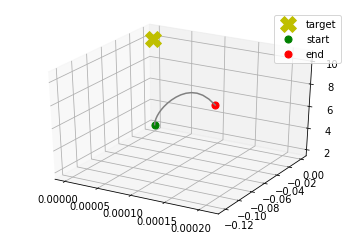

In [56]:
path = [ [results['x'][i], results['y'][i], results['z'][i] ] for i in range(len(results['x']))]
show_flight_path(path, task.target_pos)
print(path[-1:])

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

No handles with labels found to put in legend.


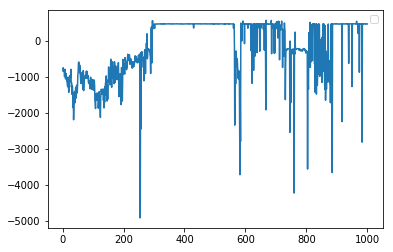

In [27]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(plot_data['episode'], plot_data['total_reward'])

plt.legend()
_ = plt.ylim()

No handles with labels found to put in legend.


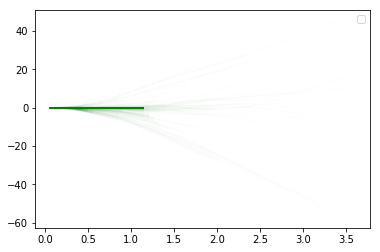

In [28]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the quadcopter x
for r in all_results[-500:]: plt.plot(r['time'], r['x'], 'g-', alpha=0.01) 
    
plt.legend()
_ = plt.ylim()

No handles with labels found to put in legend.


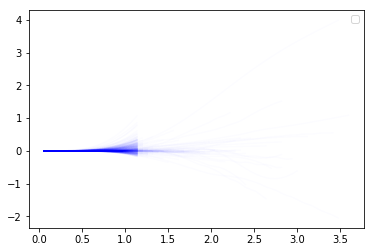

In [29]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the quadcopter y
for r in all_results[-500:]: plt.plot(r['time'], r['y'], 'b-', alpha=0.01) 
    
plt.legend()
_ = plt.ylim()

No handles with labels found to put in legend.


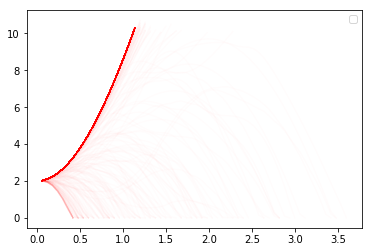

In [30]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the quadcopter height
for r in all_results[-500:]: plt.plot(r['time'], r['z'], 'r-', alpha=0.01) 
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task is to have the agent take off until it reaches to the target pos (0, 0, 10). The agent gets more reward as it gets higher. The agent gets less rewards as it drifts away from x and y axis (x = 0 and y = 0). The agent is also rewarded when it has posive speed along the z axis.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

Algorithm:
- I tried Deep Deterministic Policy Gradients (DDPG) algorithm. The algorithm is recommended in this project and it fits continous action spaces. 

Hyperparameters:
- I used hyperparaters recommended in DDPG's original paper implementation.

Neural Network Architecture:
- I used identical neural network for both actor and critic. The model has layer of 32, 64, and 32 followed by Relu. Dropout and bathnormalization are added after each dense layer.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- The agent had difficuty in learning before episodes. 
- After epidodes, the agent started to have stability in terms of rewards.


 It looks difficult for agent to learn before 600 episodes, itwas failed also  badly  between episodes 600 and 800.yes Stability is only reached after episode 800 , where an aha moment seem to have been reached. The final performance looks like stable, however, multiple runs of the training leads to different results where the agent performance oscillate between success and failure at the final episodes.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project is to understand how DDPG works.
One of the interesting parts of the project is I had a difficult time to have the agent start learning in the expected way. The agent started learnign in the intended way after implementing the reward functions to properly reward the right actions and punish the wrong actions. 